# Kaggle Competition
# Decistion Tree Regression
# Data Mining 2023

Data Source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [147]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

import plotly.graph_objects as go
import plotly.express as px


# Model tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


from sklearn.metrics import mean_squared_error
from math import sqrt


# other
import sys
import warnings
from time import sleep

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [148]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
submission_data = pd.read_csv("sample_submission.csv")

In [149]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [150]:
test_data.info()
print(test_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [151]:
submission_data.info()
submission_data.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989

In [152]:
train_data.tail(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1458         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[2 rows x 81 columns]

In [153]:
train_data.describe(include=['object']) 

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [154]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [155]:
def interpolate_dataframe(df):    
    for col in df.columns:
        missing = df[col].isnull().sum()
        if missing > len(df)*0.1:
            df = df.drop(col, axis=1)
        elif df[col].dtype == 'float' or df[col].dtype == 'int' :
            df[col].interpolate(method="polynomial",order=2, inplace=True)
        else:
            df[col].interpolate(method="pad", inplace=True)
            
    return df

In [156]:
def clean_dataframe(df):    
    for col in df.columns:
        missing = df[col].isnull().sum()
        if missing > len(df)*0.1:
            df = df.drop(col, axis=1)
        elif df[col].dtype == 'float':
            df[col].fillna(df[col].mean(), inplace=True)
        elif df[col].dtype == 'int':
            df[col].fillna(df[col].mean().astype(int), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
            
    return df

In [157]:

interpol_train_data = interpolate_dataframe(train_data)

interpol_test_data = interpolate_dataframe(test_data)

In [158]:
clean_train_data = clean_dataframe(train_data)
clean_test_data = clean_dataframe(test_data)

In [159]:
print(interpol_train_data.describe())
print(interpol_test_data.info())


                Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.609828   443.639726    46.549315  ...   
std      30.202904     20.645407   180.855598   456.098091   161.319273  ..

In [160]:
clean_train_data.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   180.569112   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [161]:
set(clean_test_data.columns).issubset(set(clean_train_data.columns))

True

In [162]:
clean_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [163]:
set(clean_train_data.columns[:-1]).issubset(set(clean_test_data.columns))

True

In [164]:
set(interpol_train_data.columns[:-1]).issubset(set(interpol_test_data.columns))

True

In [165]:
set(clean_test_data.columns).issubset(set(clean_train_data.columns[:-1]))

True

In [166]:
set(interpol_test_data.columns).issubset(set(interpol_train_data.columns[:-1]))

True

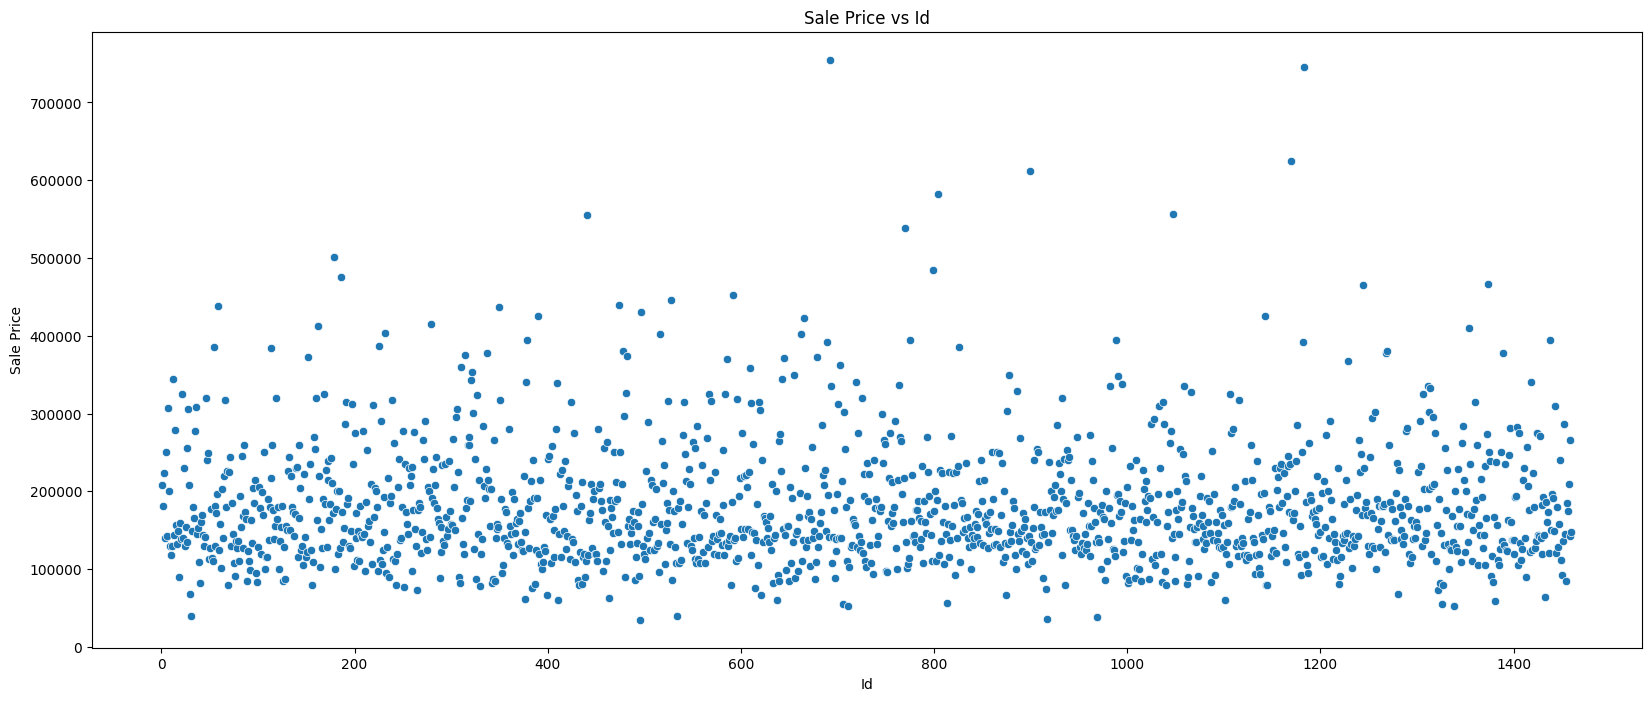

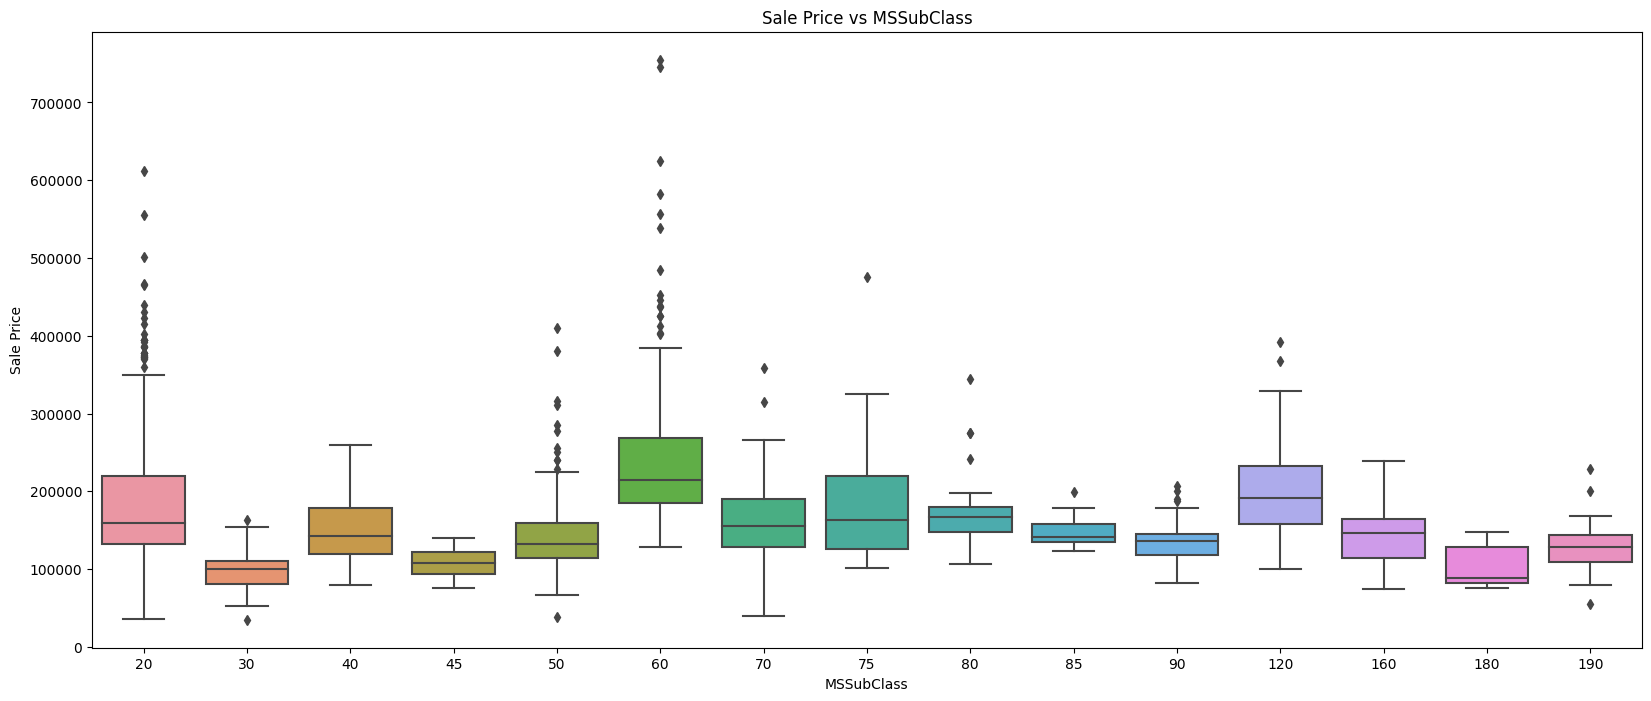

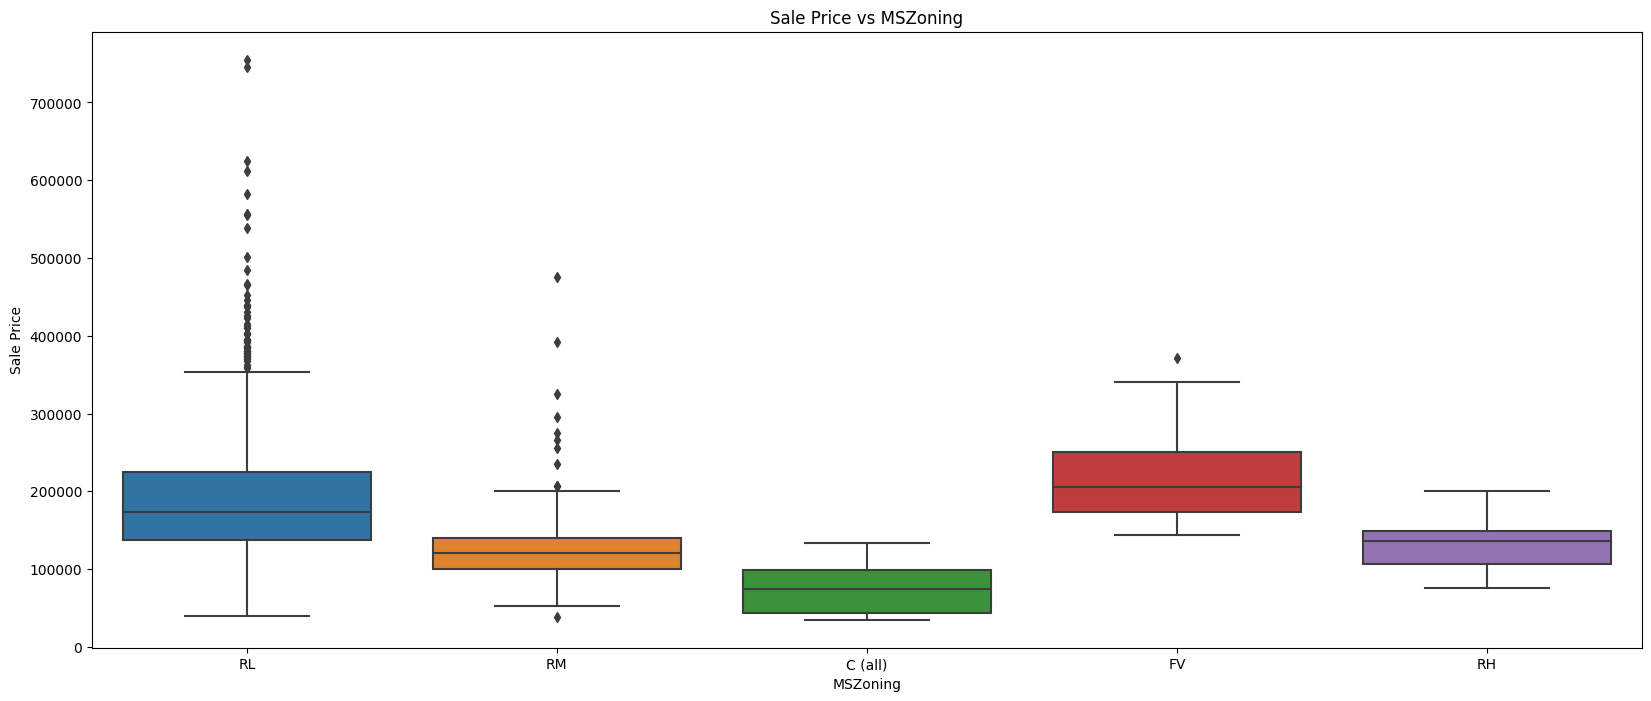

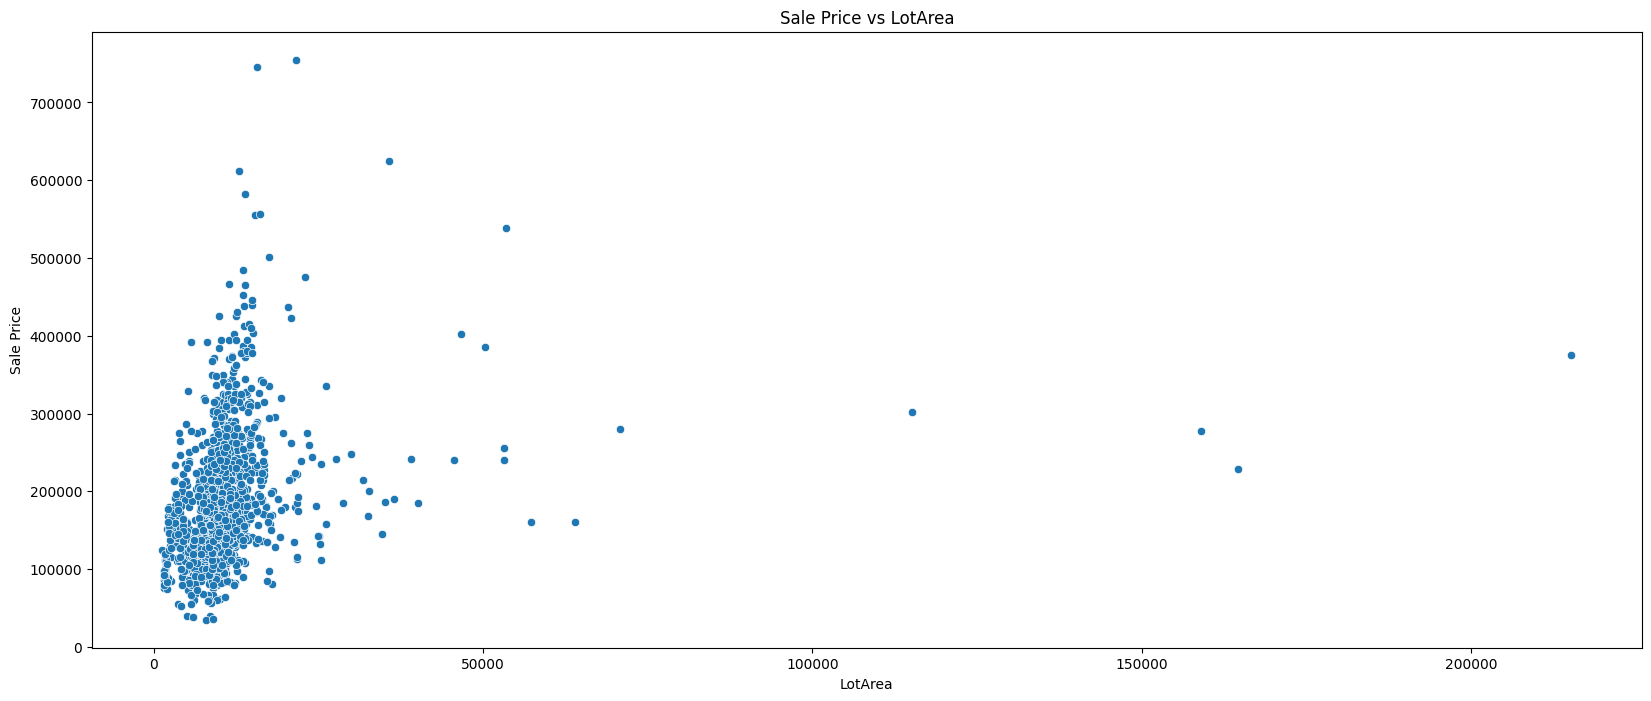

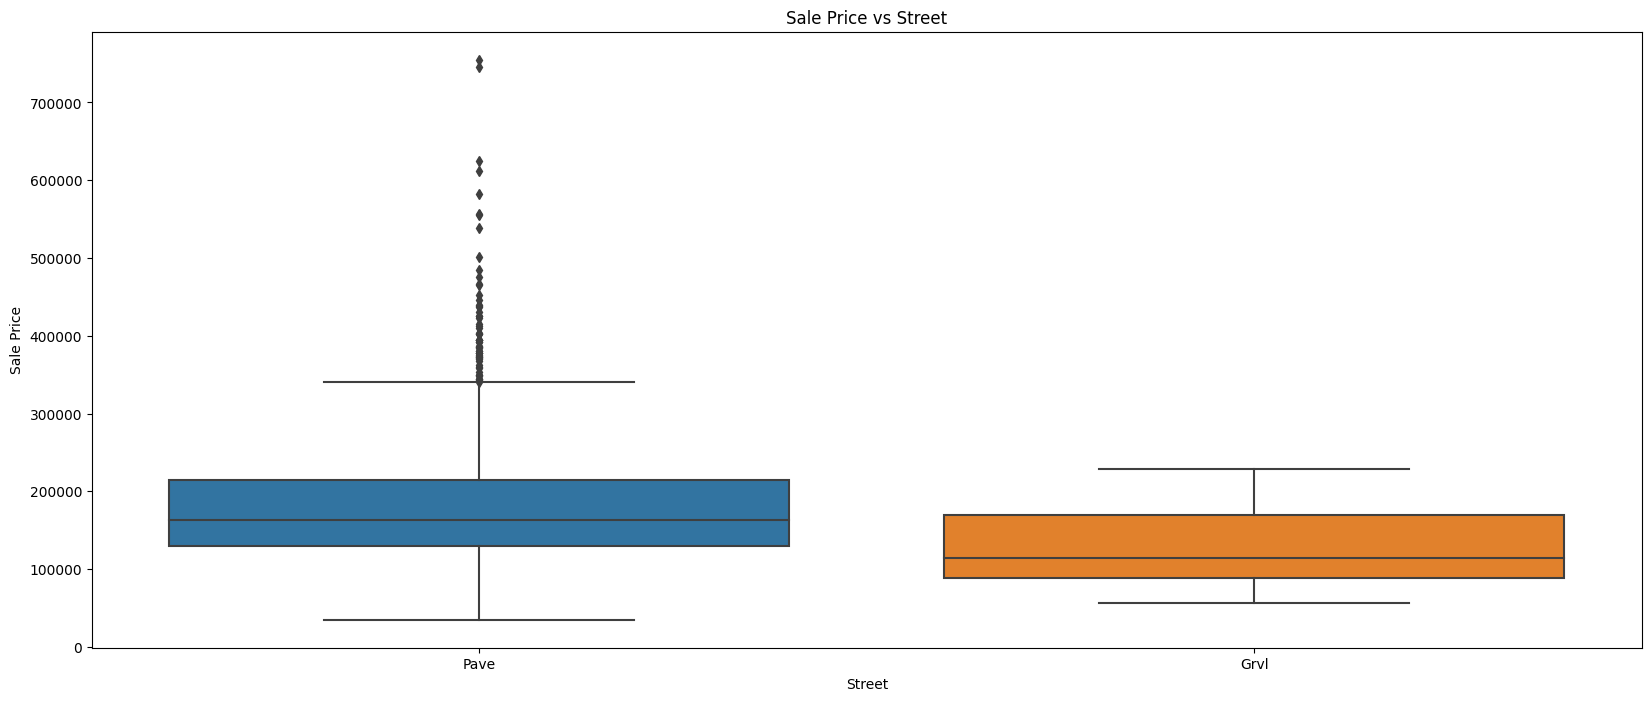

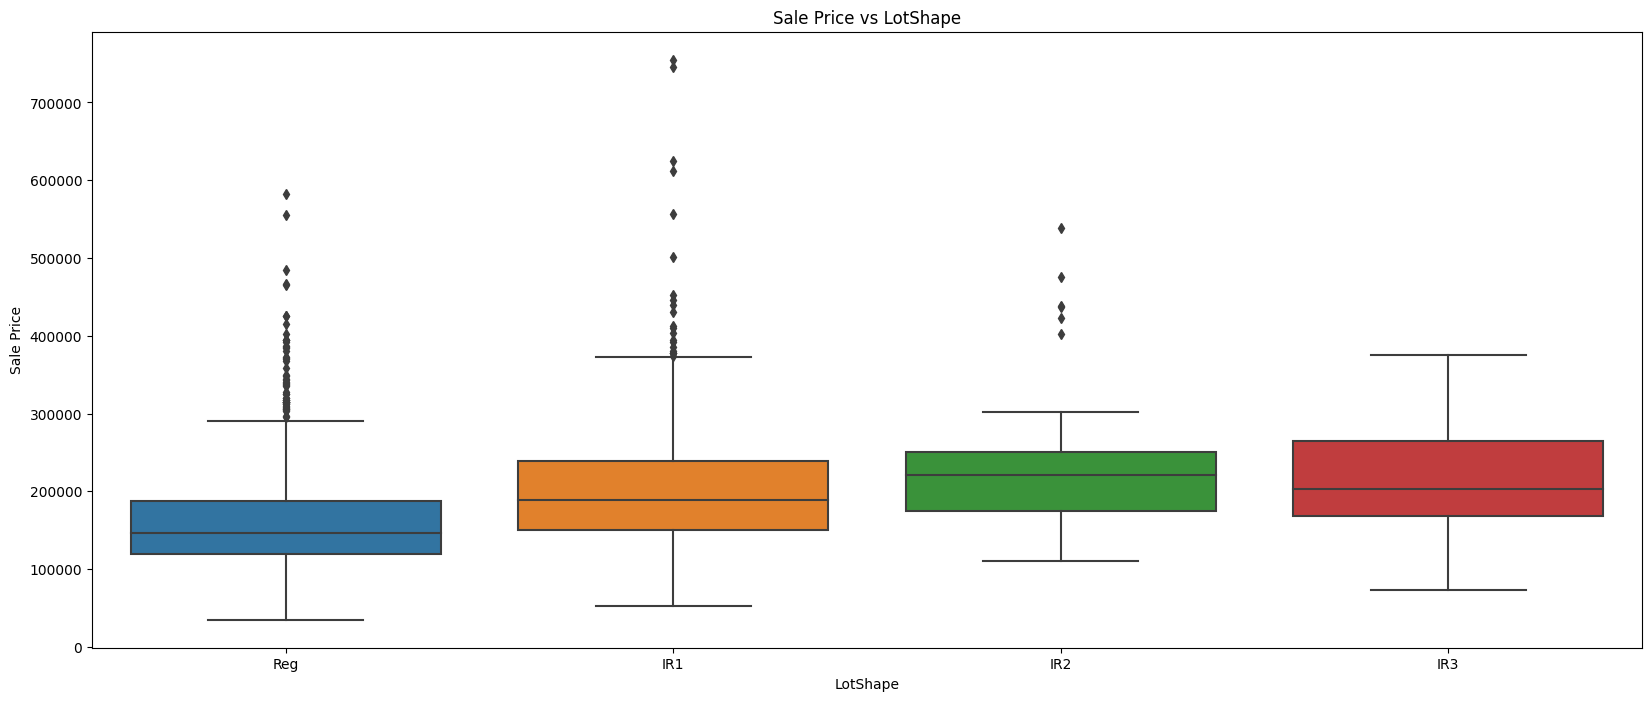

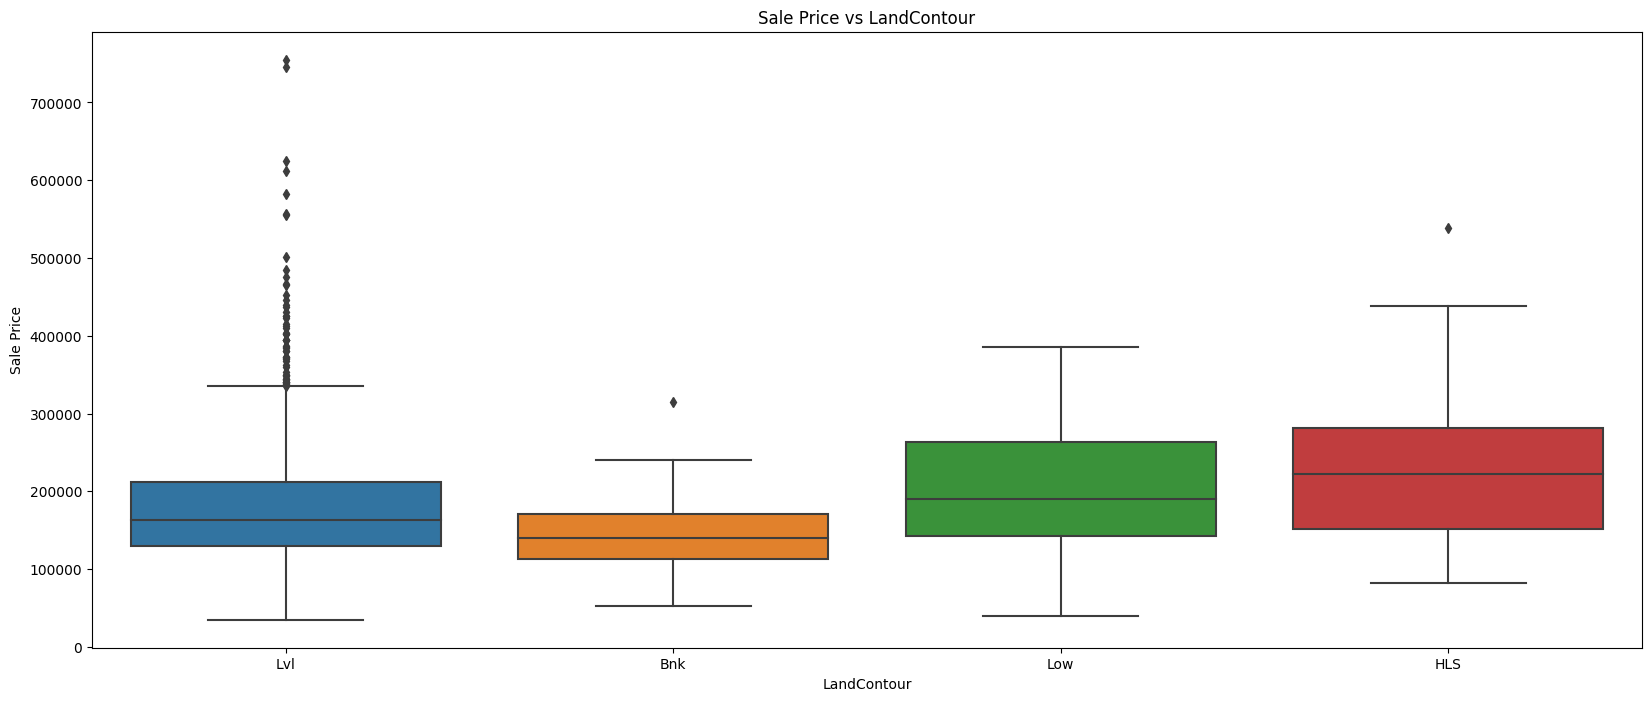

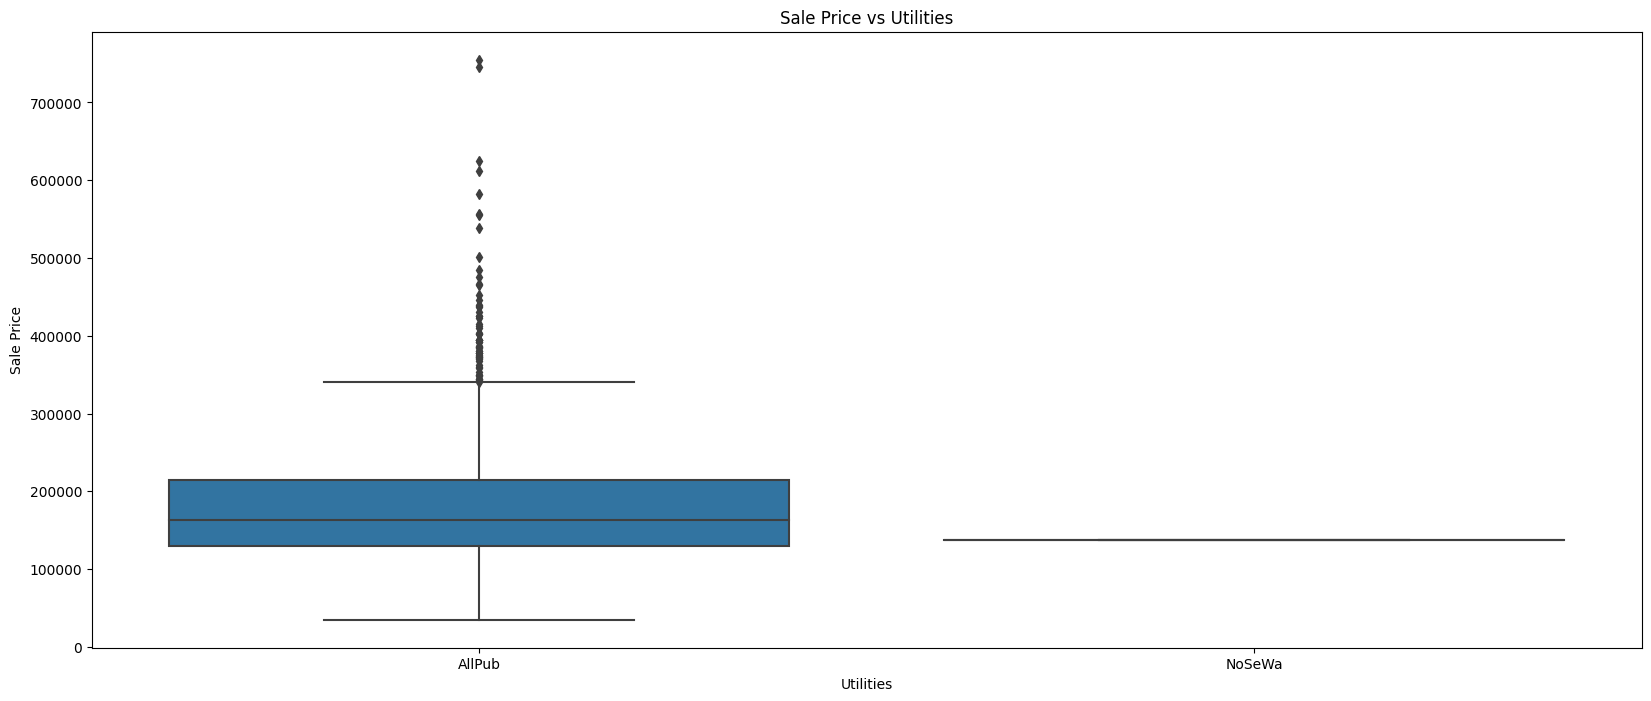

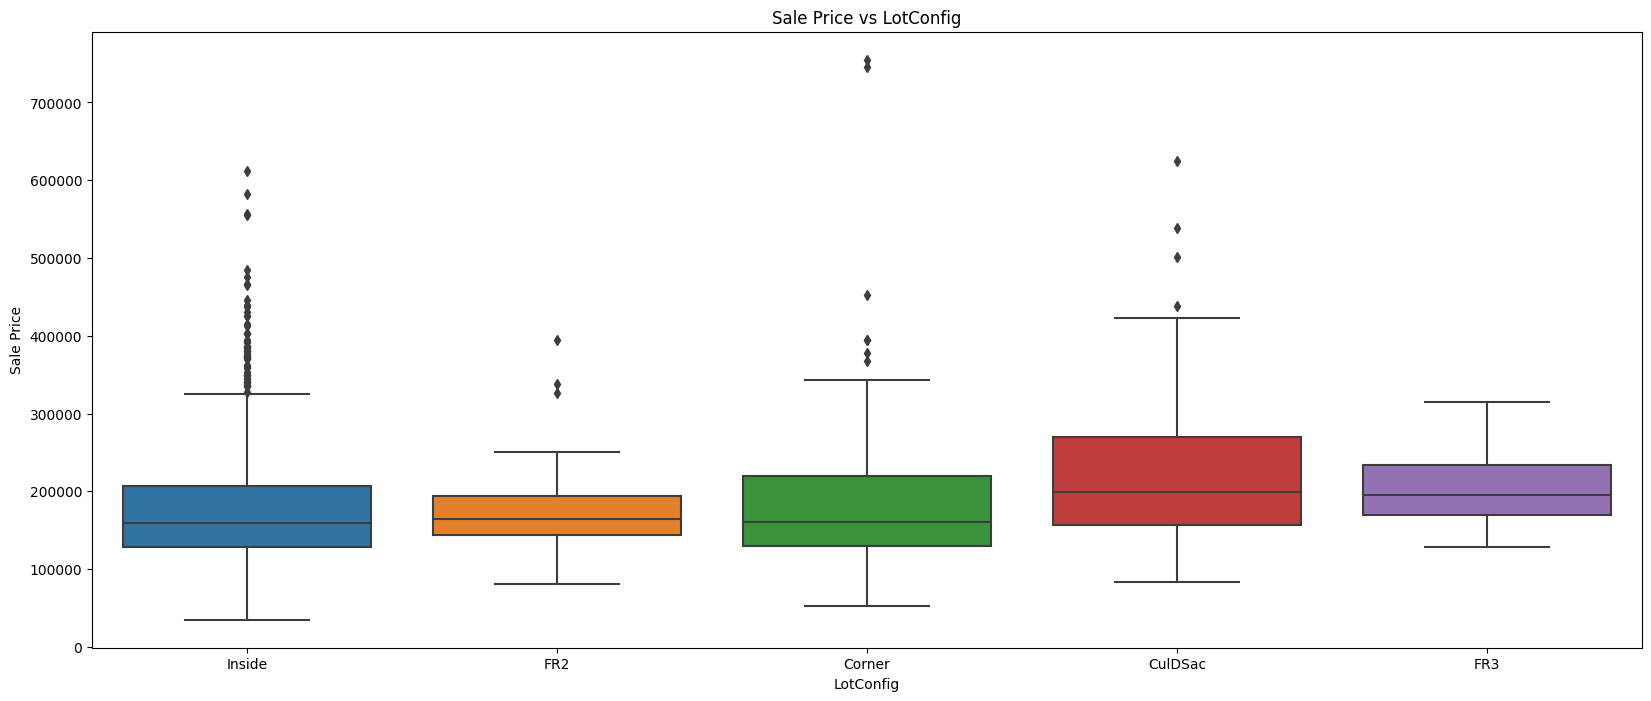

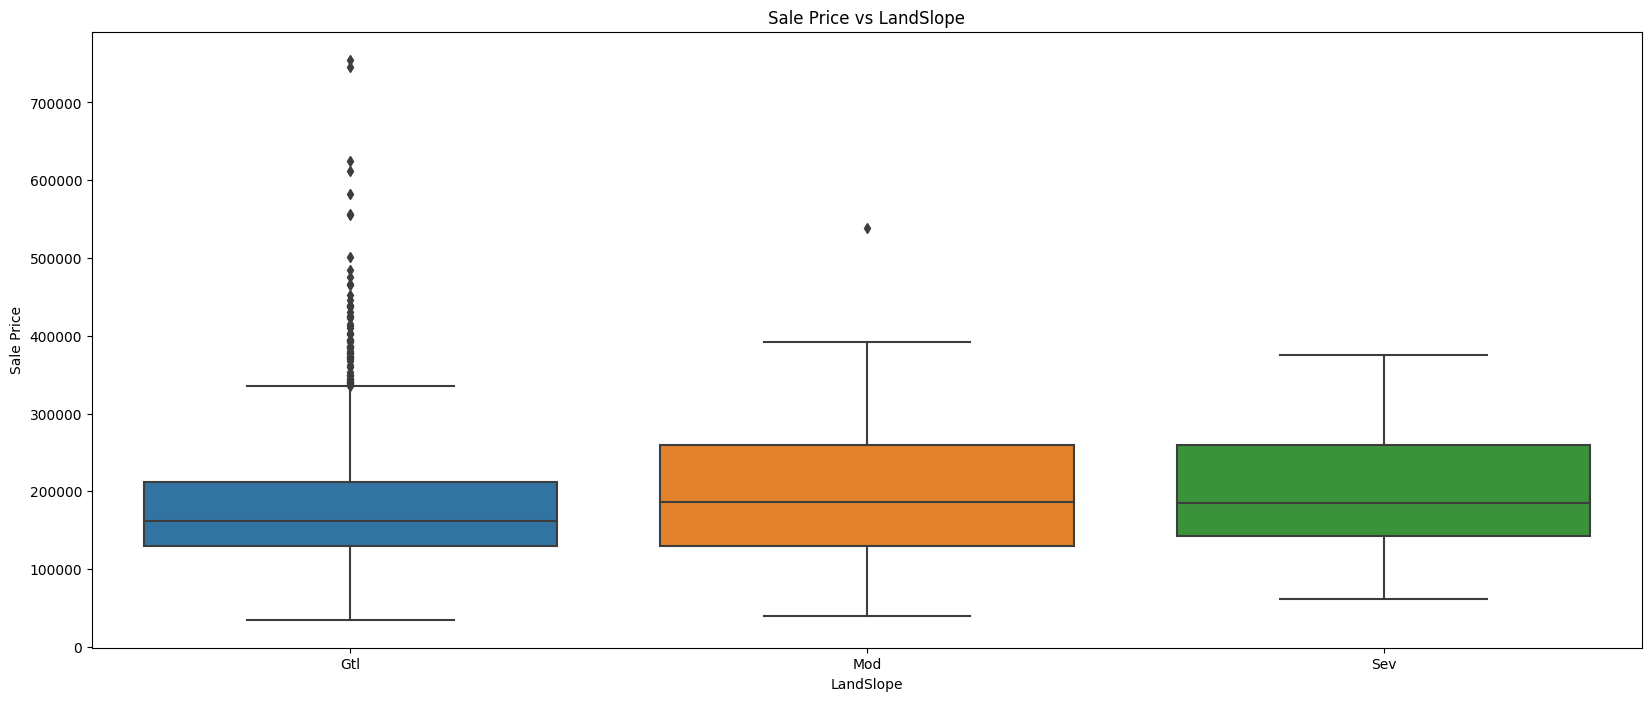

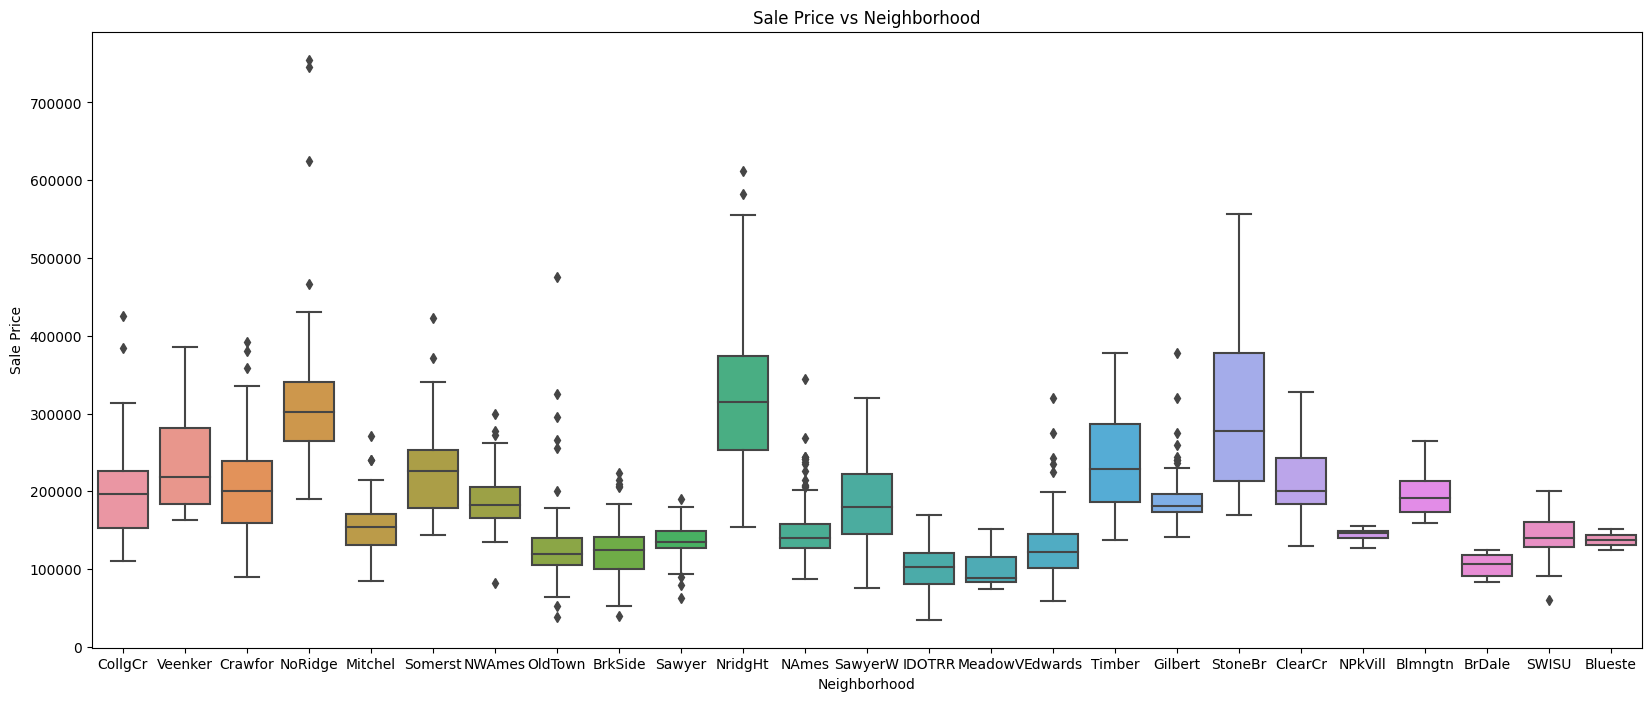

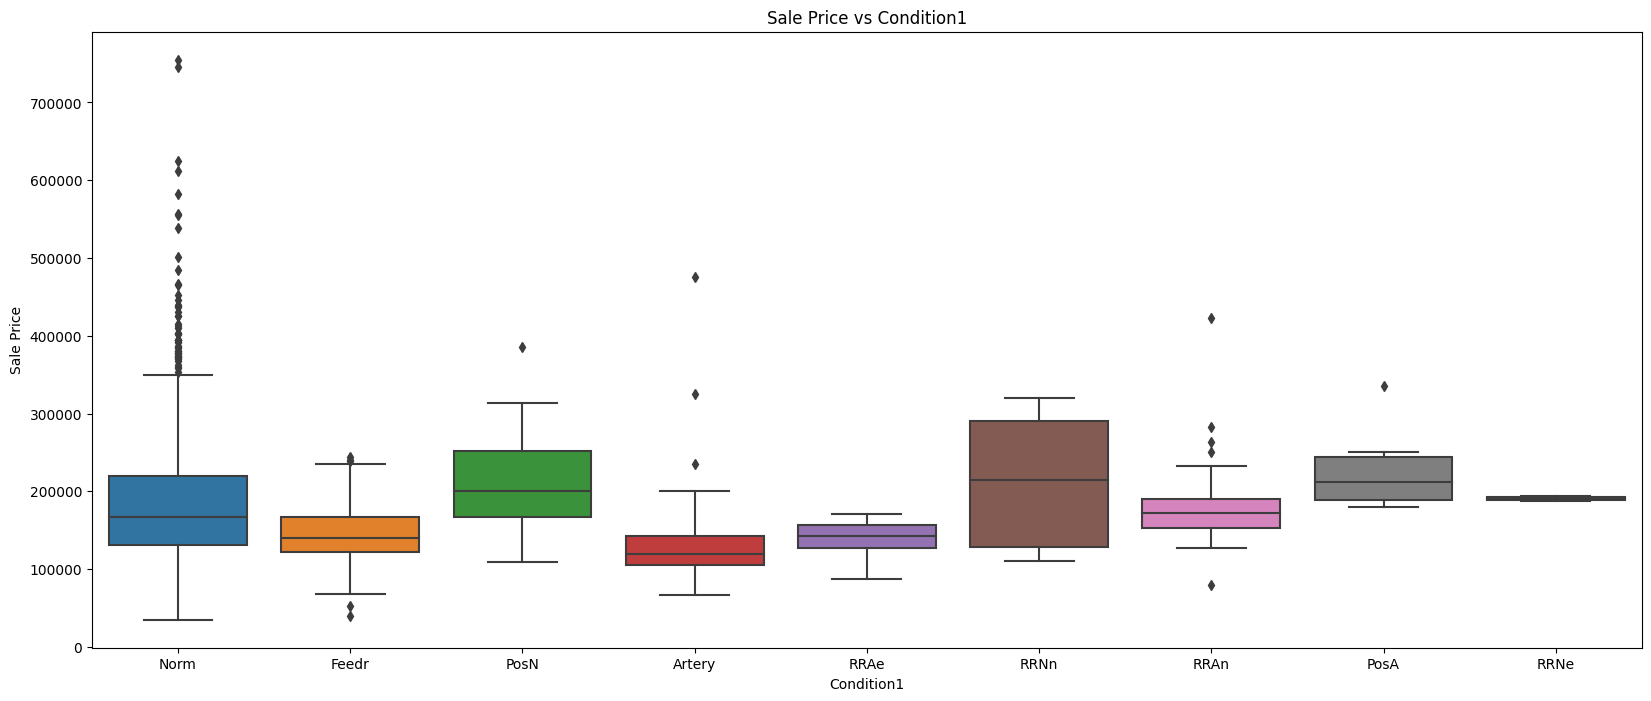

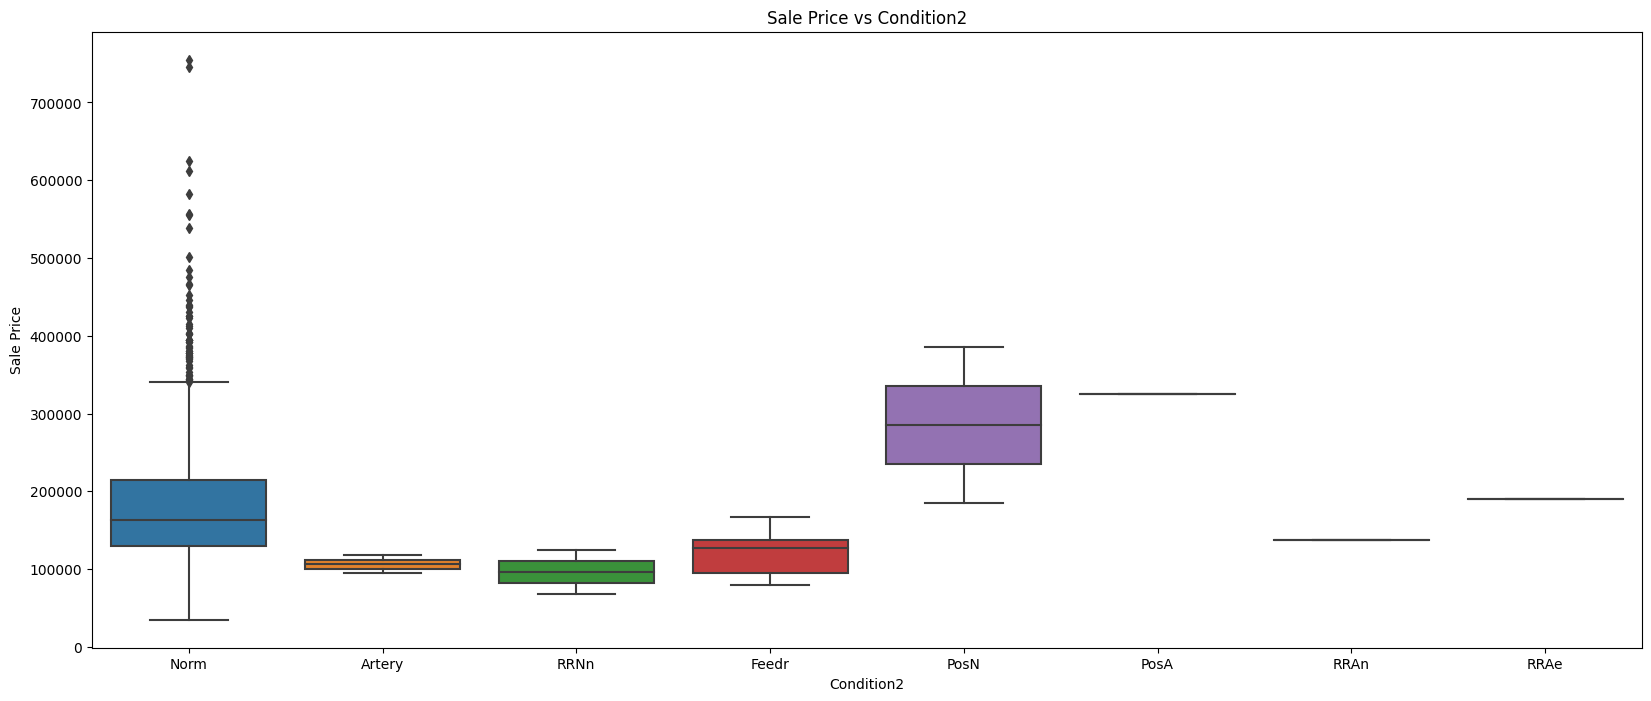

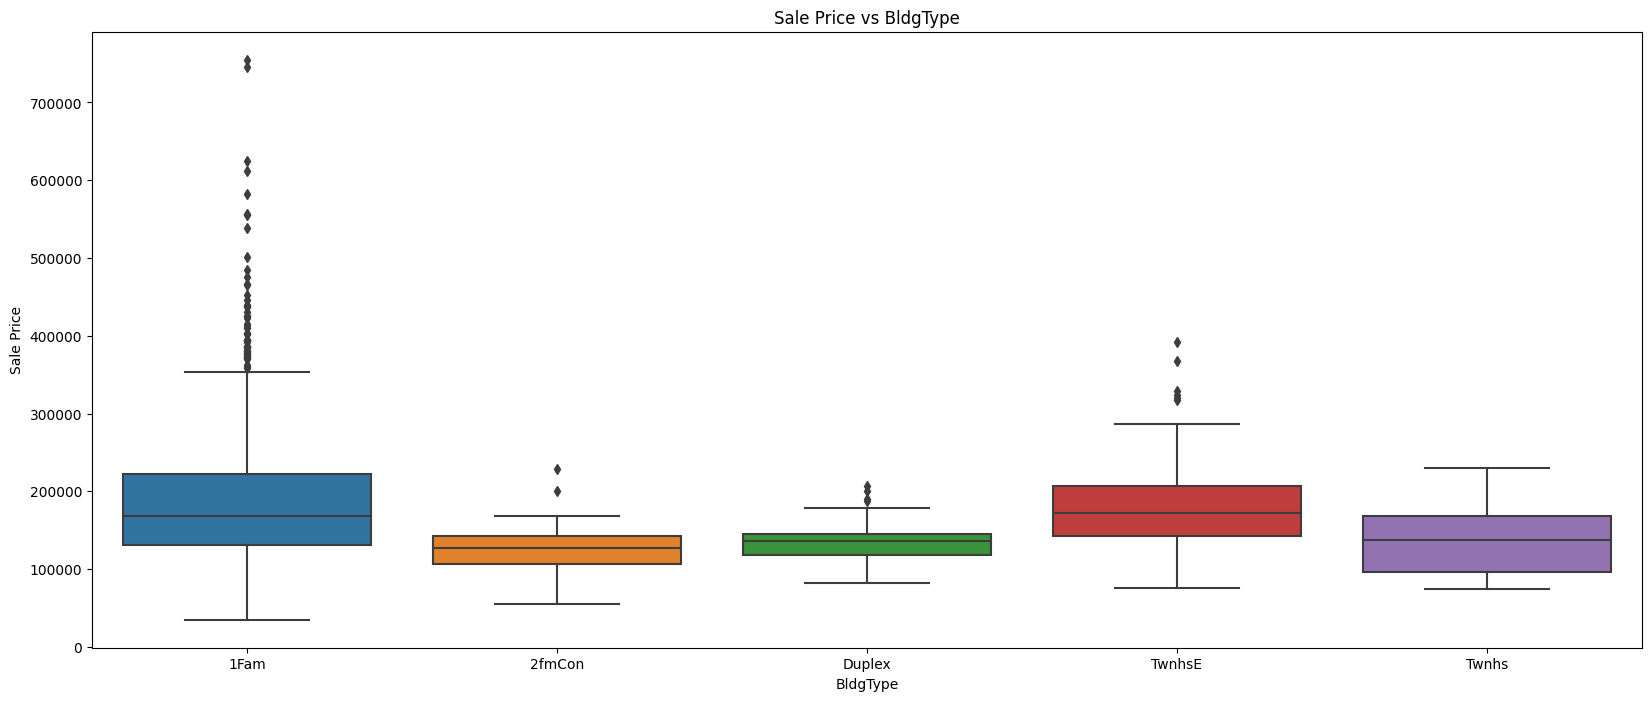

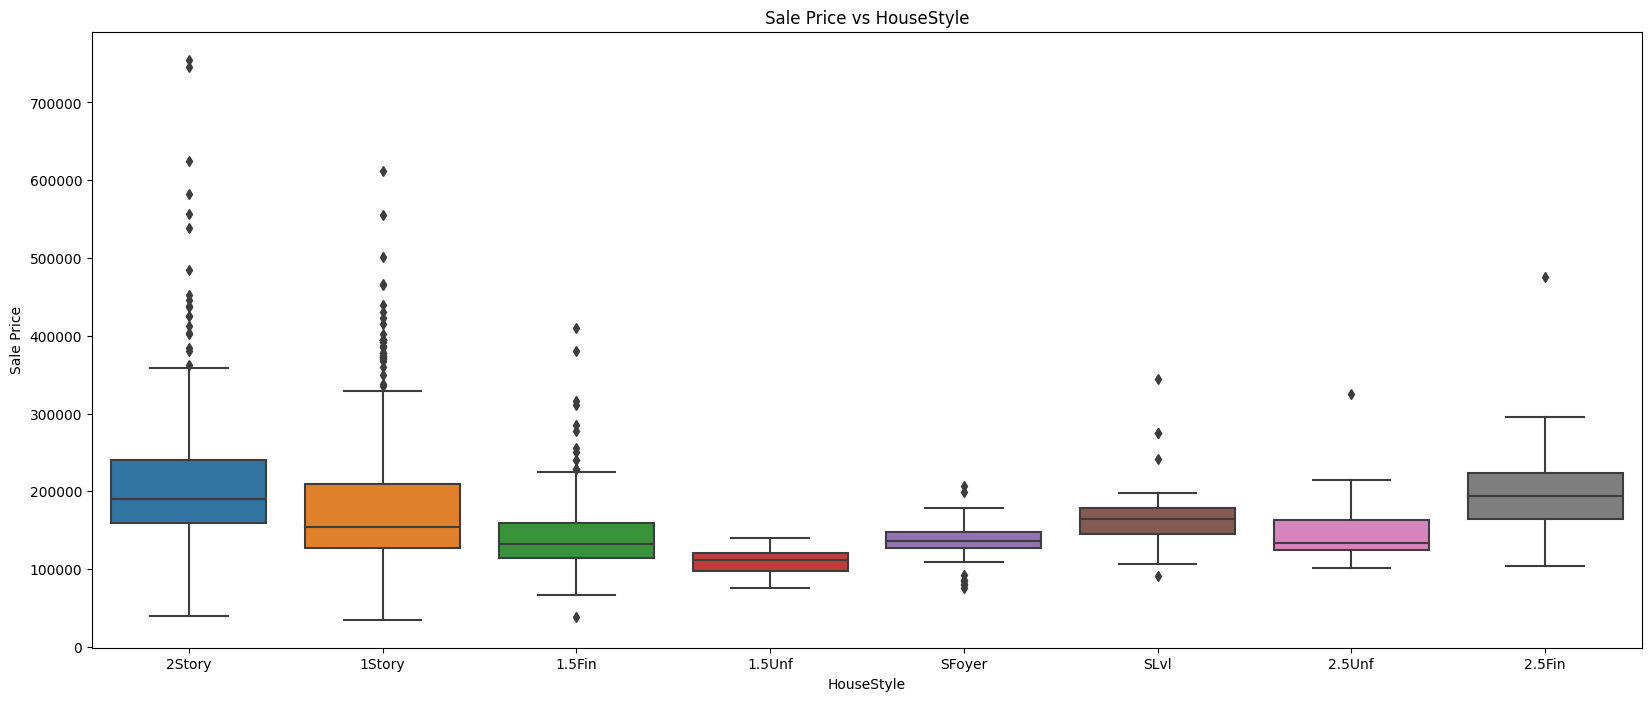

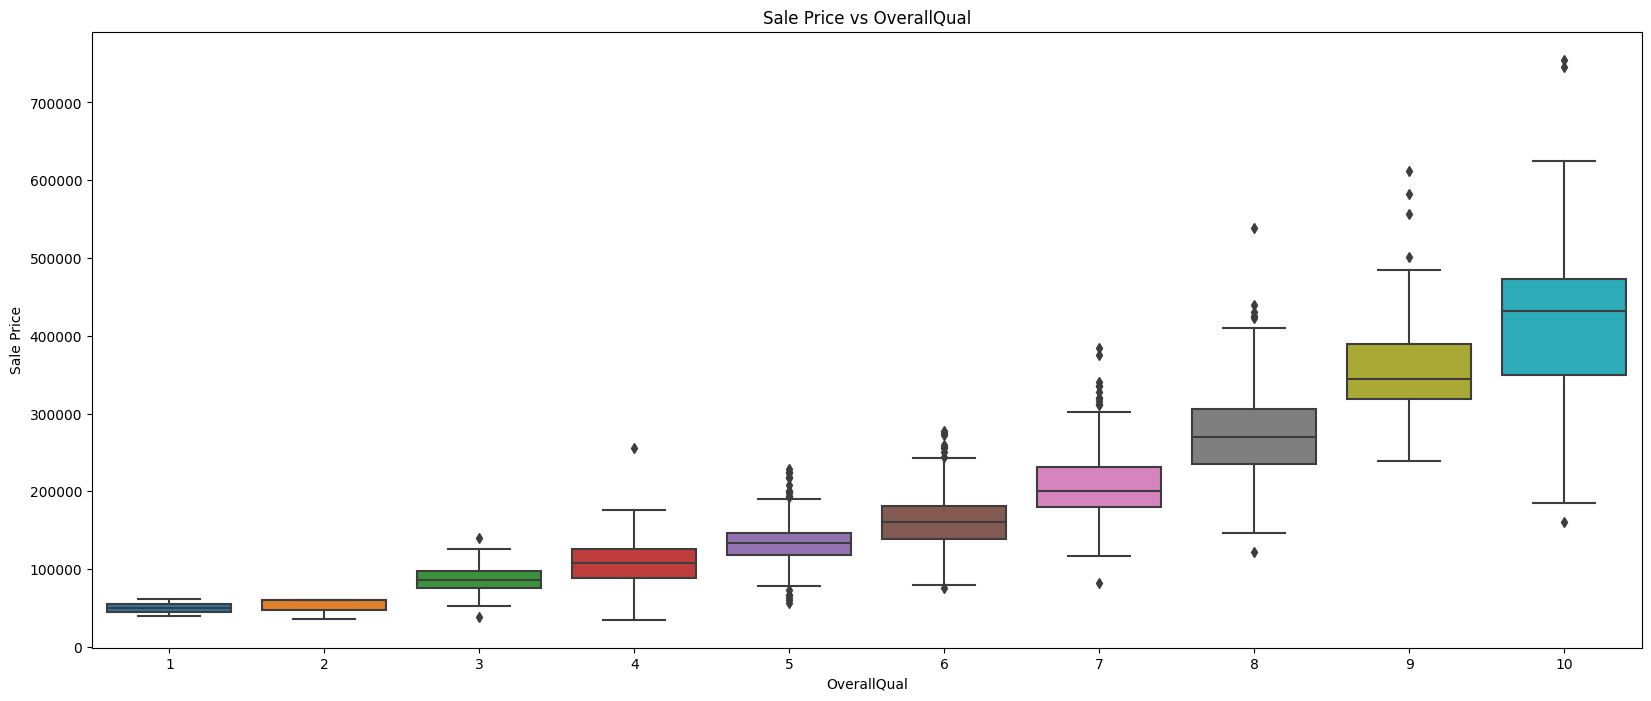

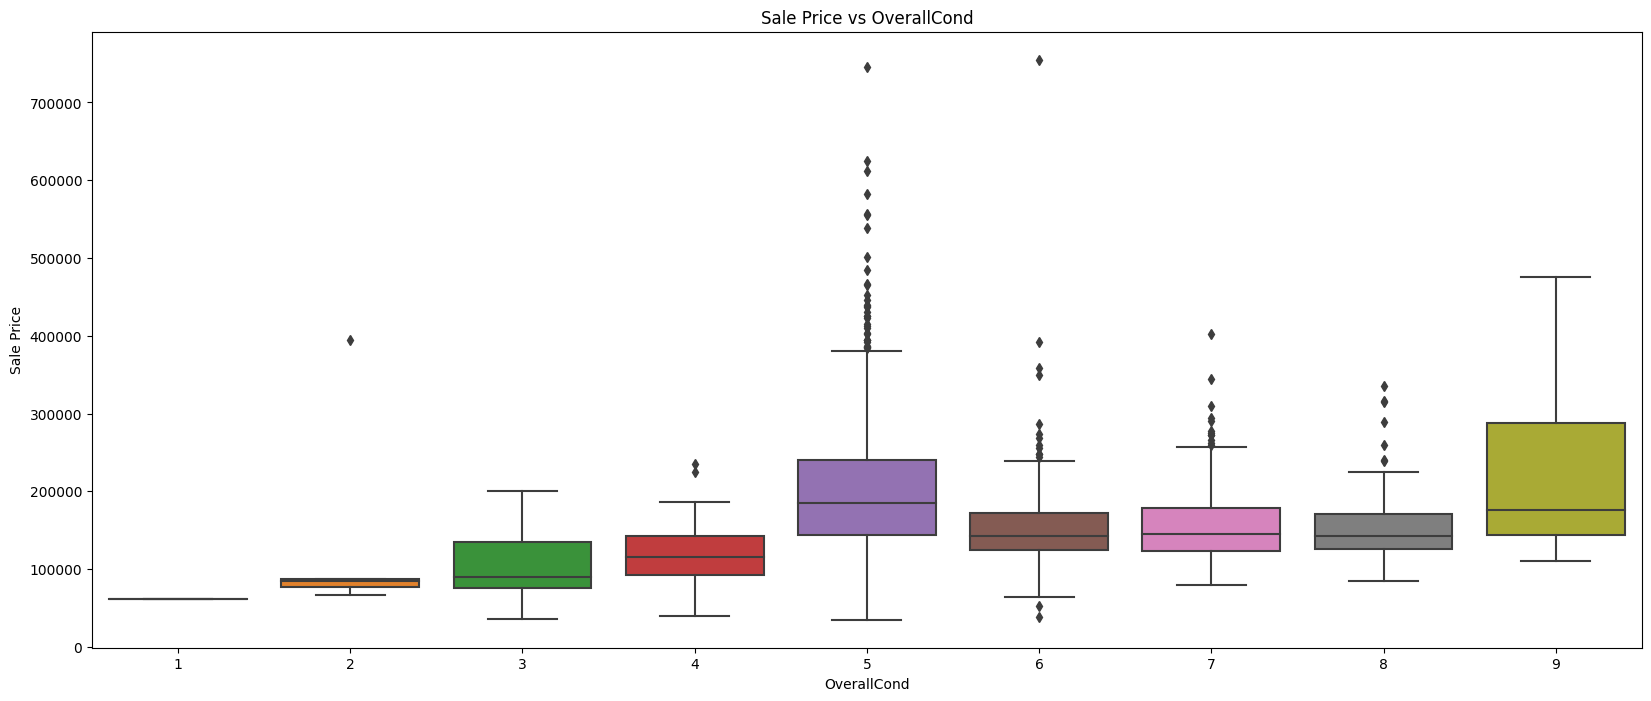

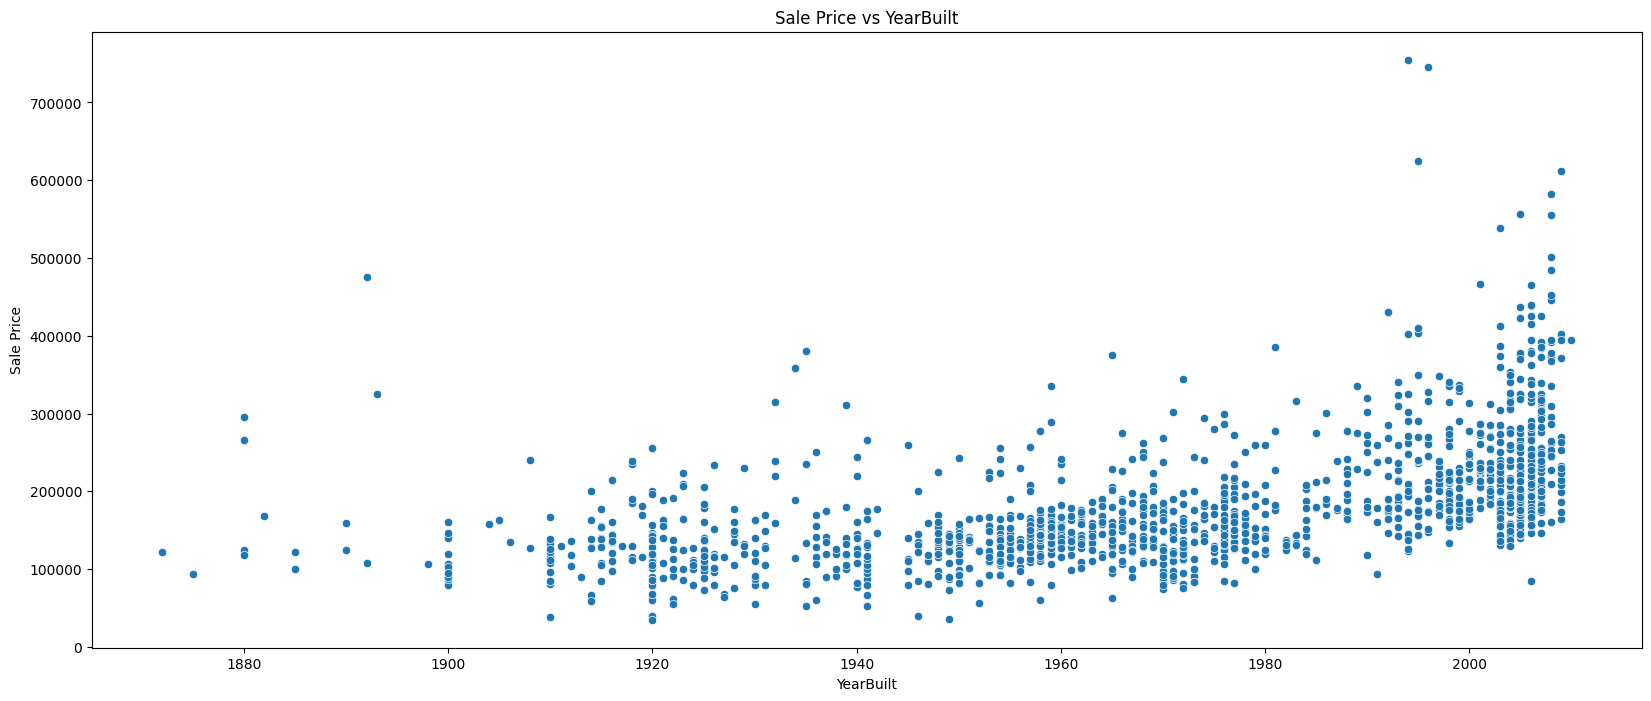

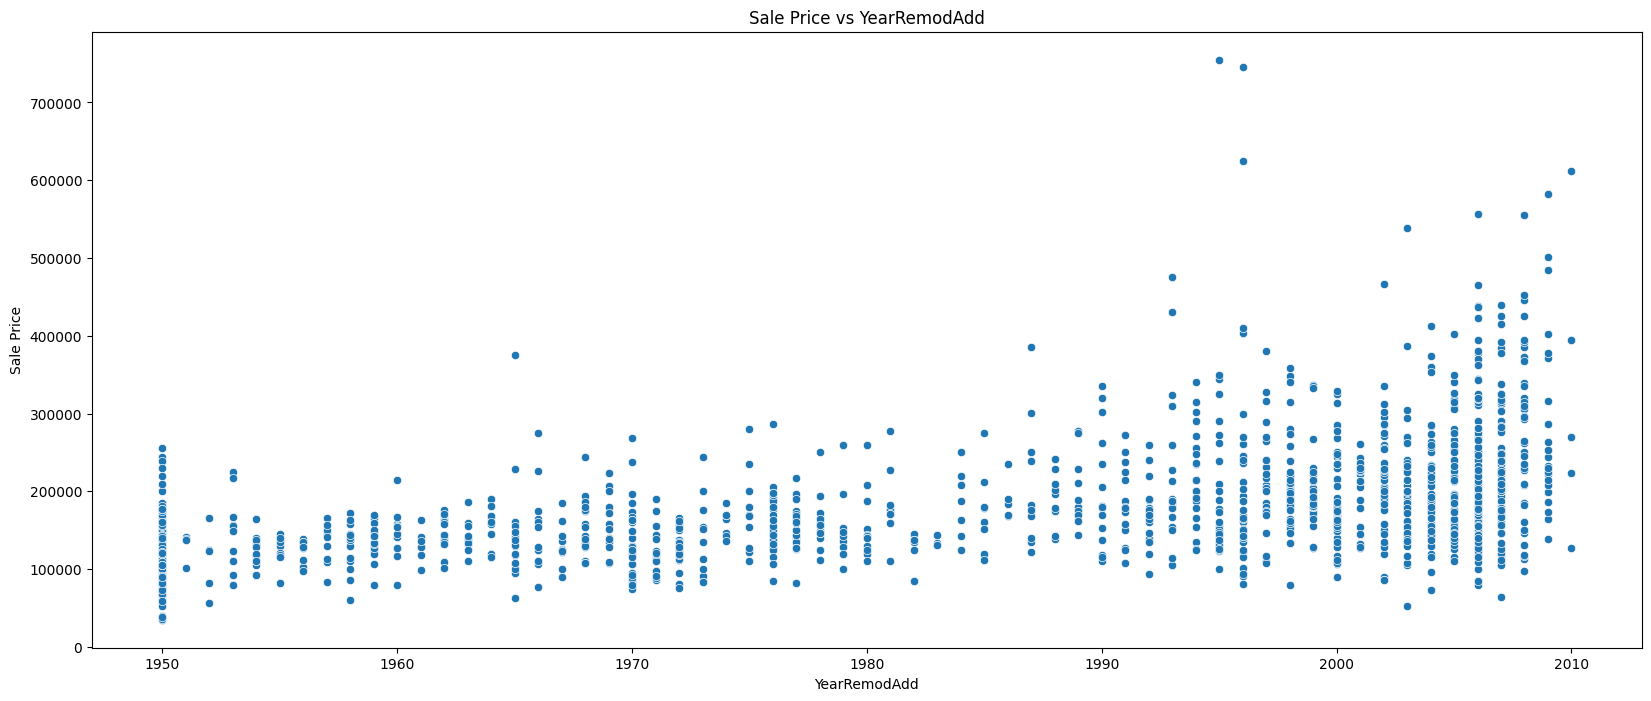

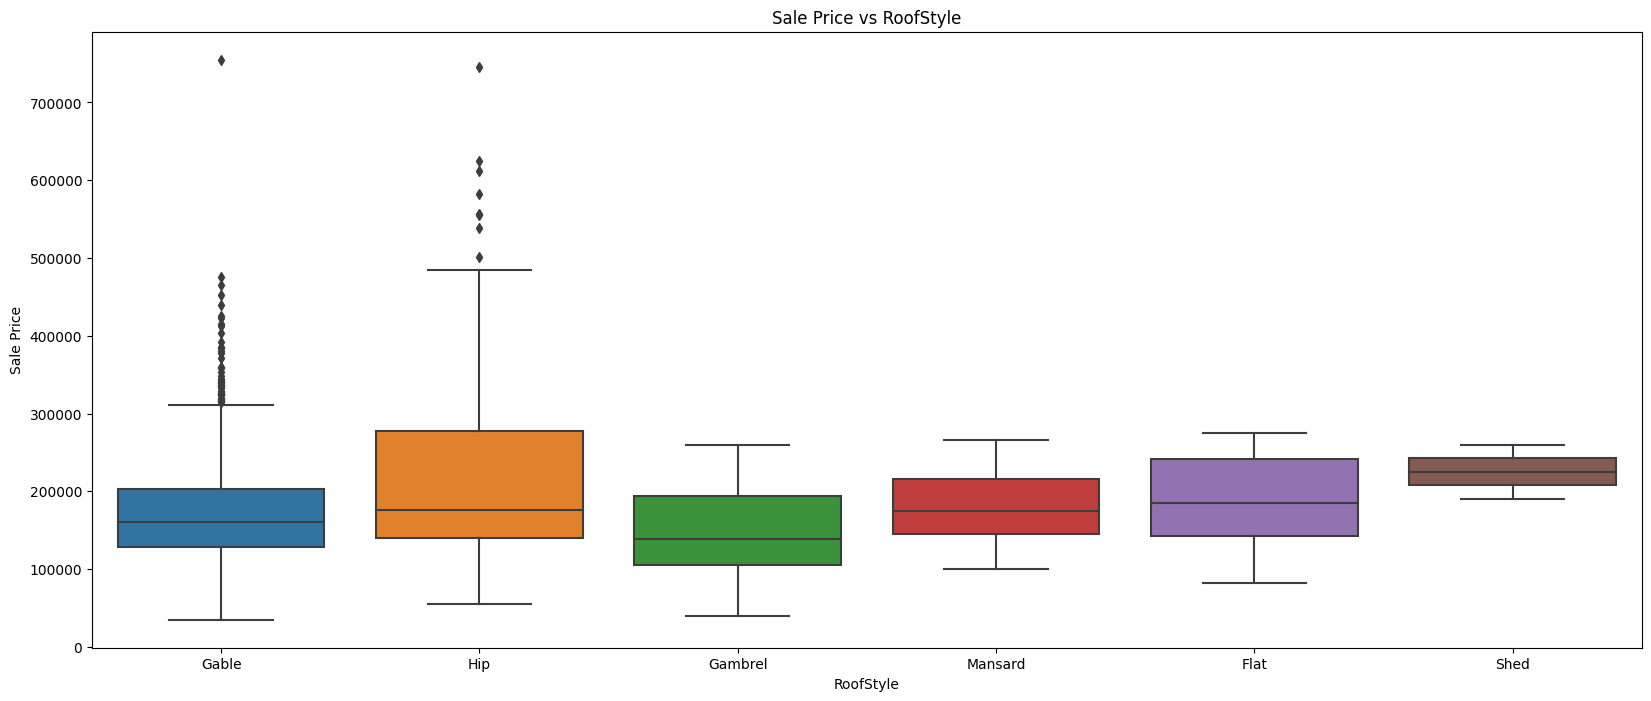

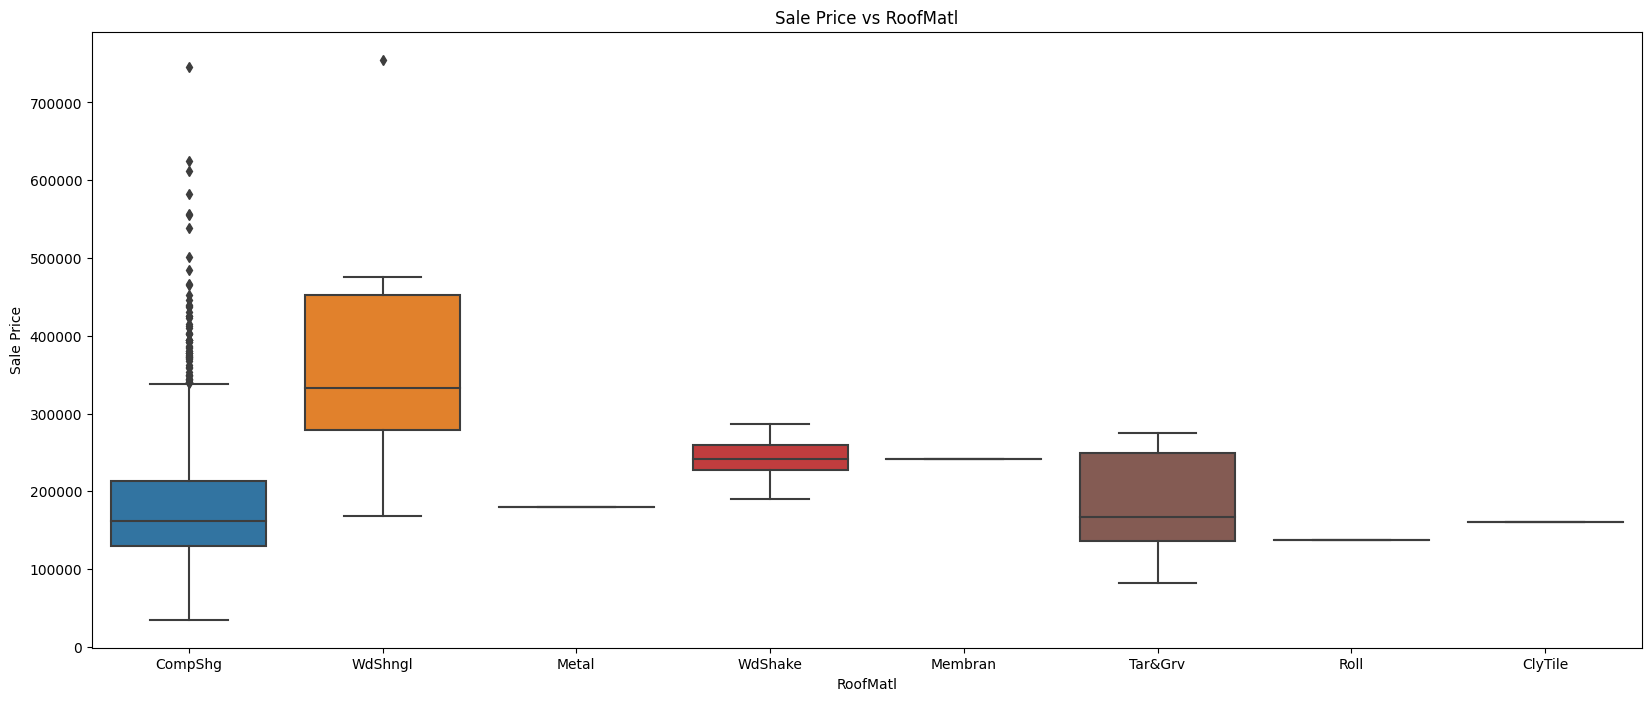

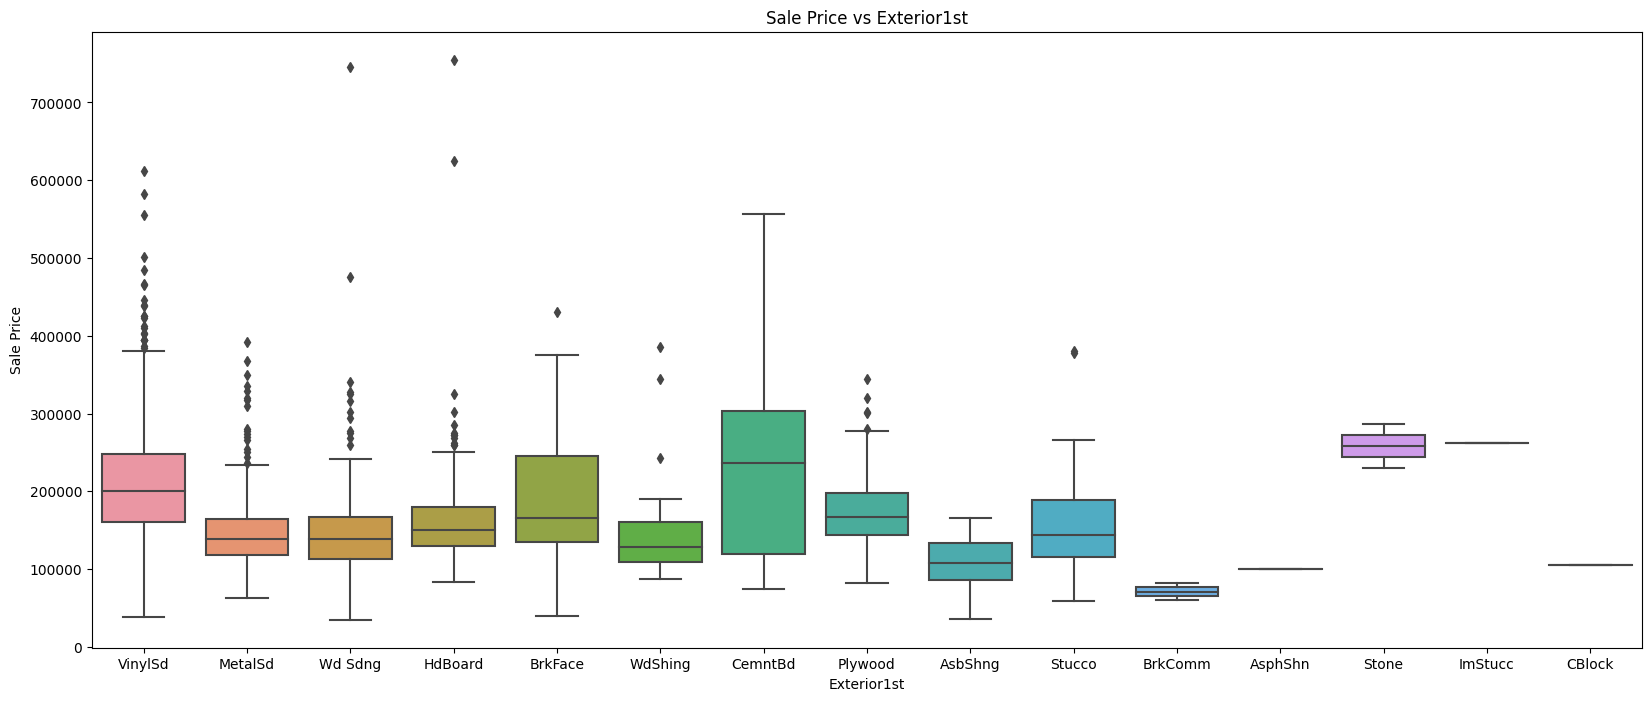

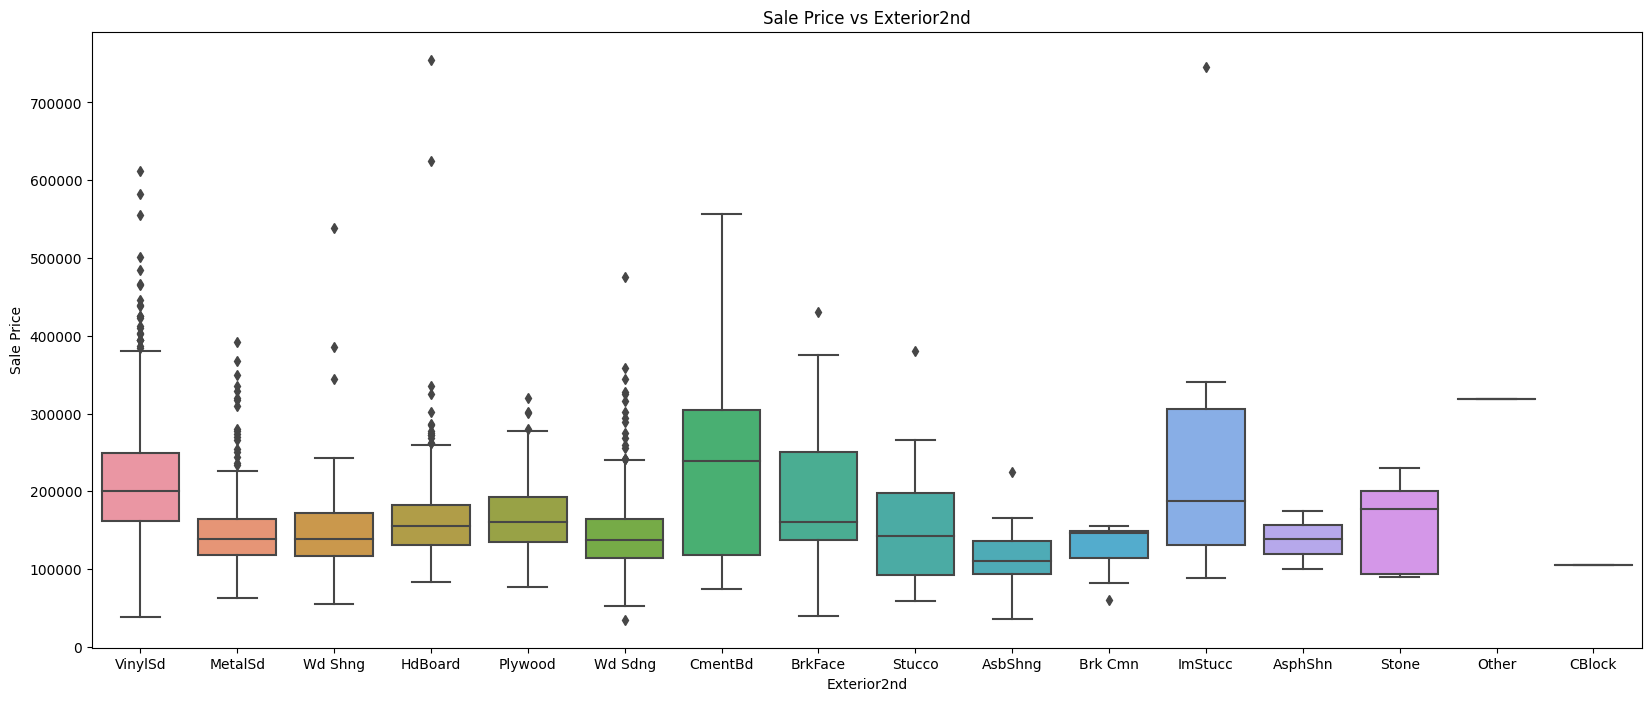

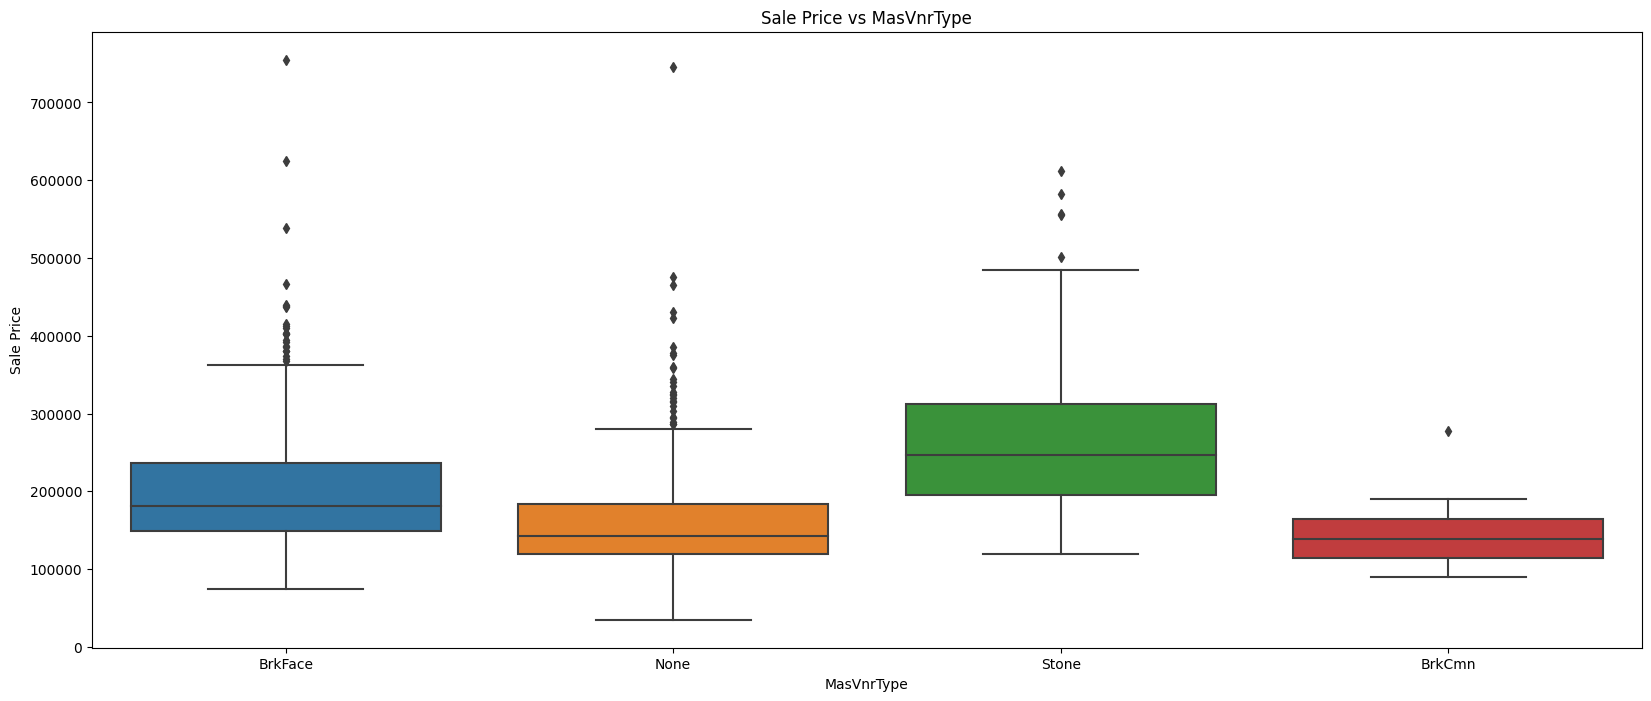

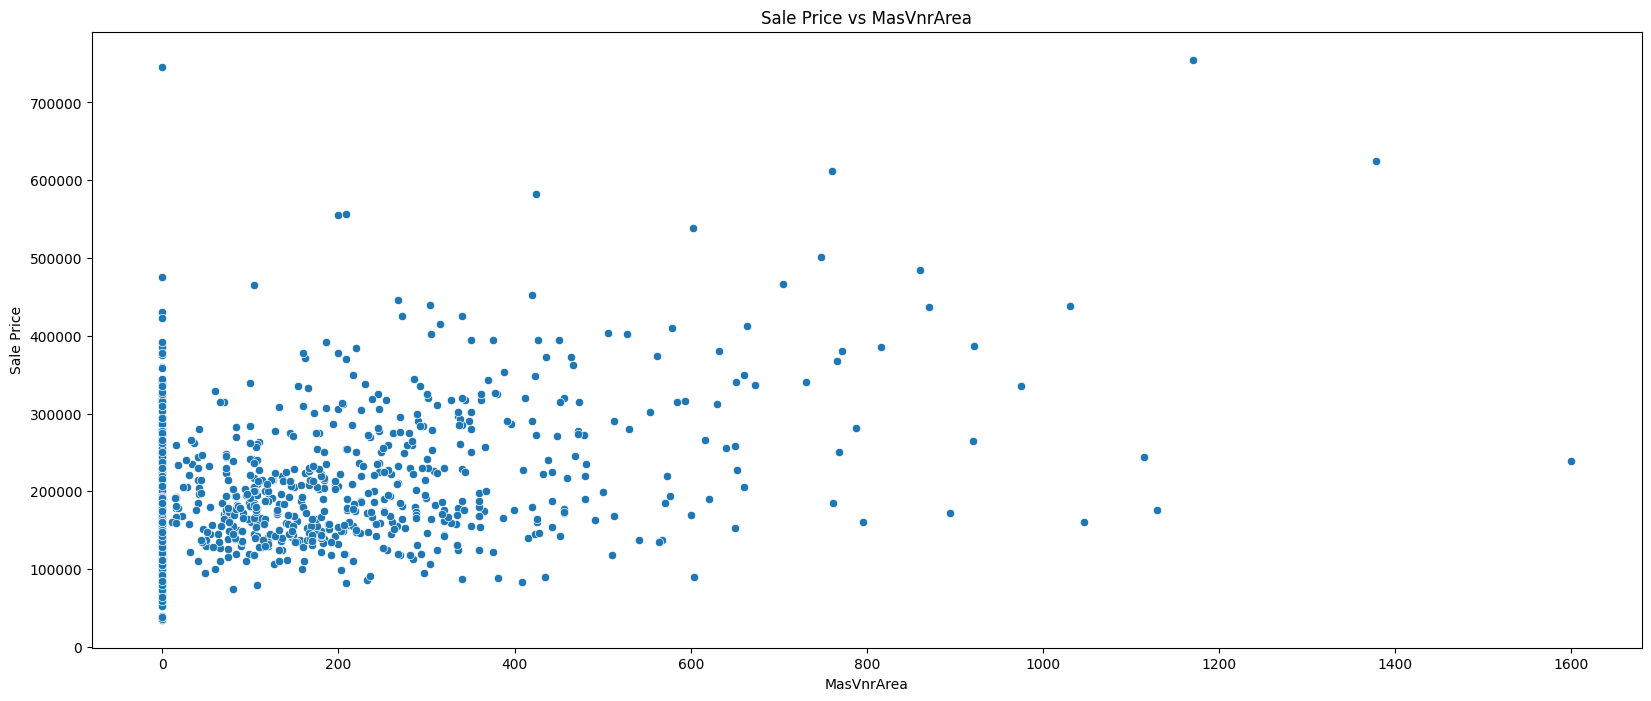

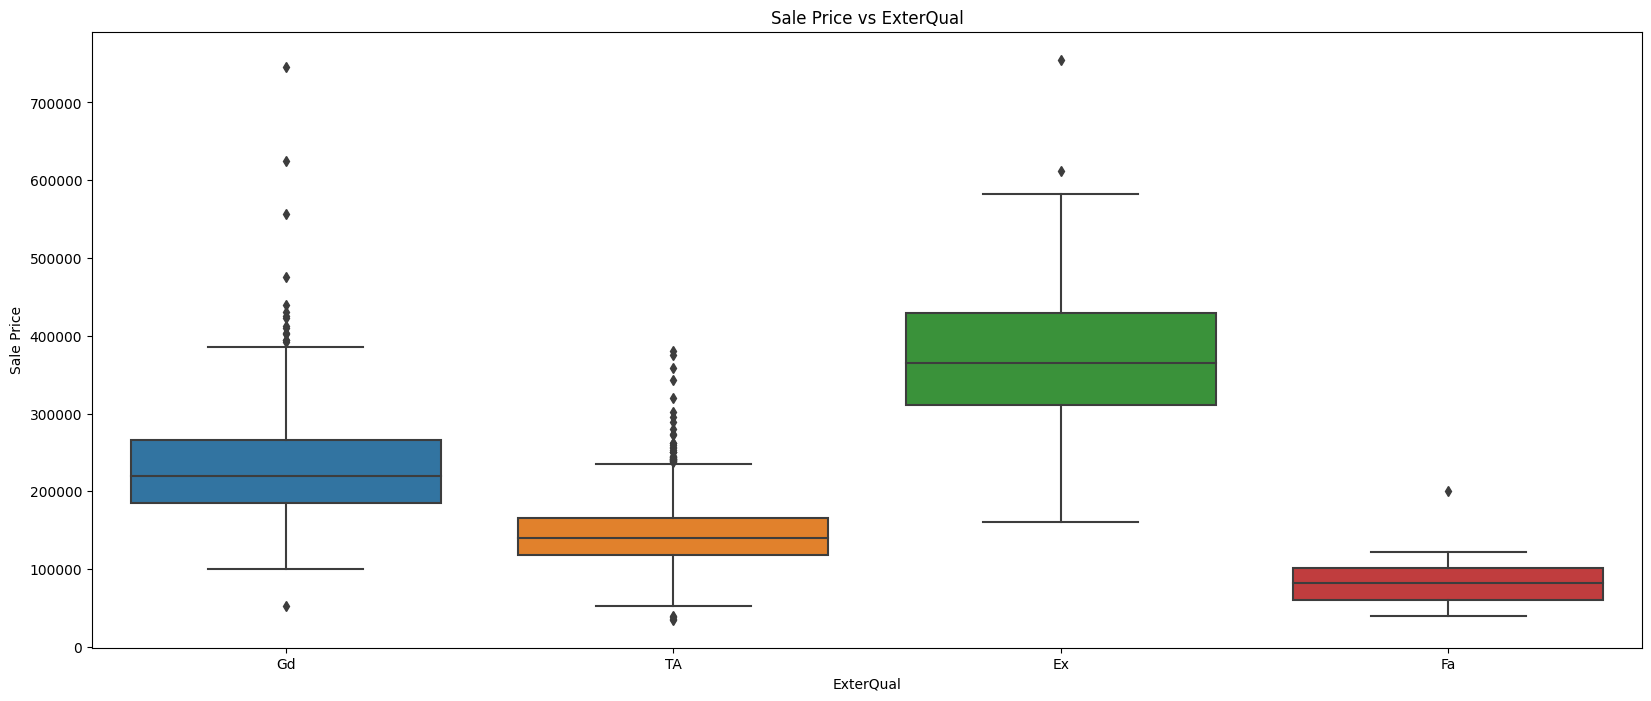

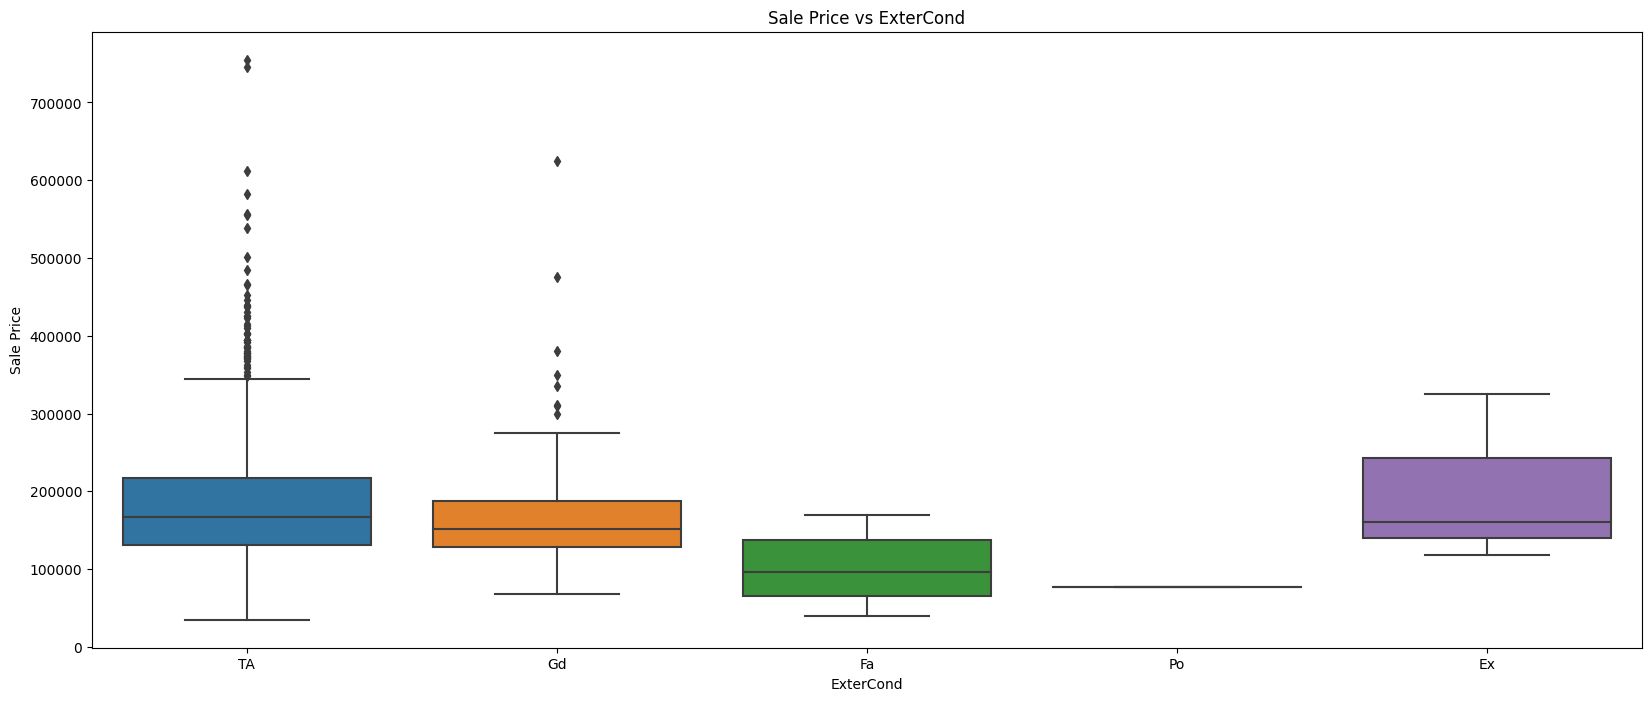

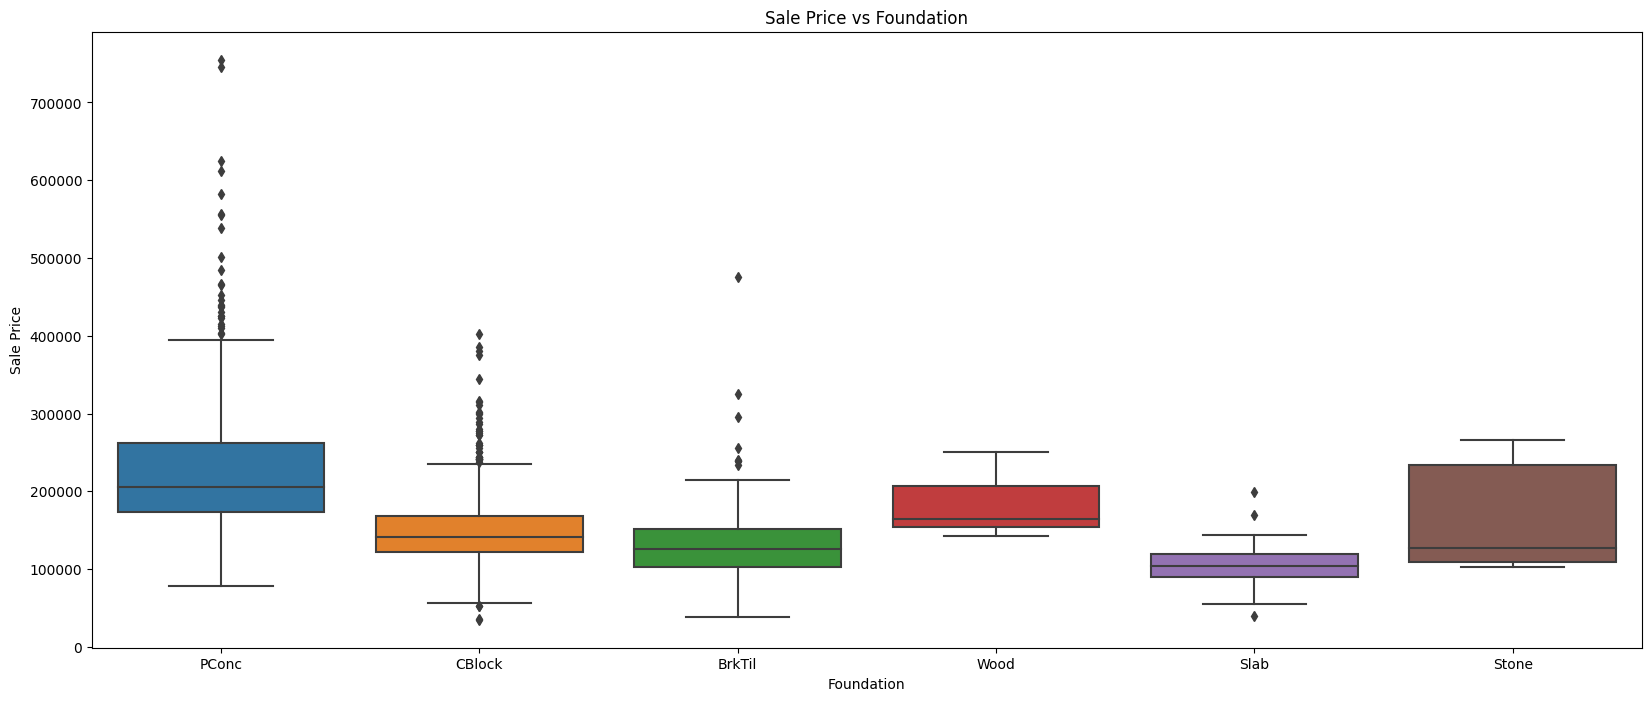

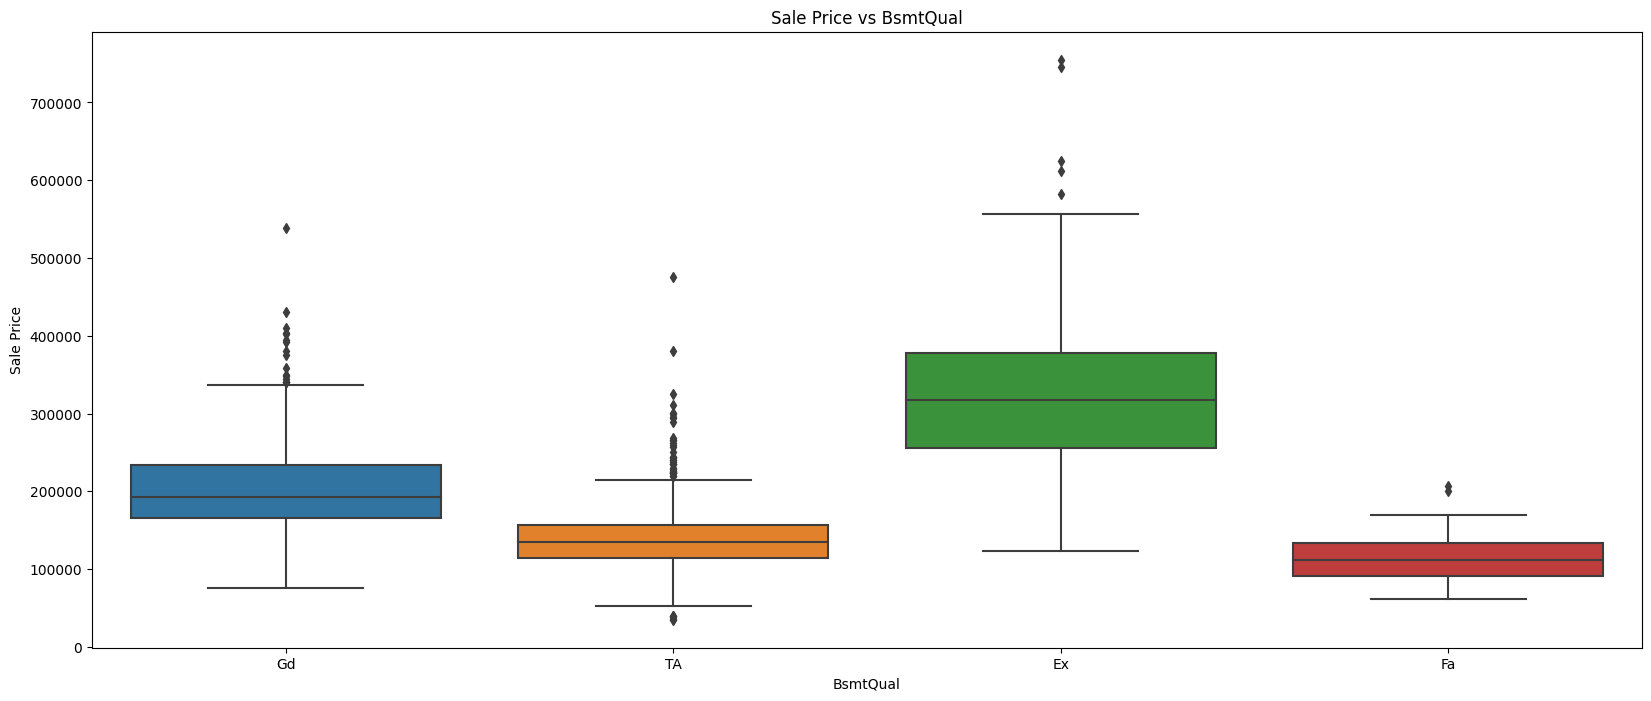

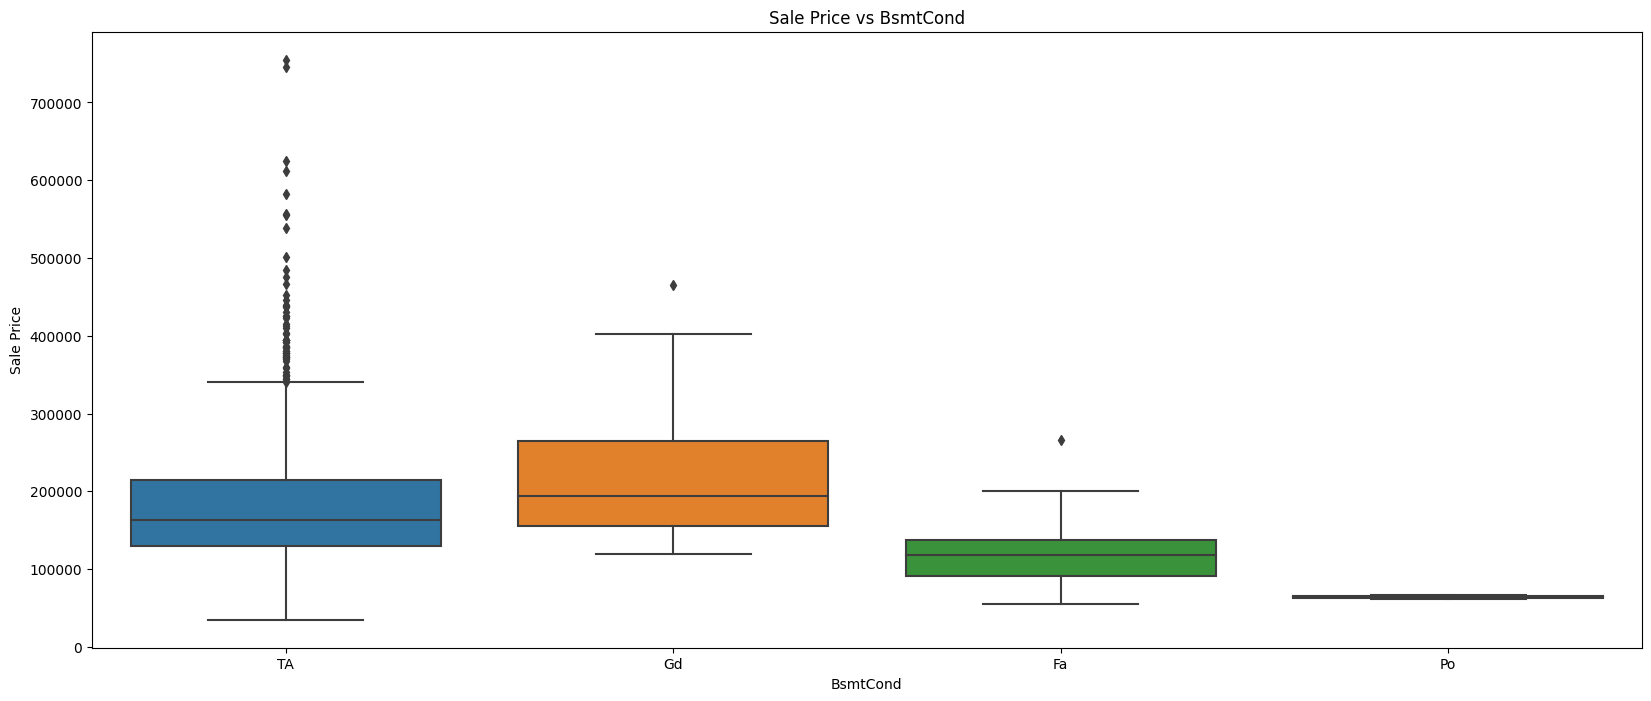

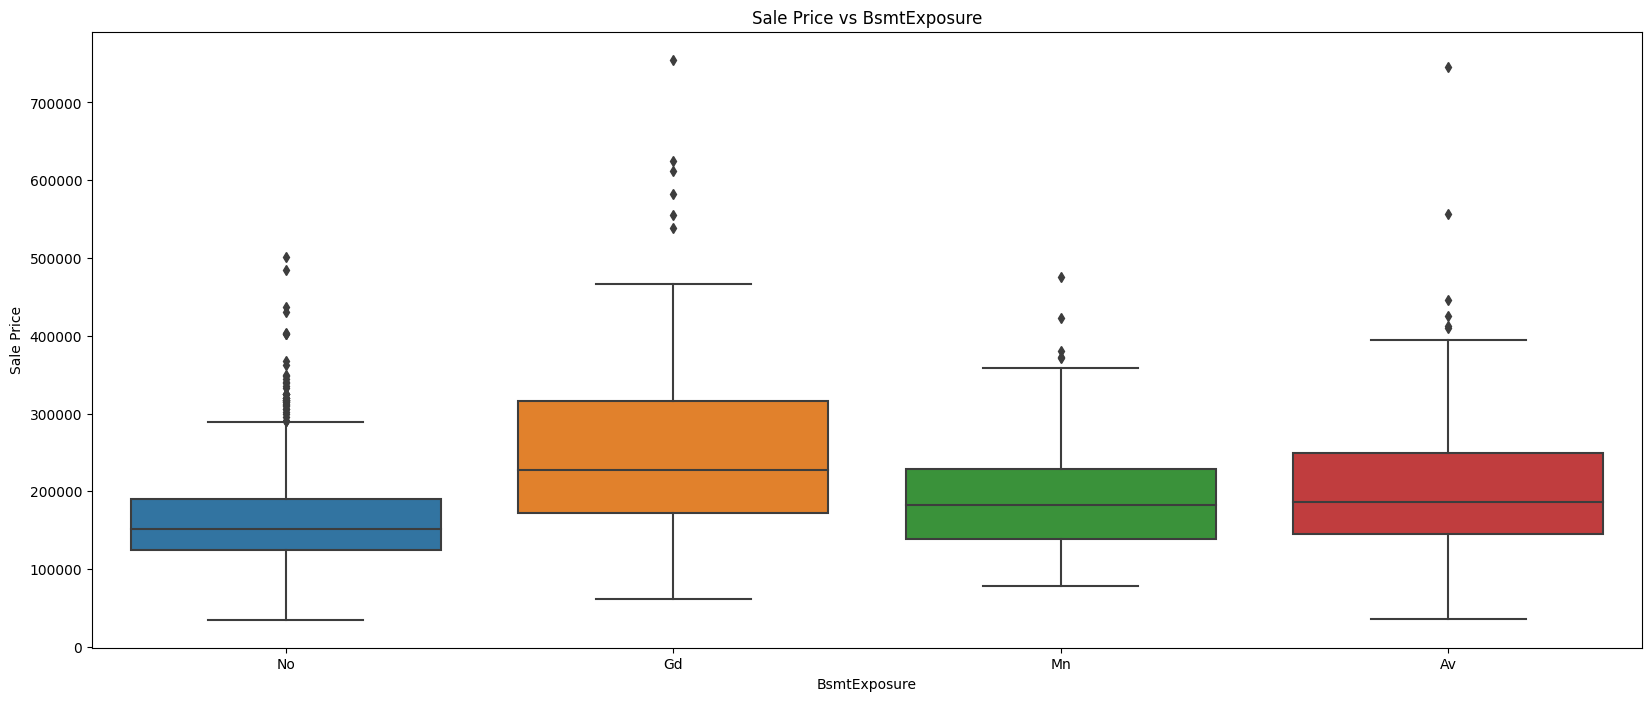

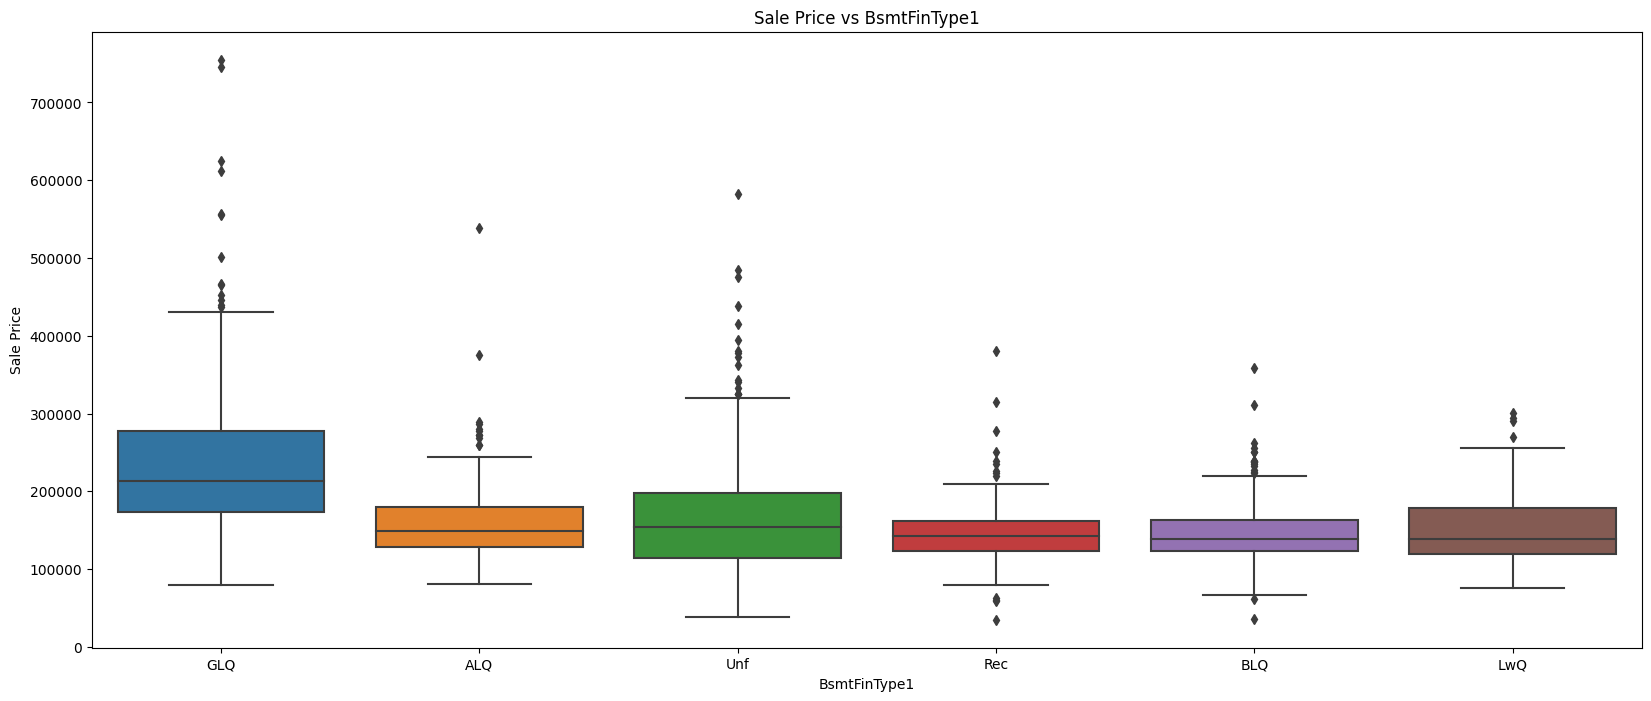

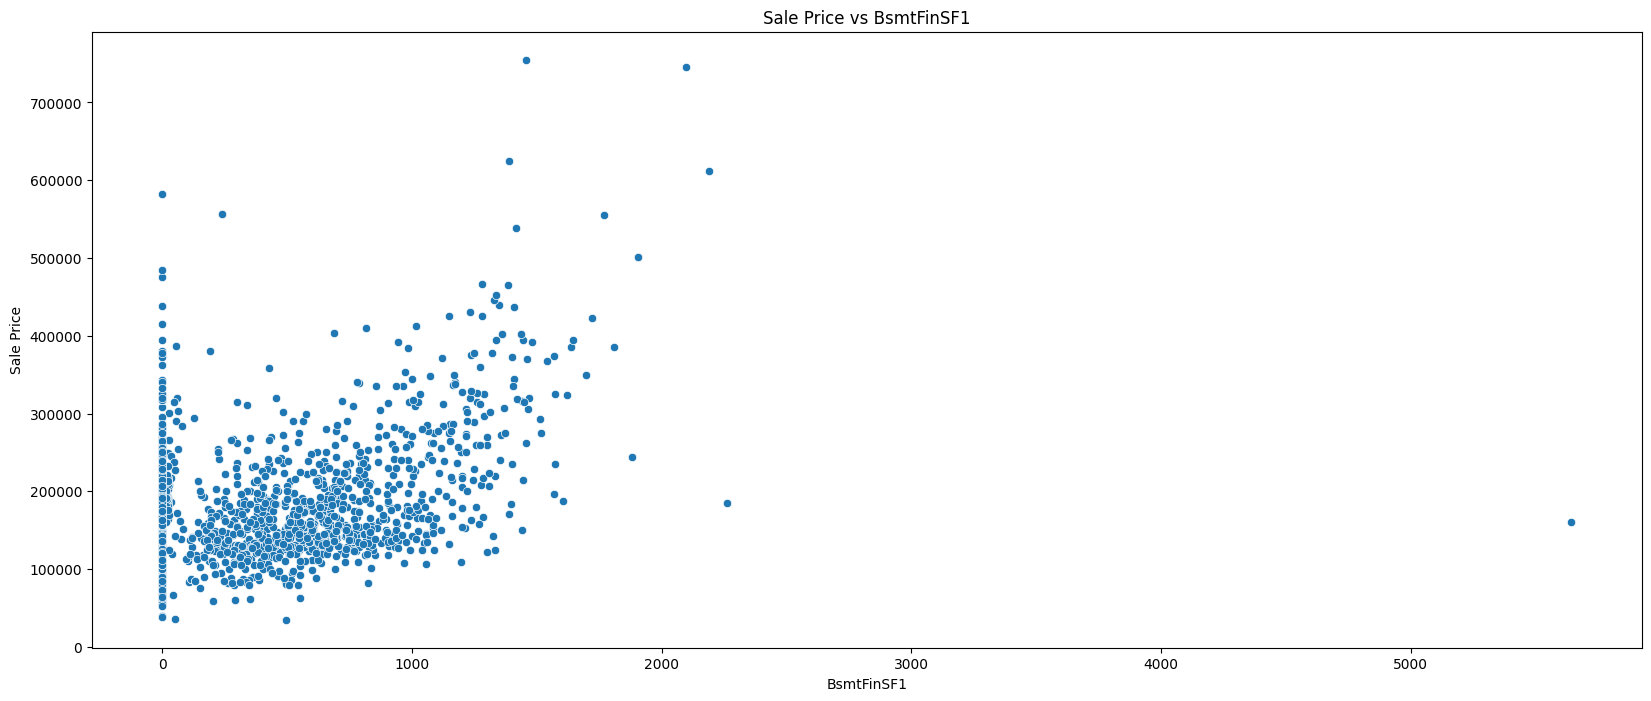

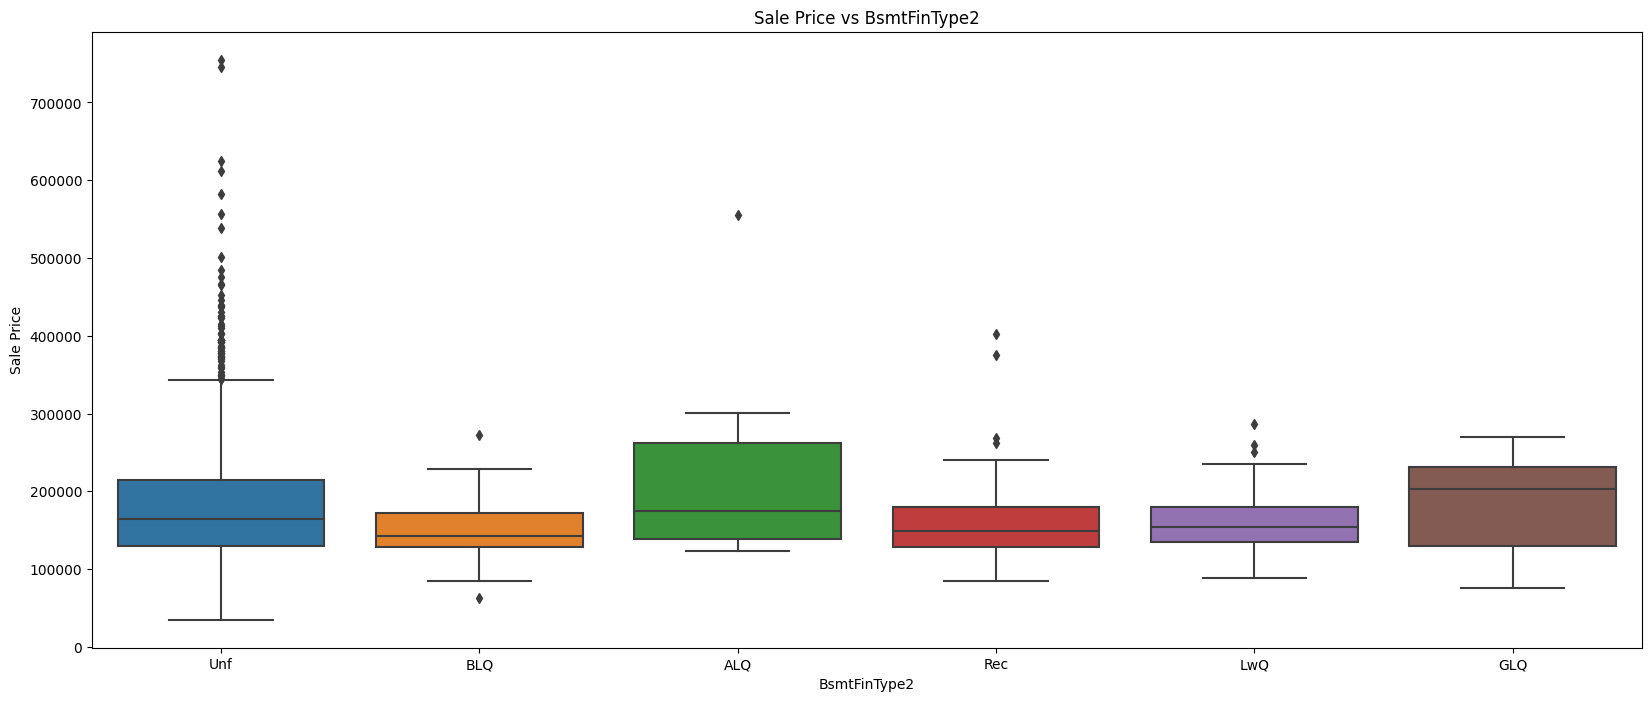

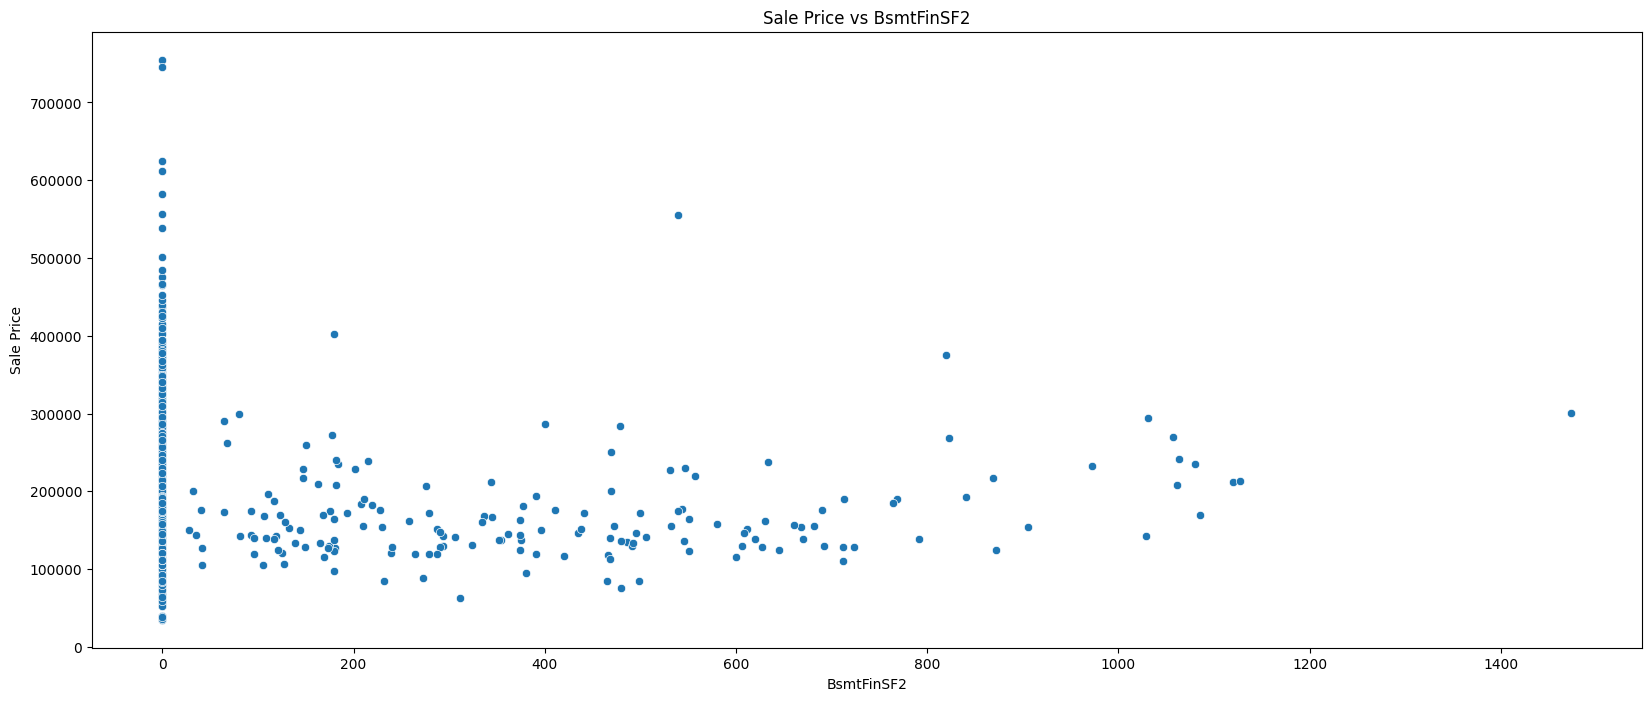

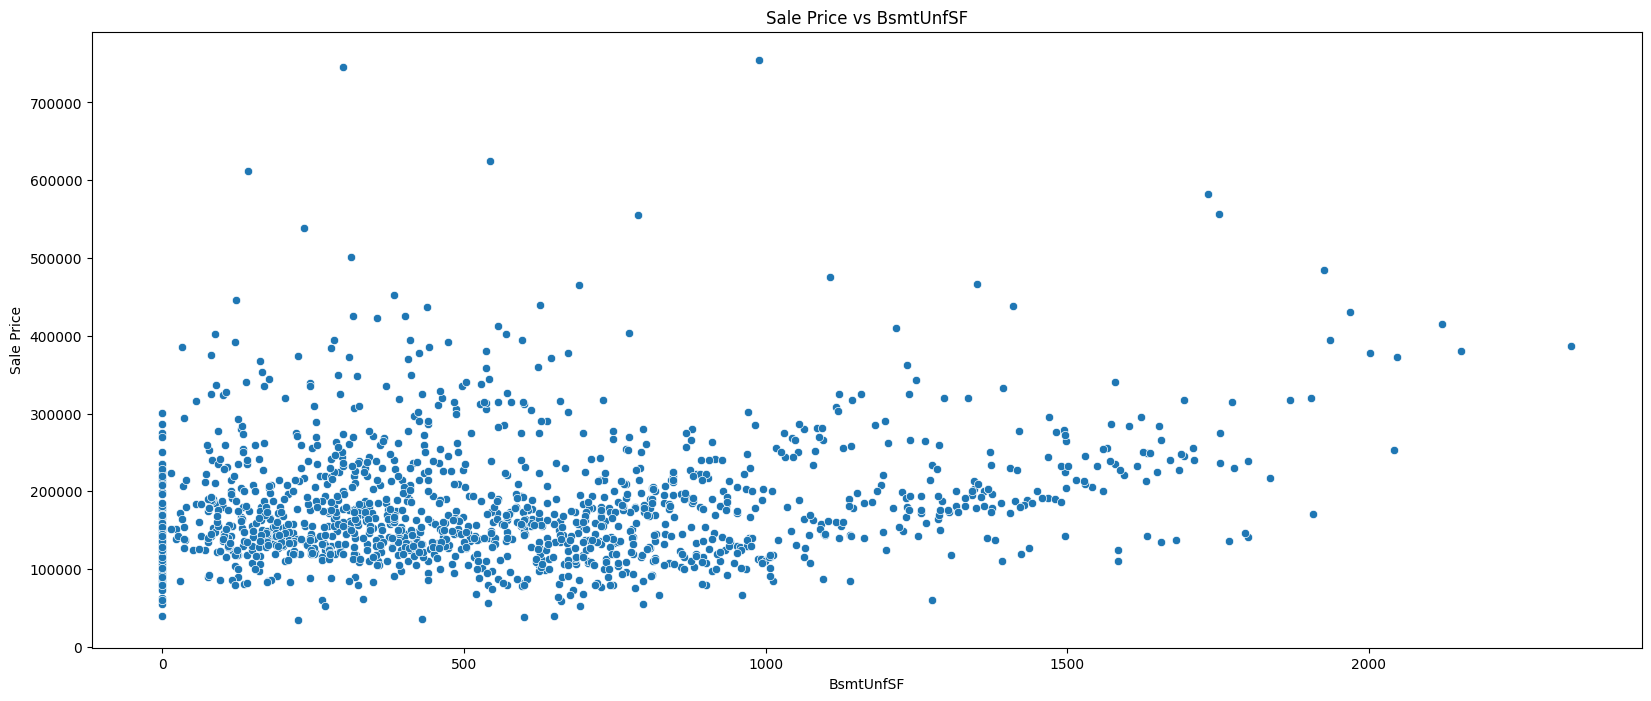

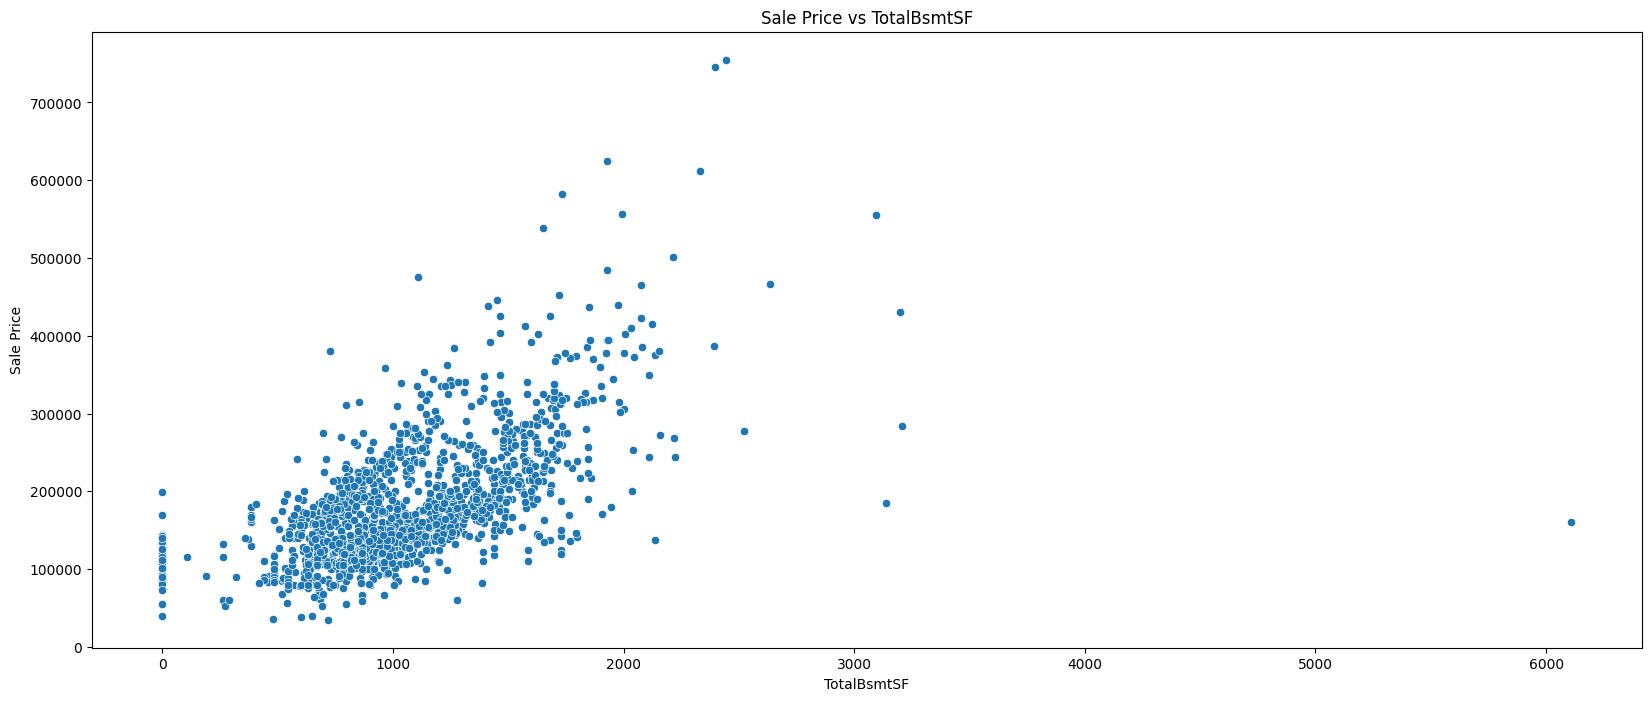

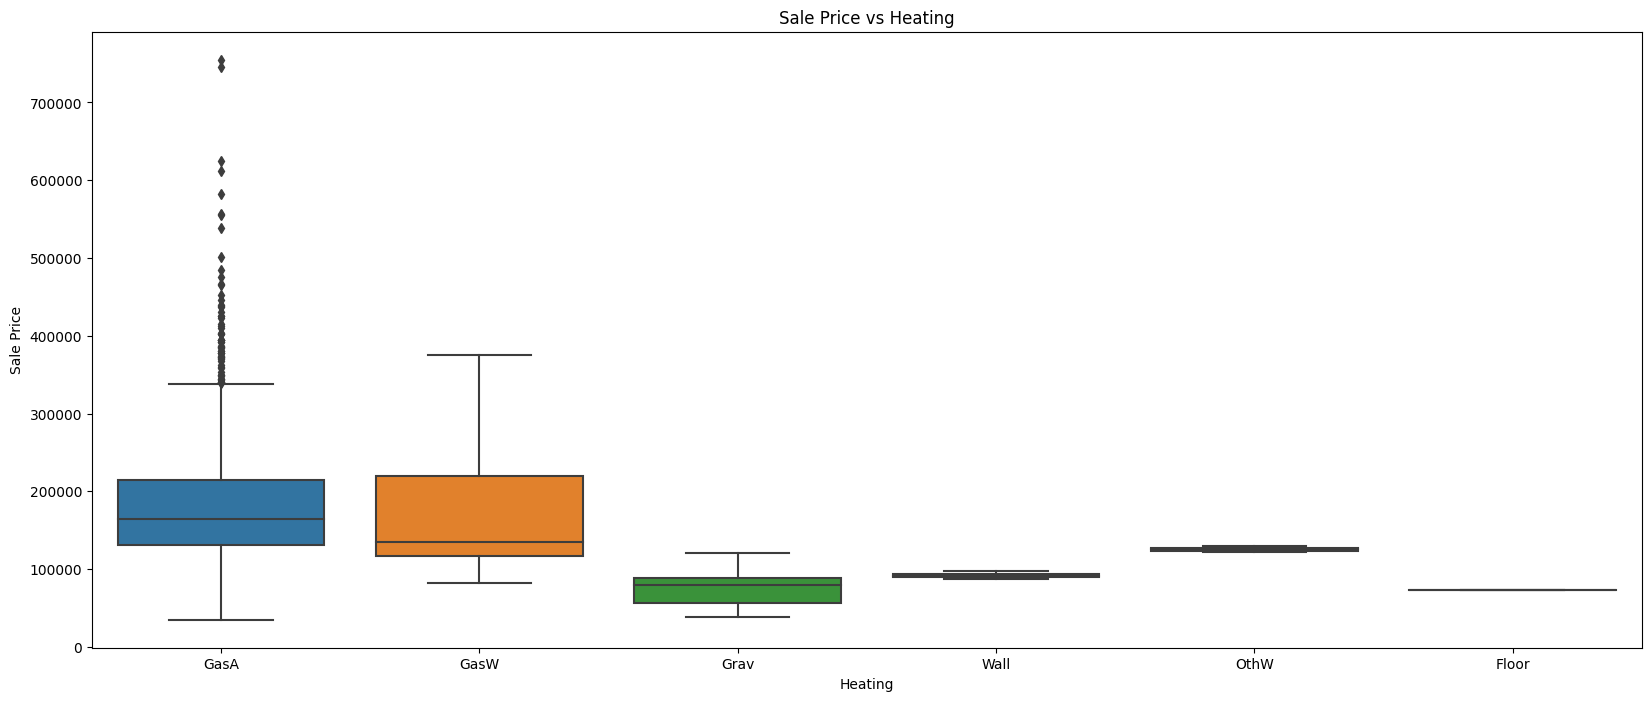

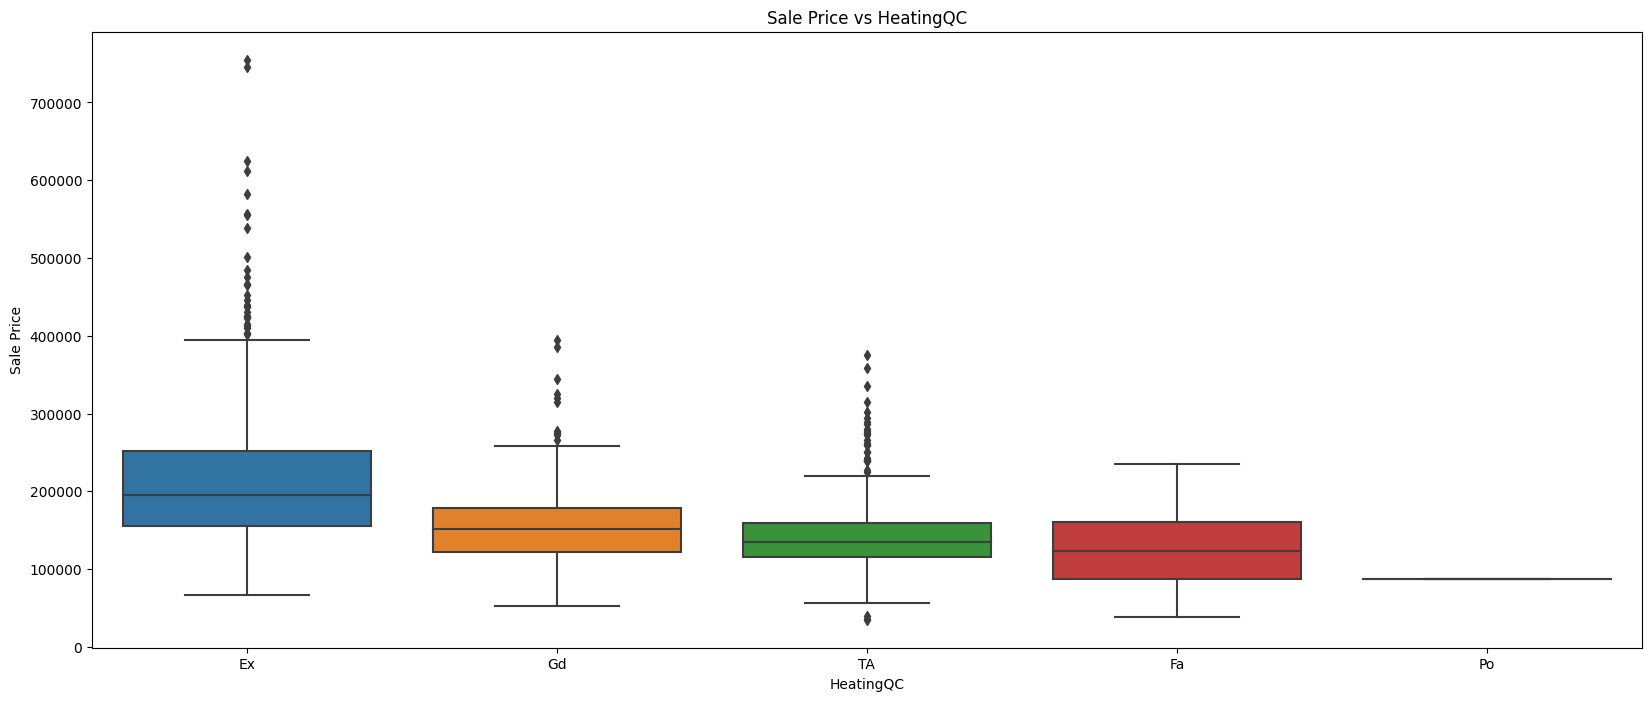

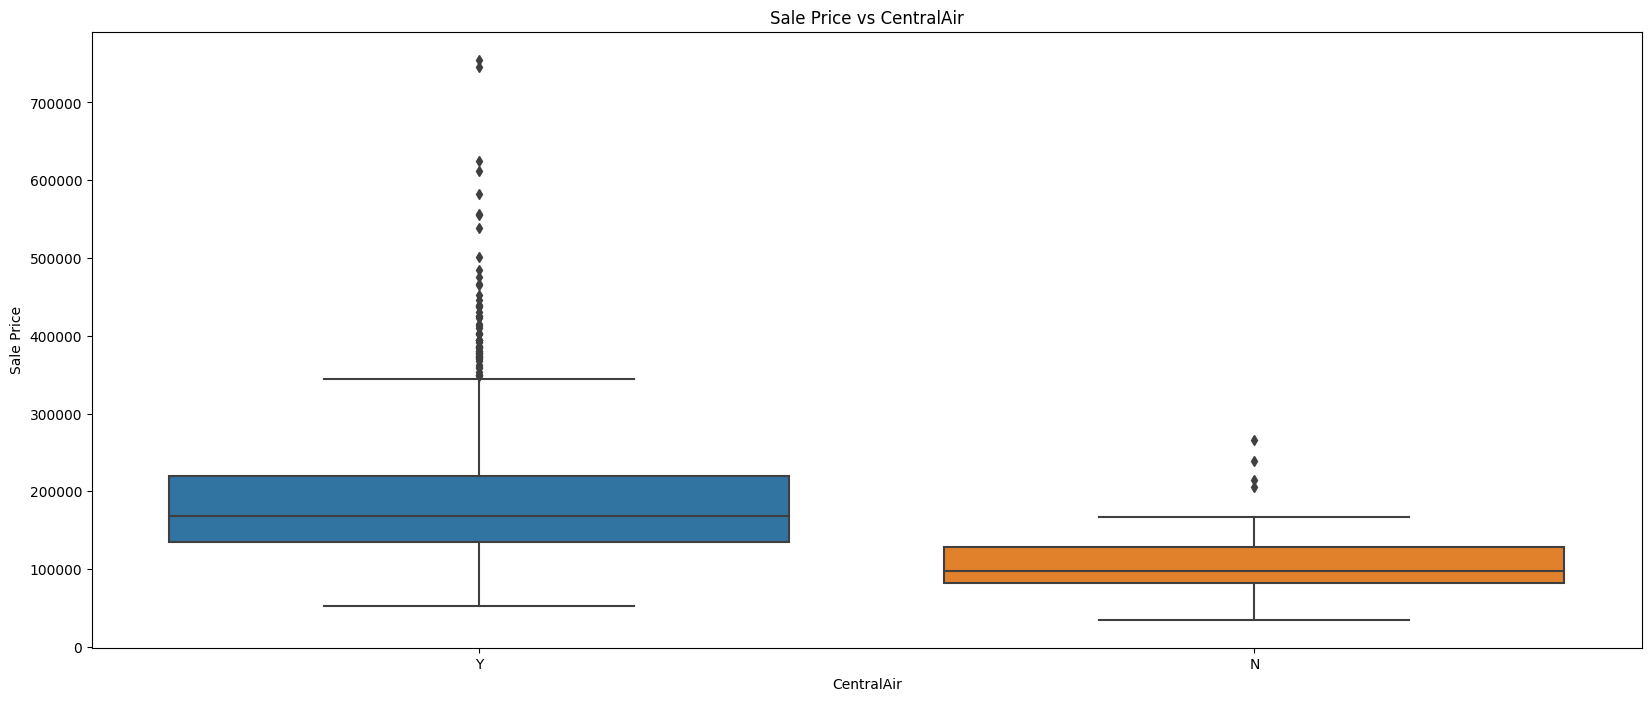

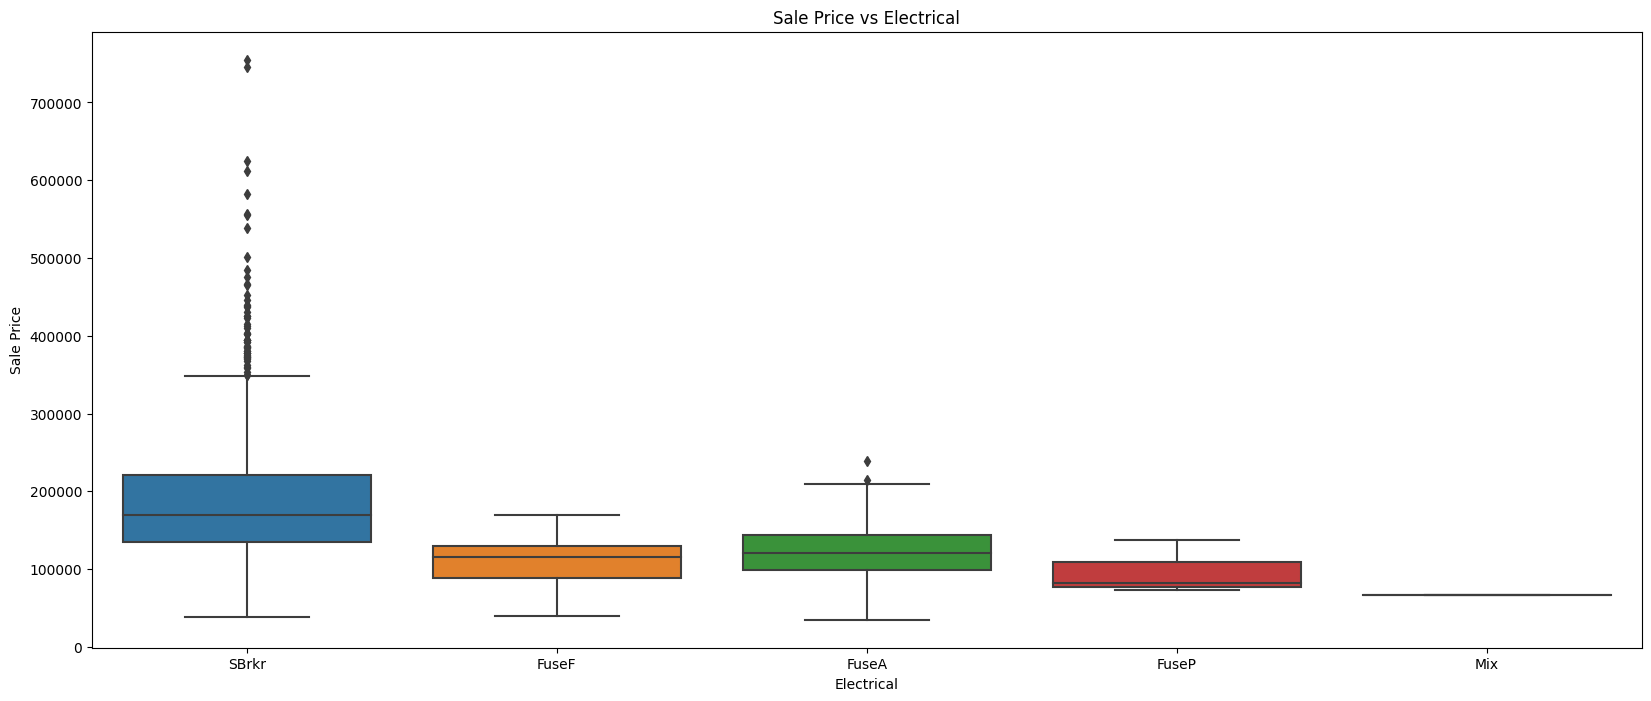

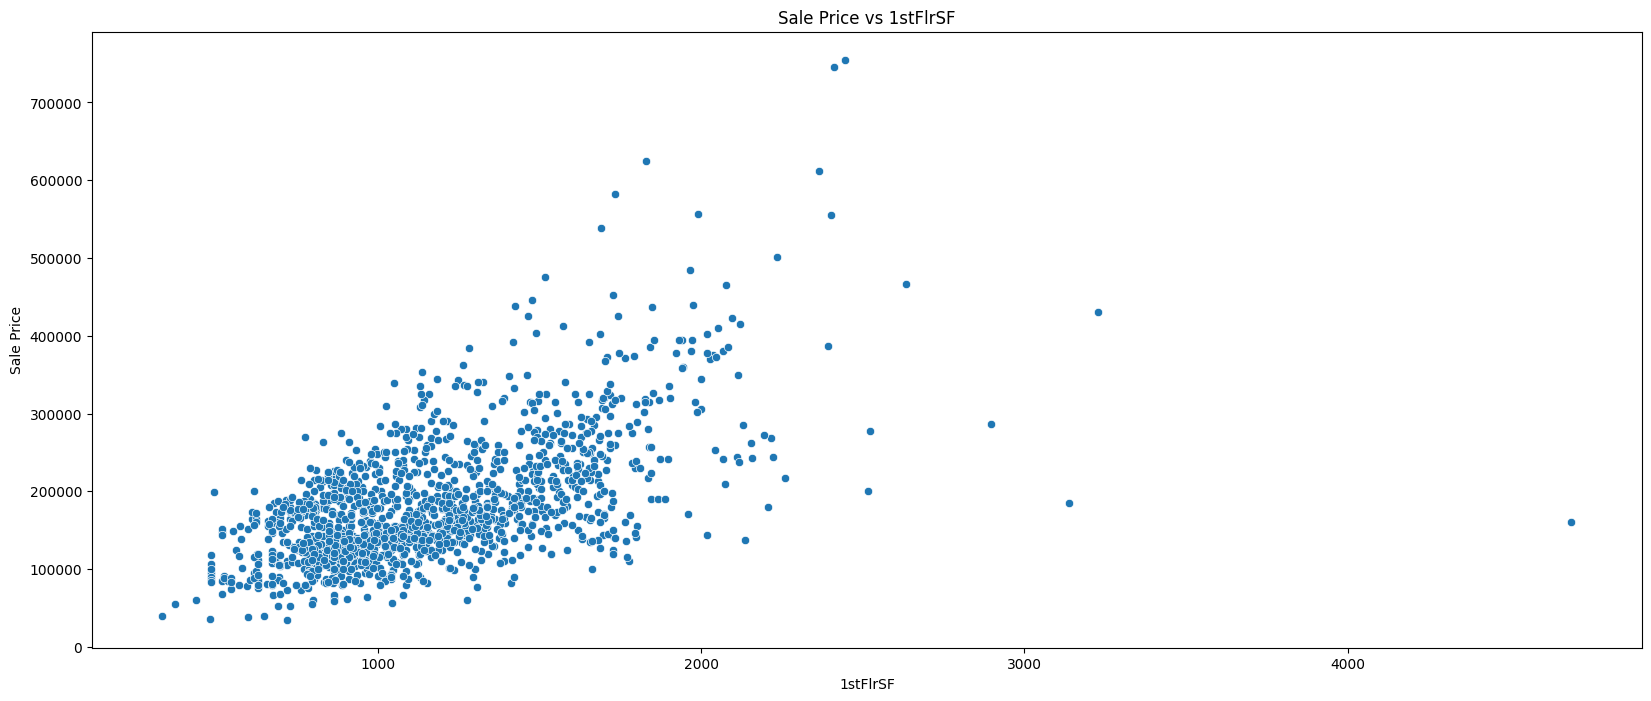

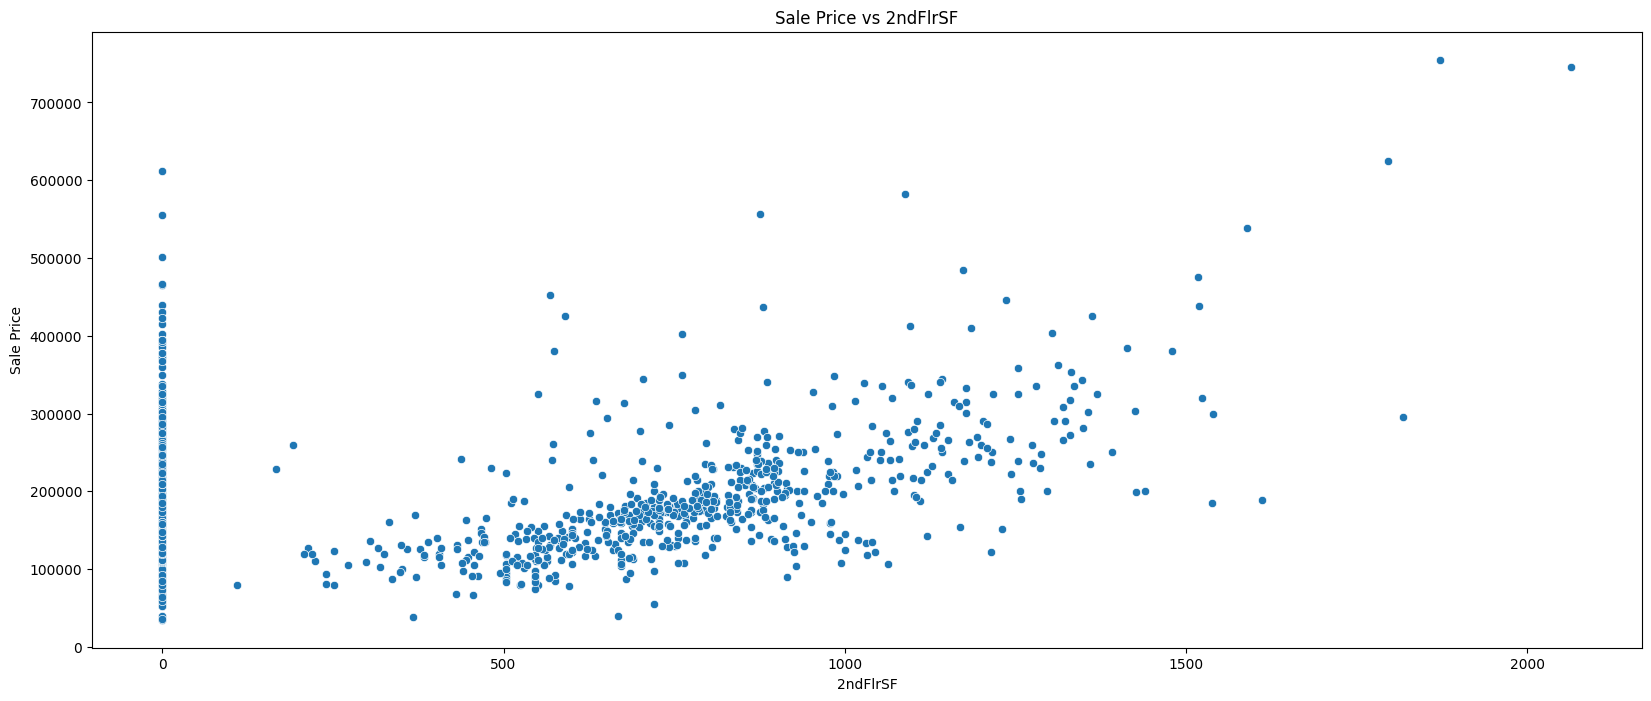

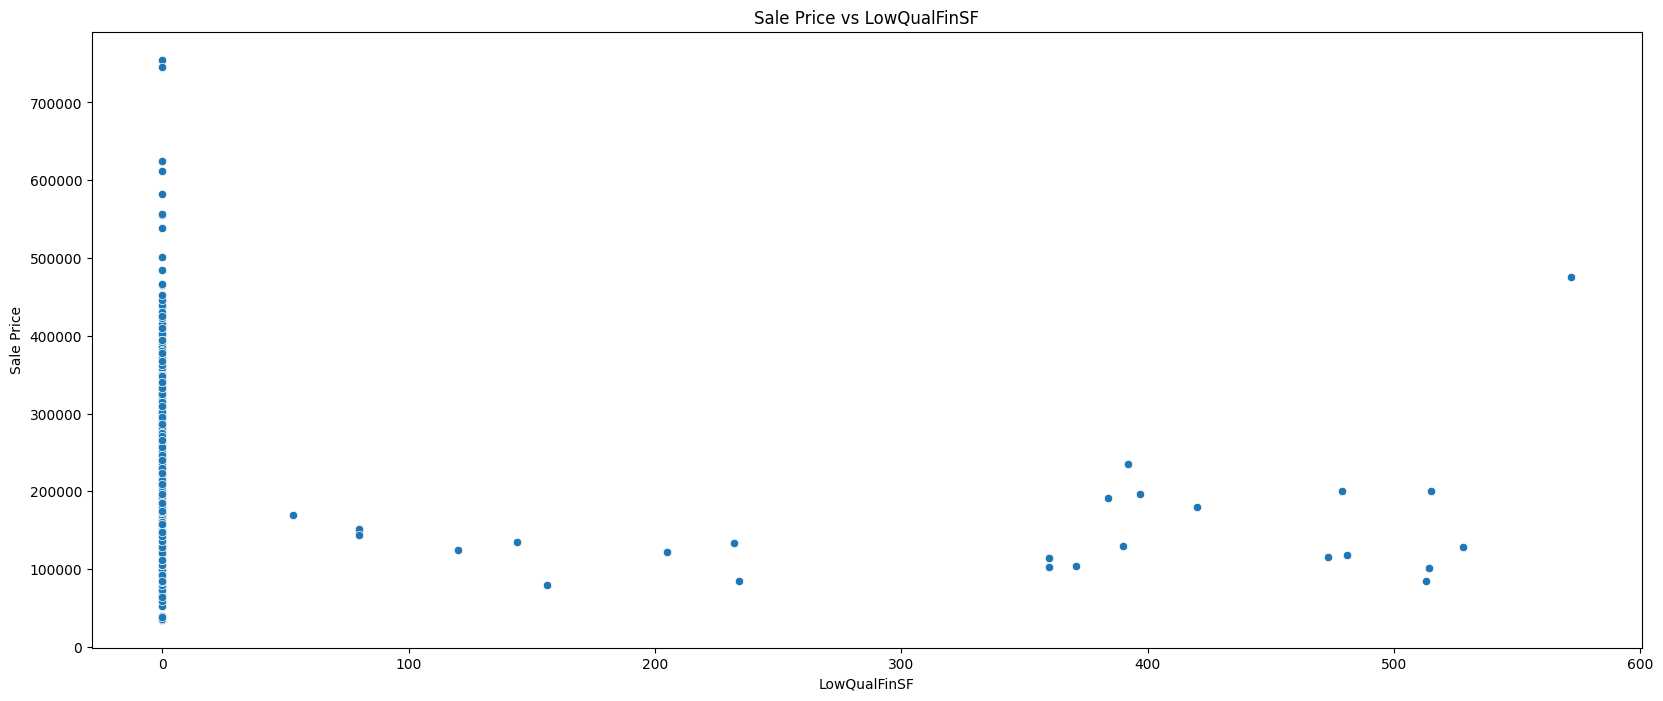

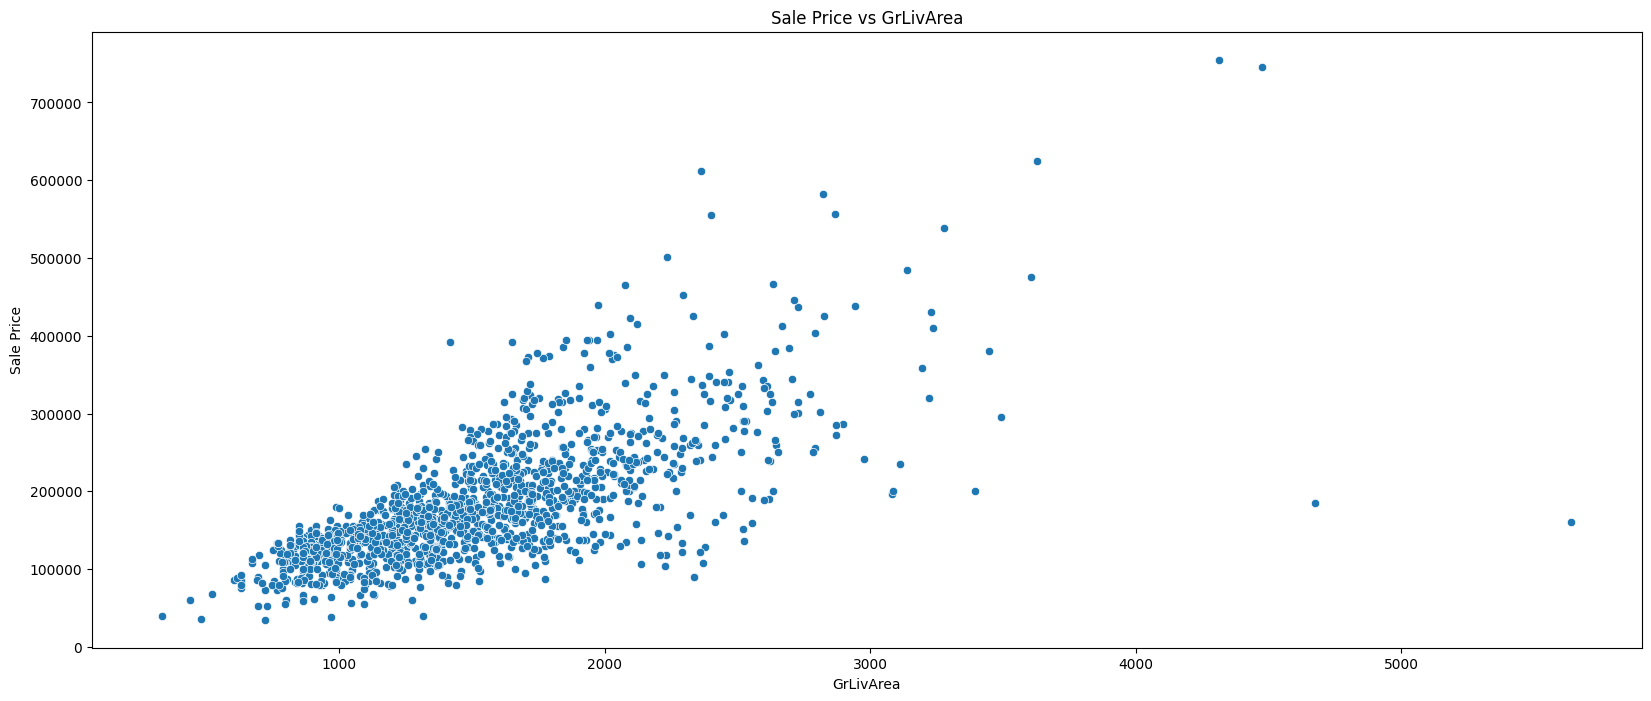

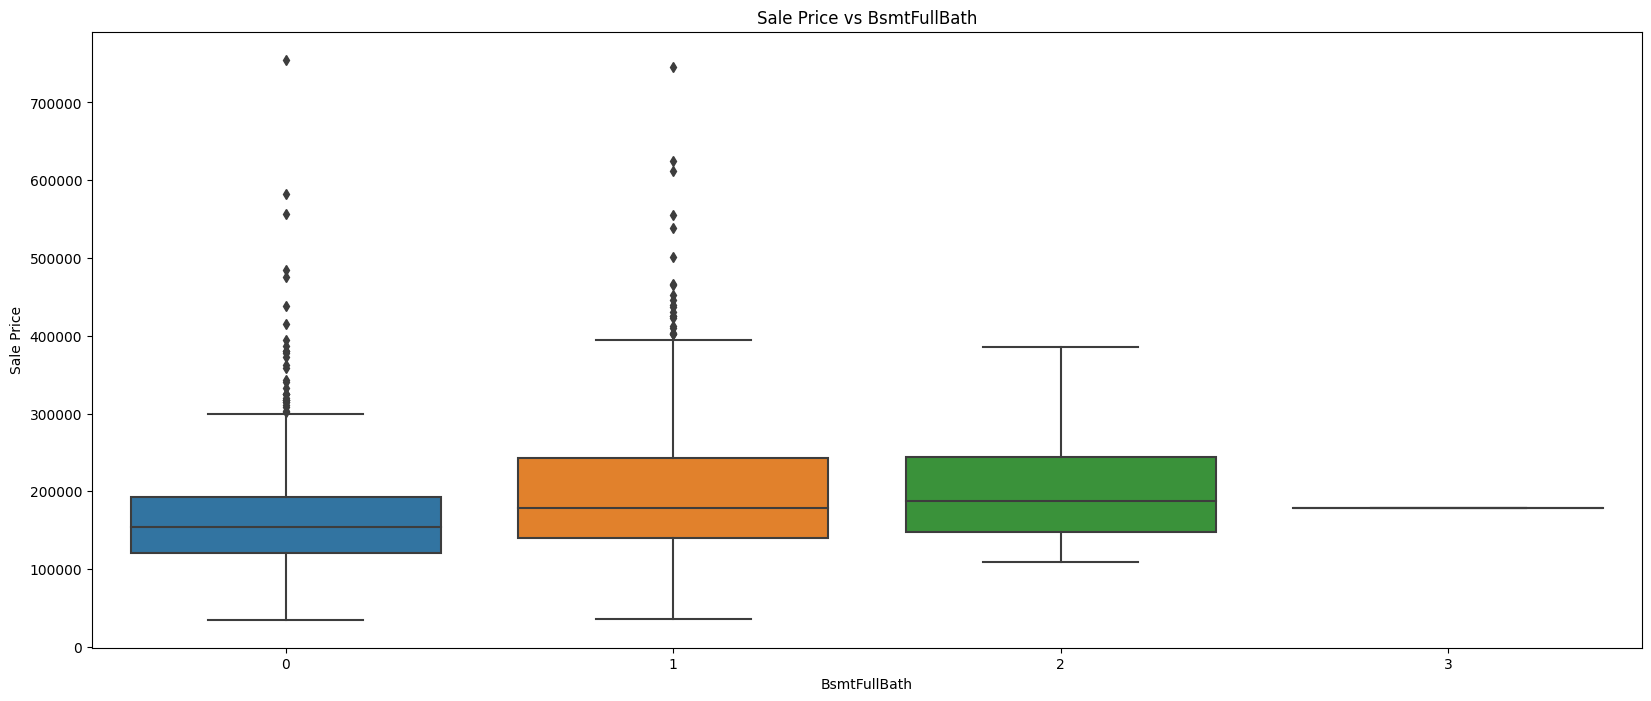

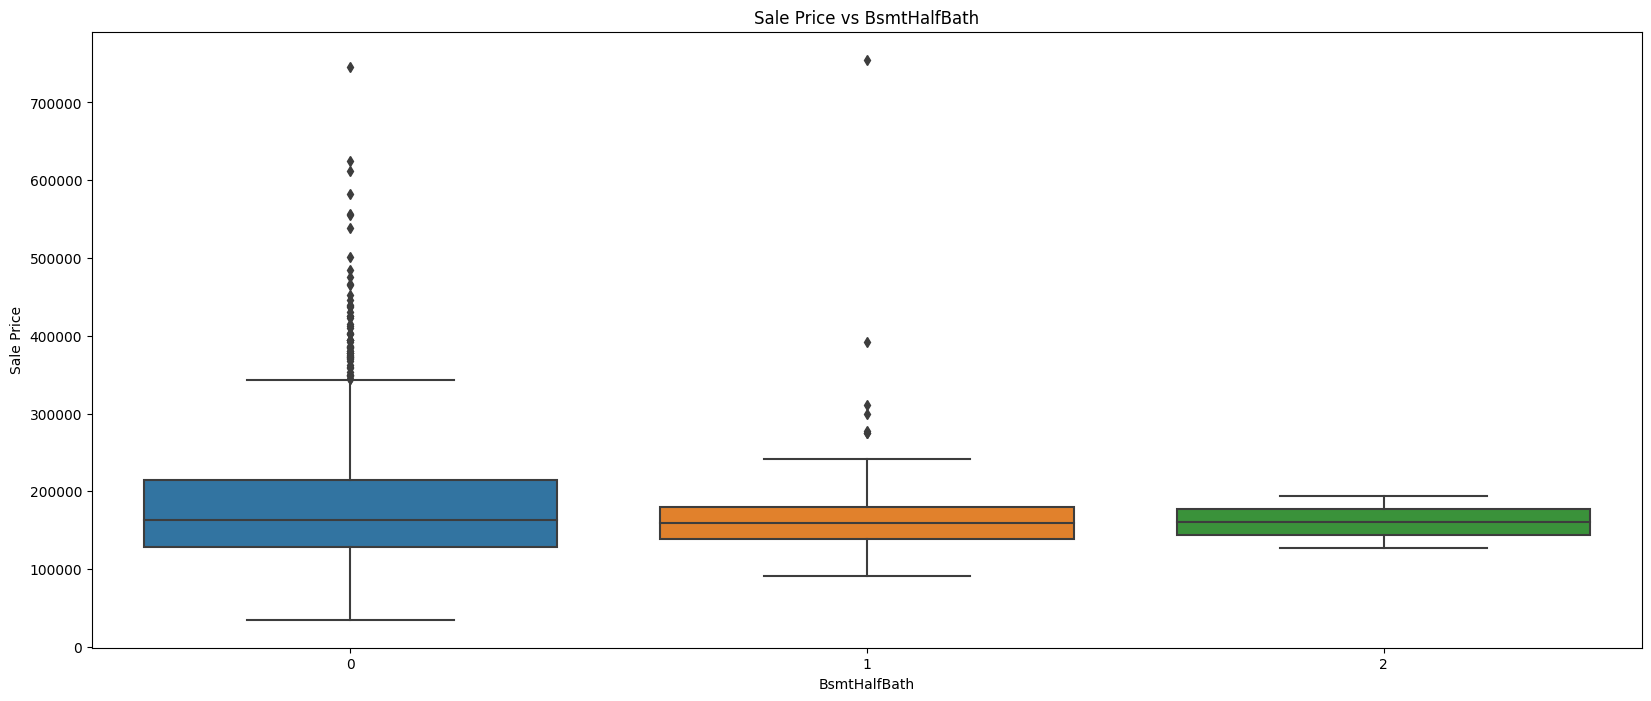

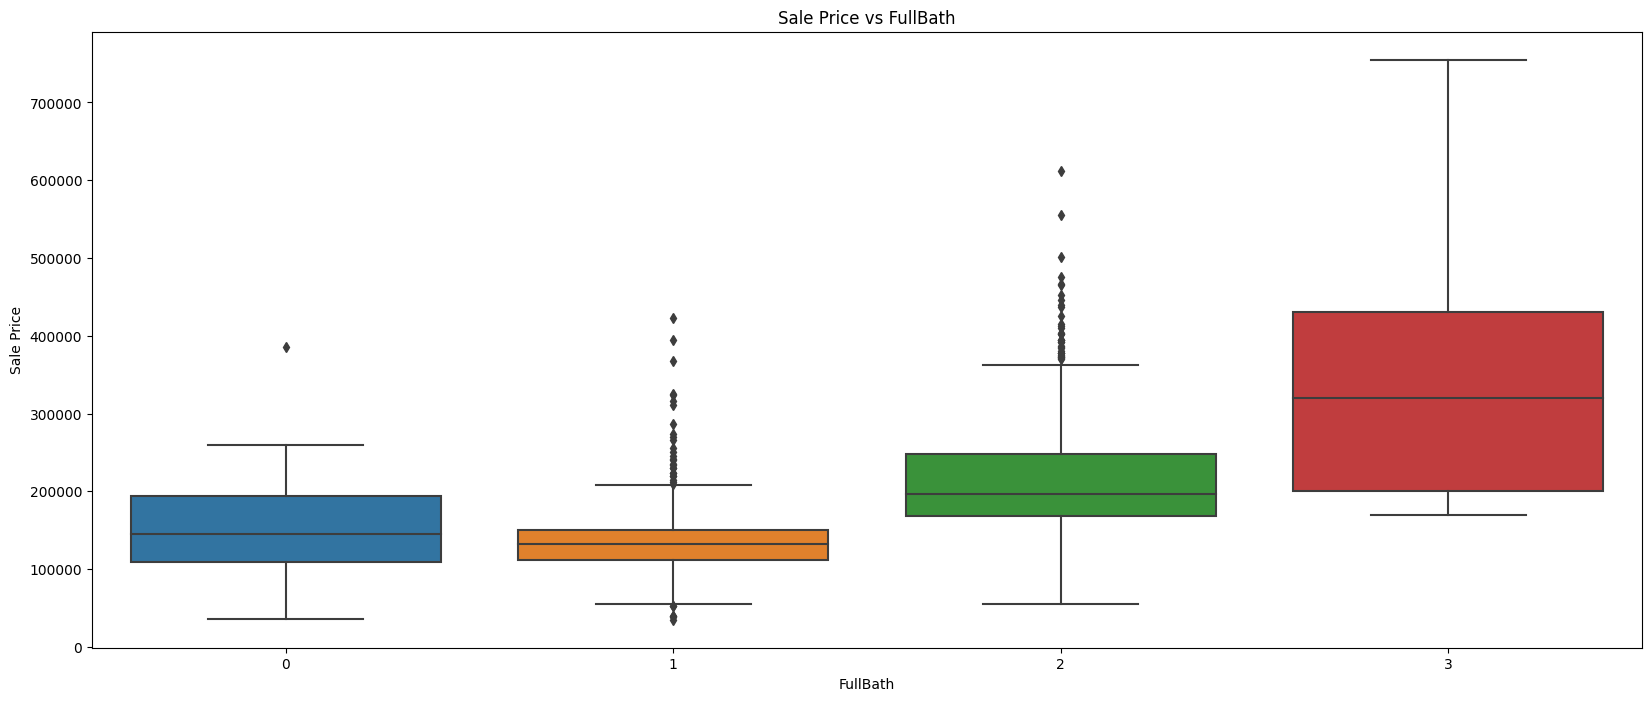

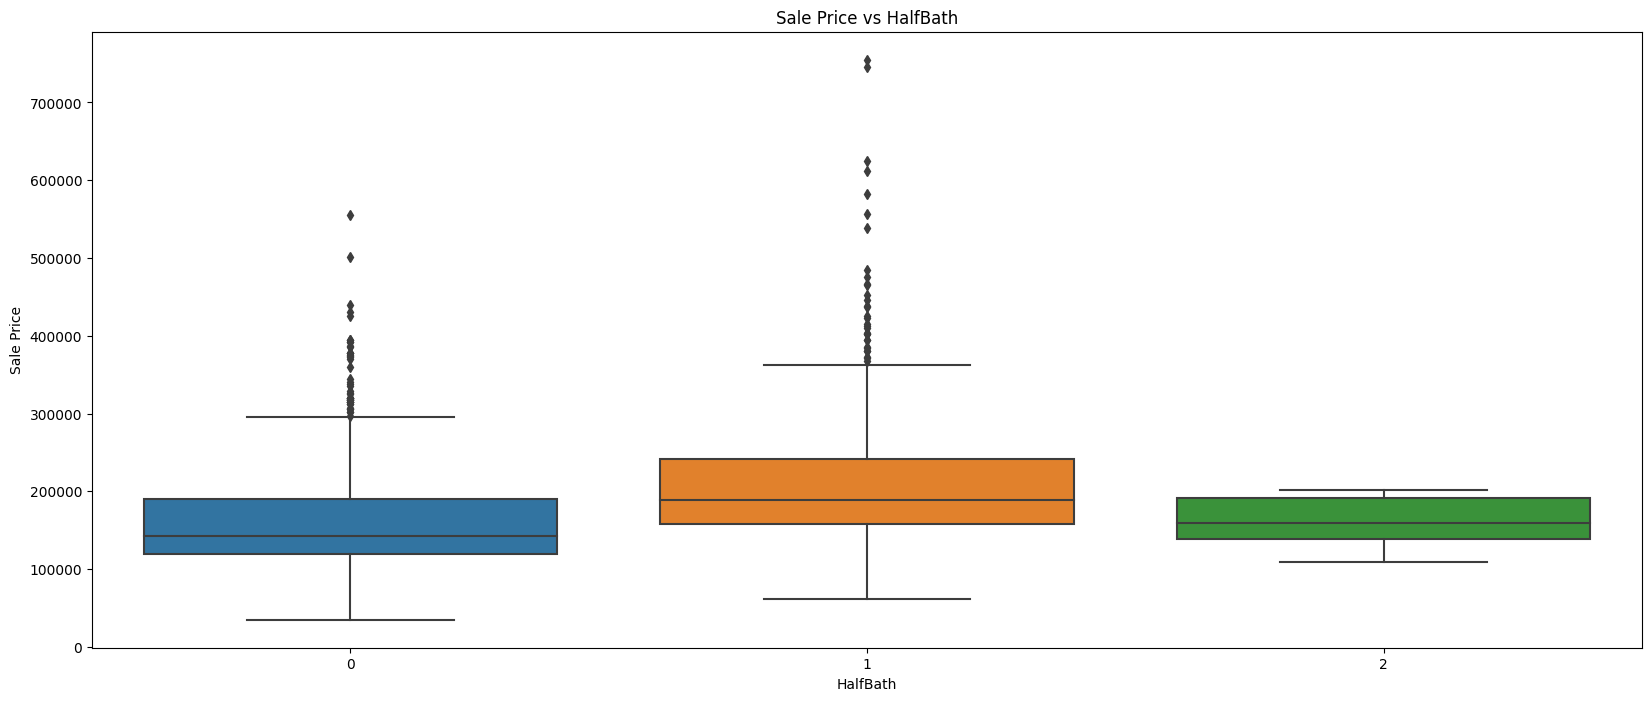

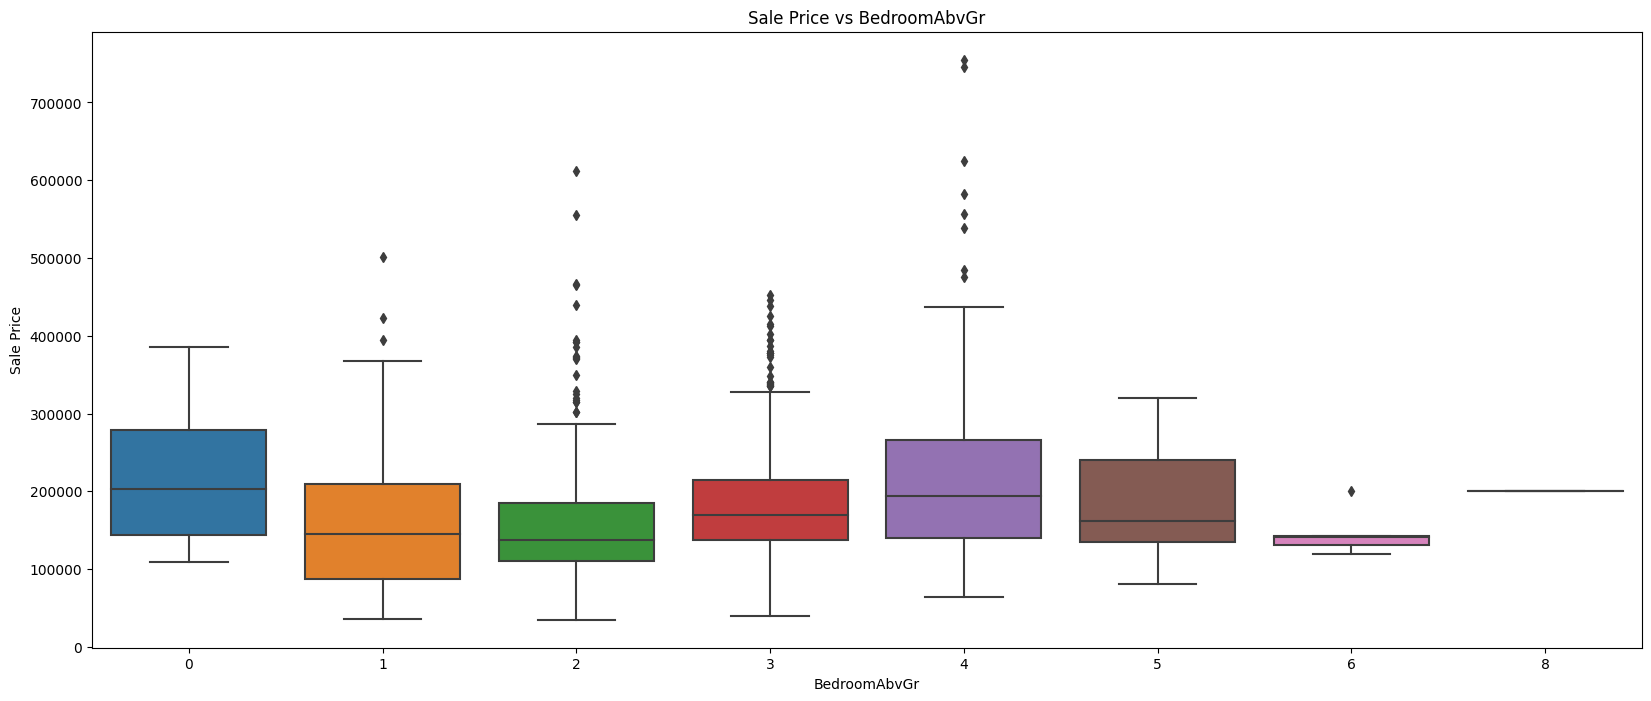

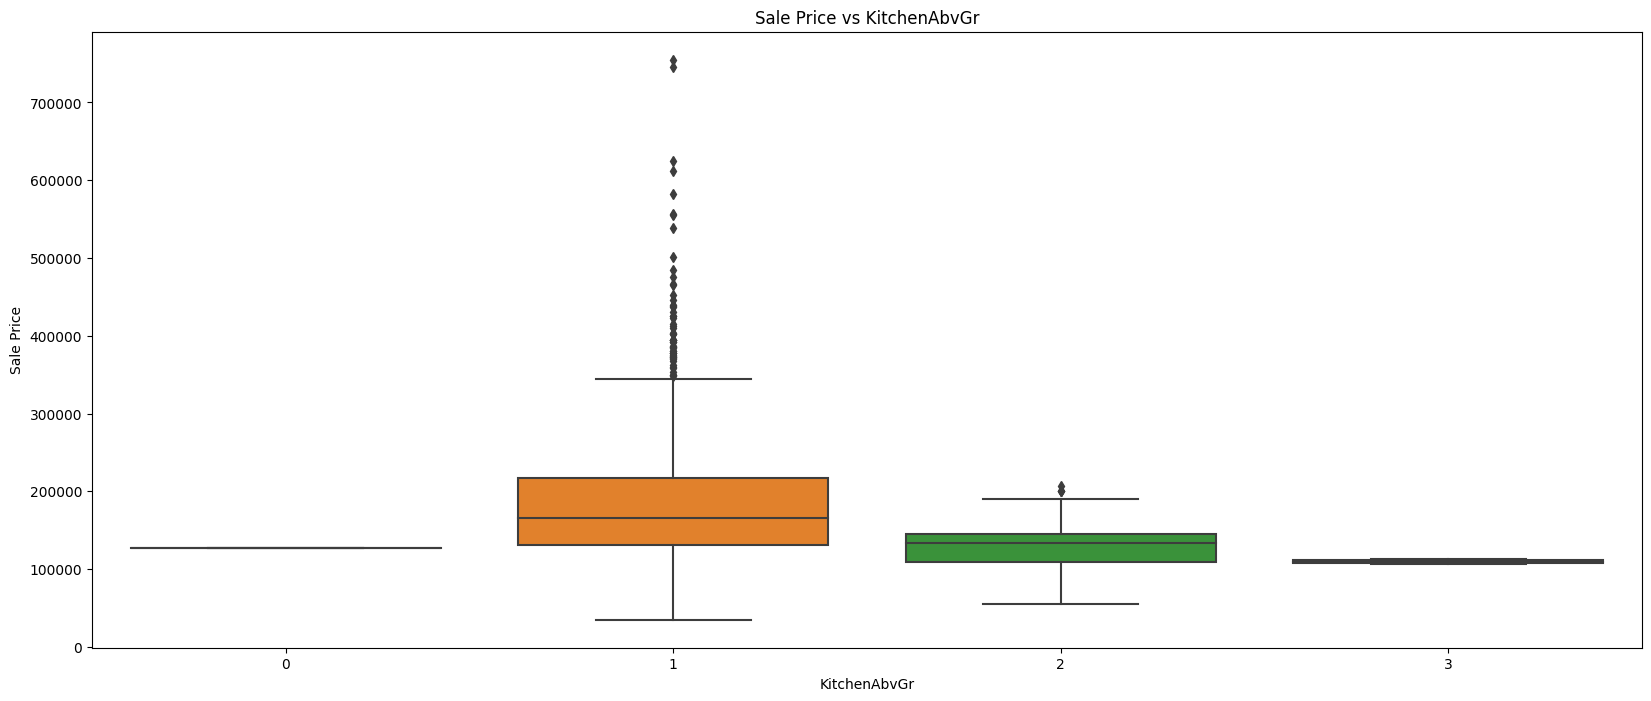

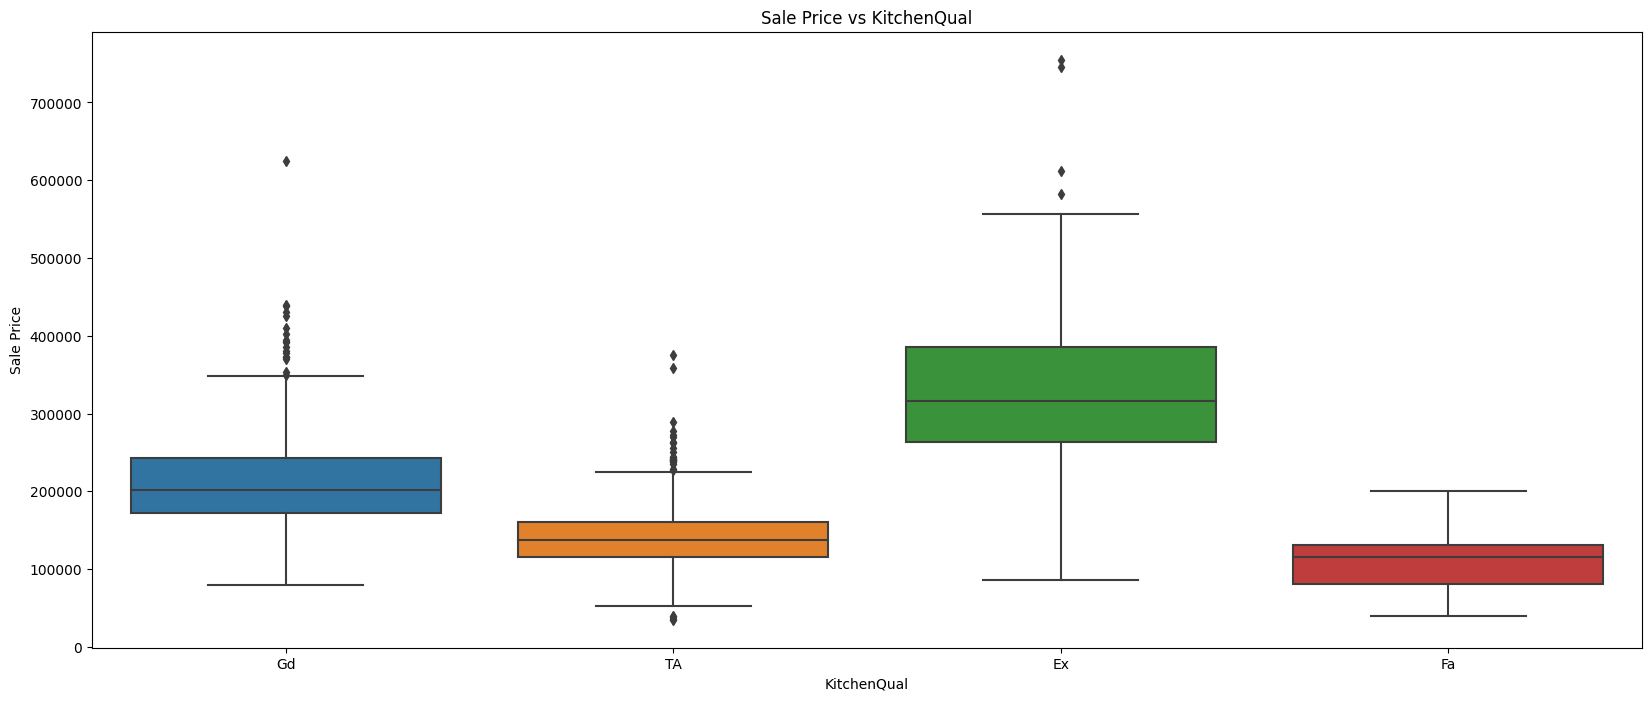

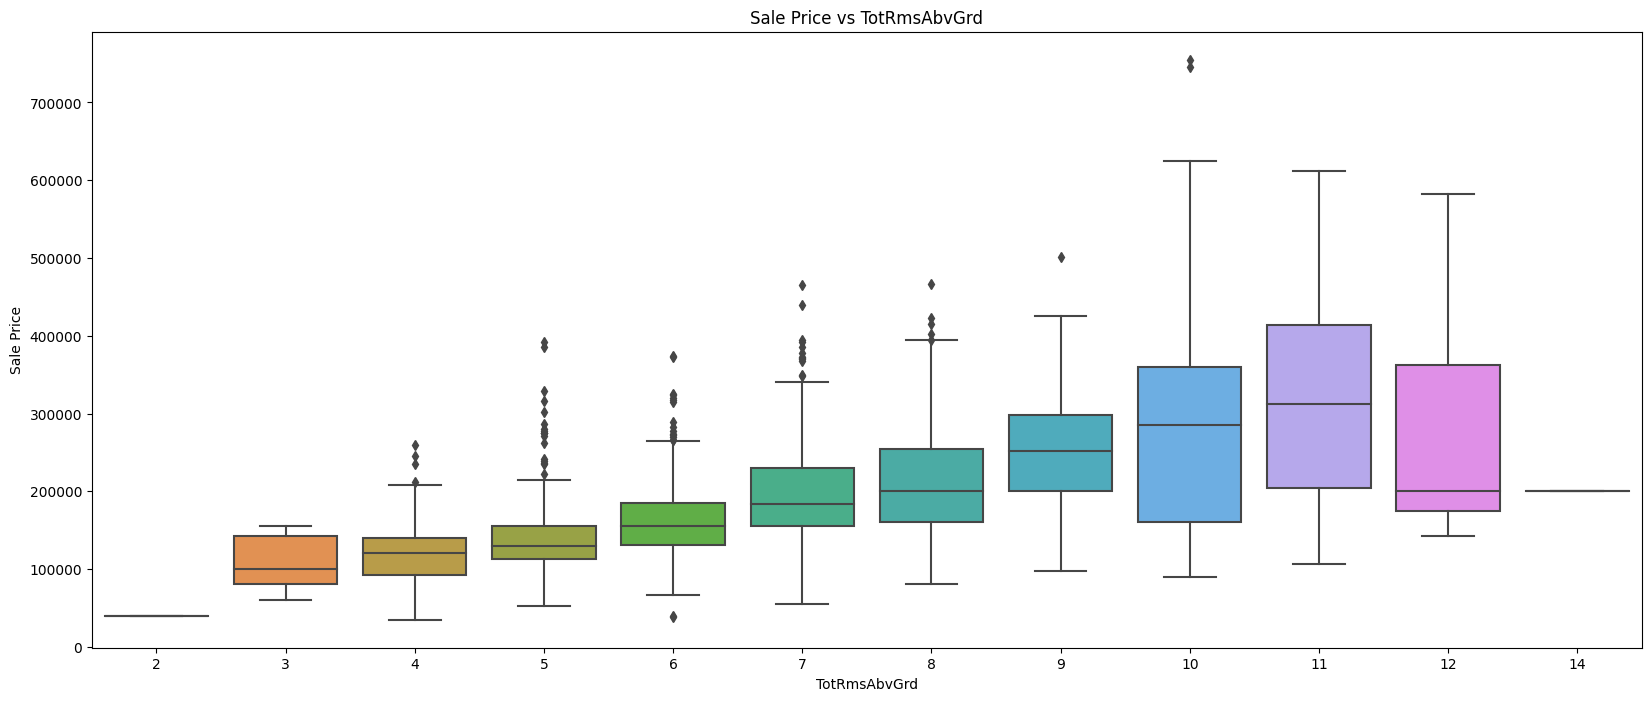

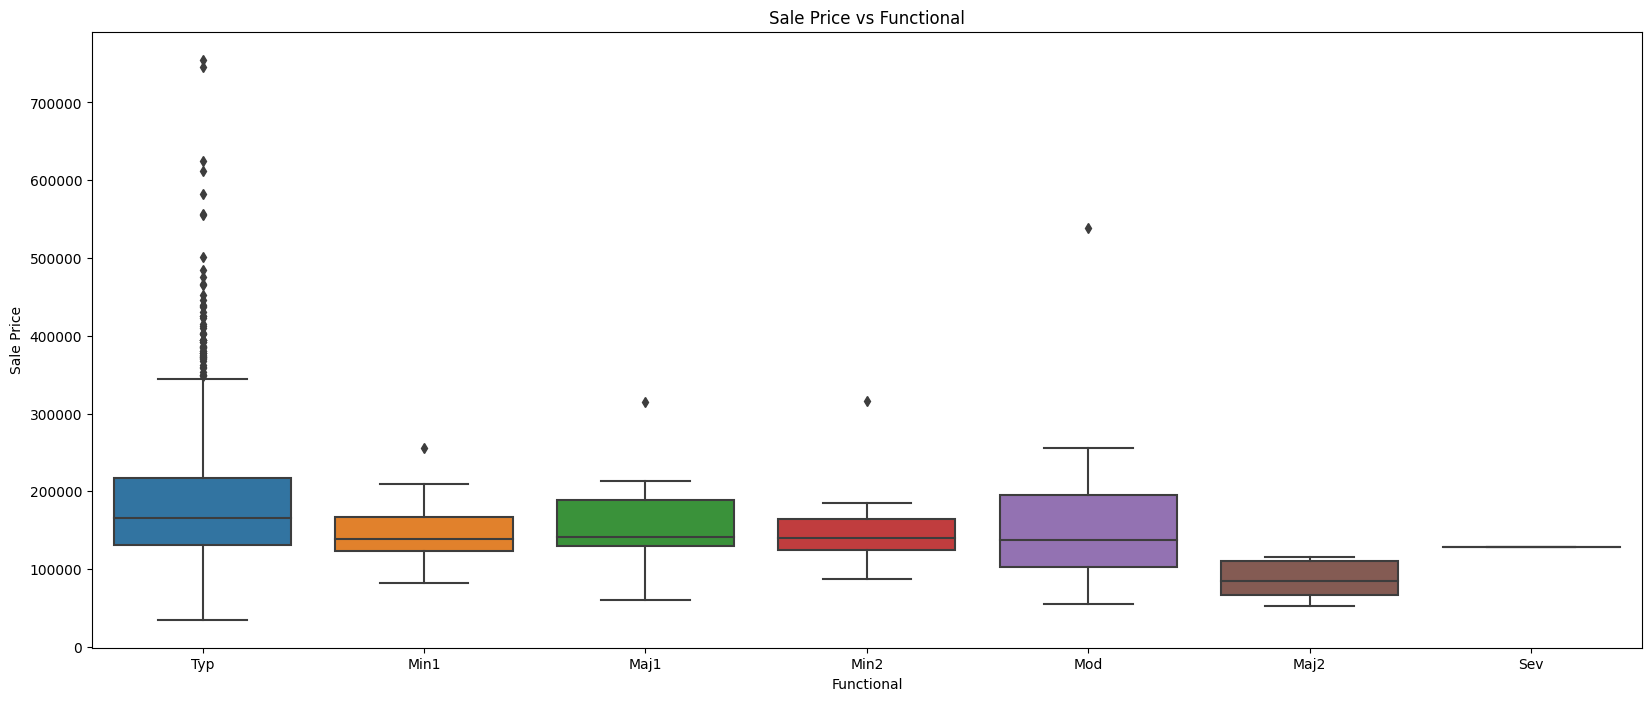

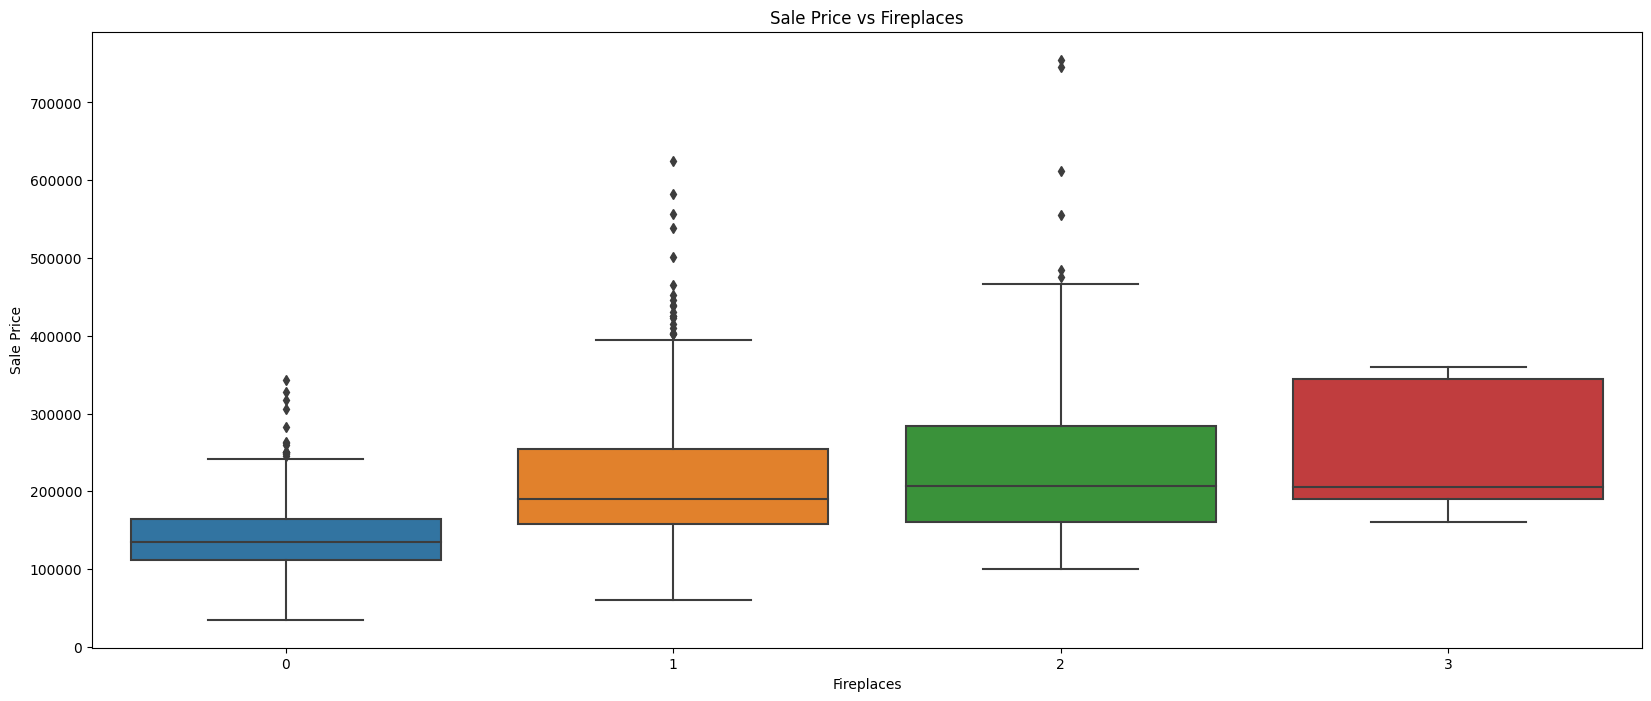

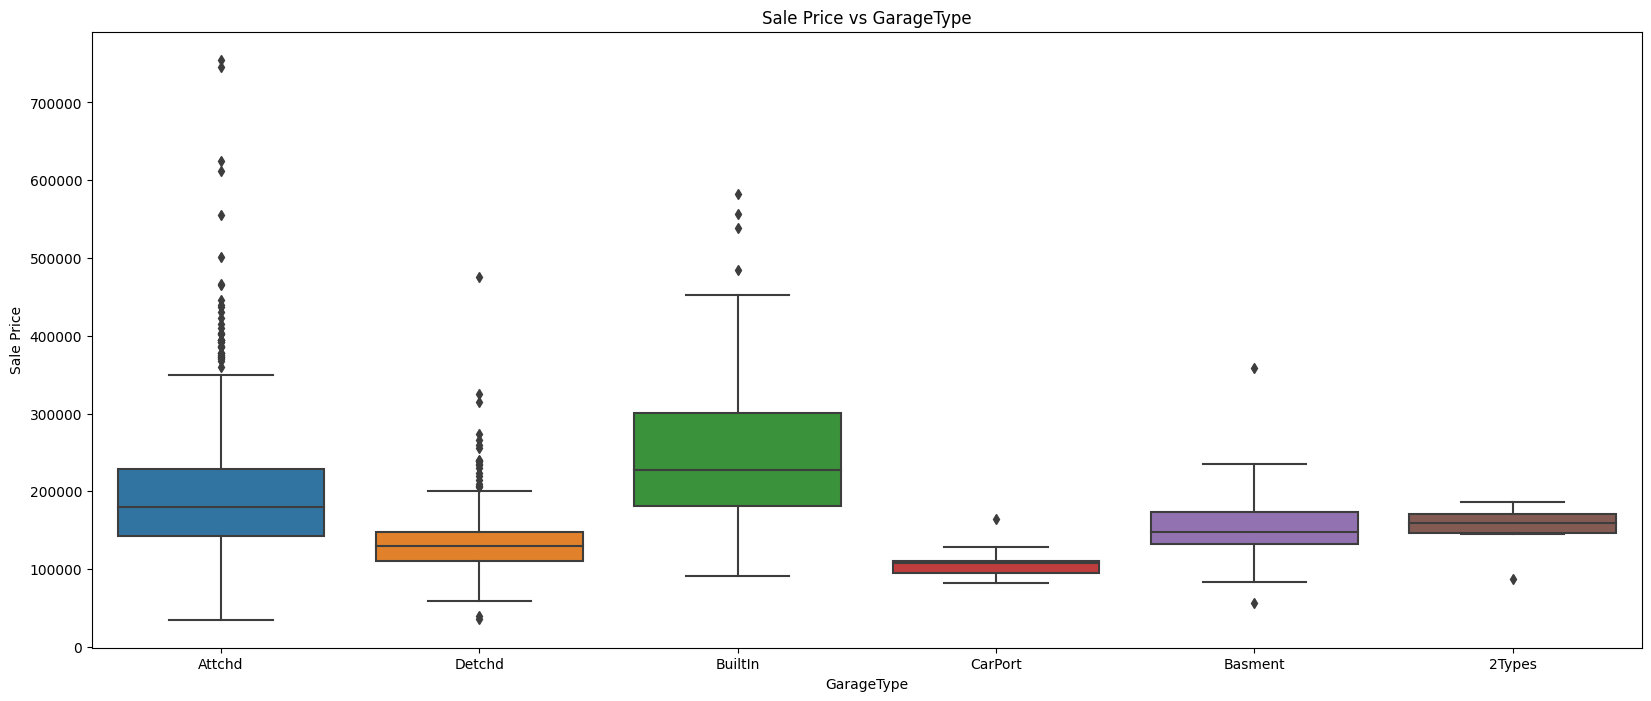

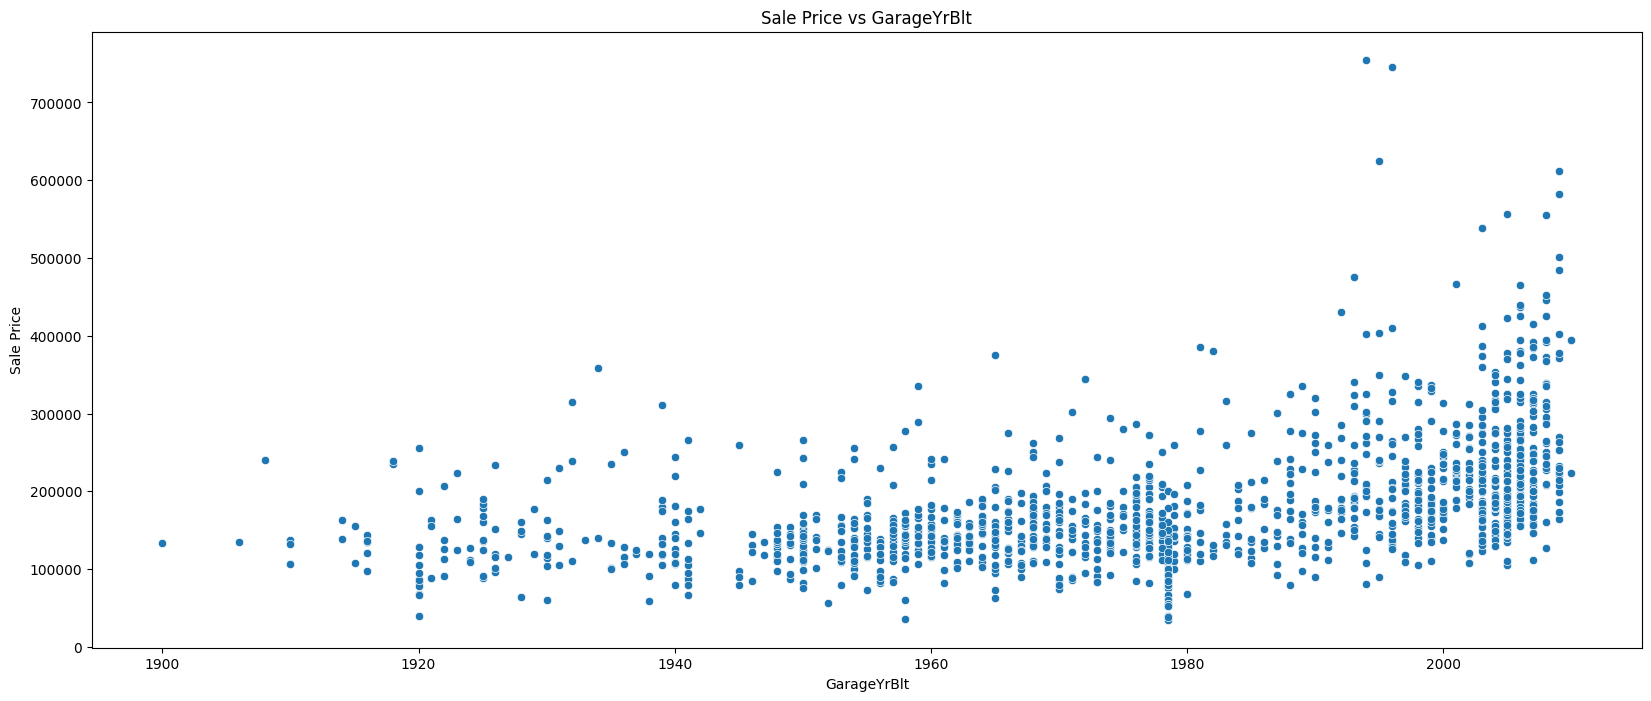

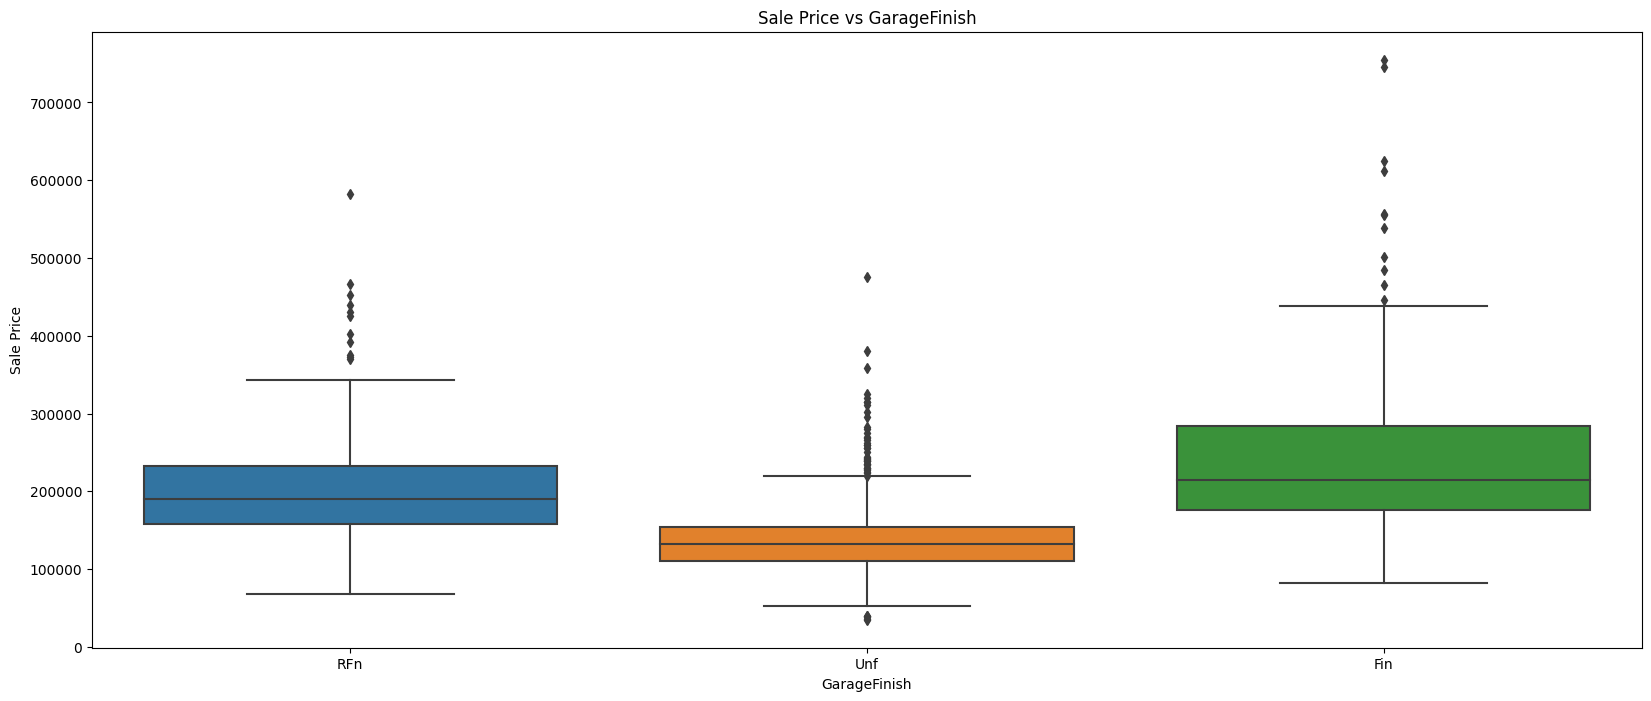

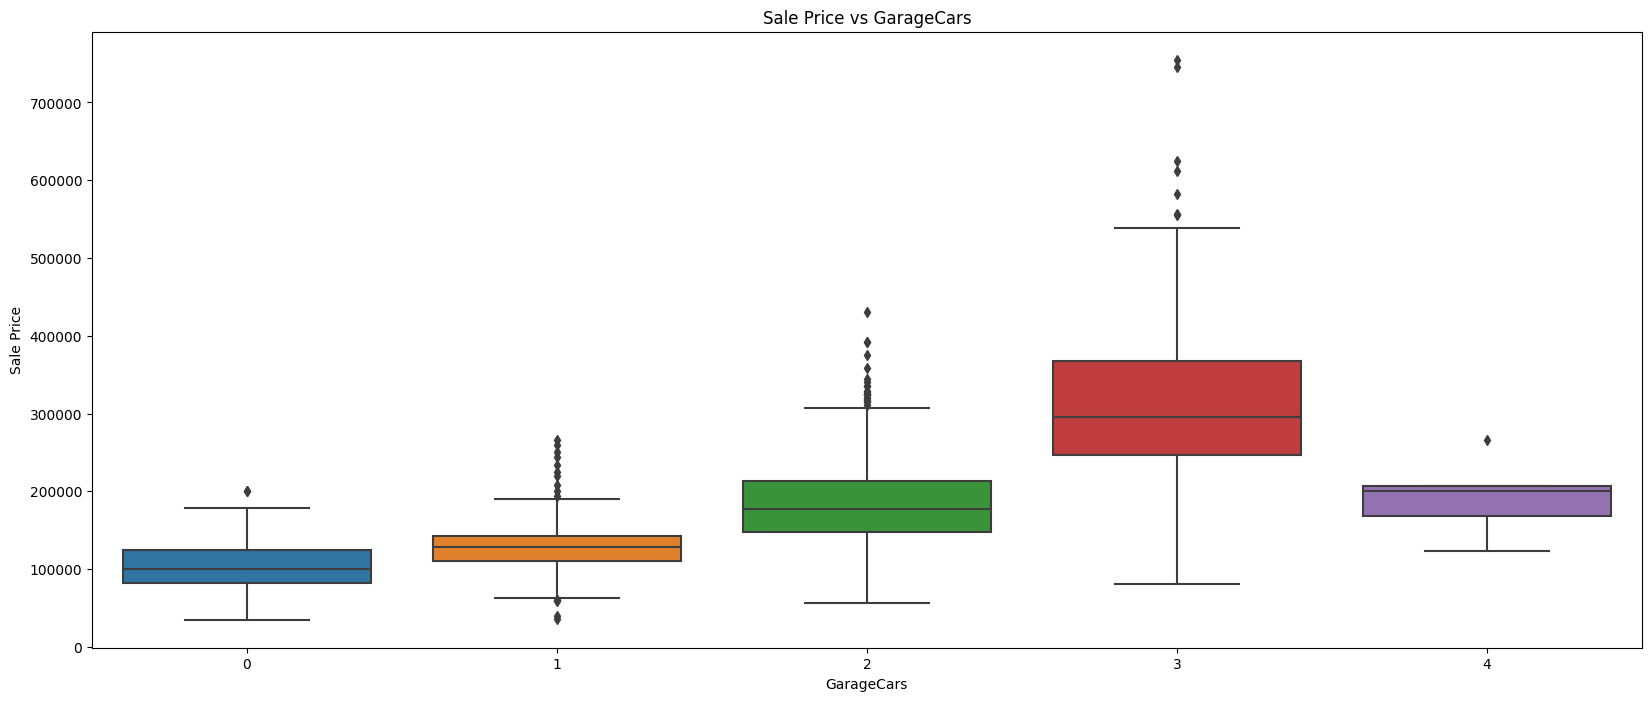

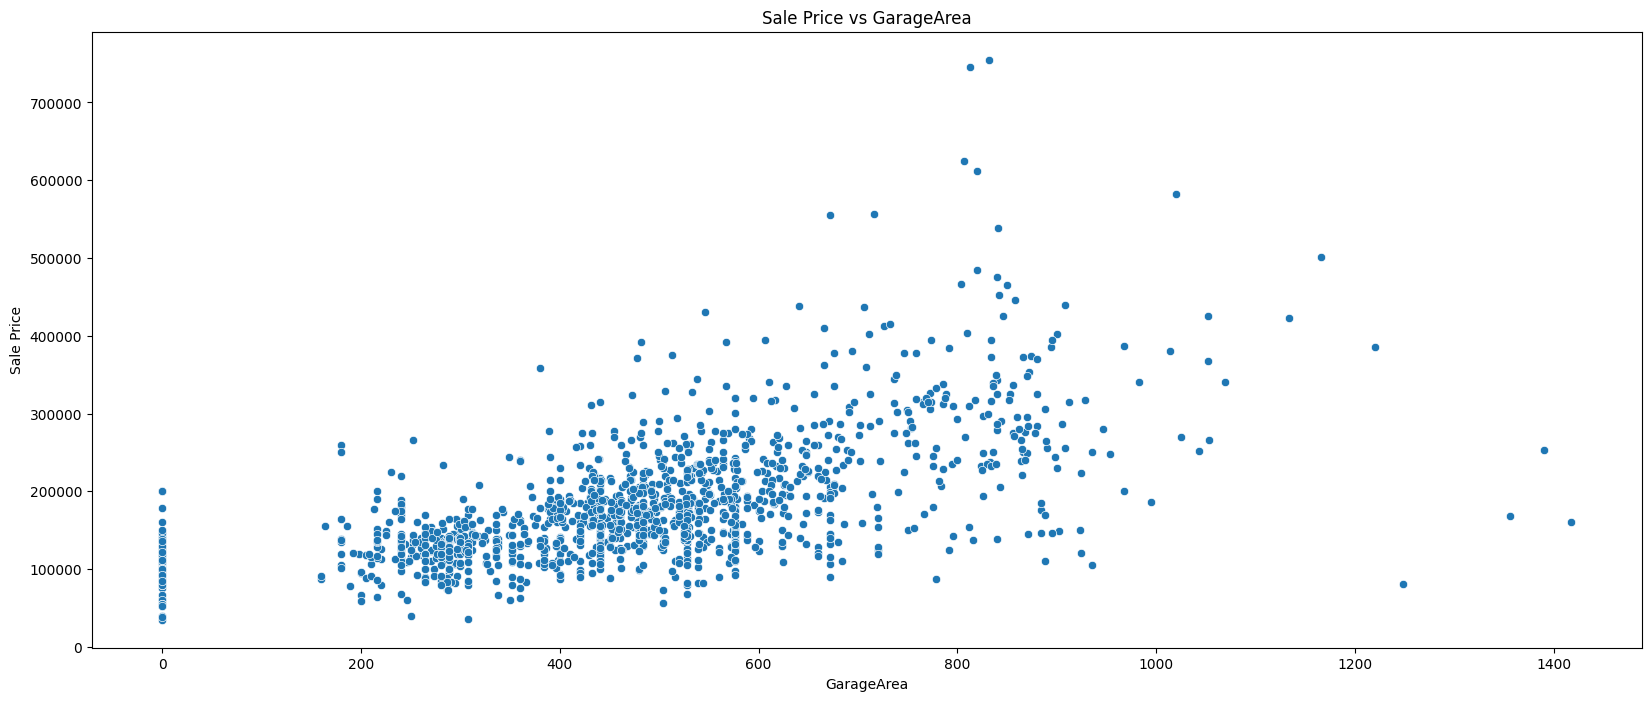

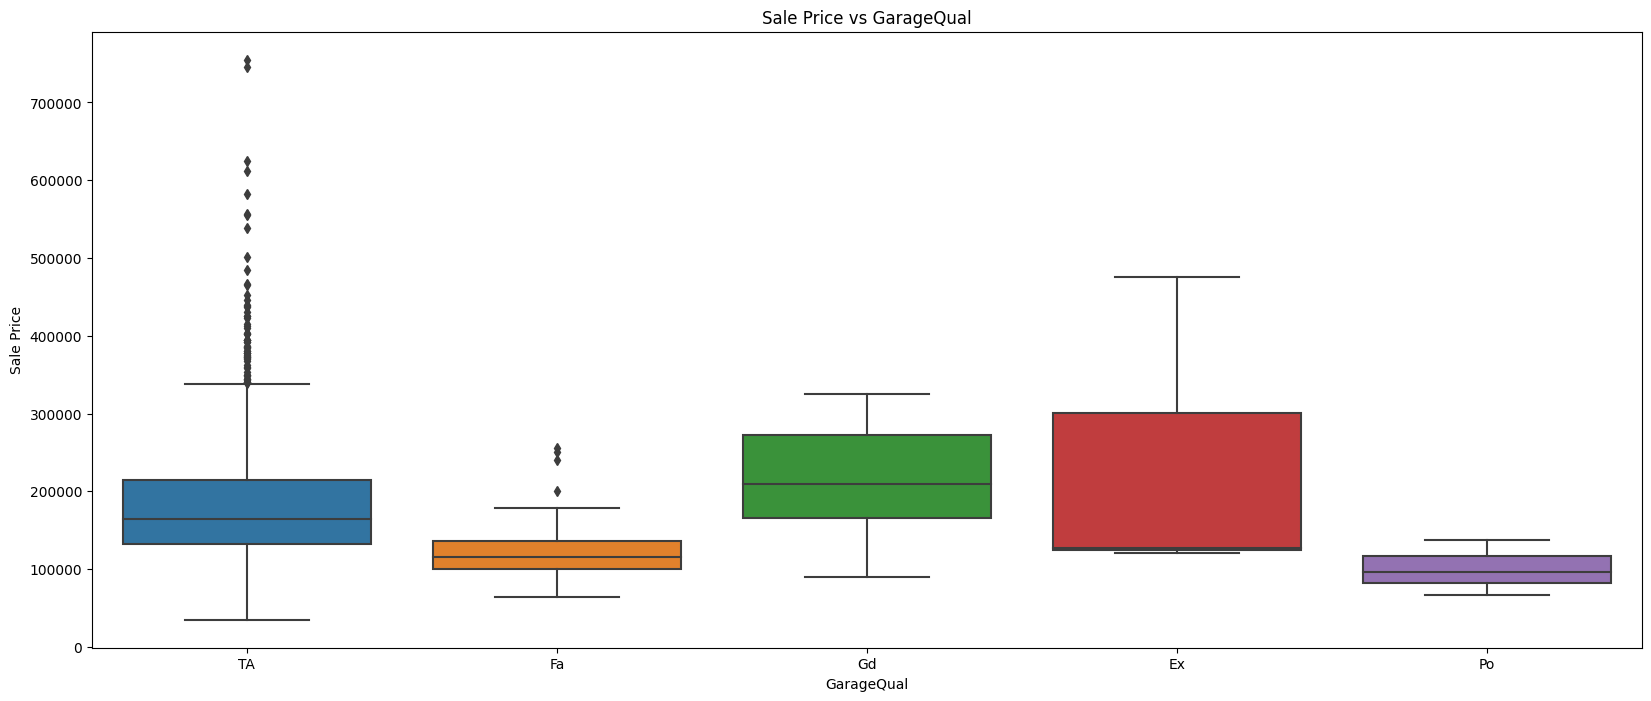

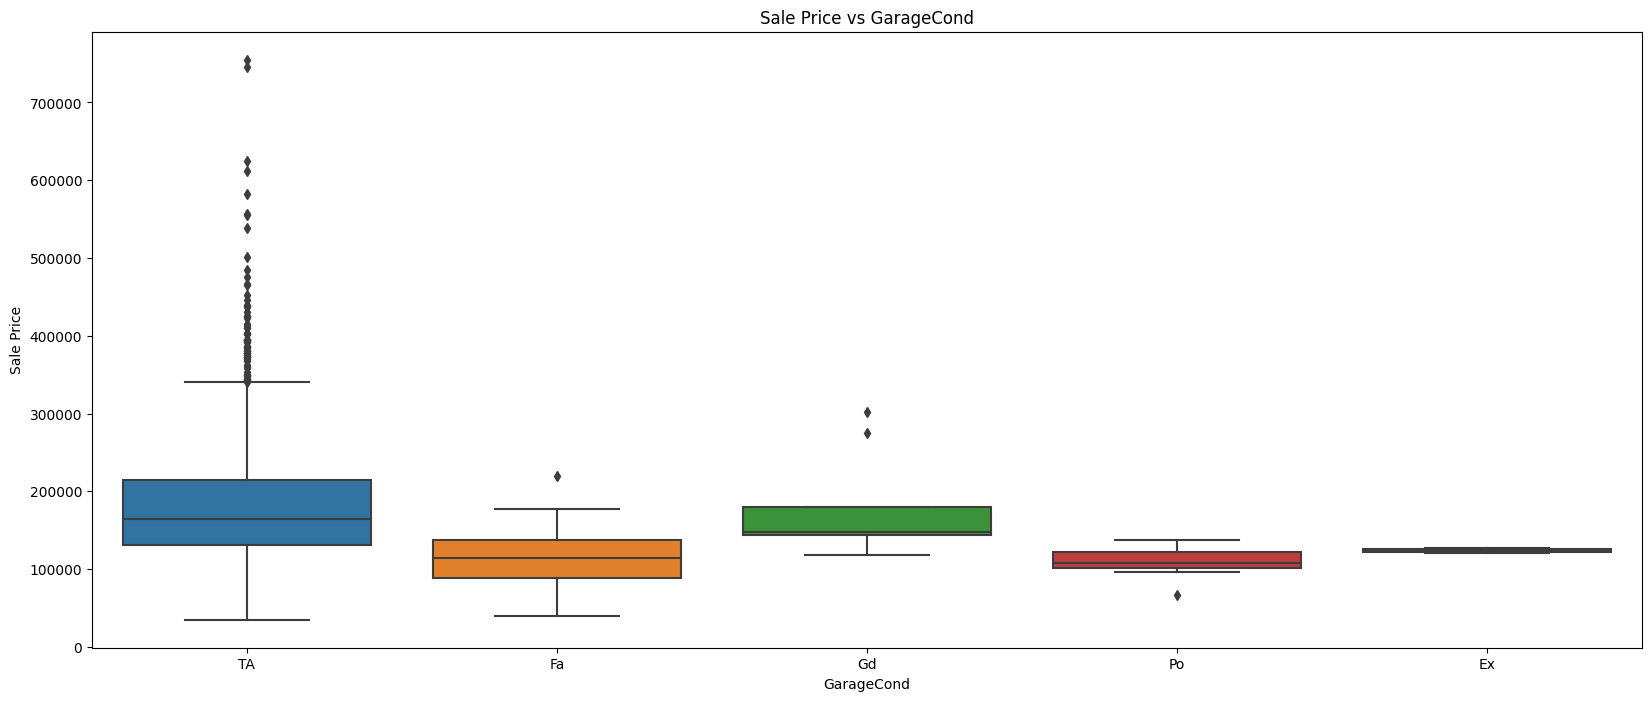

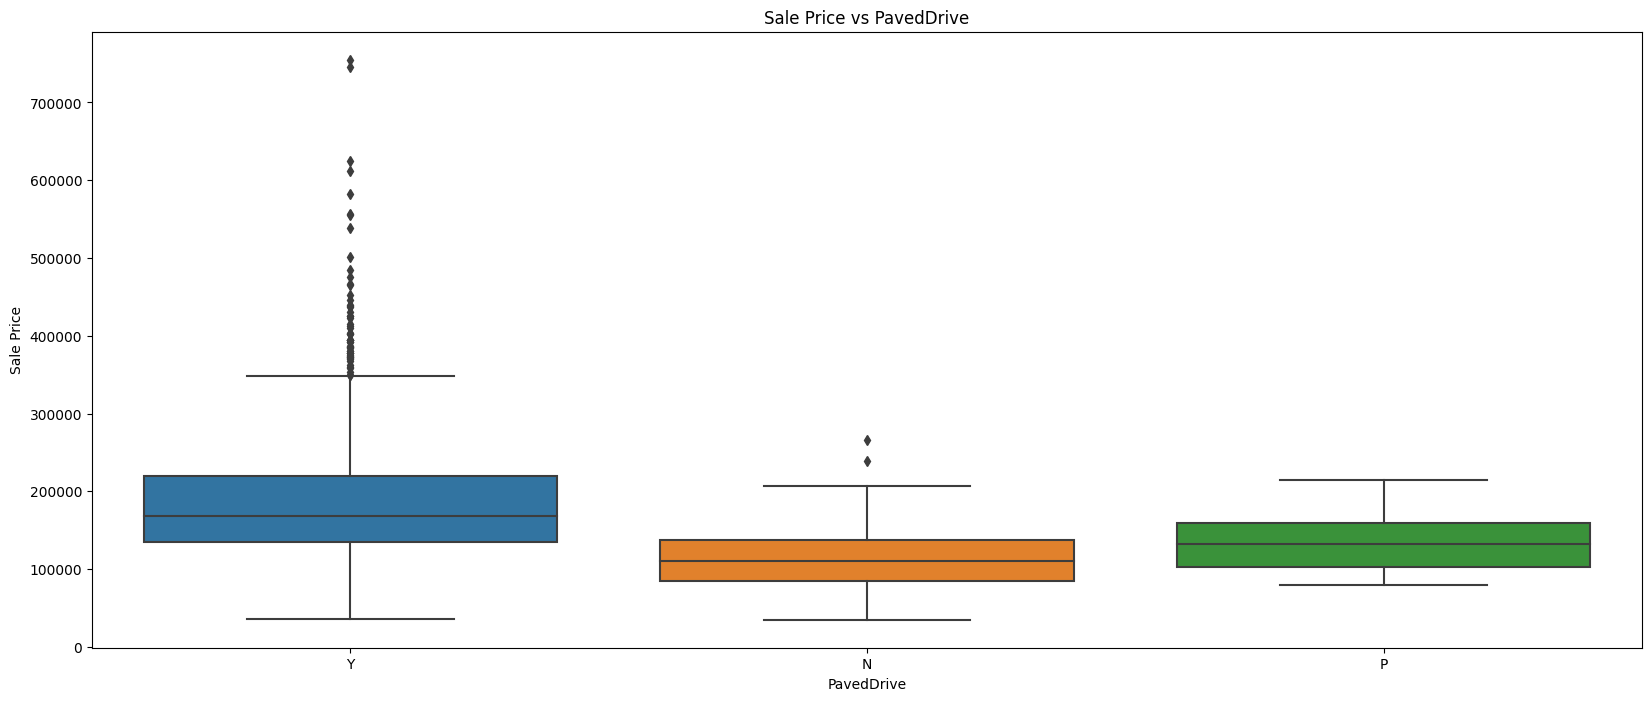

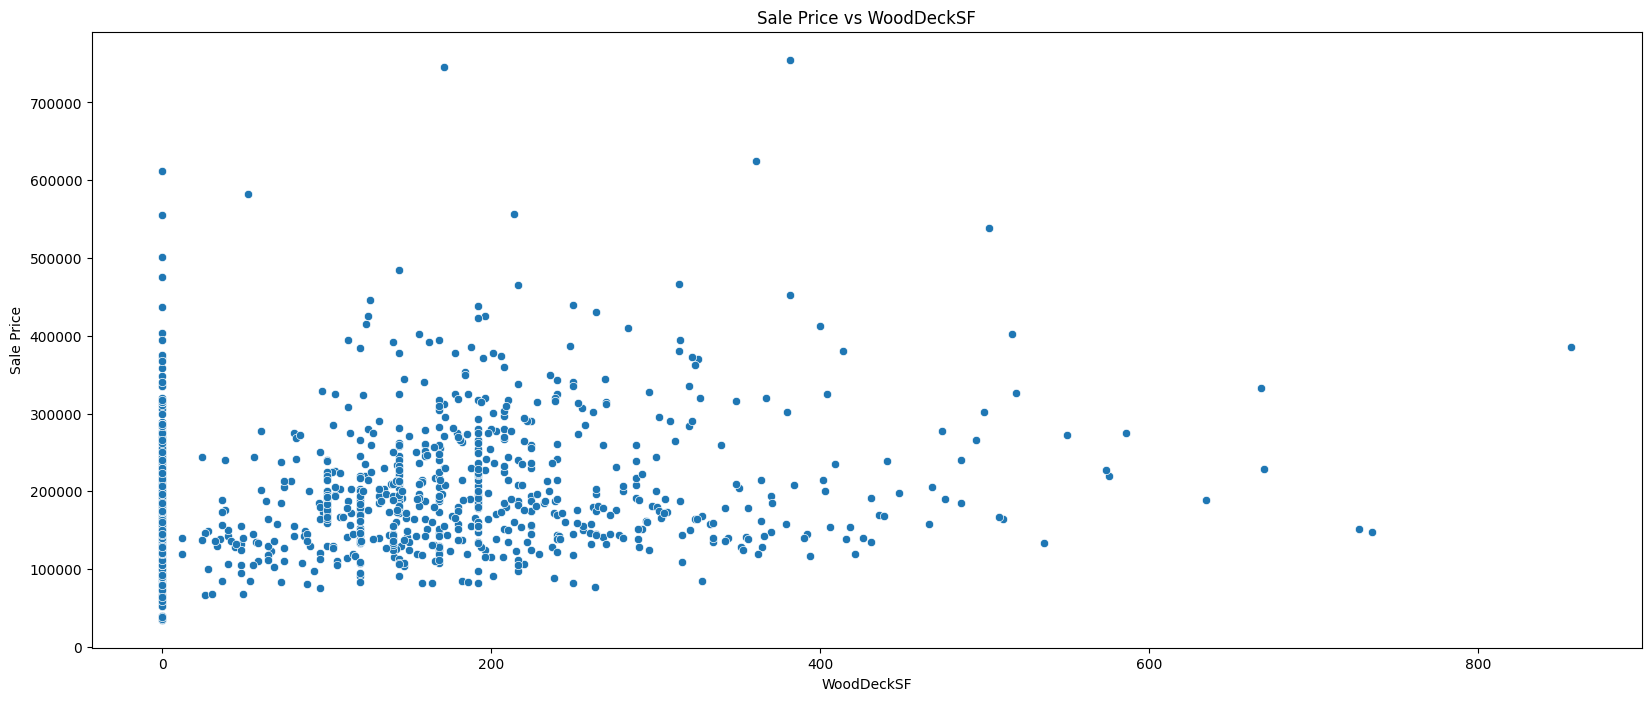

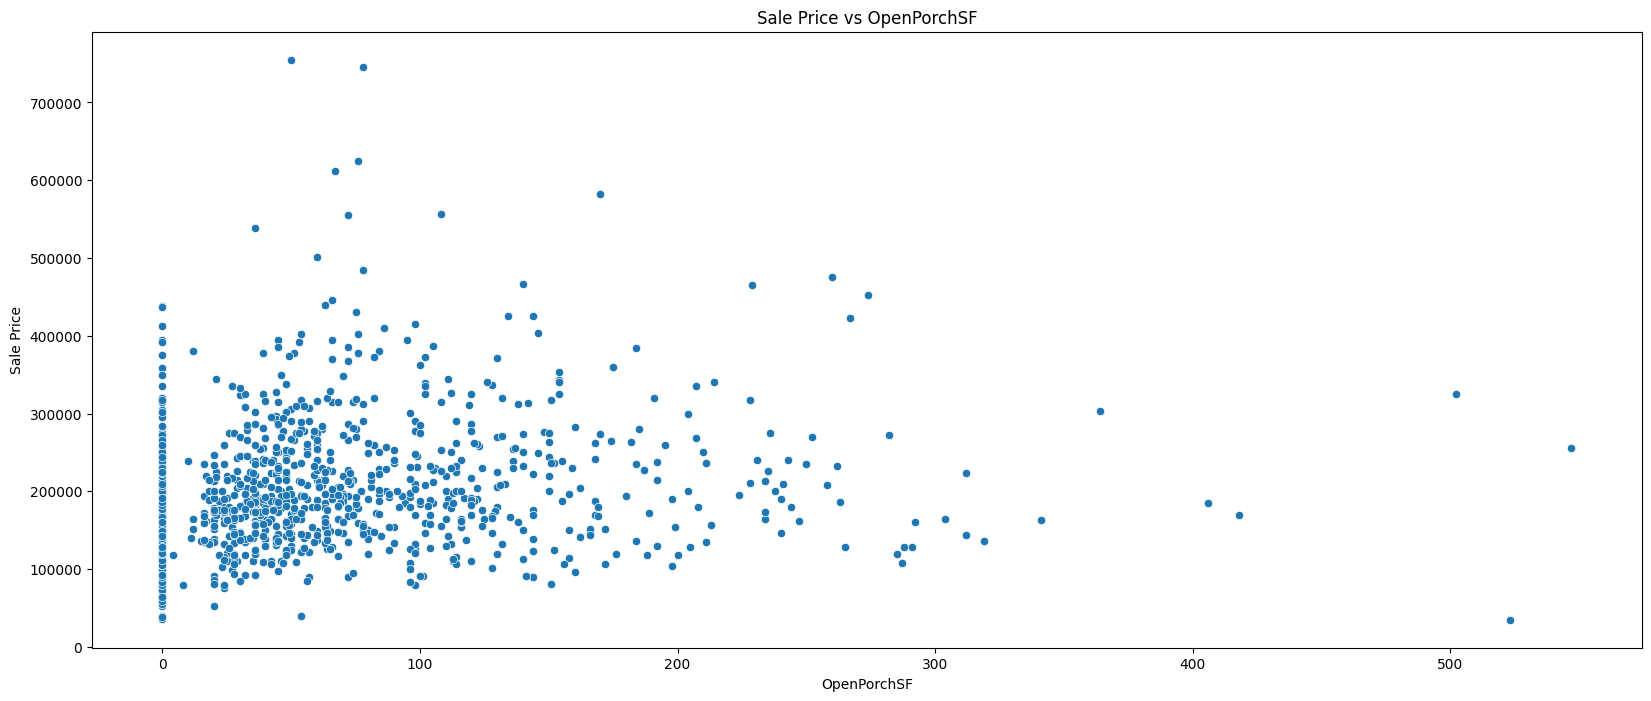

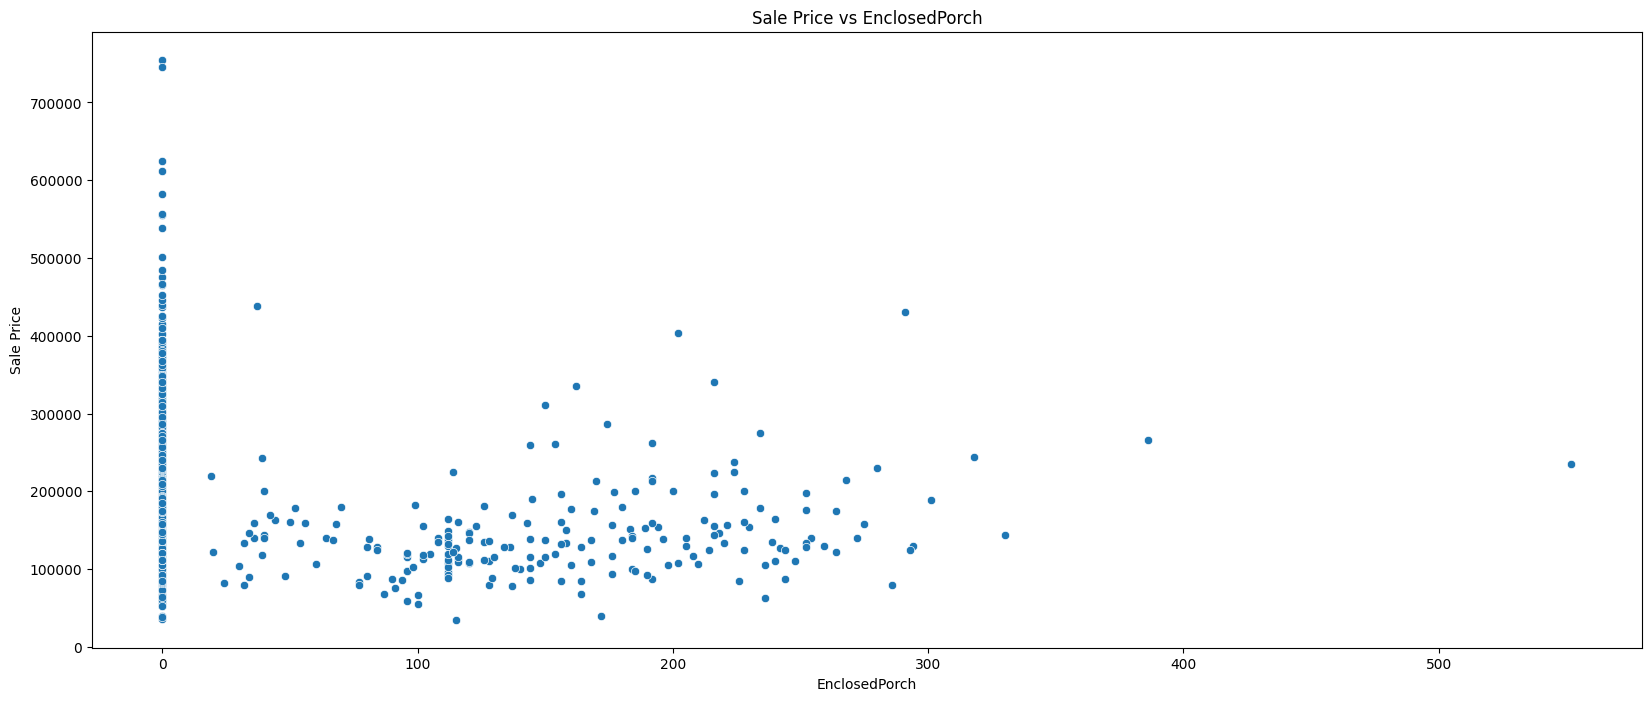

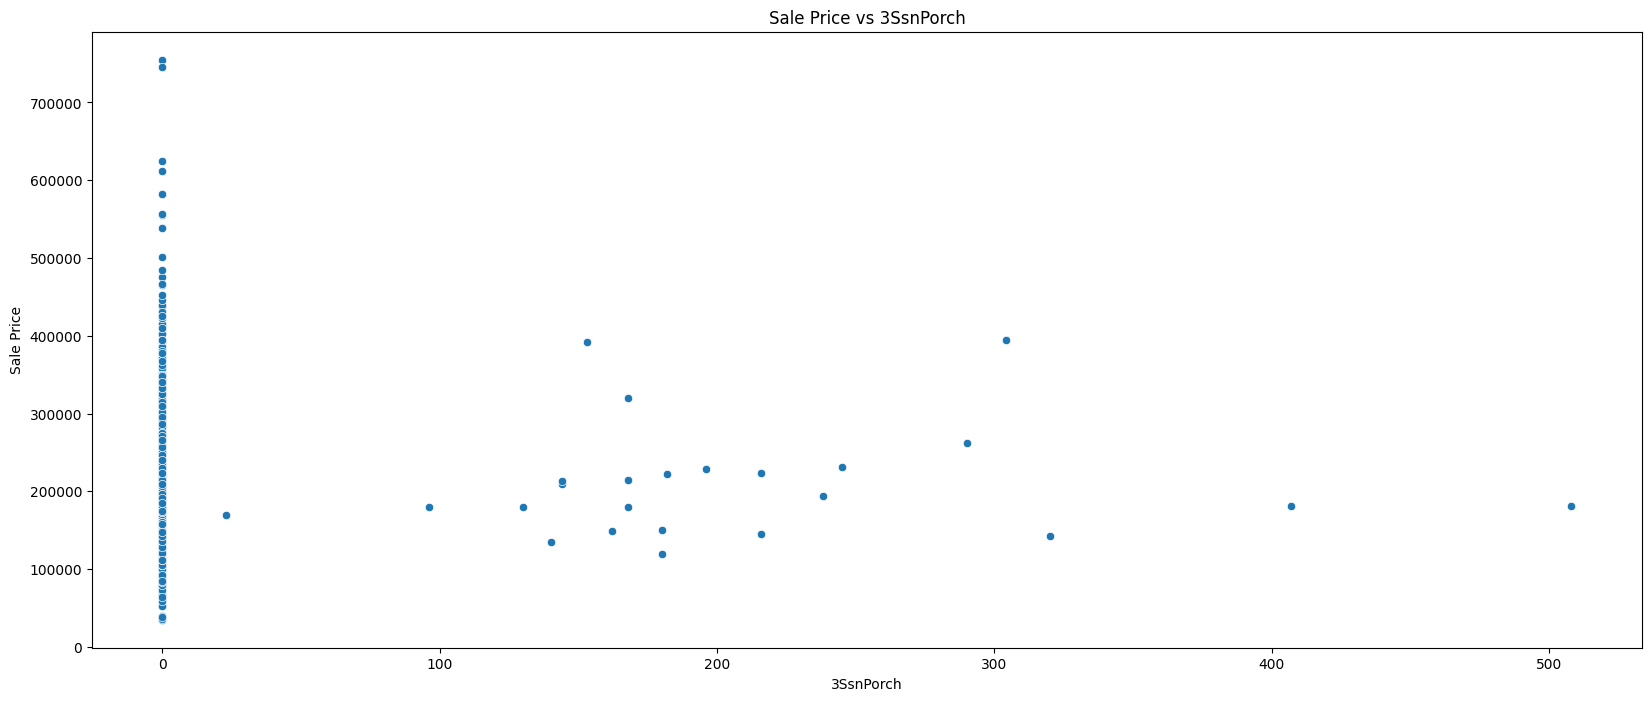

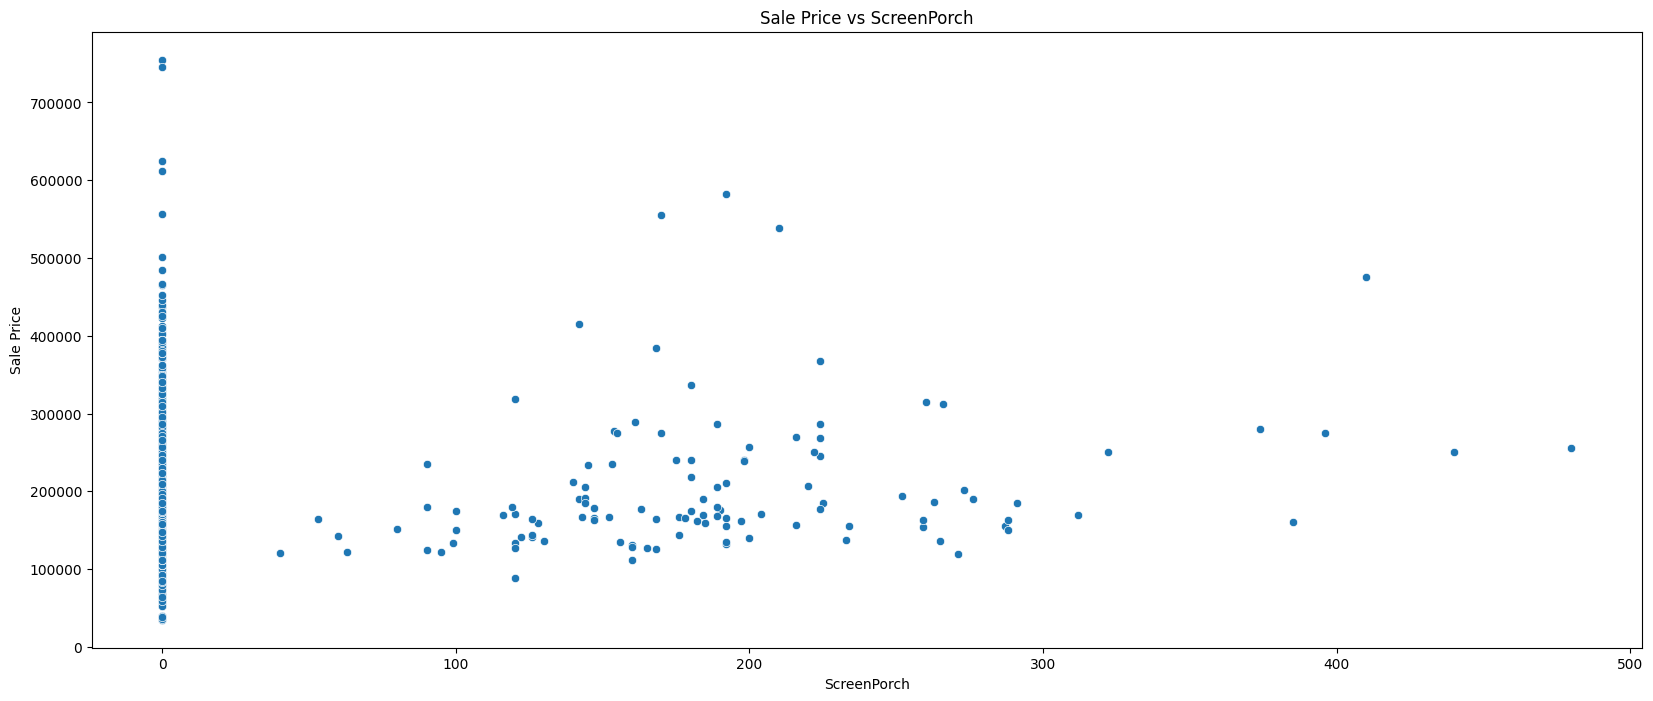

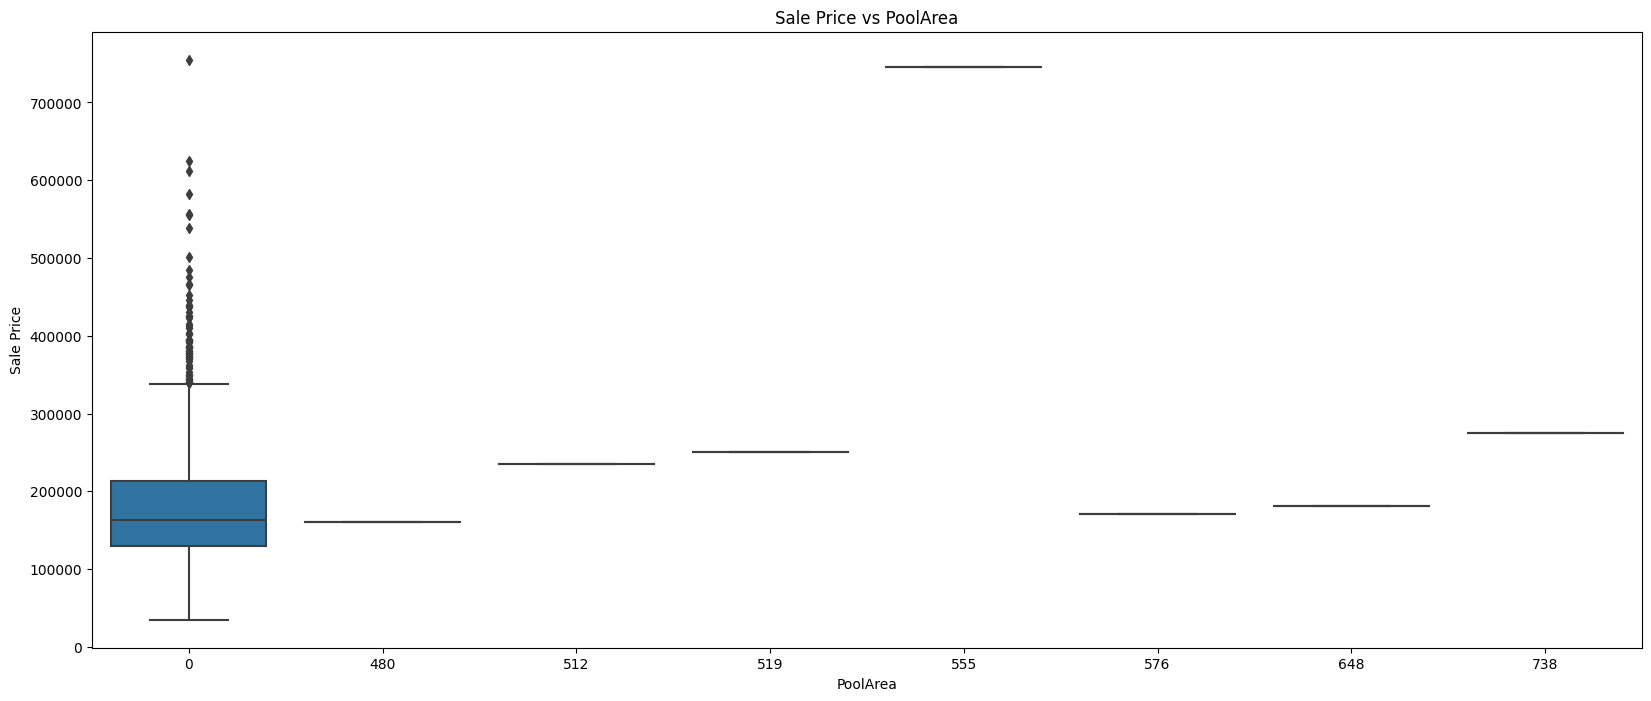

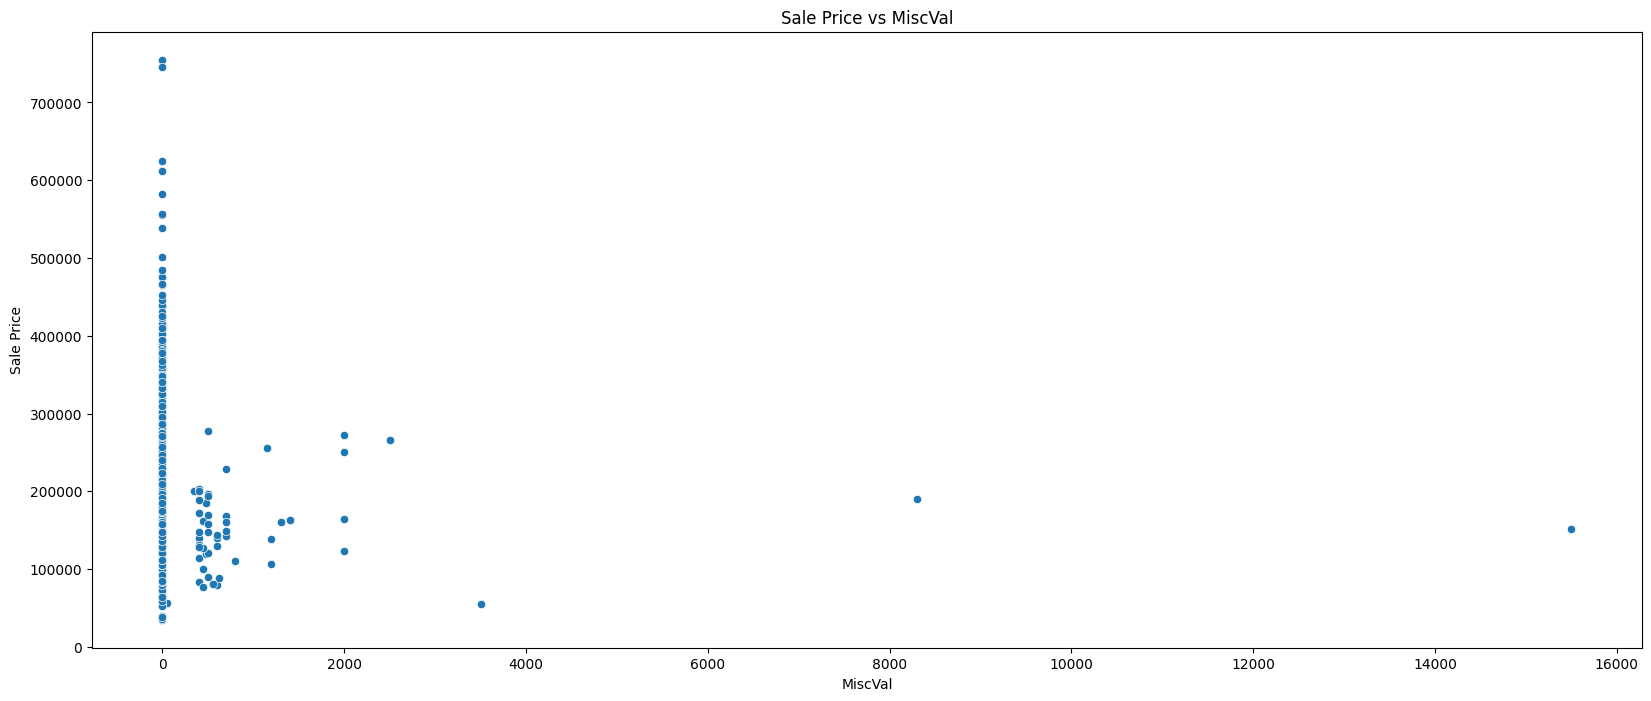

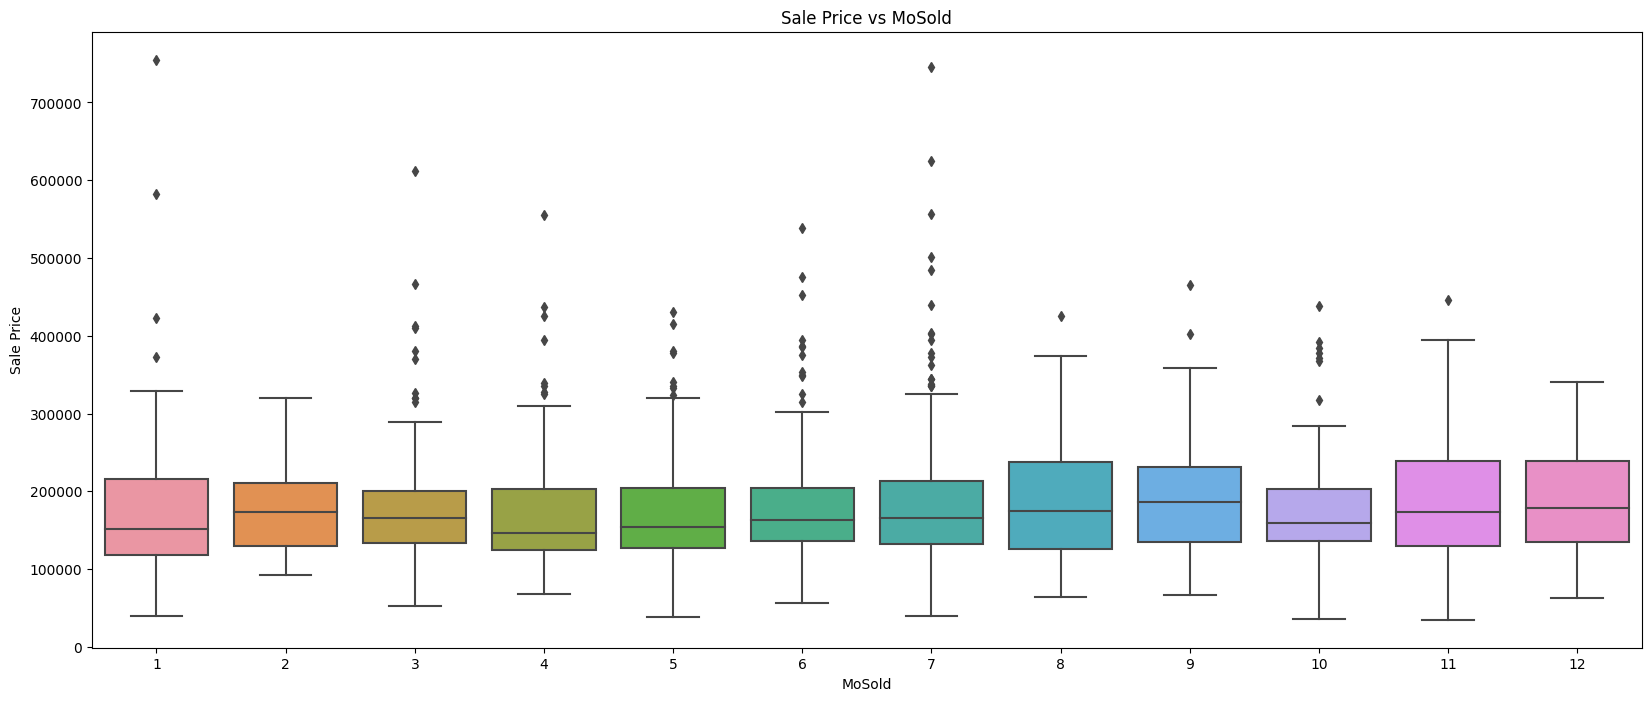

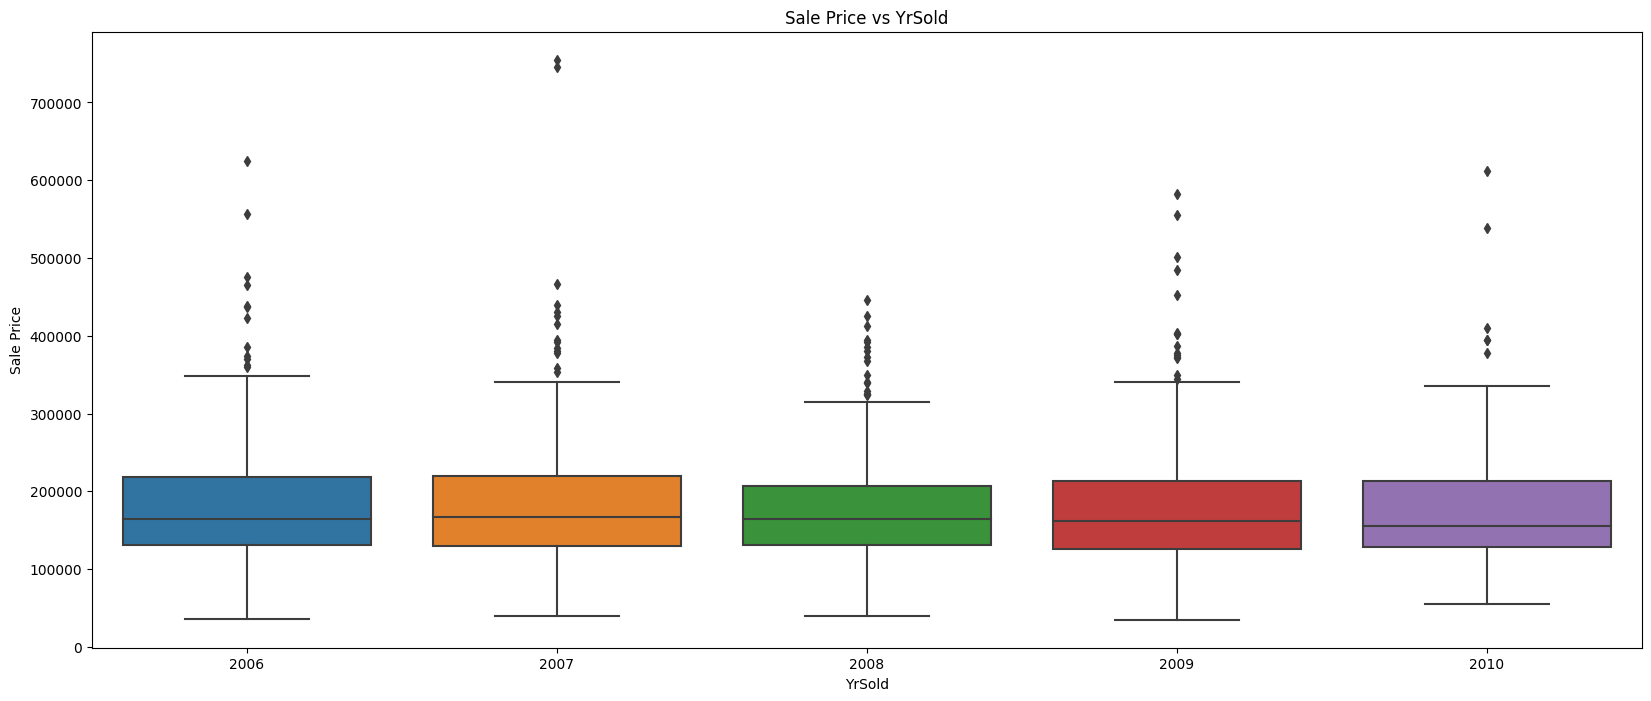

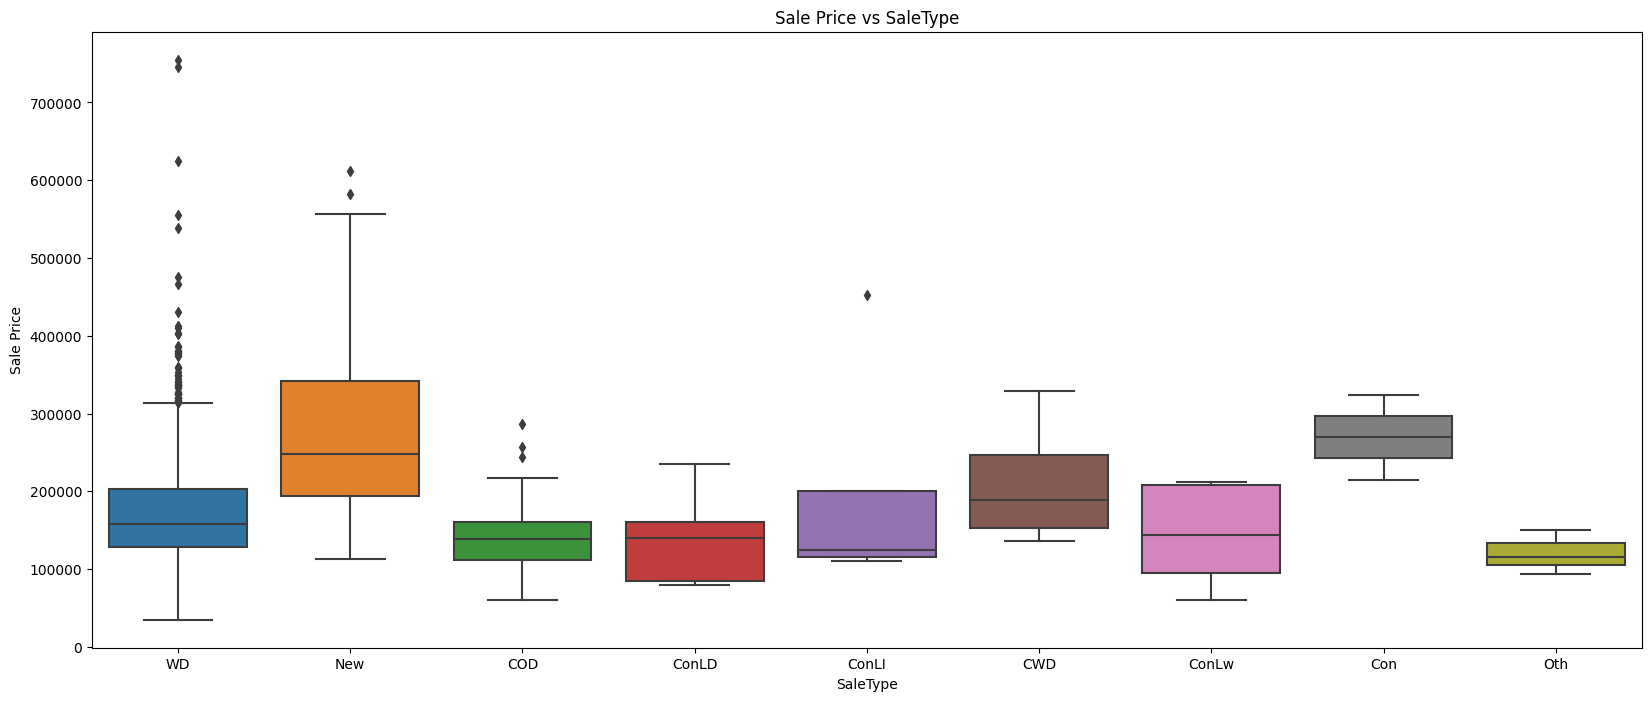

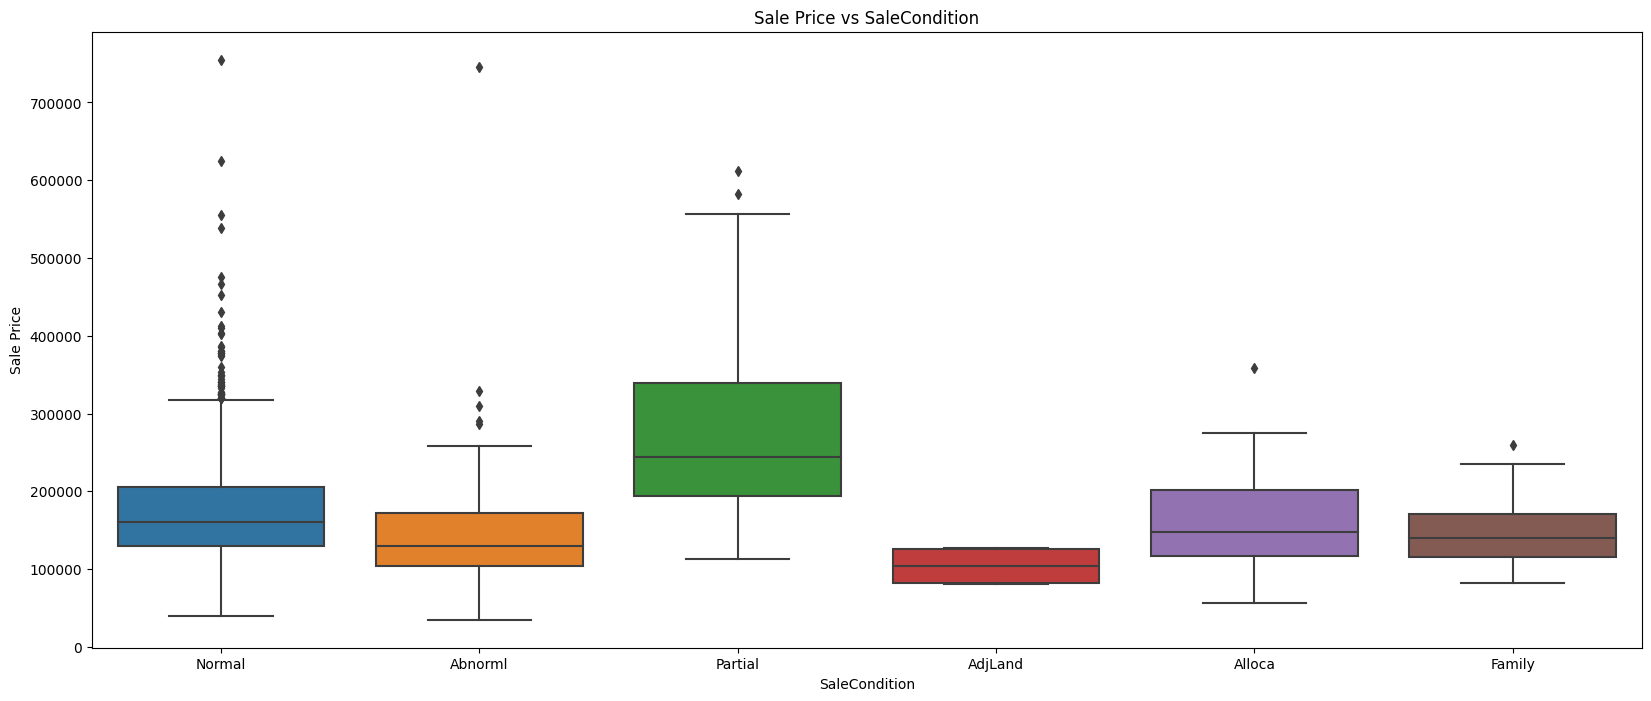

In [167]:
with PdfPages("Visualisation_data.pdf") as pdf:
    for col in list(clean_train_data.columns[:-1]):
        if pd.api.types.is_numeric_dtype(clean_train_data[col]):
            if len(np.unique(clean_train_data[col])) > 15:
                plt.figure(figsize = (20, 8))
                plt.title(f'Sale Price vs {col}')
                figure_1 = sns.scatterplot(data = clean_train_data, y = "SalePrice", x = col)
                plt.ylabel("Sale Price")
                plt.xlabel(col)
                pdf.savefig()
            else:
                plt.figure(figsize = (20, 8))
                plt.title(f'Sale Price vs {col}')
                figure_1 = sns.boxplot(data = clean_train_data, y = "SalePrice", x = col)
                plt.ylabel("Sale Price")
                plt.xlabel(col)
                pdf.savefig()
        else:
            plt.figure(figsize = (20, 8))
            plt.title(f'Sale Price vs {col}')
            figure_1 = sns.boxplot(data = clean_train_data, y = "SalePrice", x = col)
            plt.ylabel("Sale Price")
            plt.xlabel(col)
            pdf.savefig()

In [168]:
clean_train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [169]:
interpol_train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [170]:
clean_train_data["Log_SalePrice"] = np.log1p(clean_train_data["SalePrice"]) # if the minimum value is 0 use + 1

In [171]:
interpol_train_data["Log_SalePrice"] = np.log1p(interpol_train_data["SalePrice"]) # if the minimum value is 0 use + 1

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

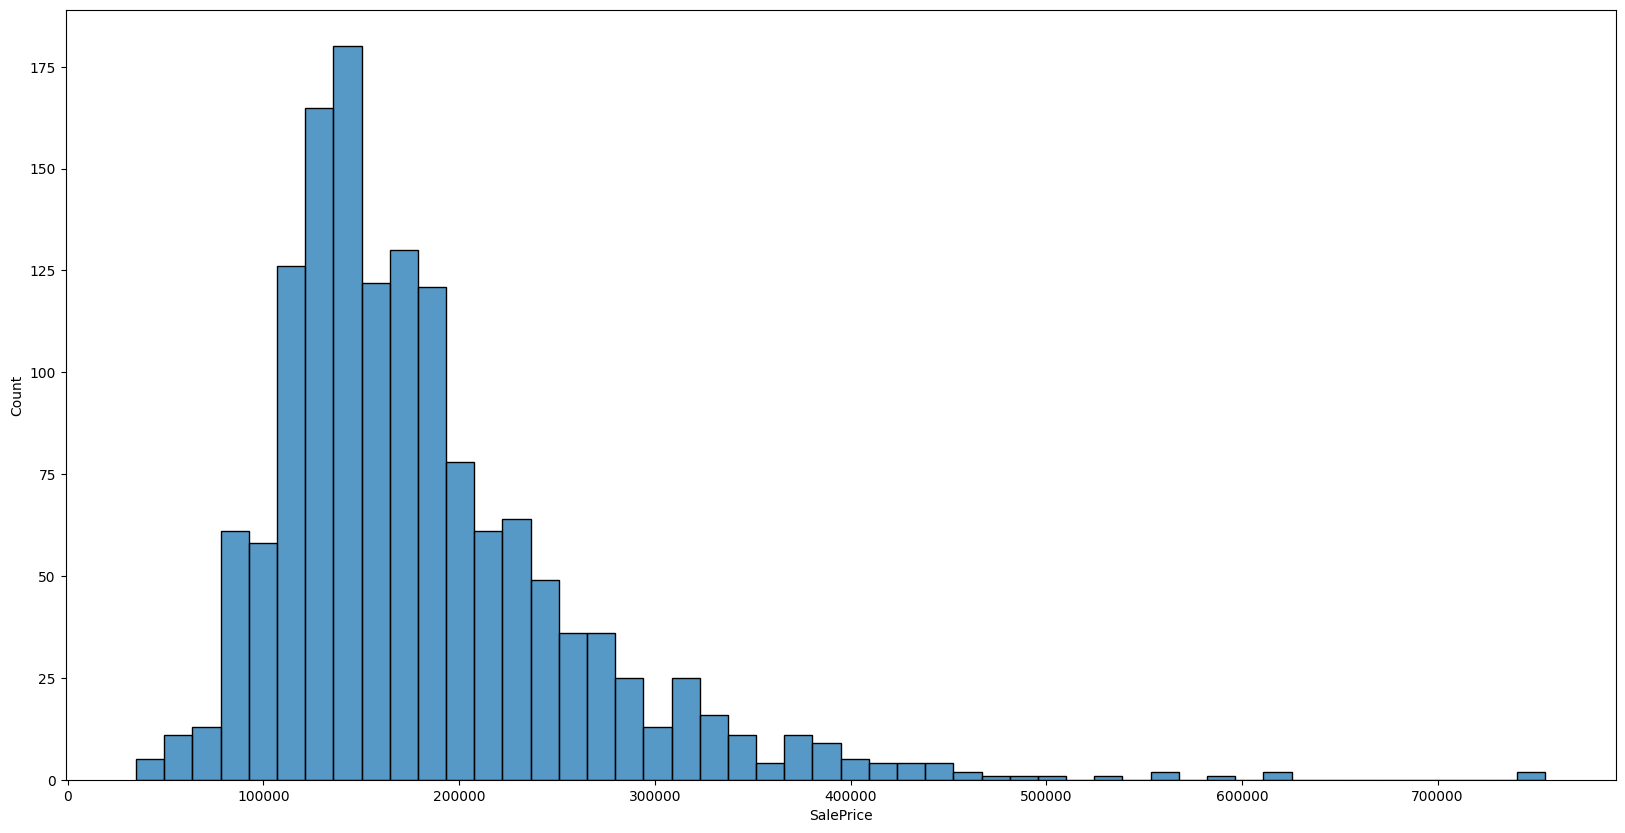

In [172]:
plt.figure(figsize = (20, 10))
sns.histplot(clean_train_data, x = "SalePrice", bins = 50)

<AxesSubplot: xlabel='Log_SalePrice', ylabel='Count'>

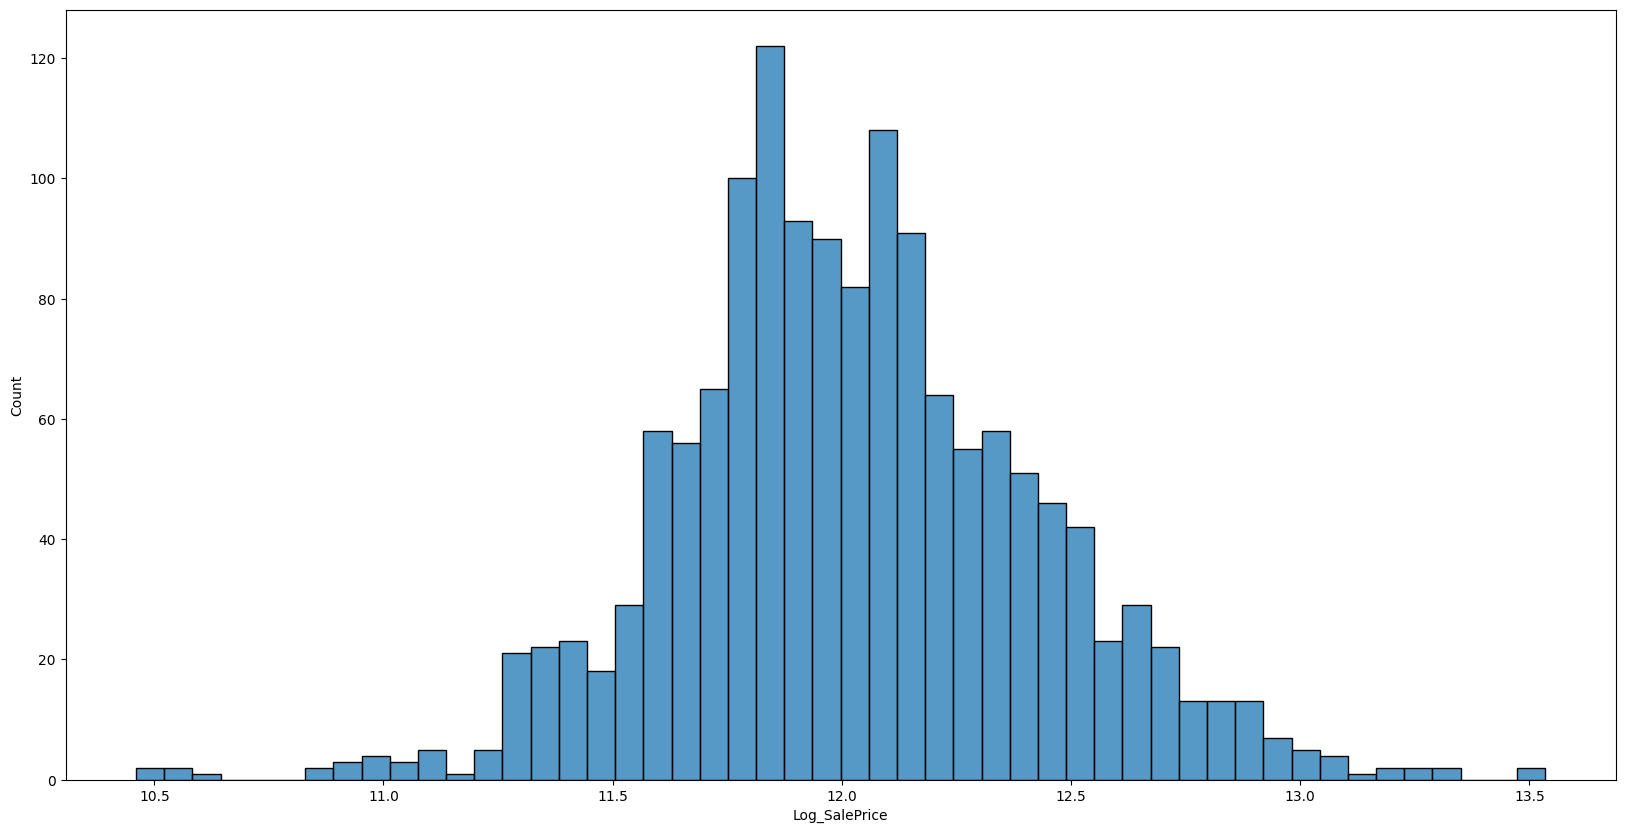

In [173]:
plt.figure(figsize = (20, 10))
sns.histplot(clean_train_data, x = "Log_SalePrice", bins = 50)

<AxesSubplot: xlabel='Log_SalePrice', ylabel='Count'>

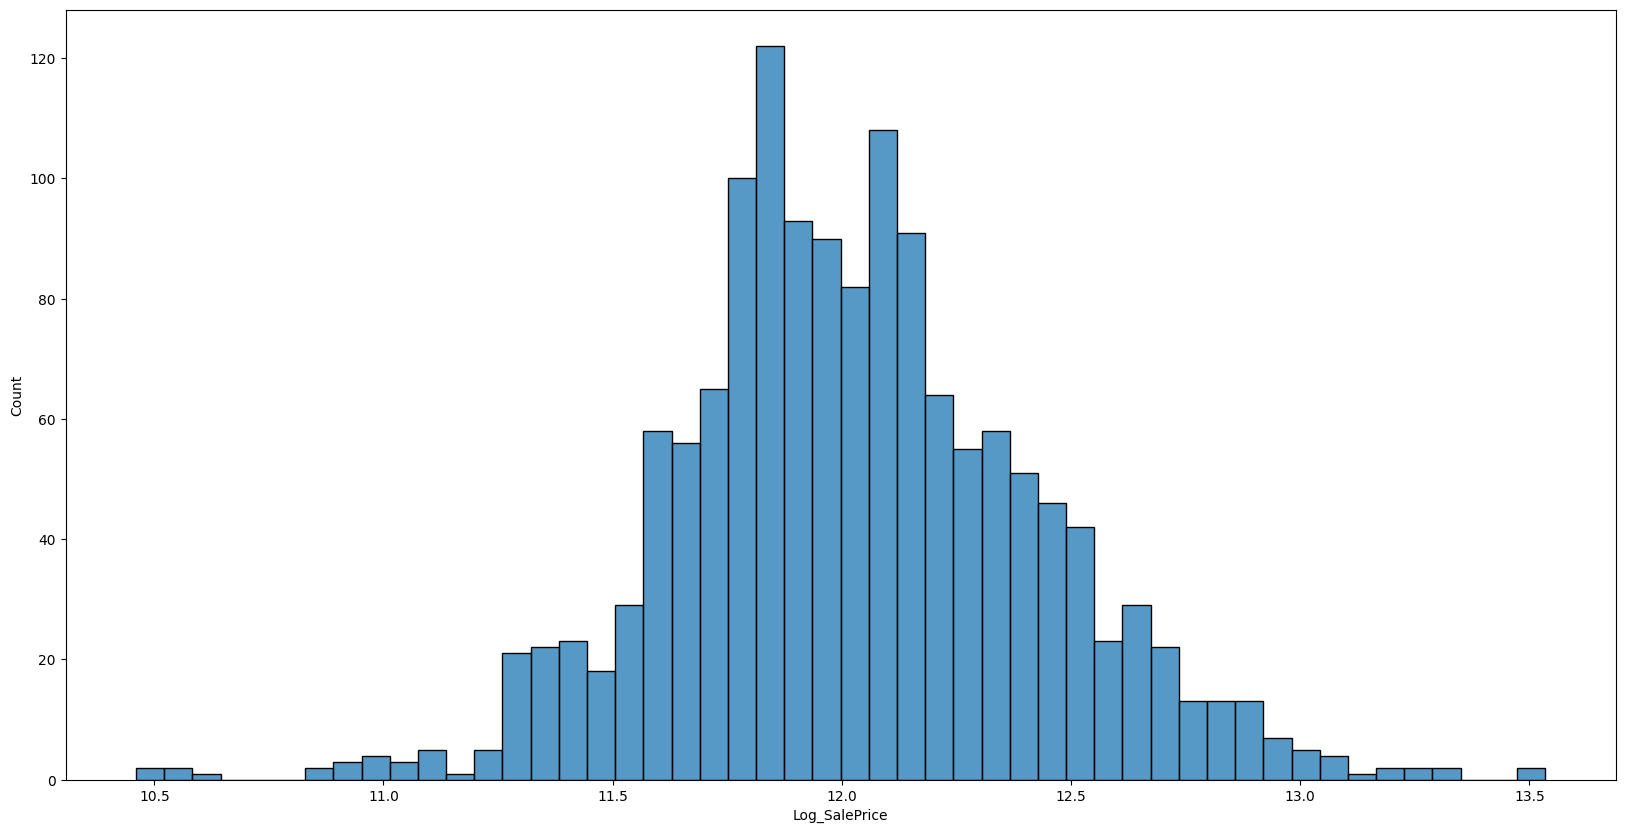

In [174]:
plt.figure(figsize = (20, 10))
sns.histplot(interpol_train_data, x = "Log_SalePrice", bins = 50)

In [175]:
interpol_train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

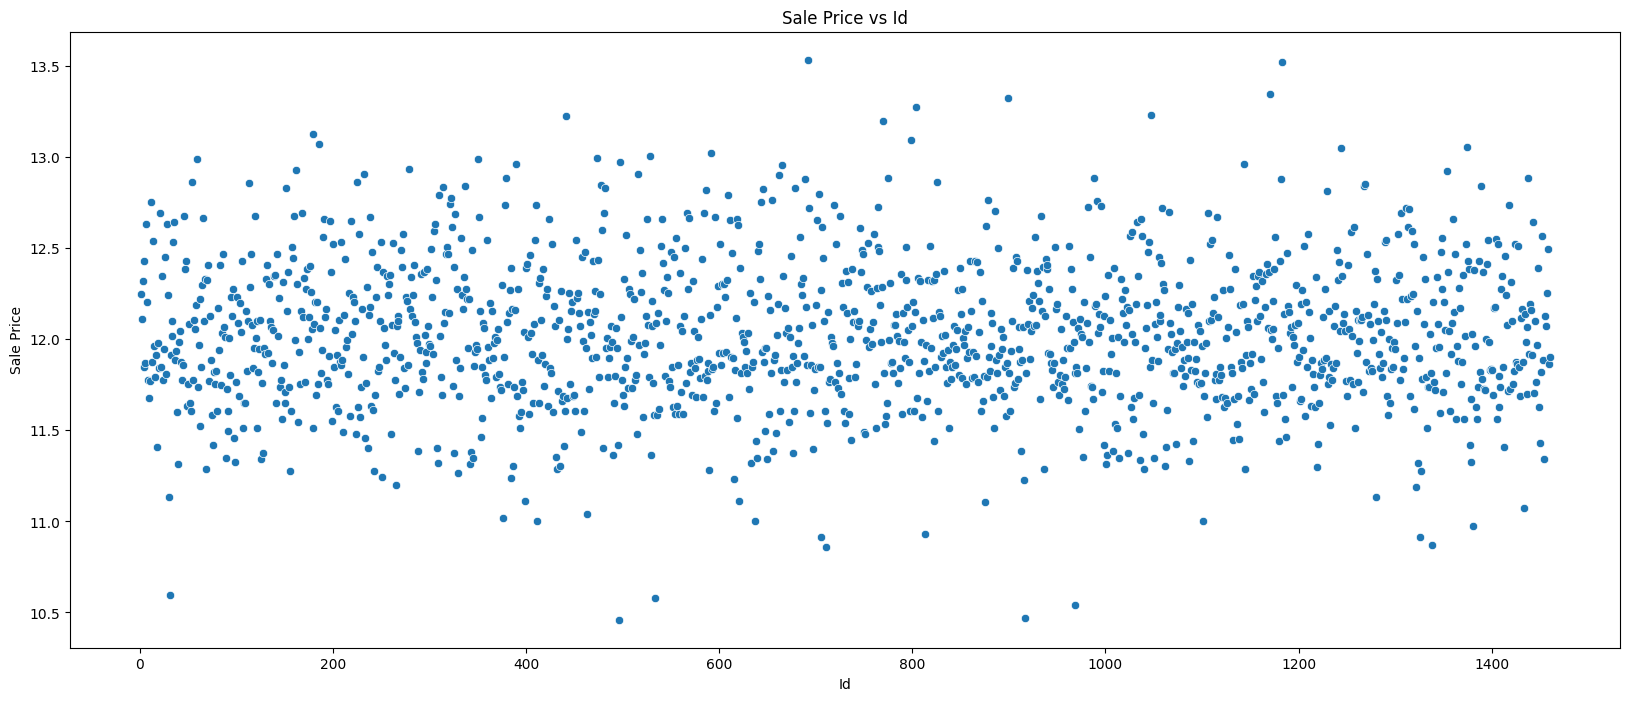

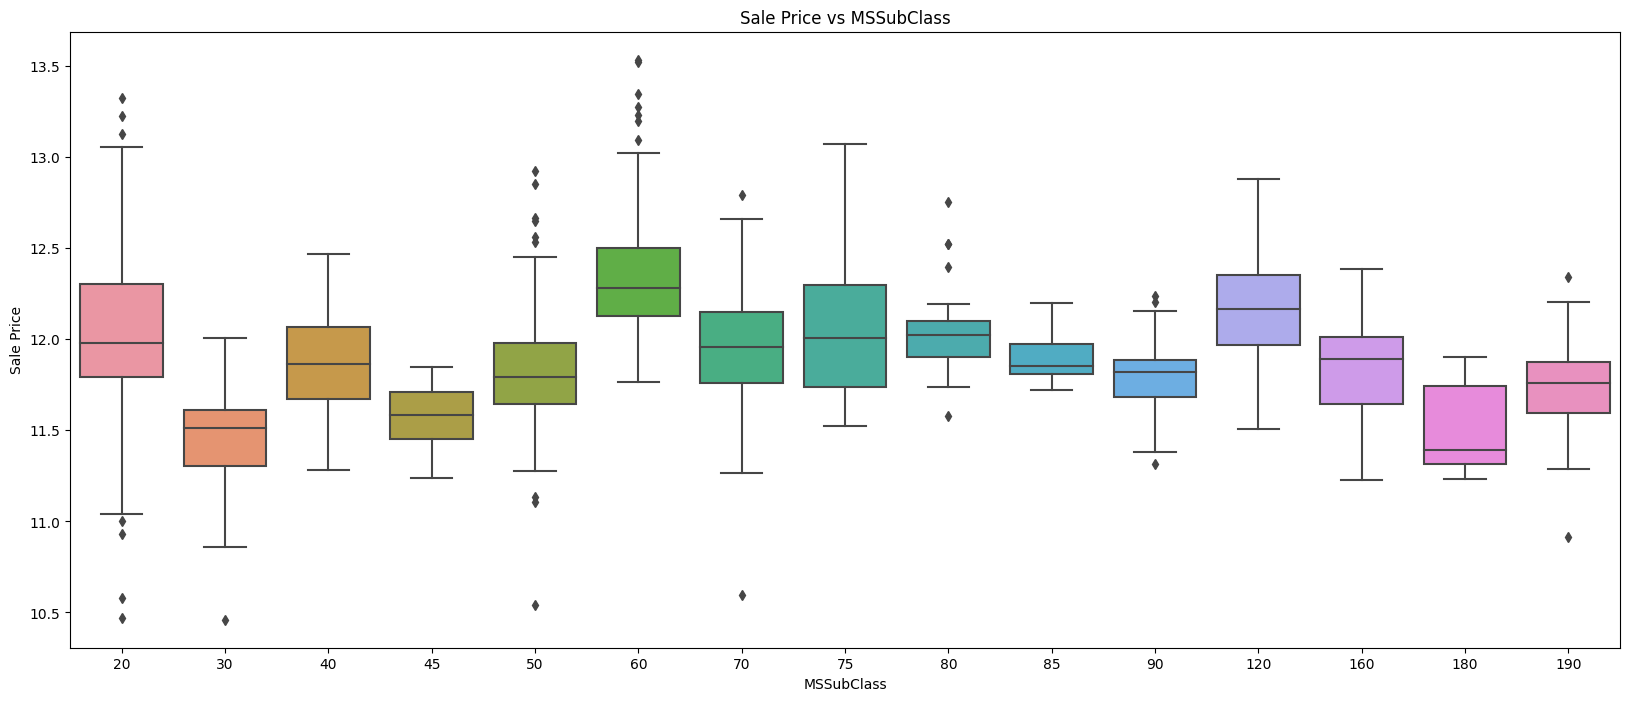

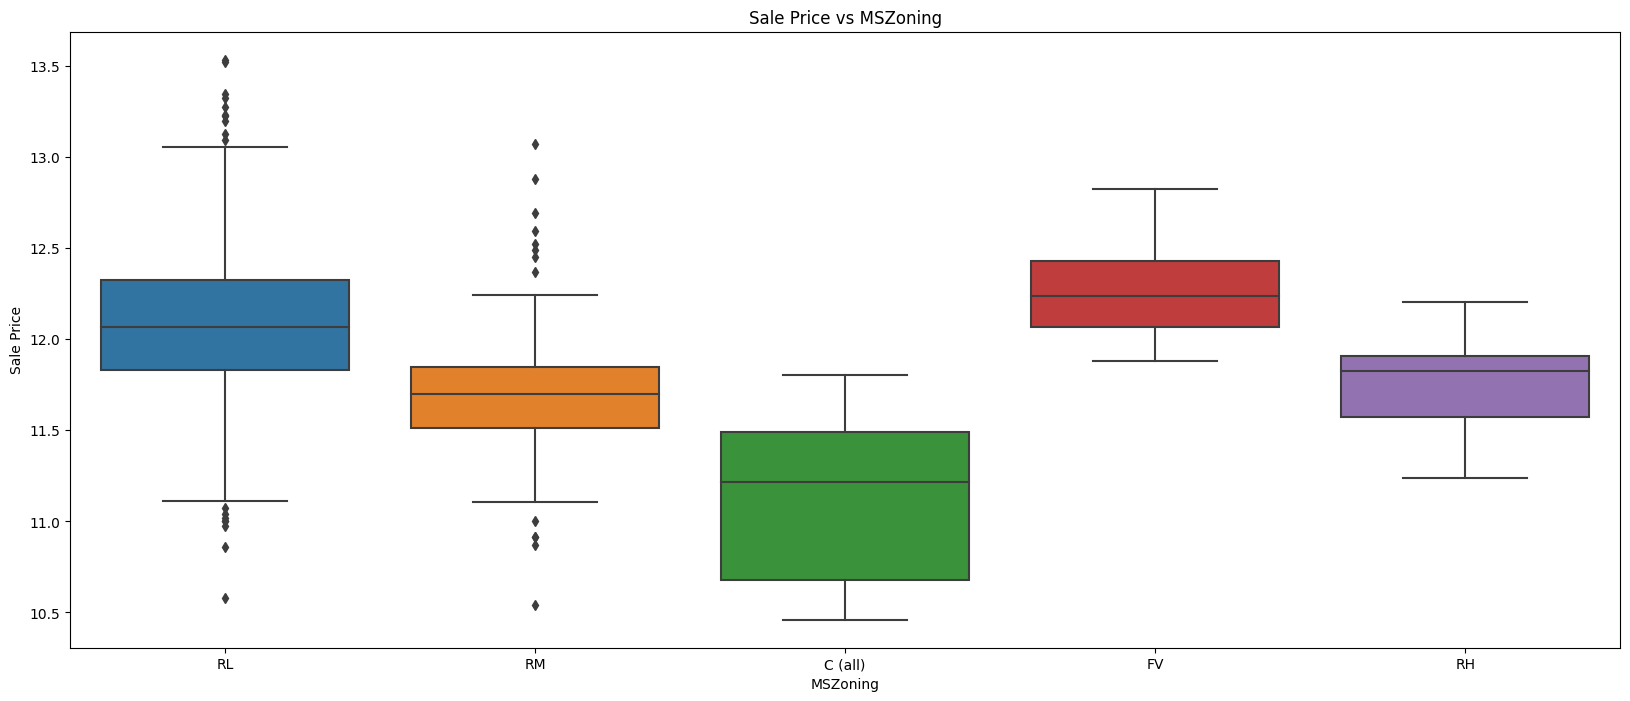

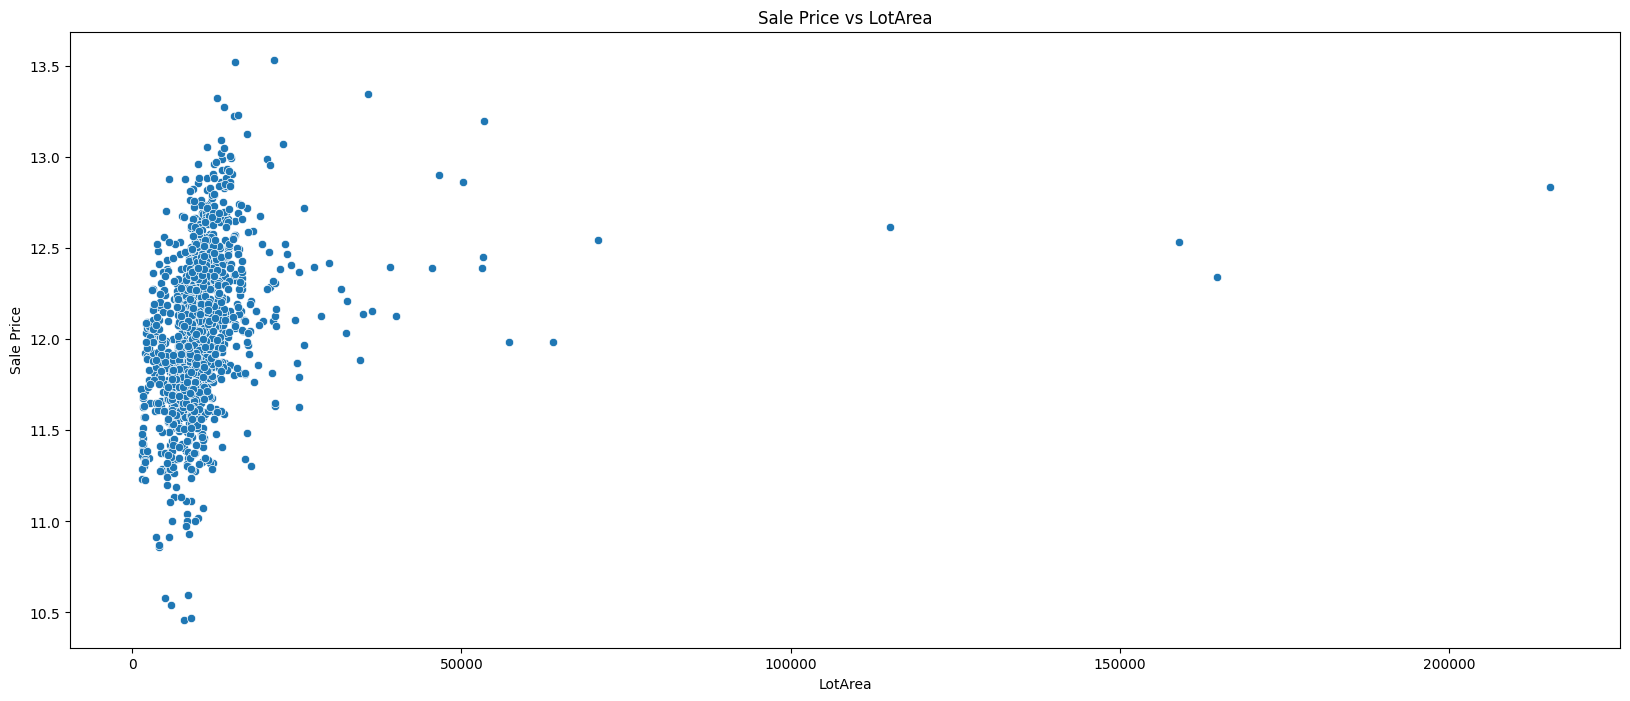

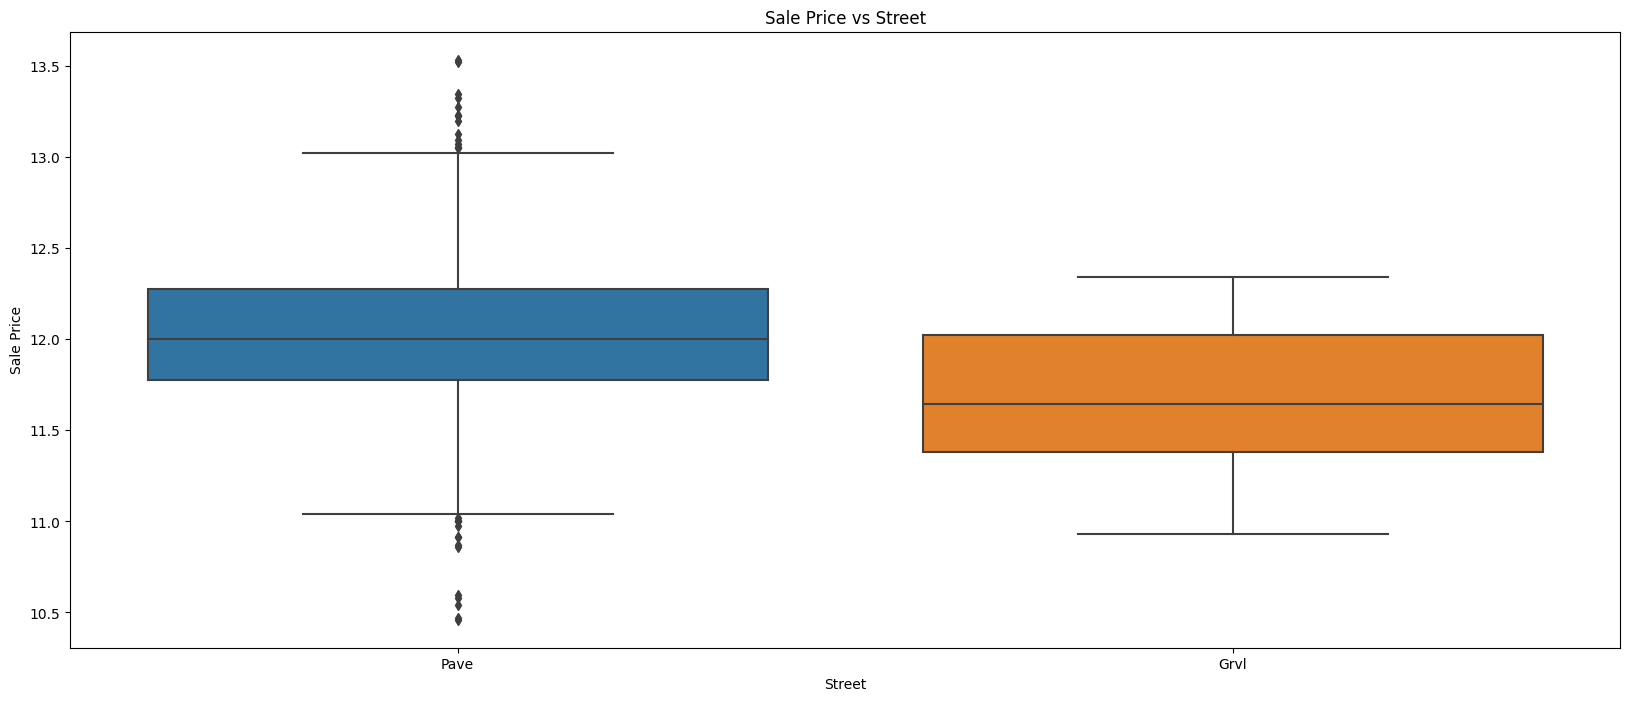

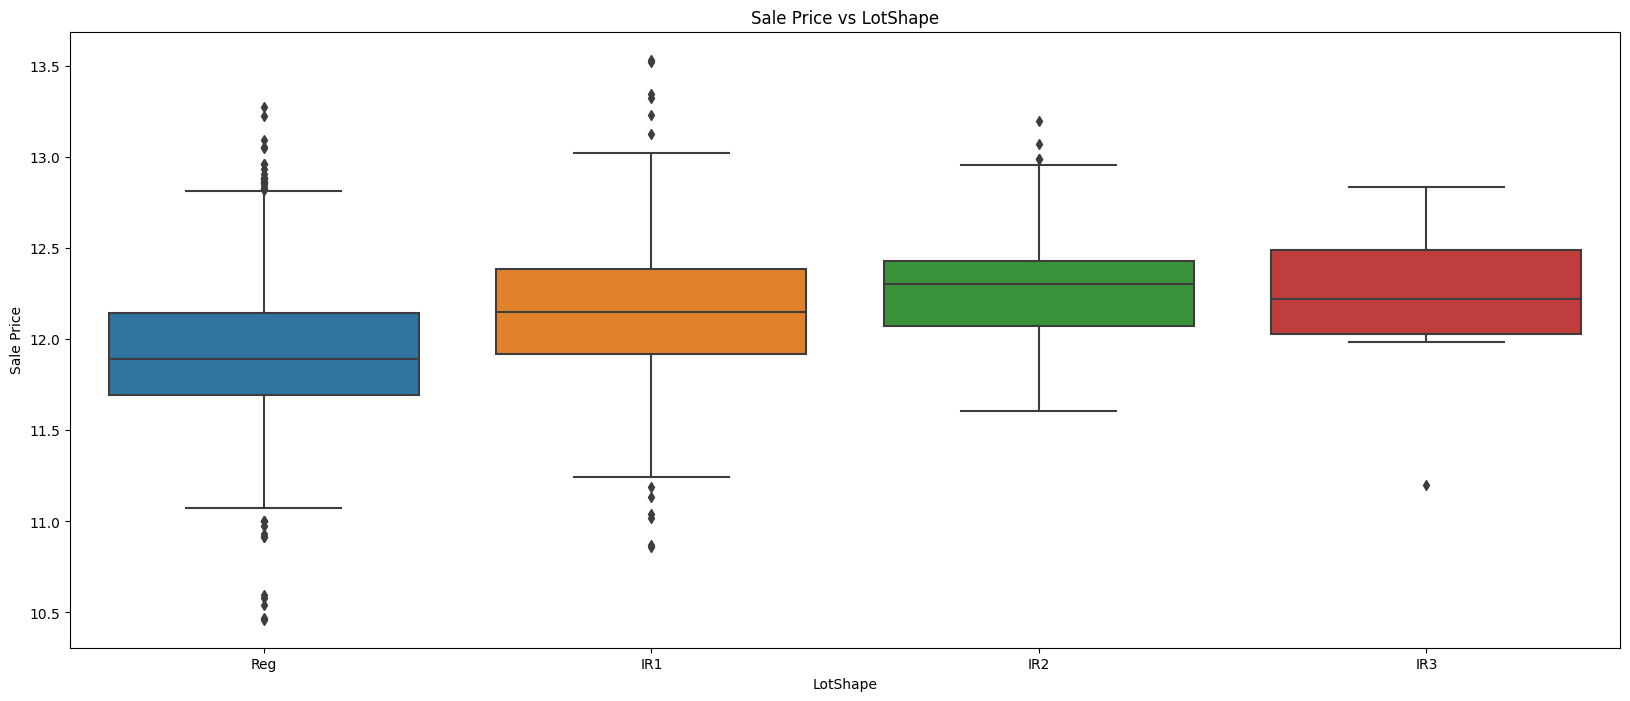

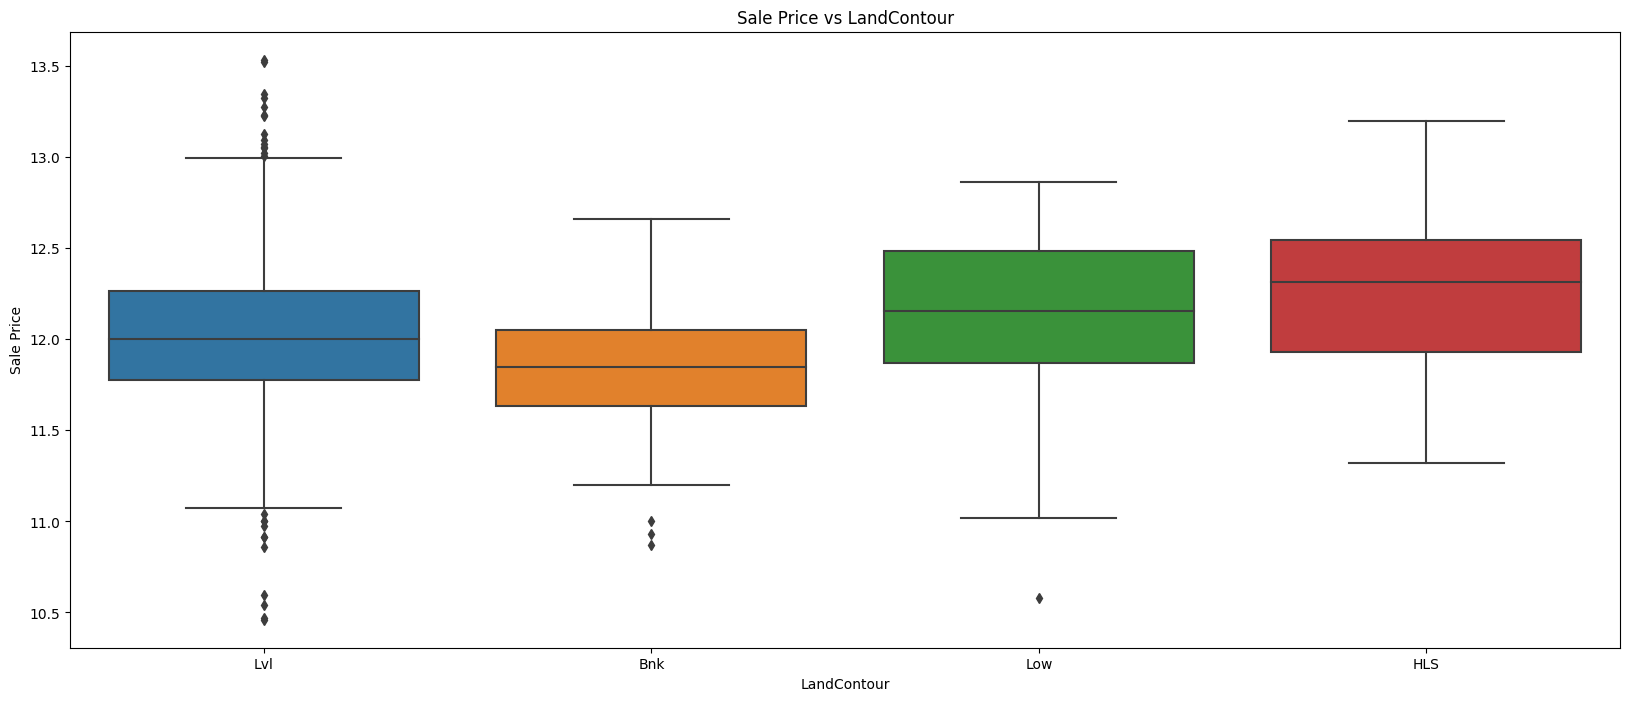

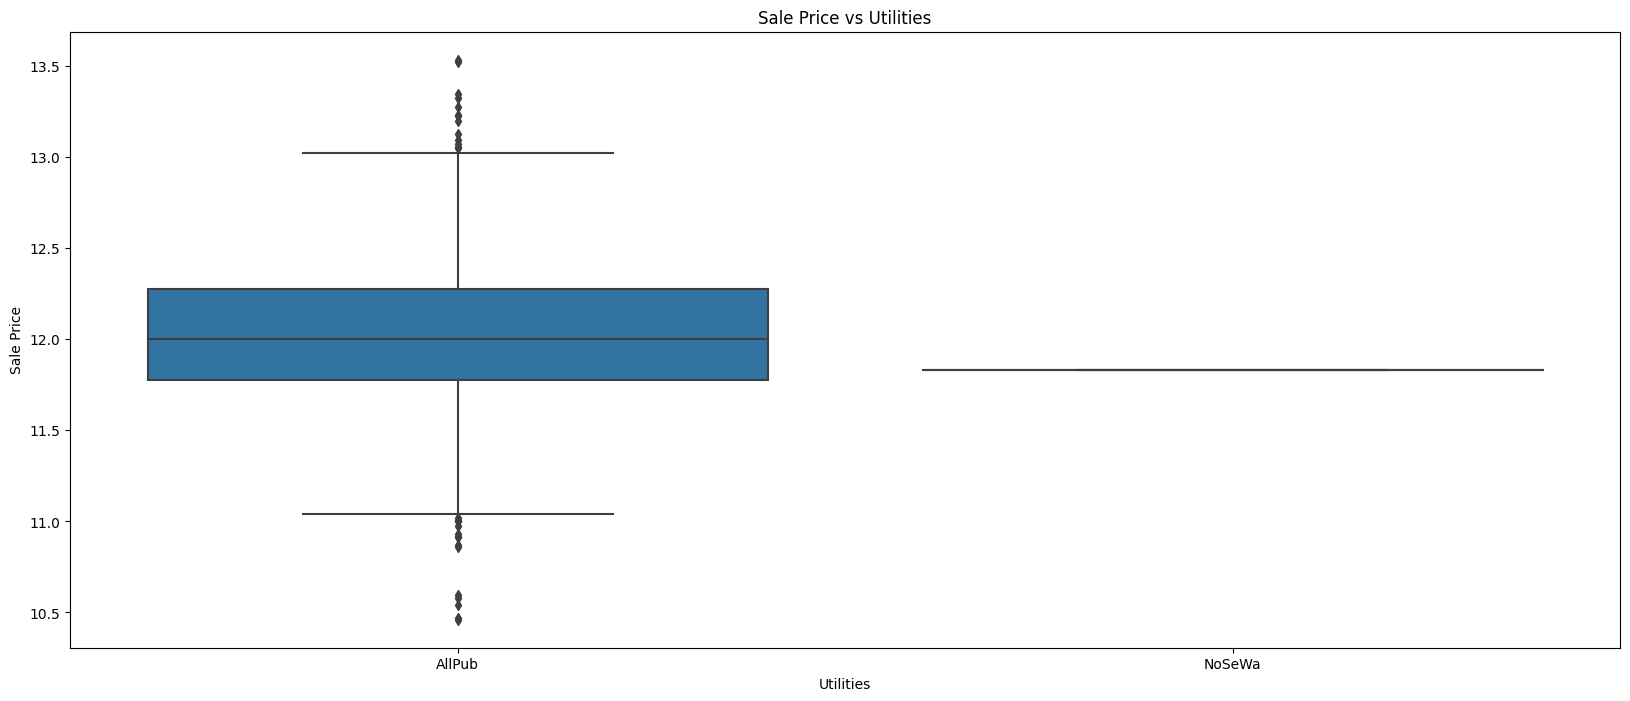

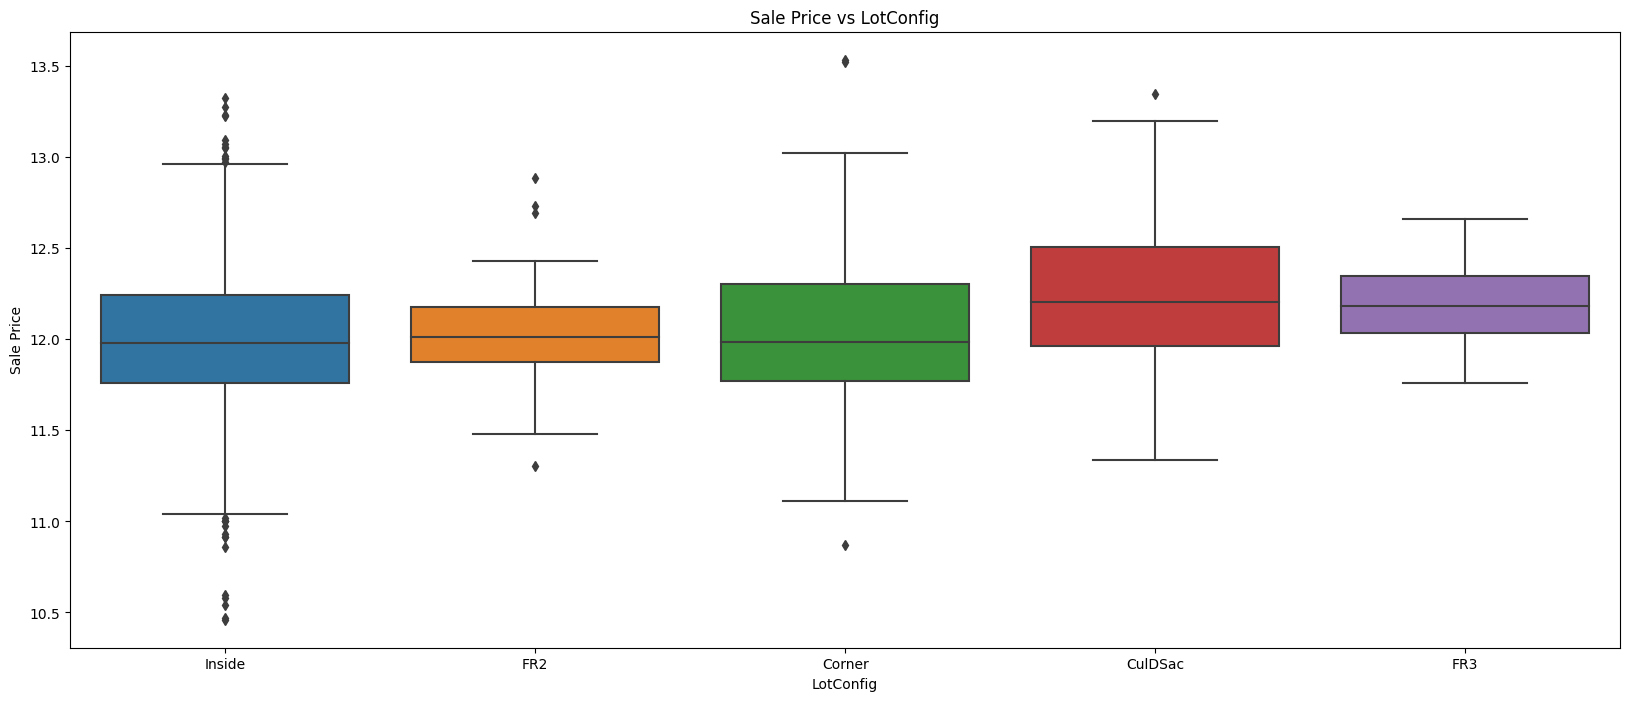

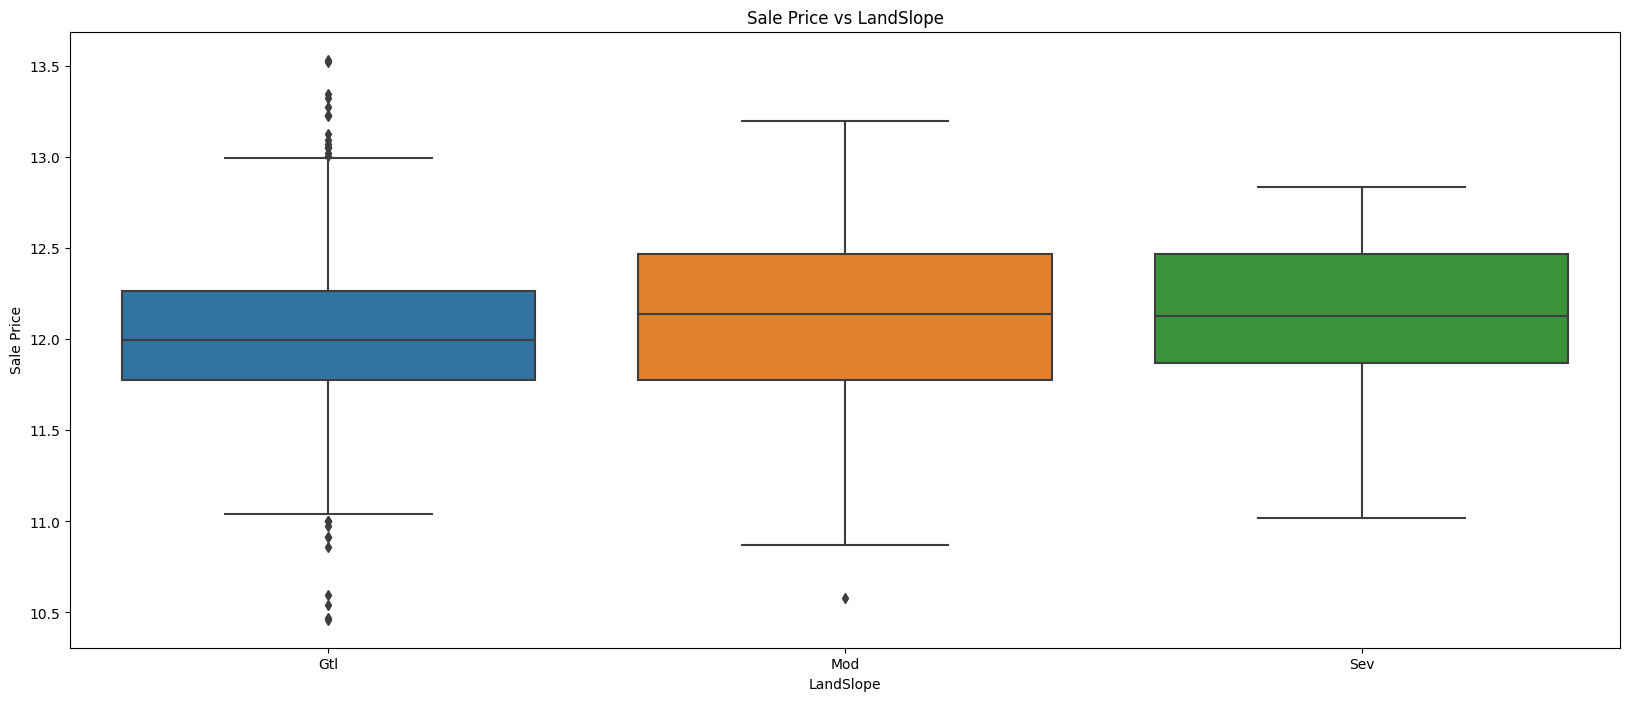

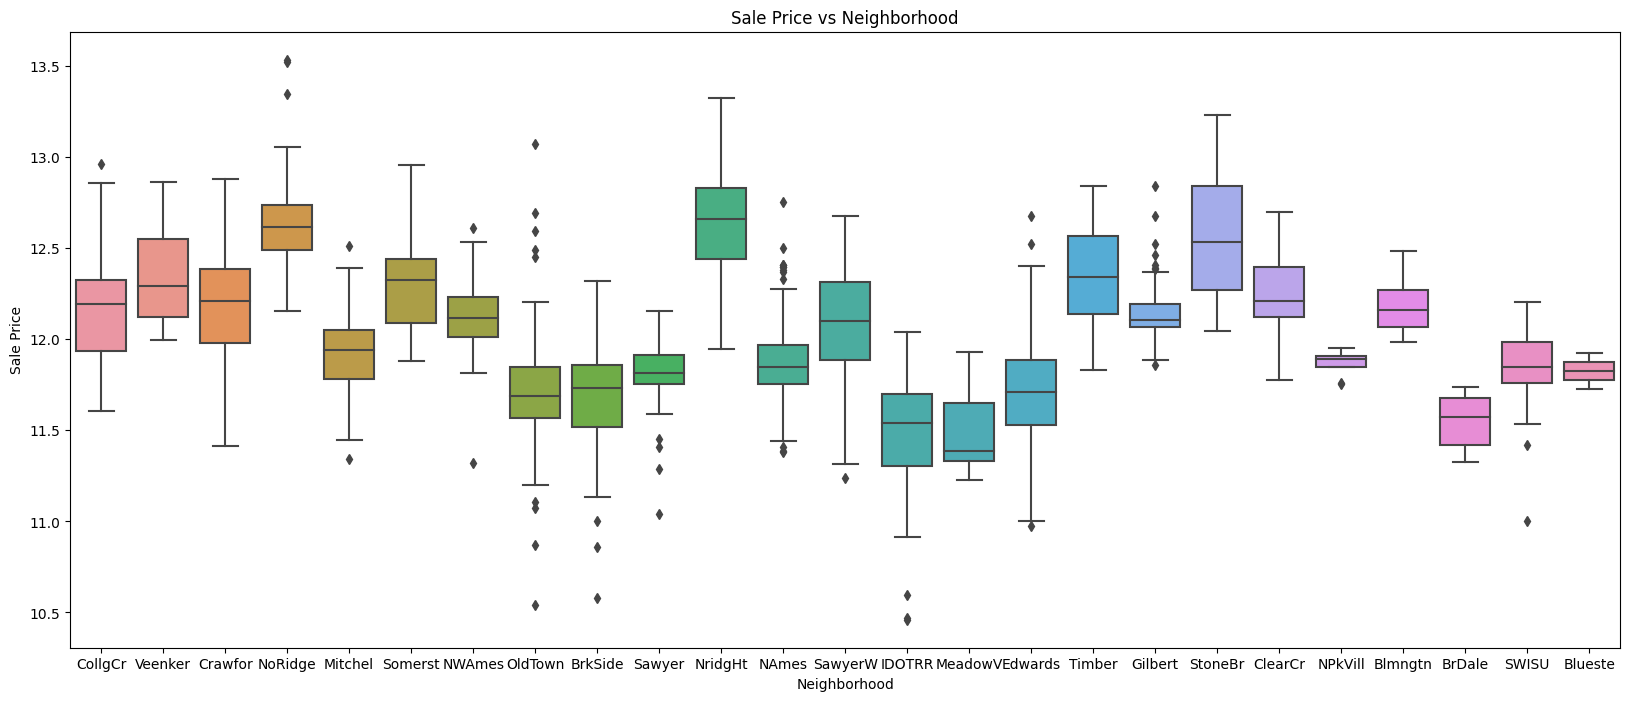

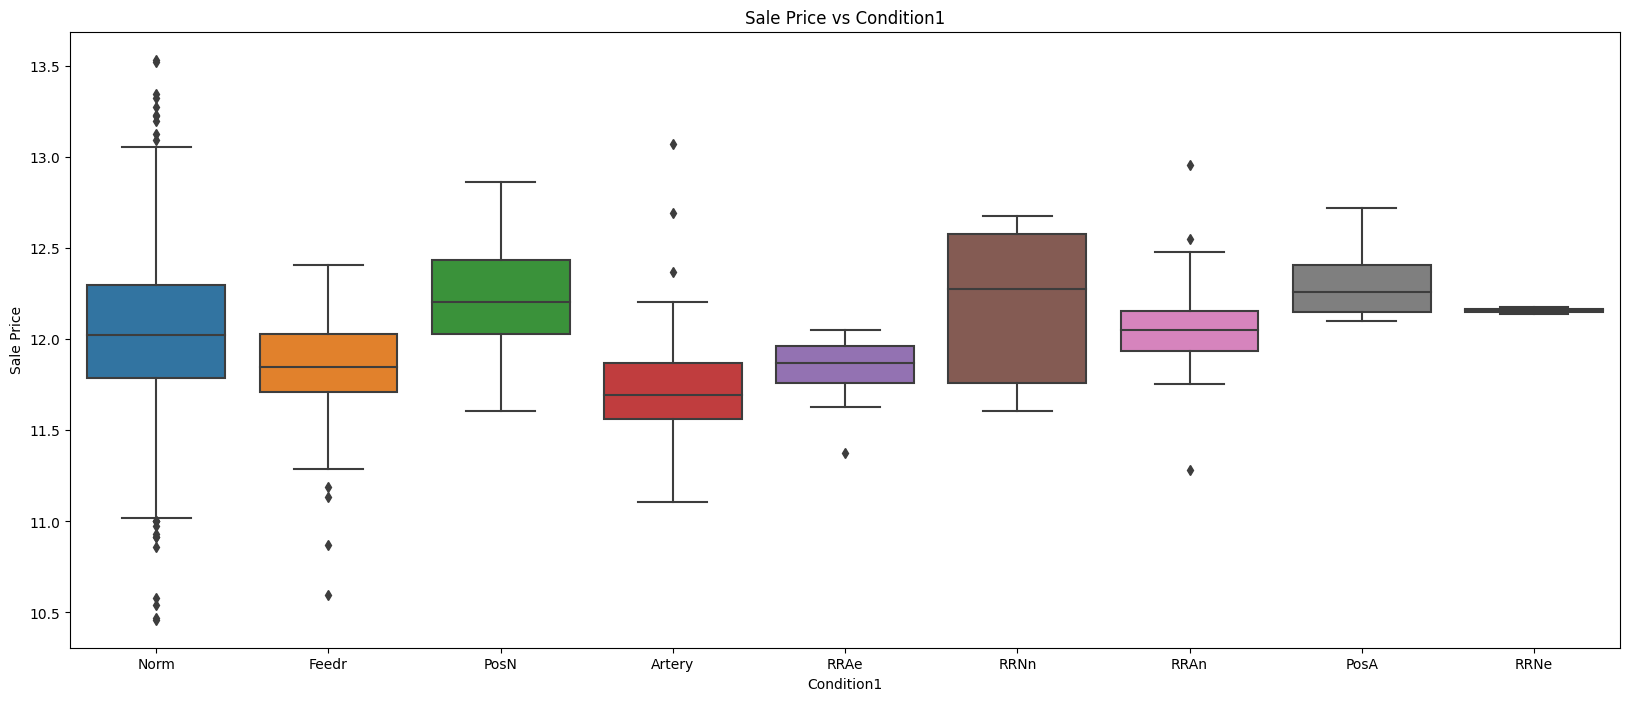

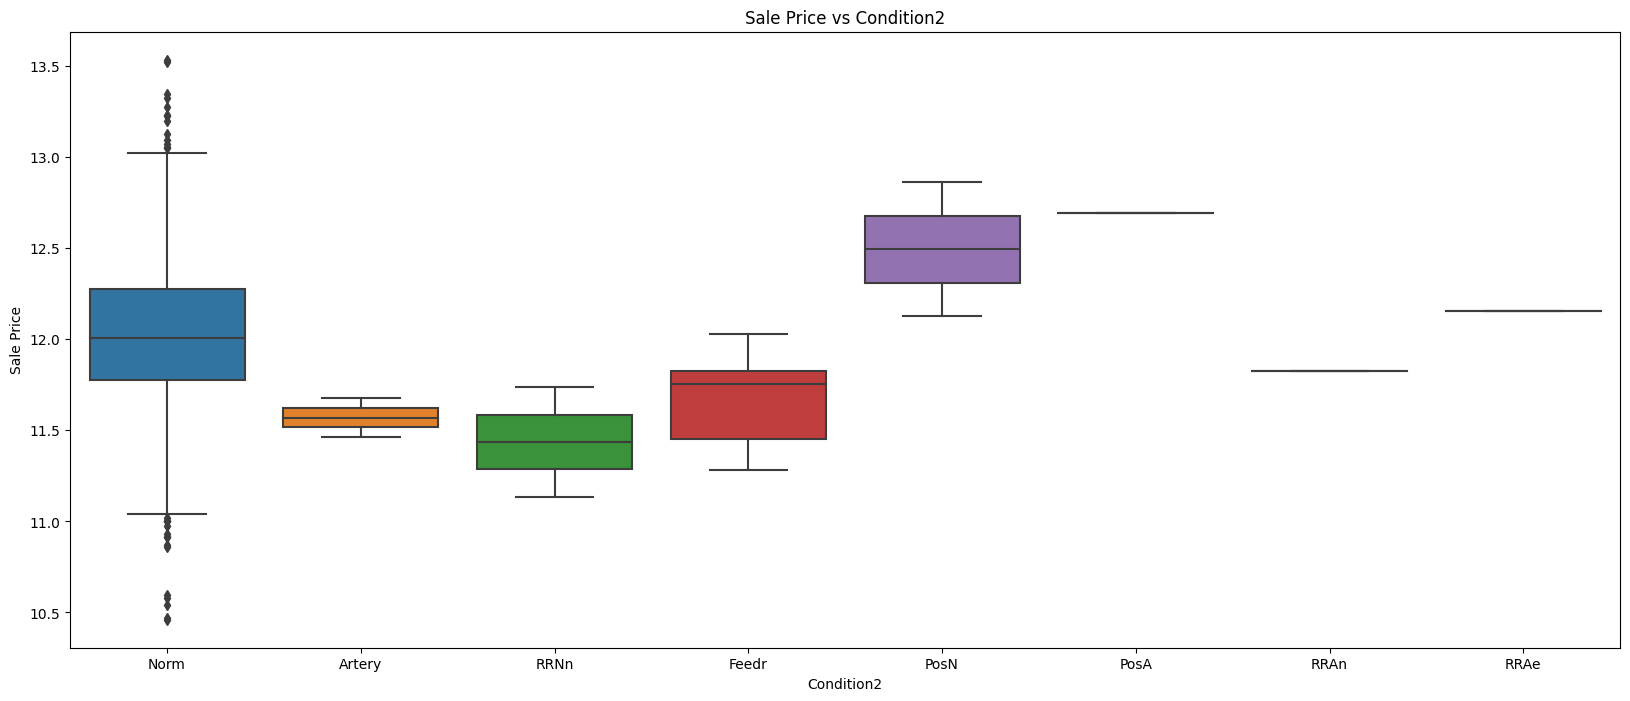

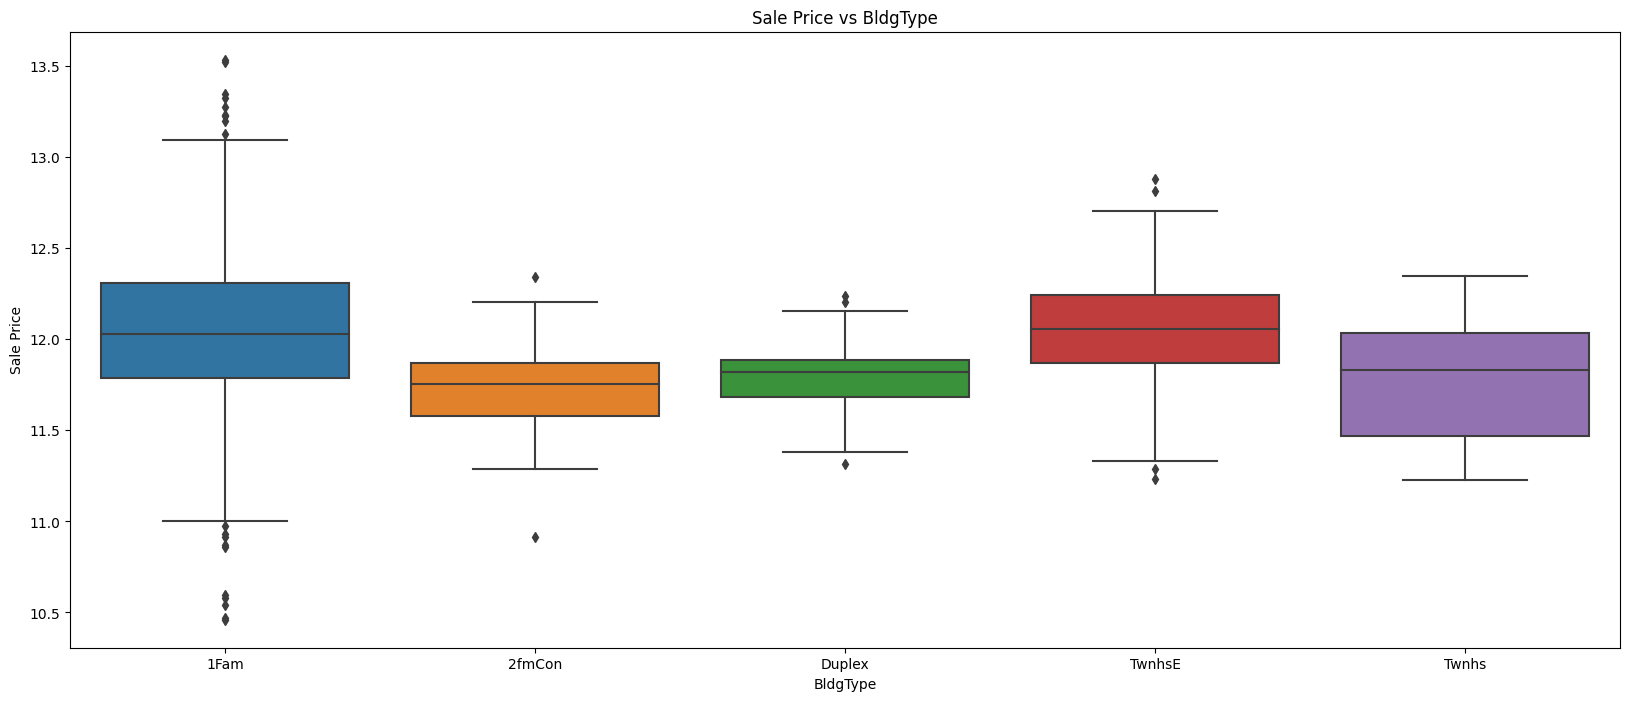

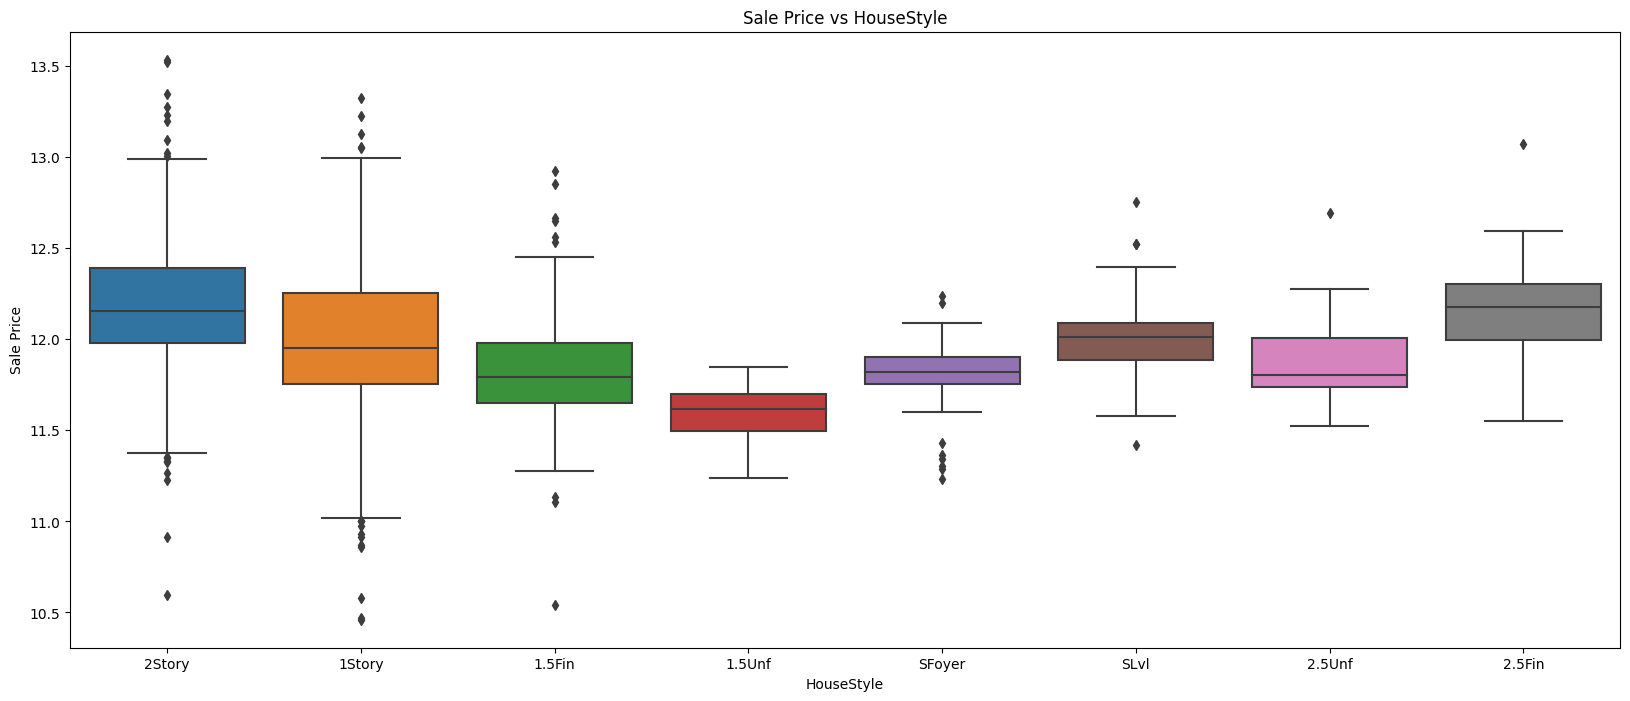

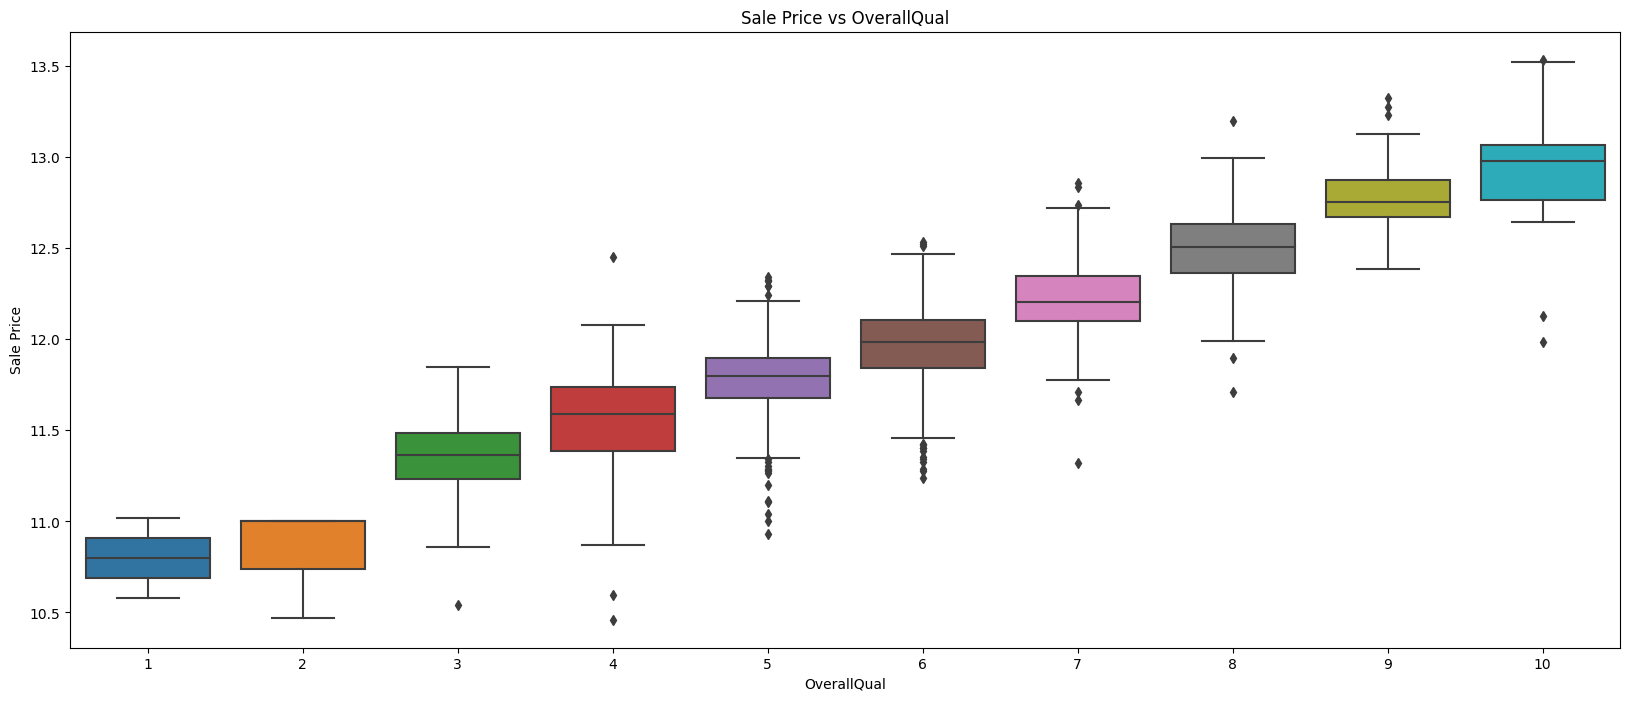

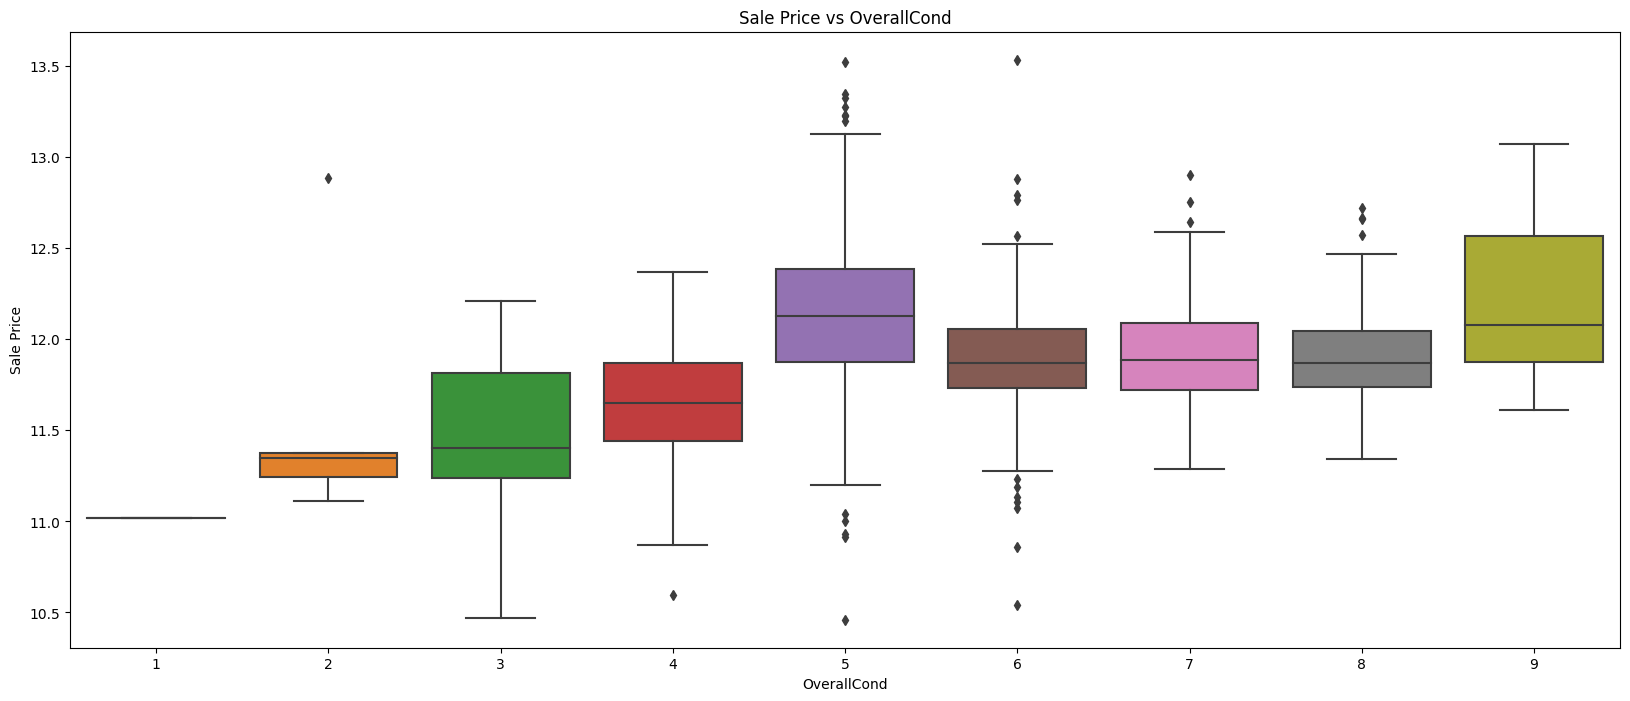

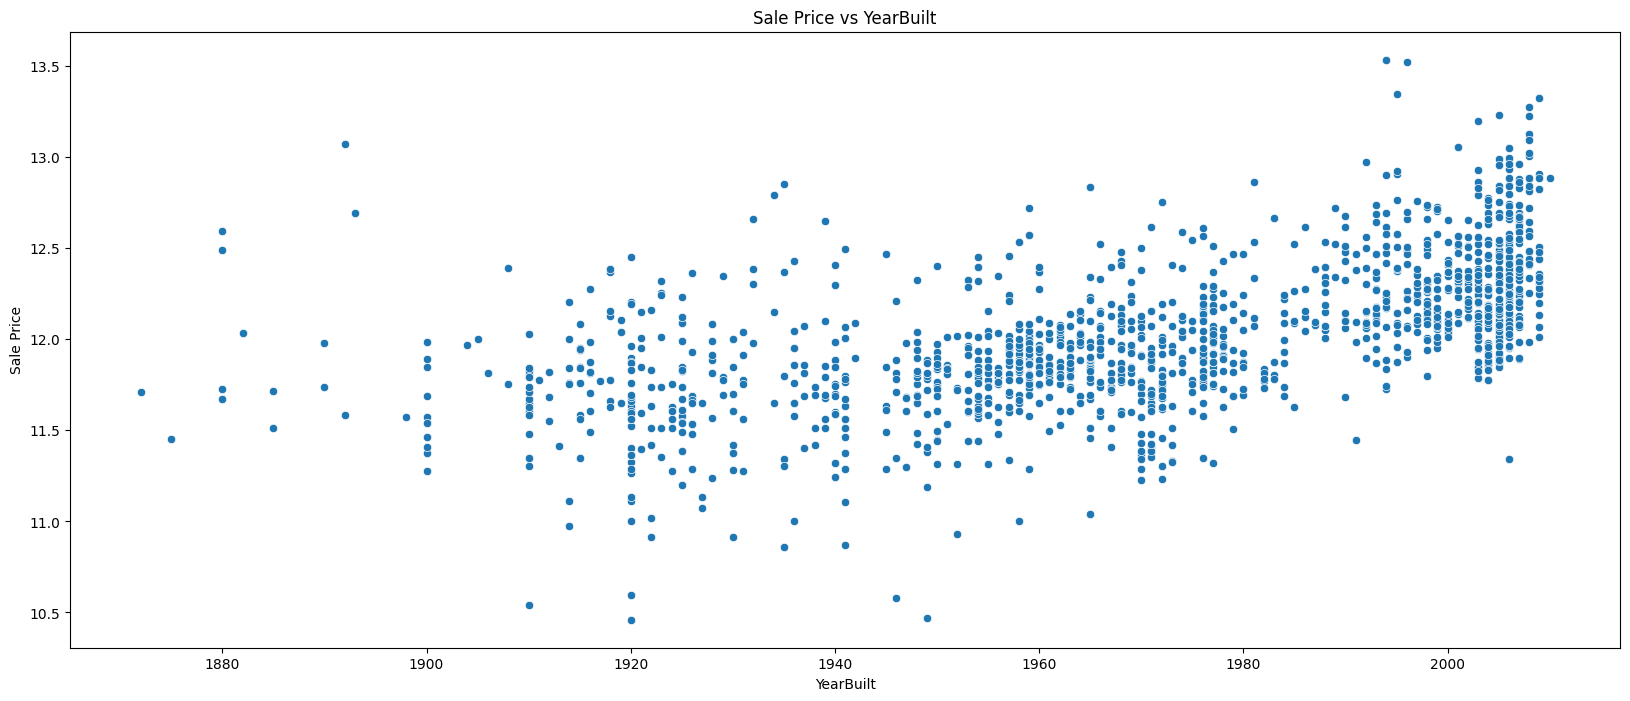

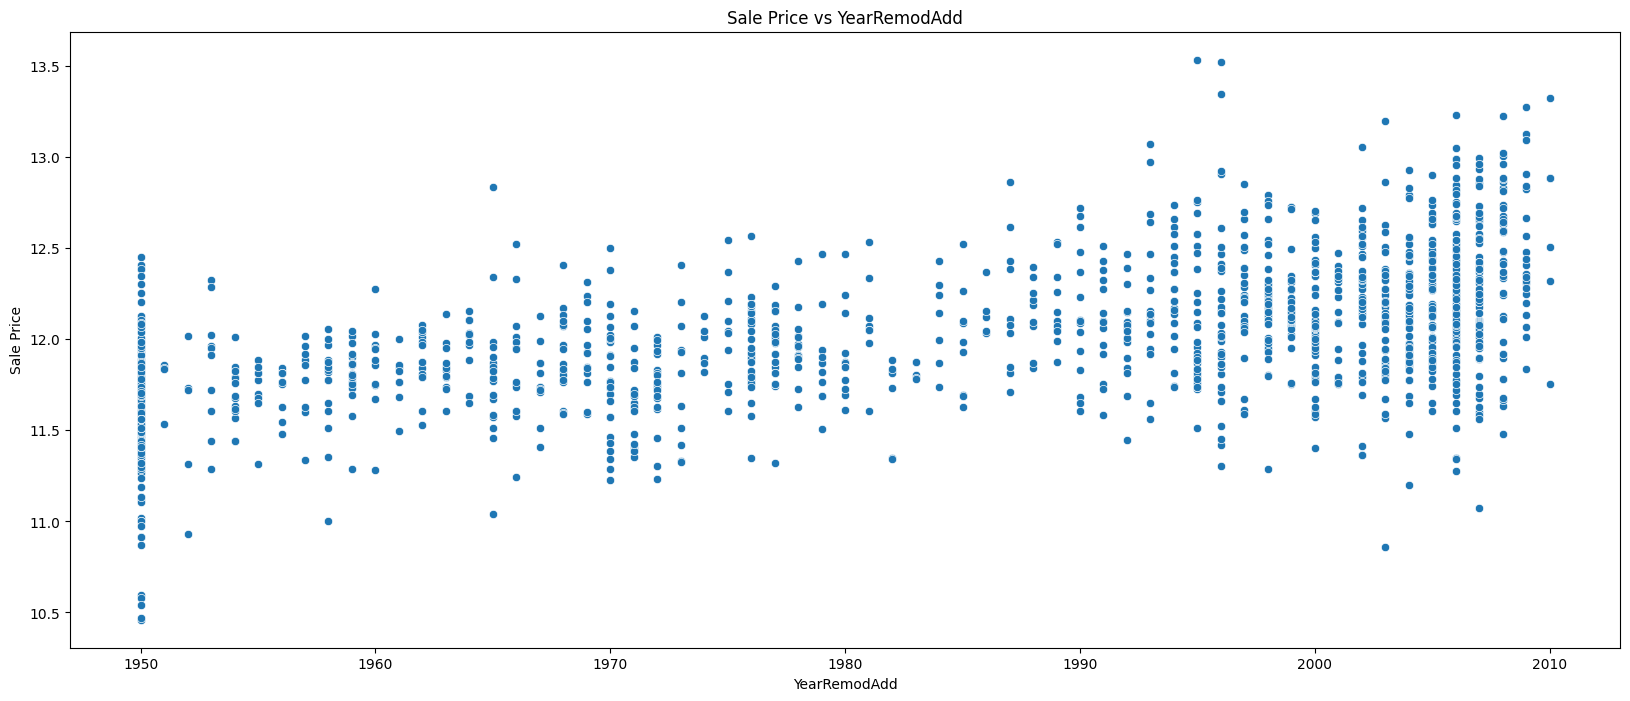

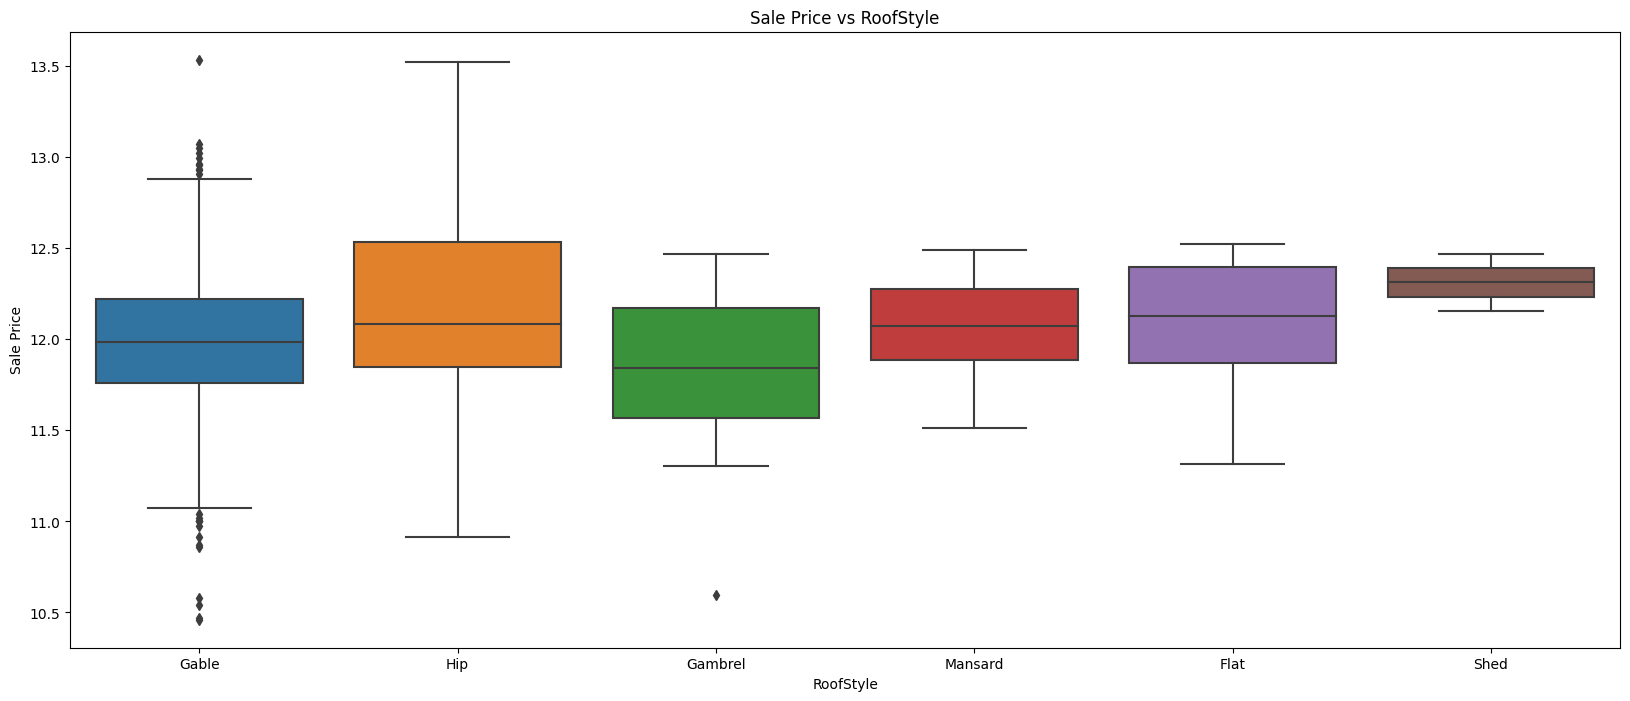

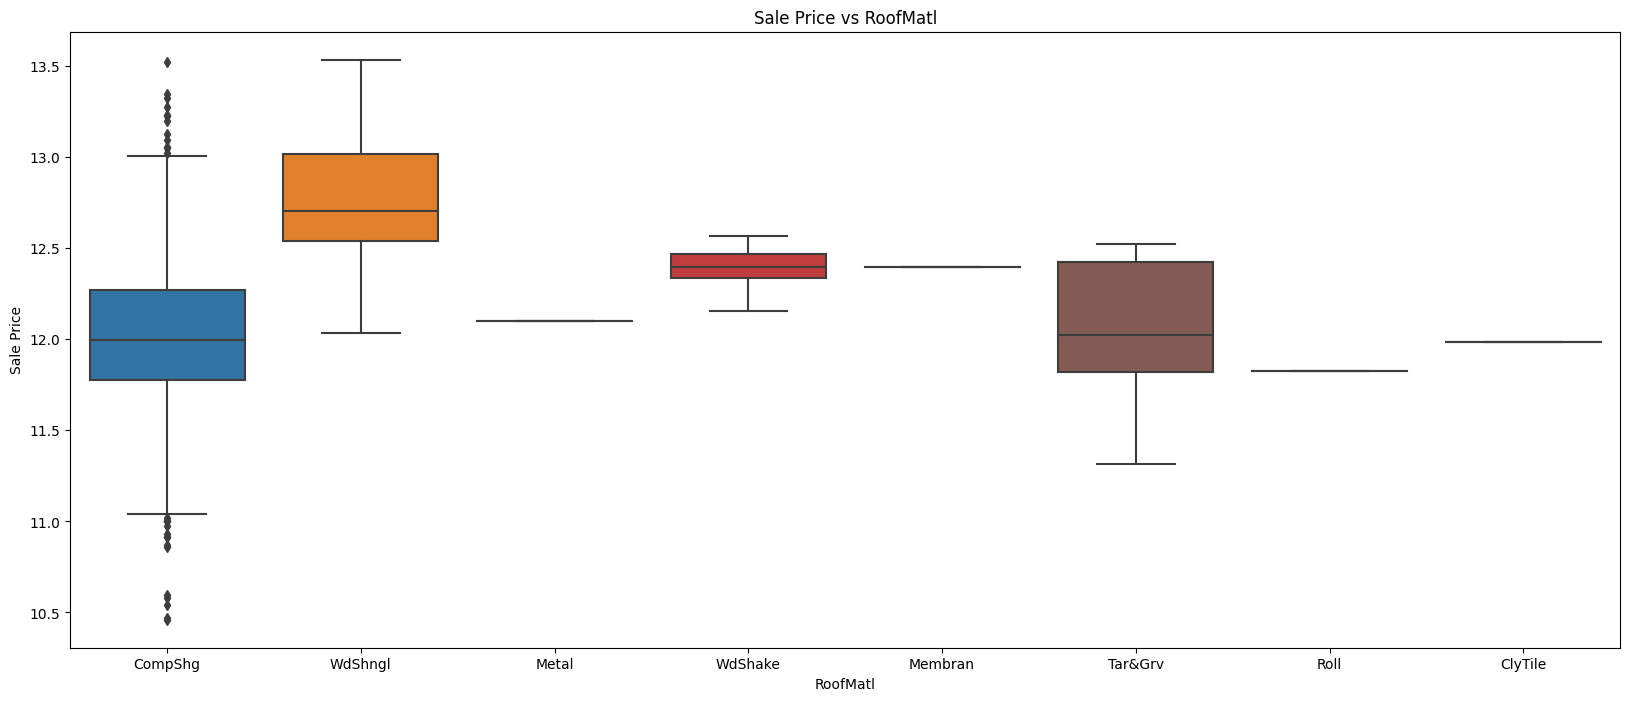

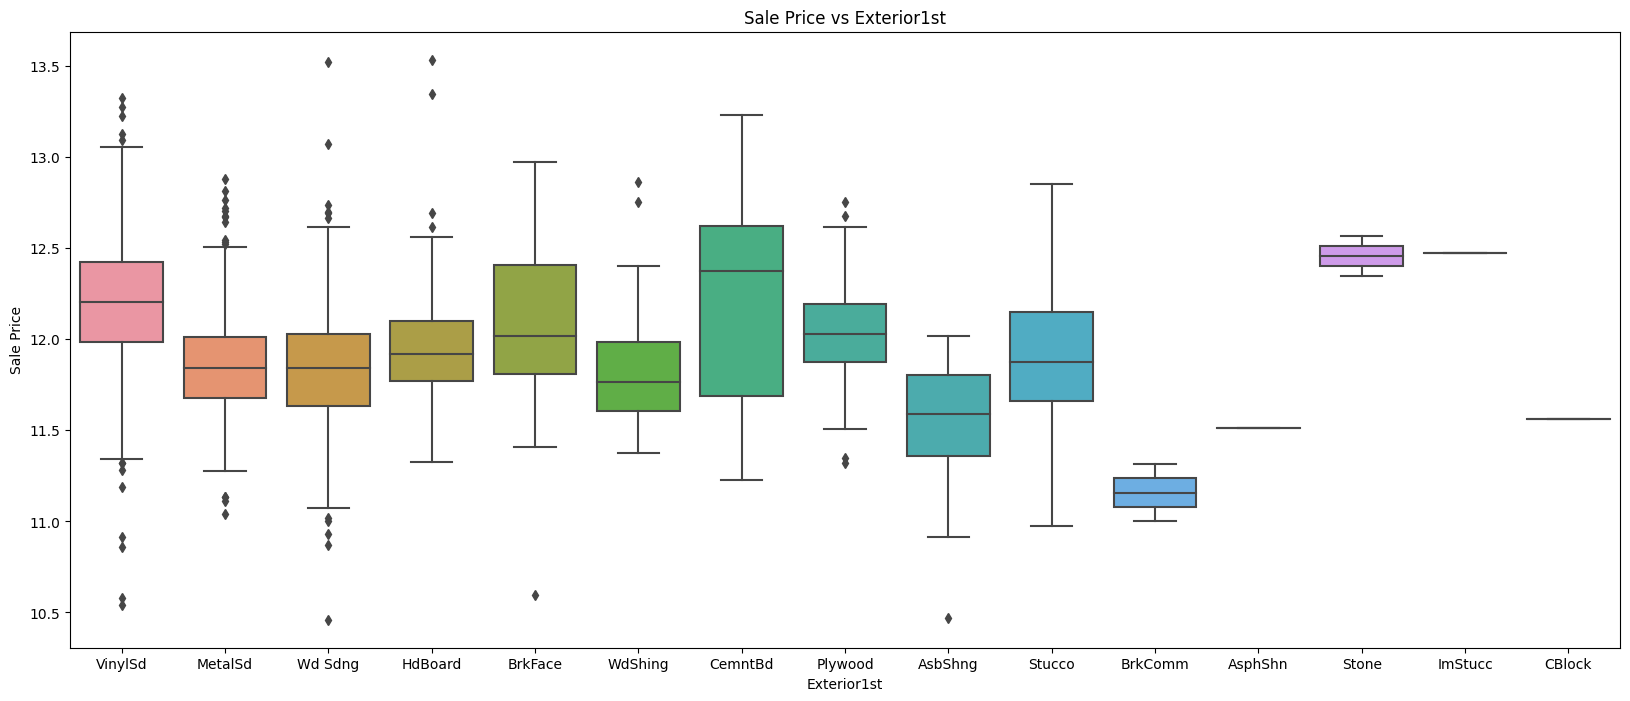

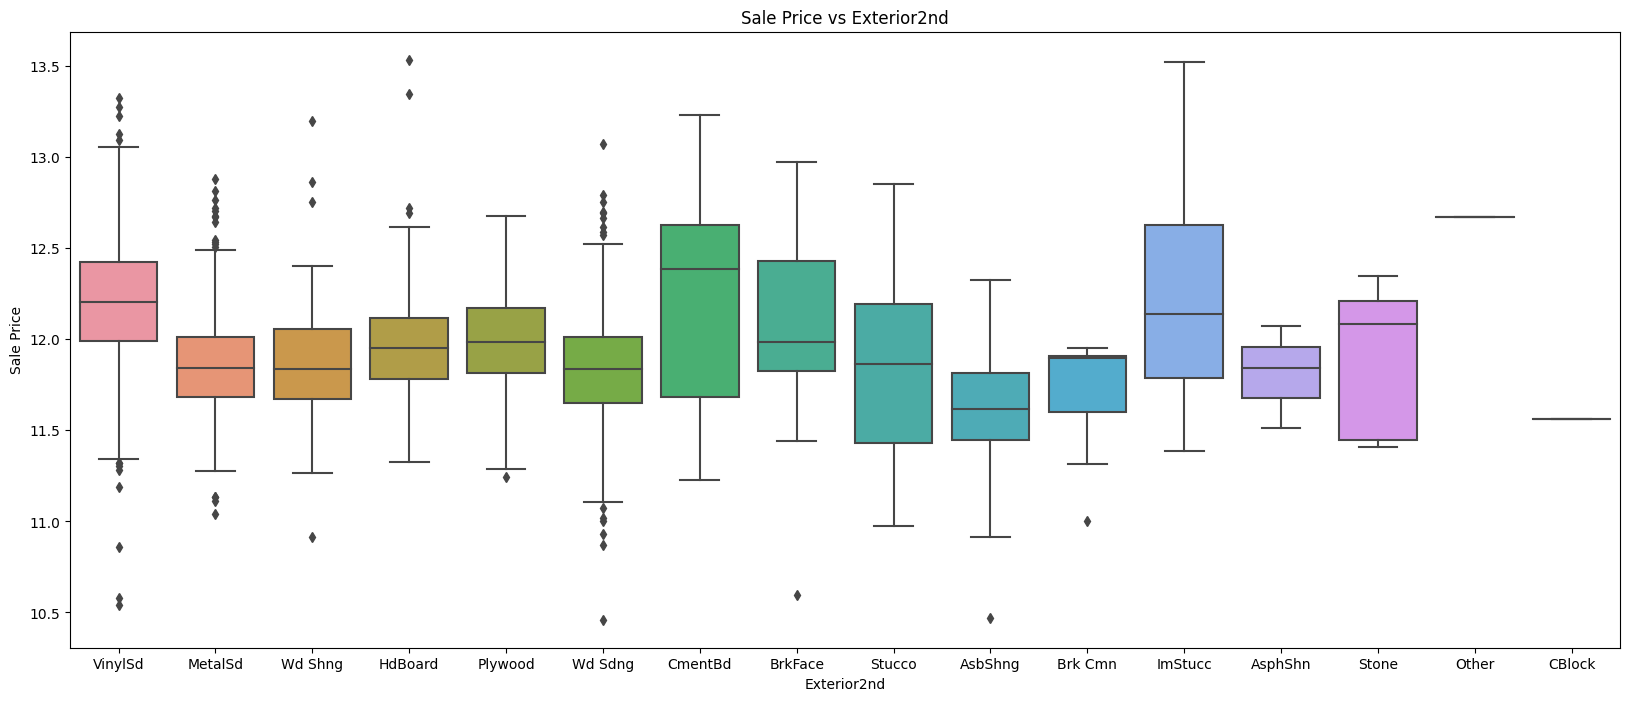

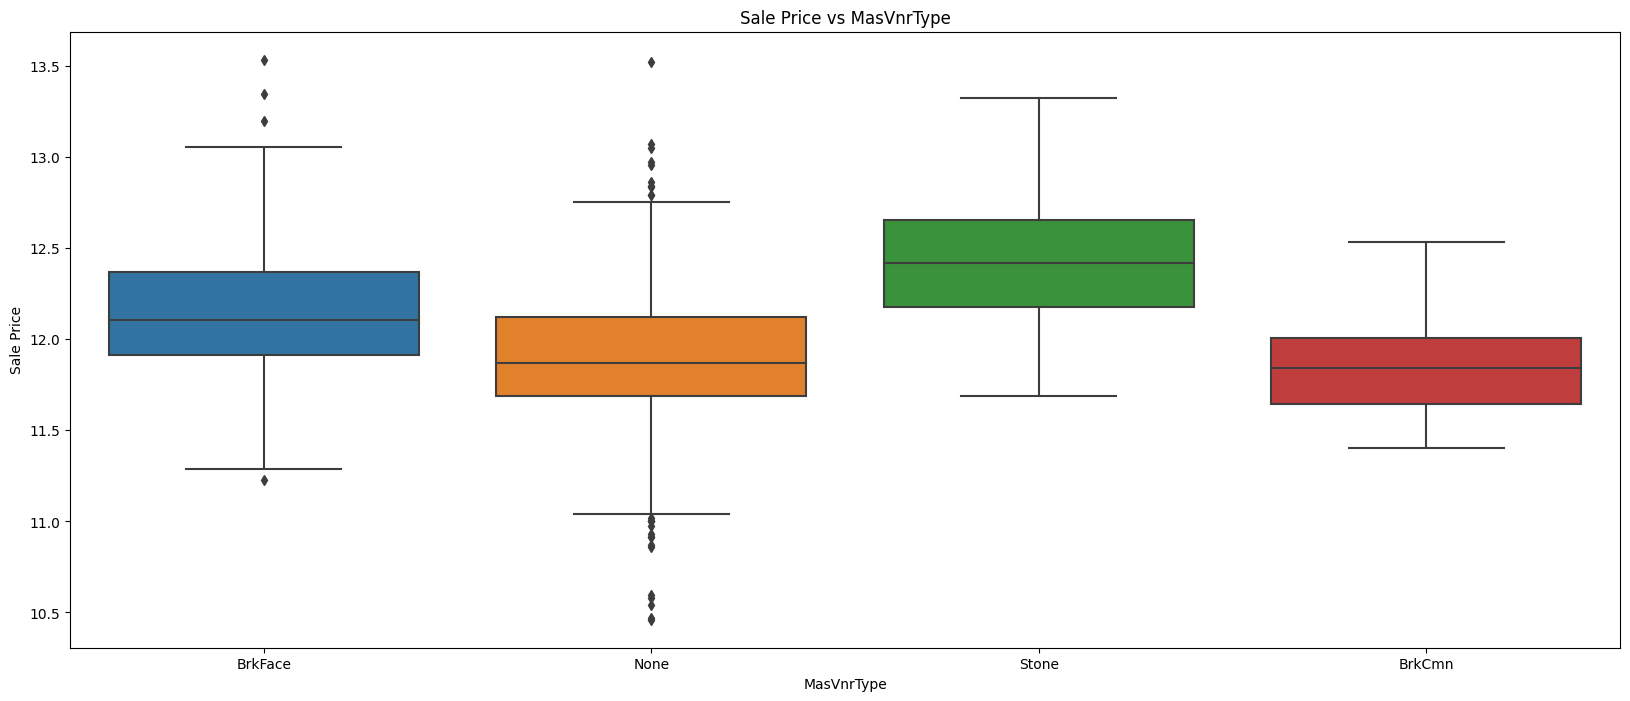

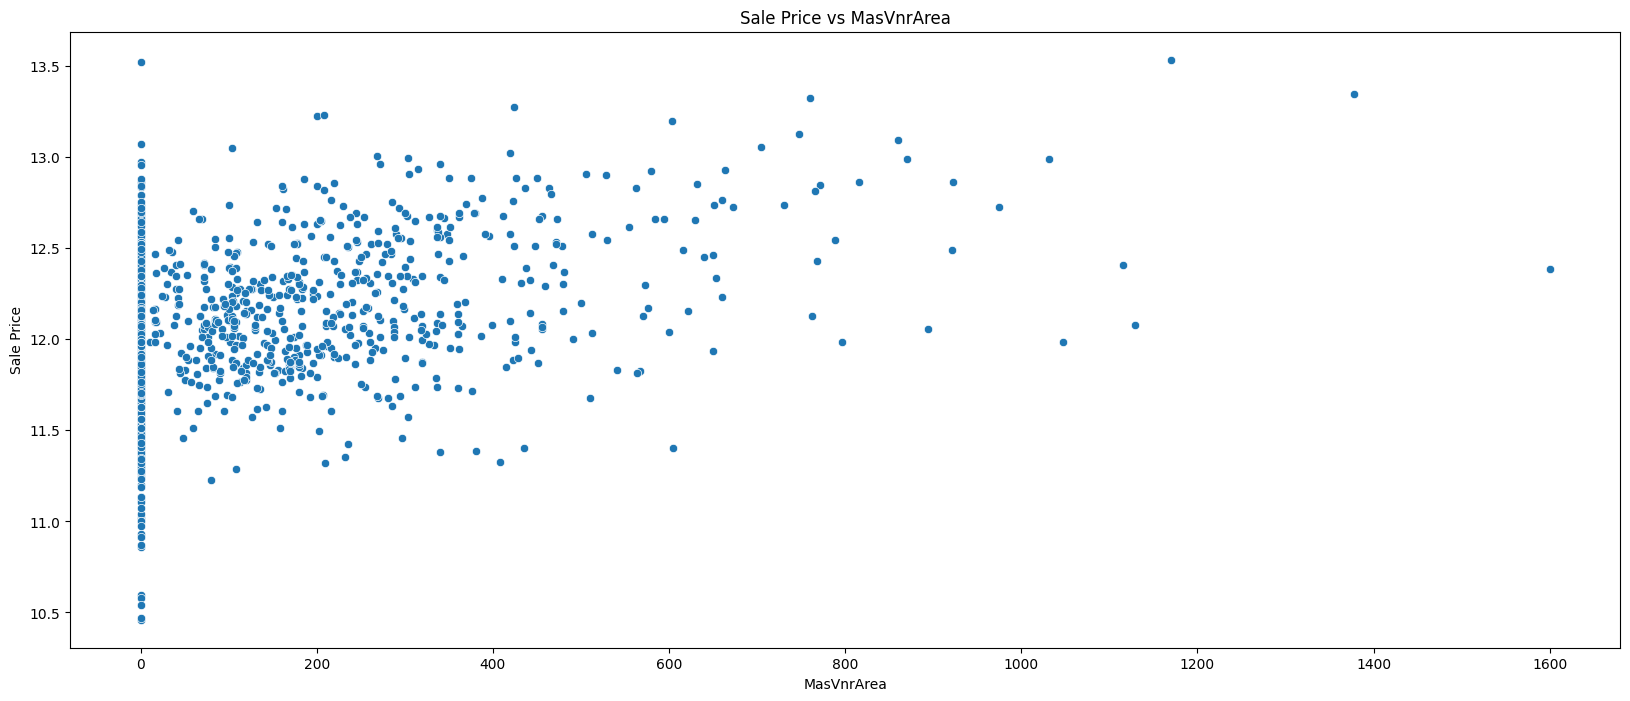

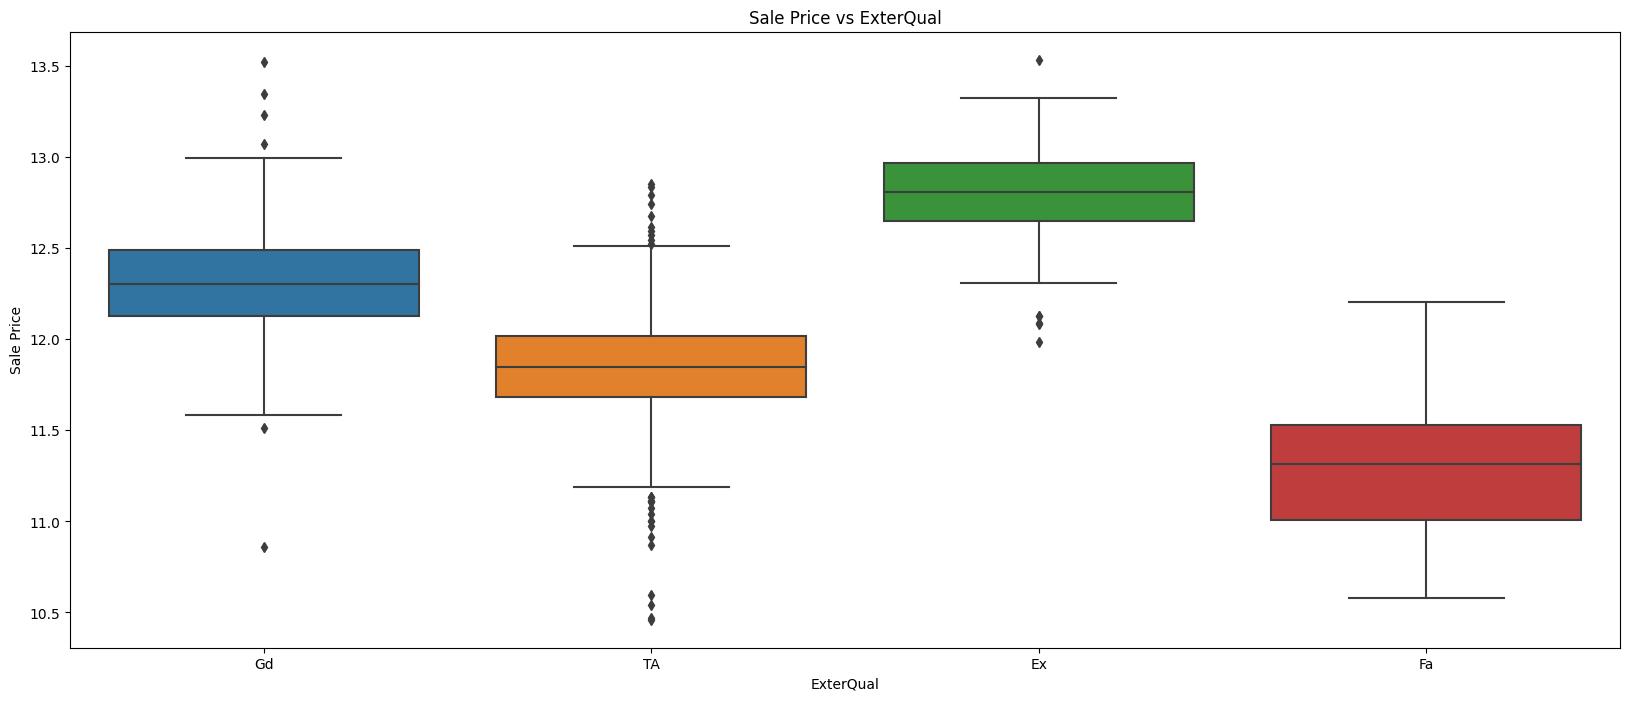

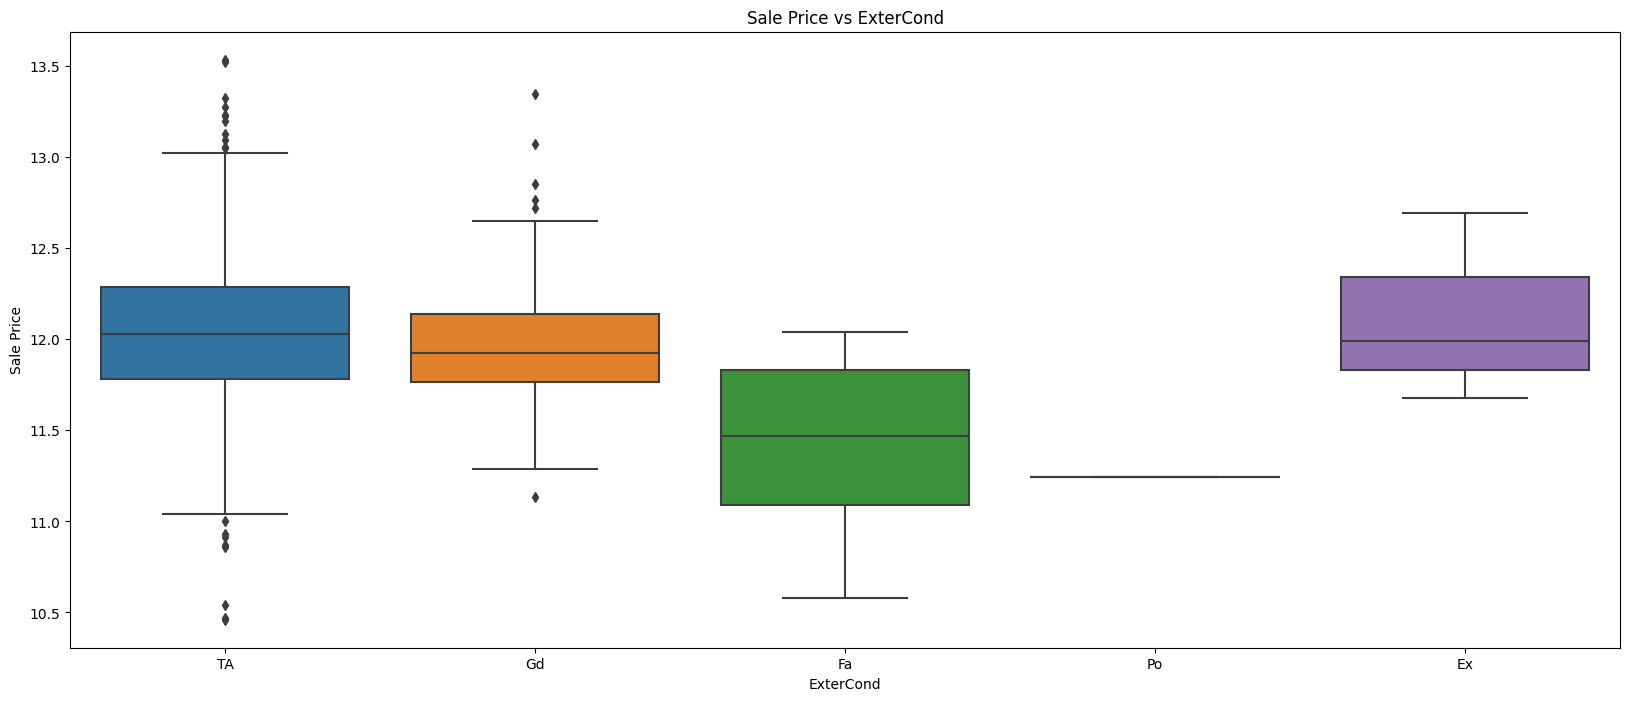

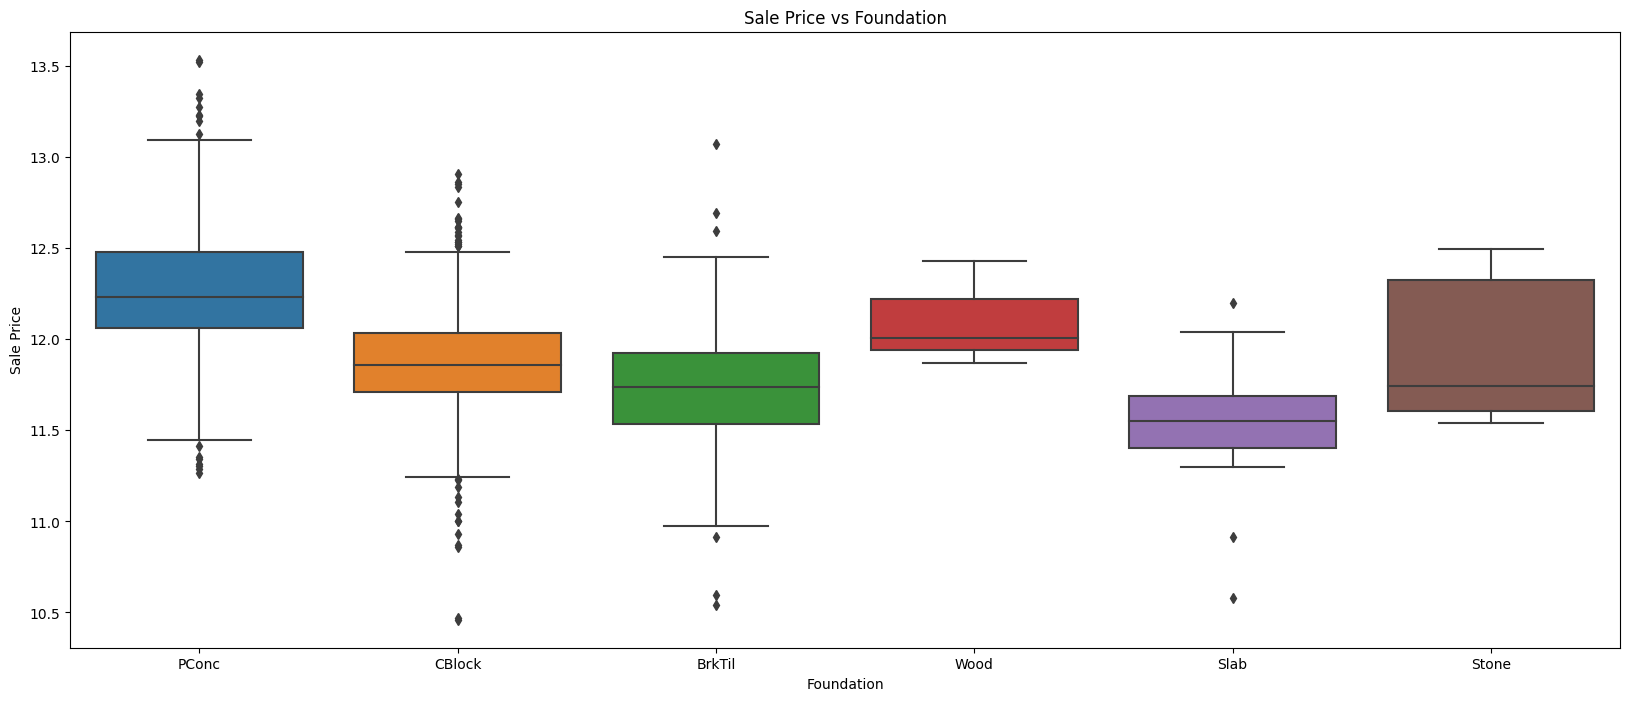

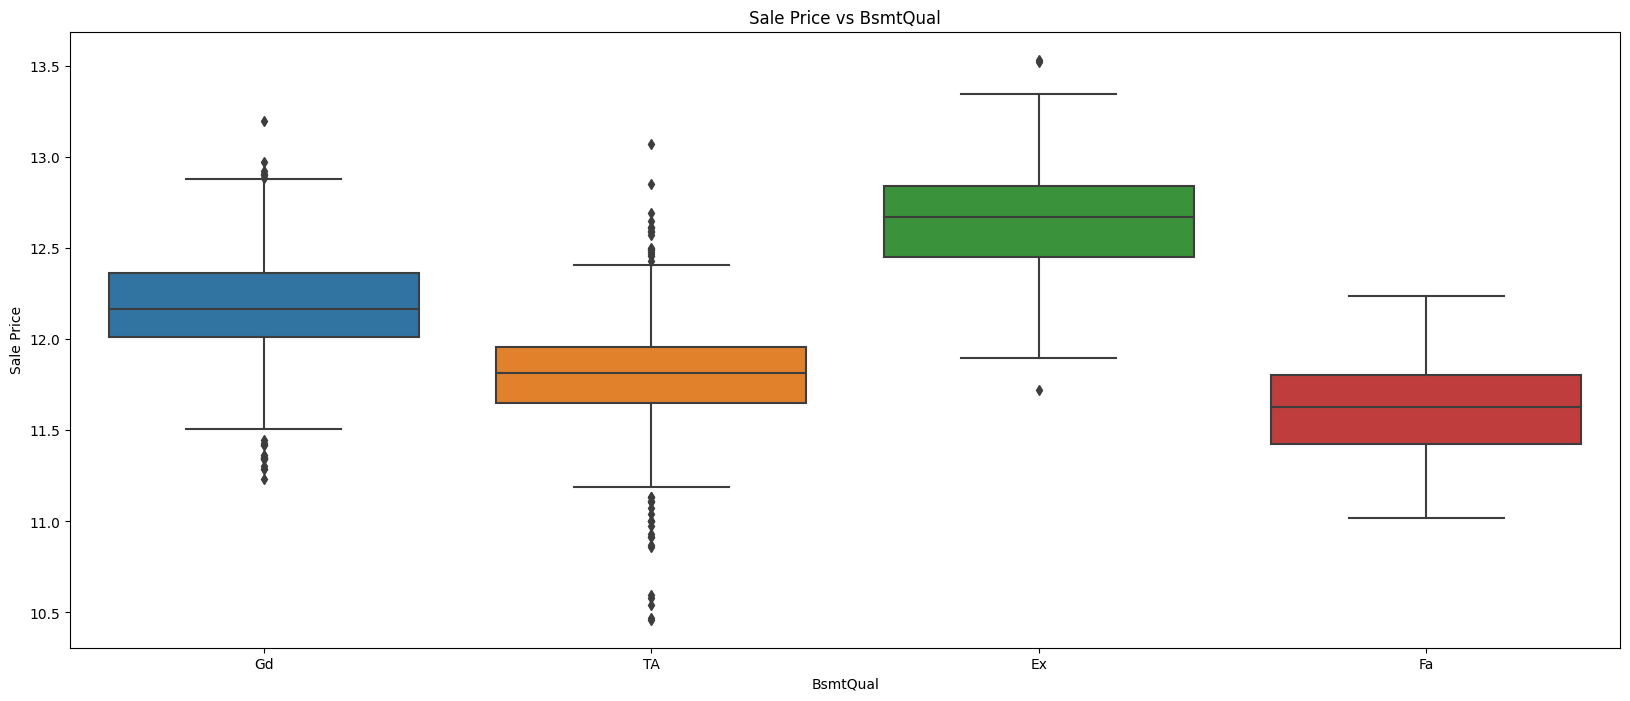

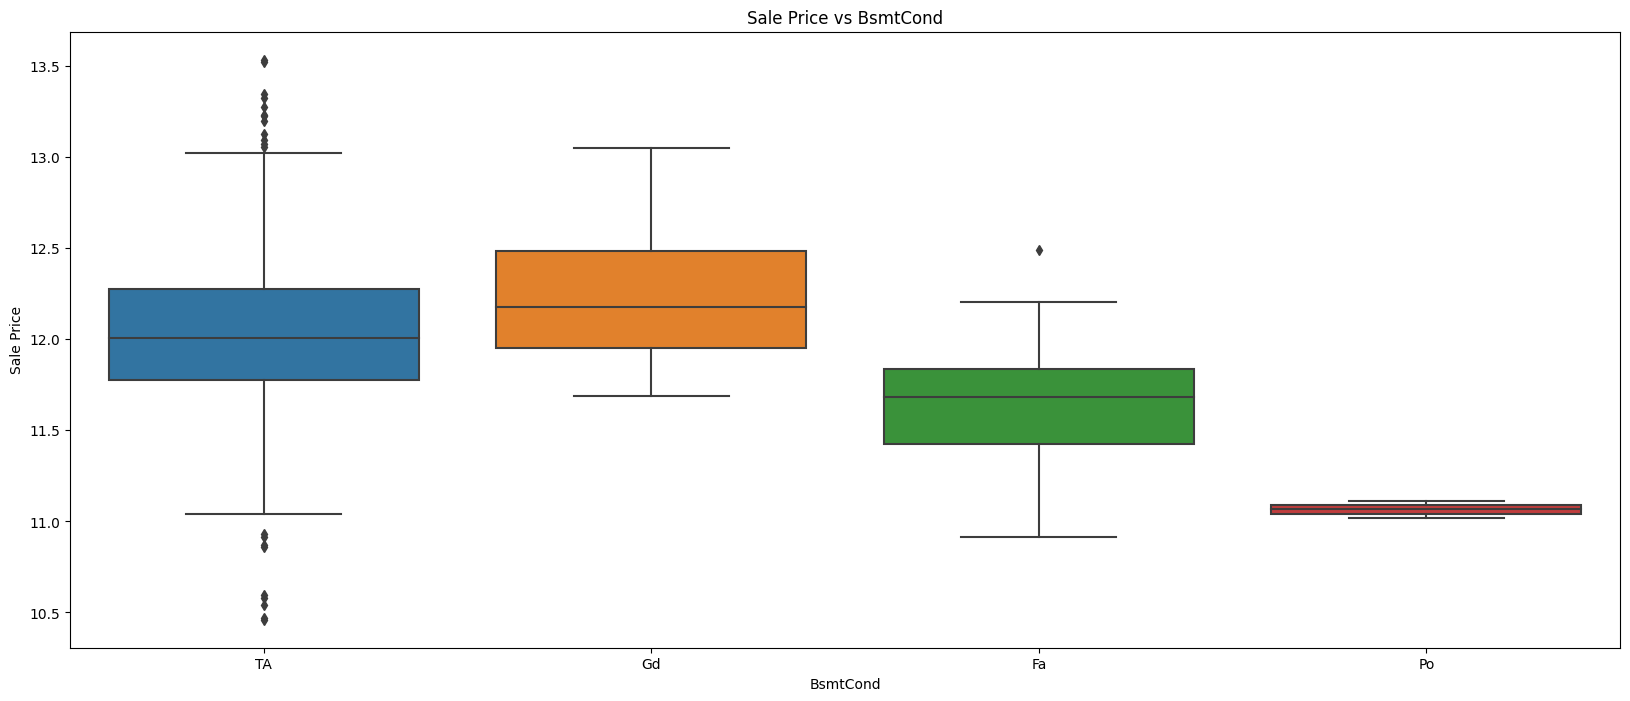

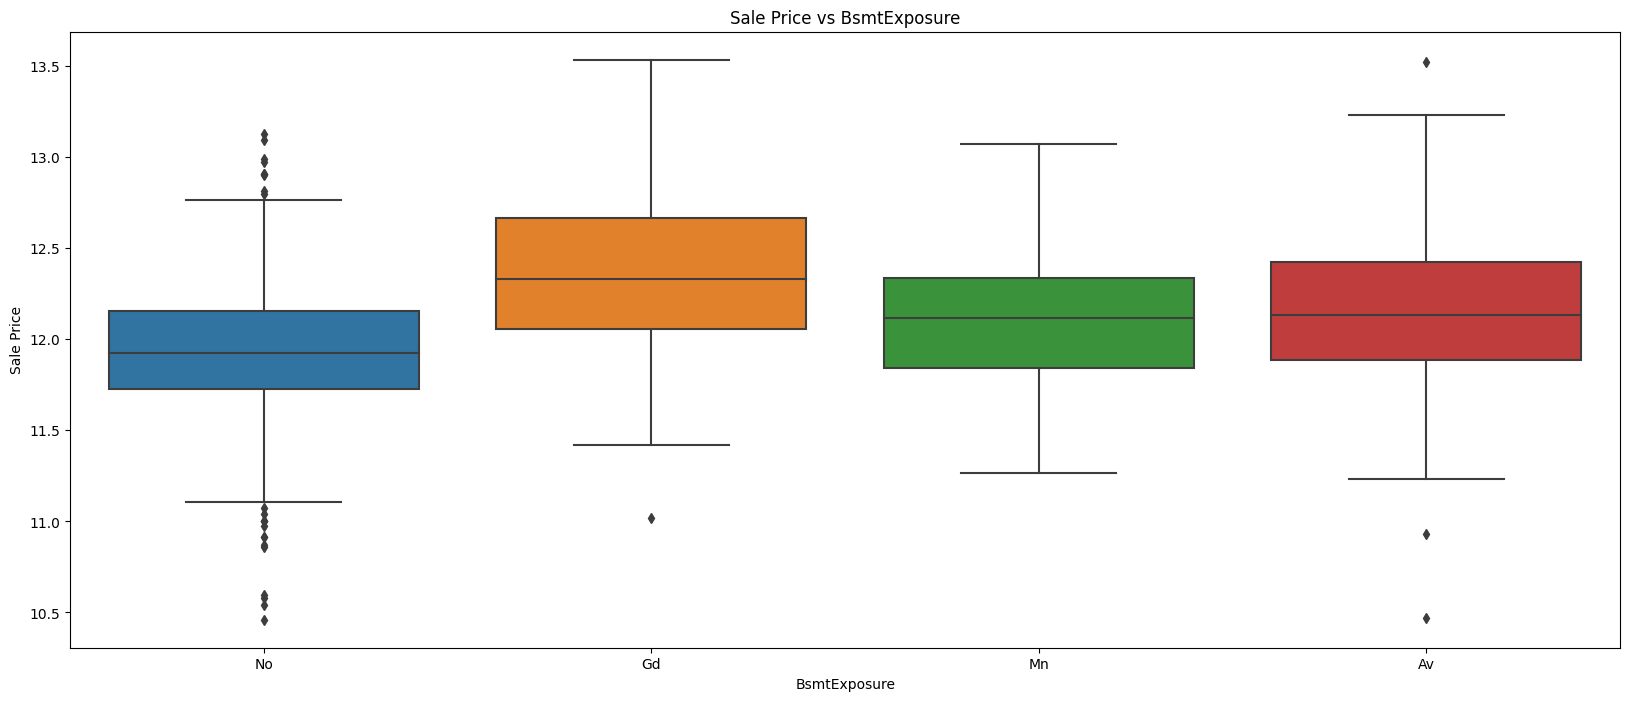

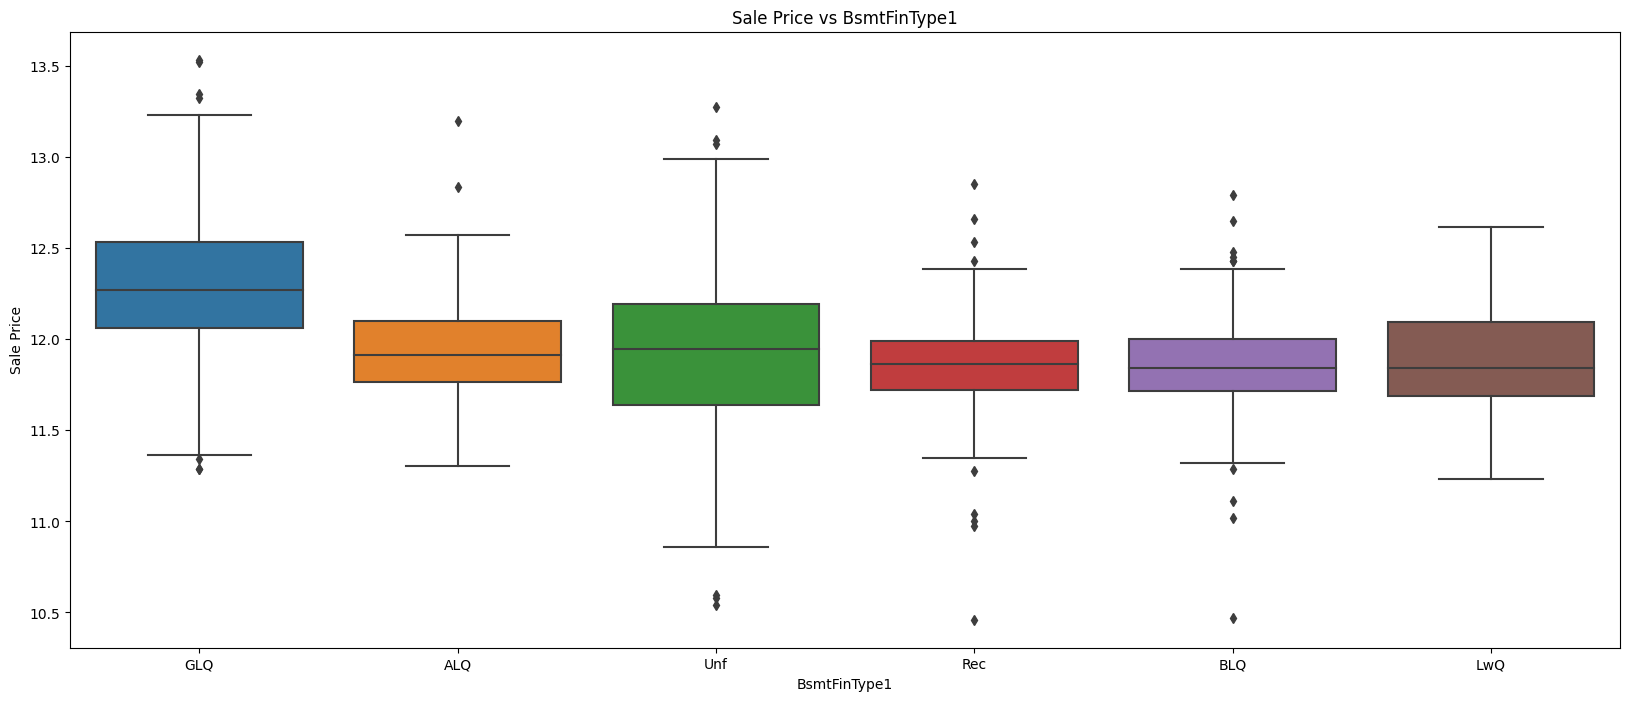

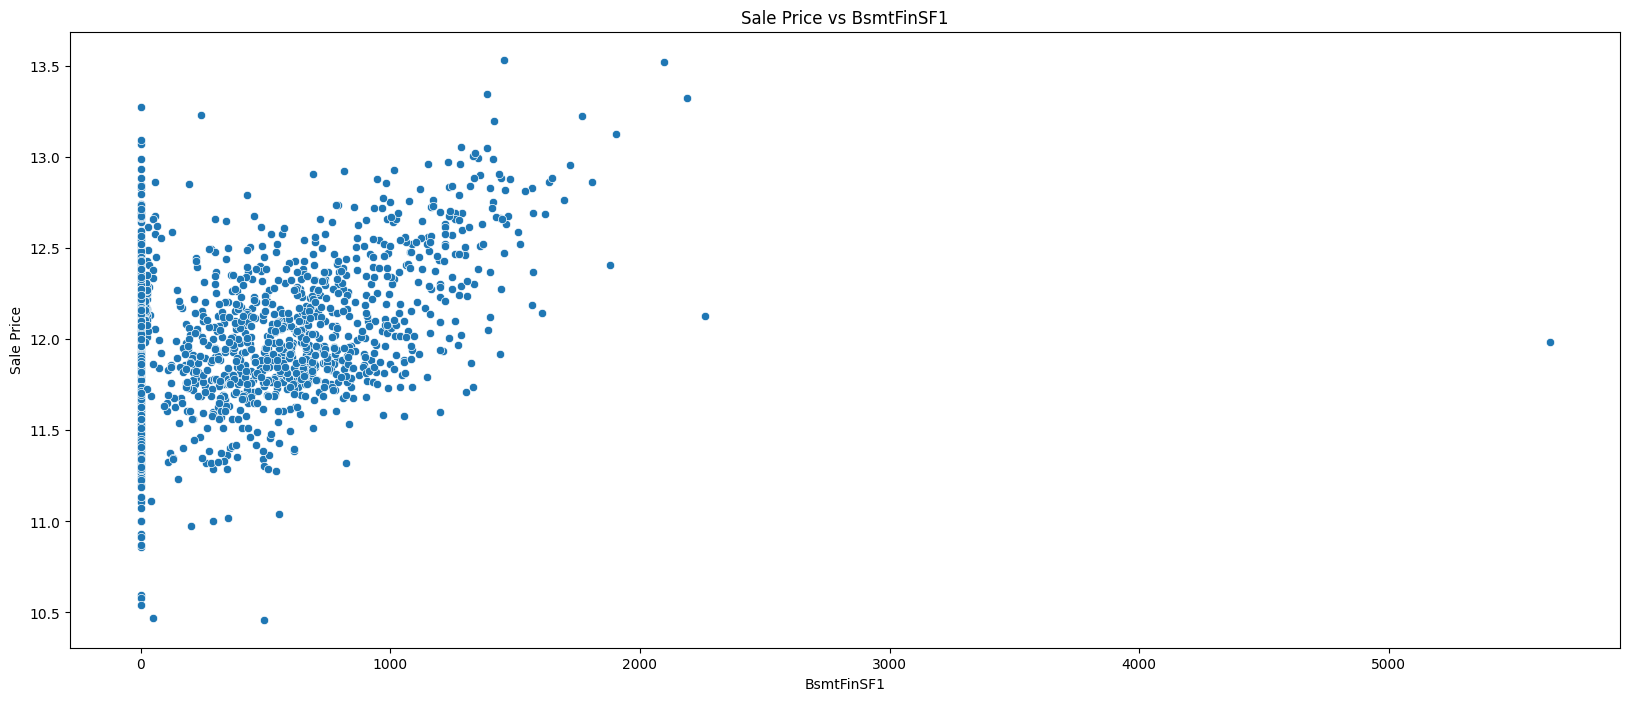

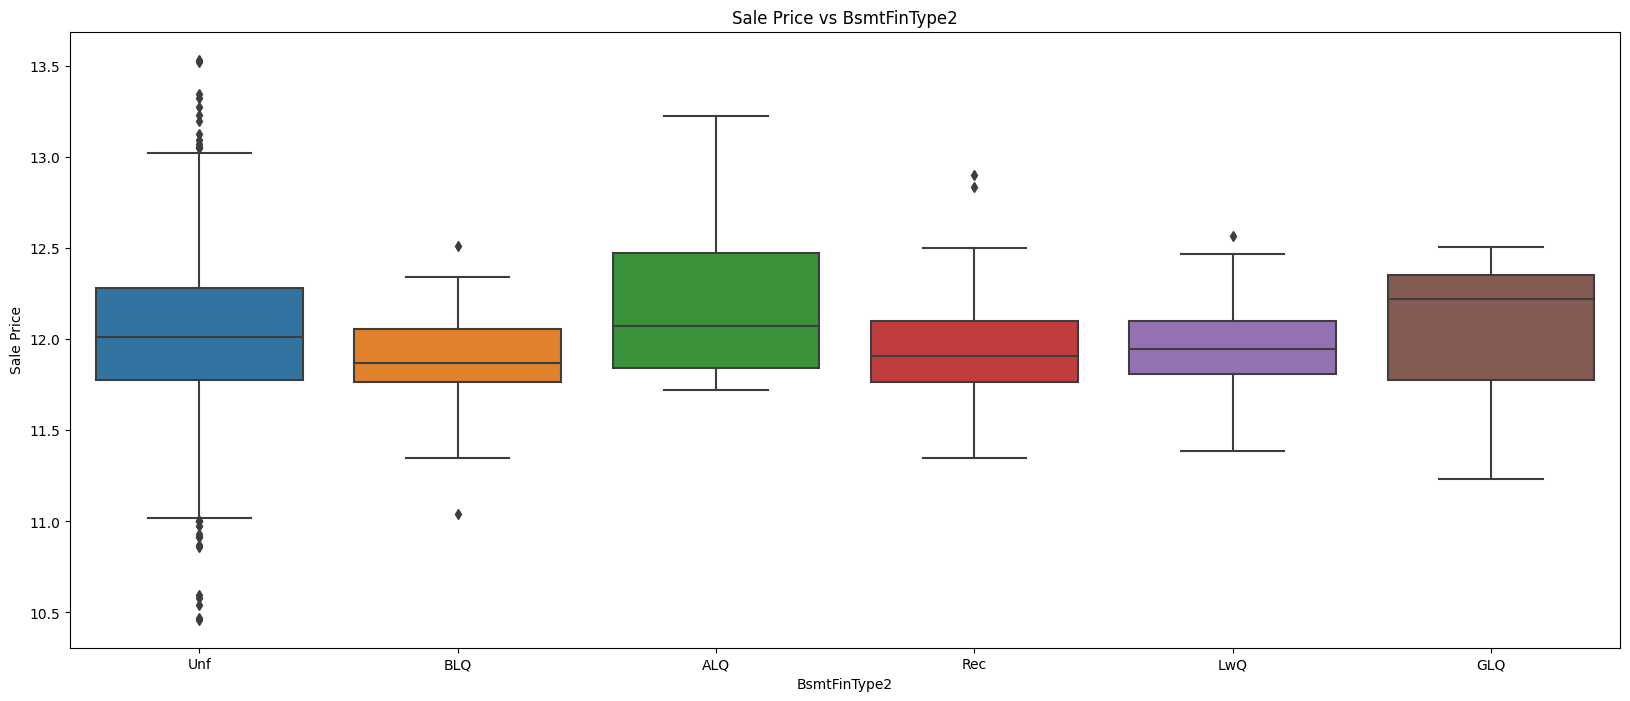

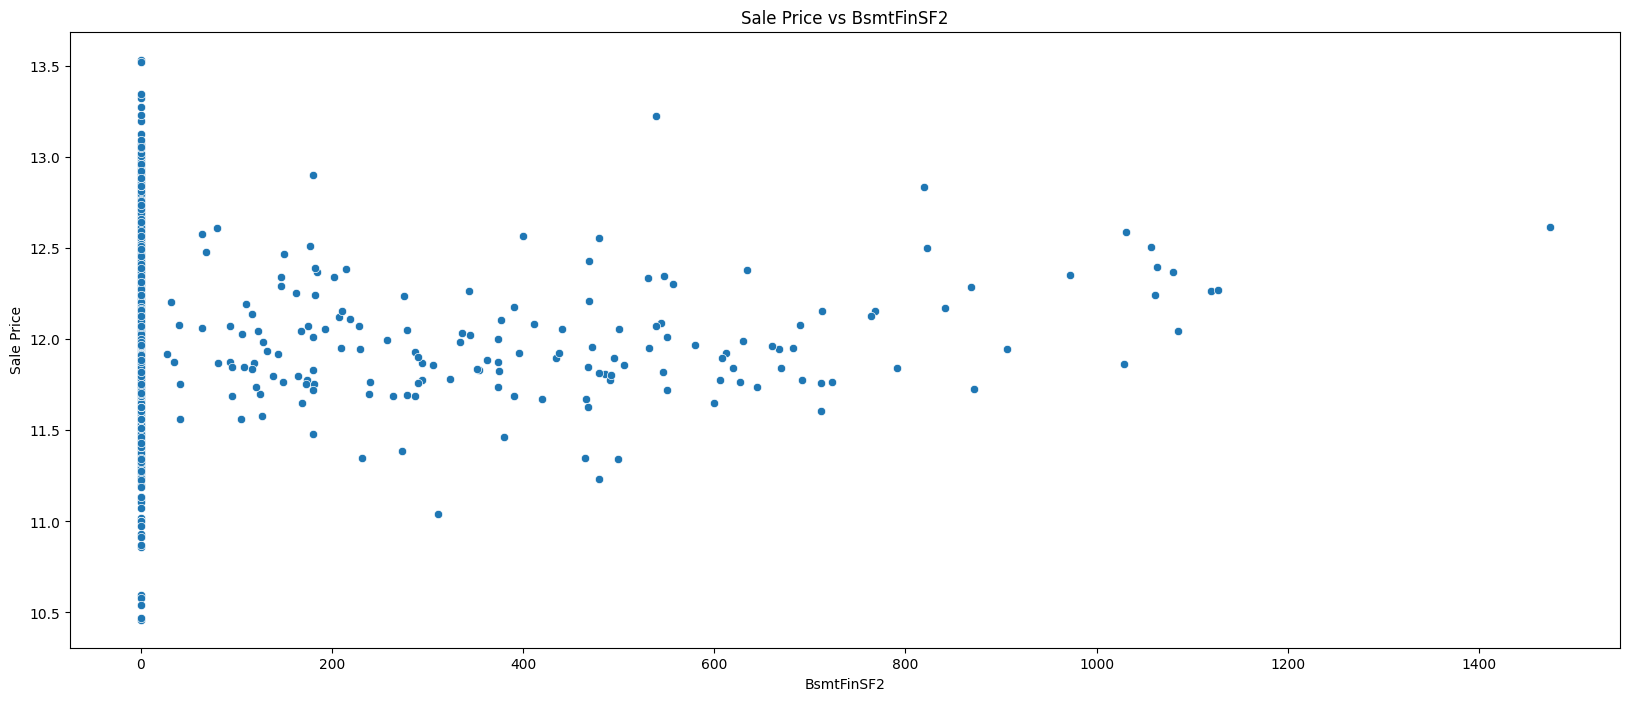

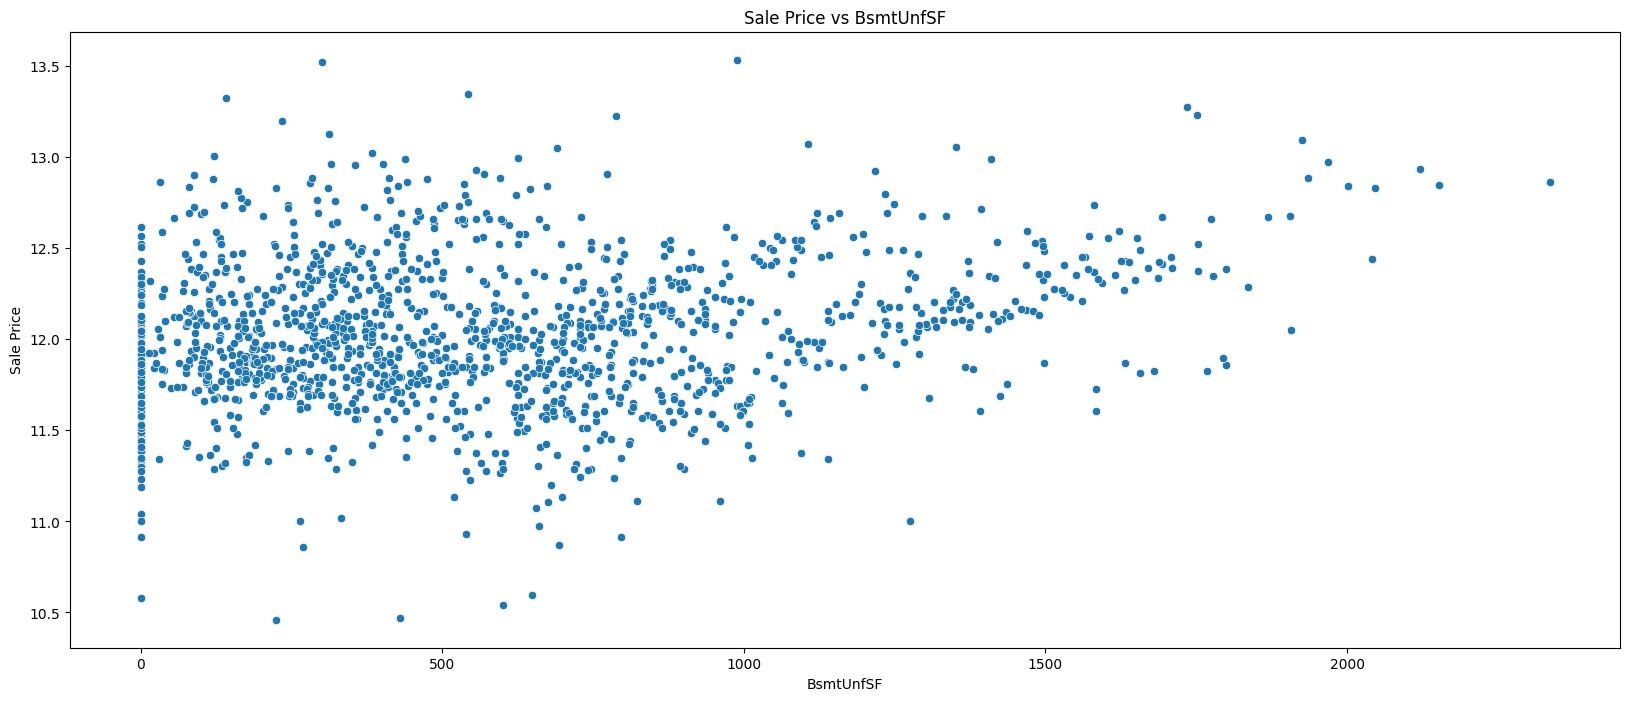

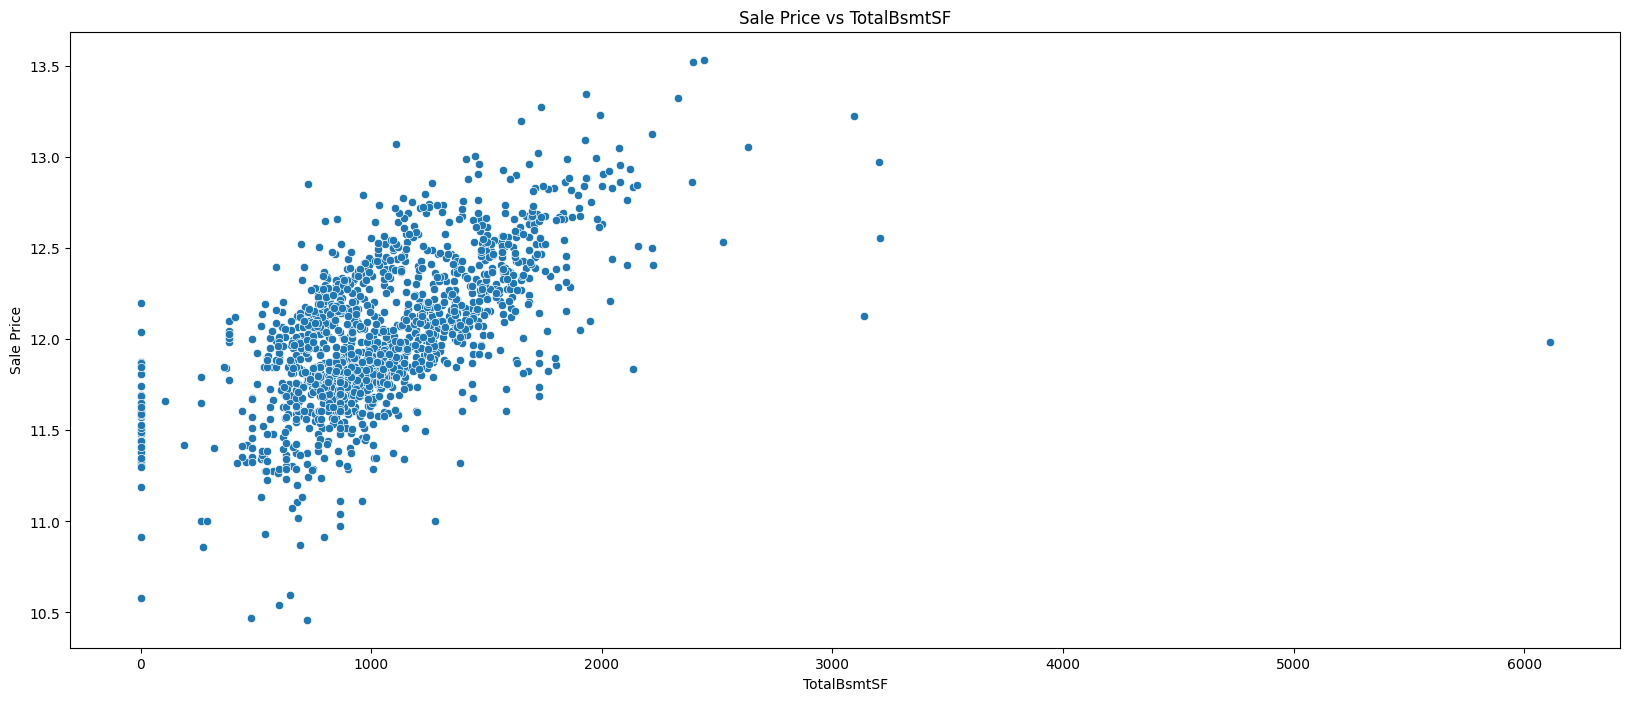

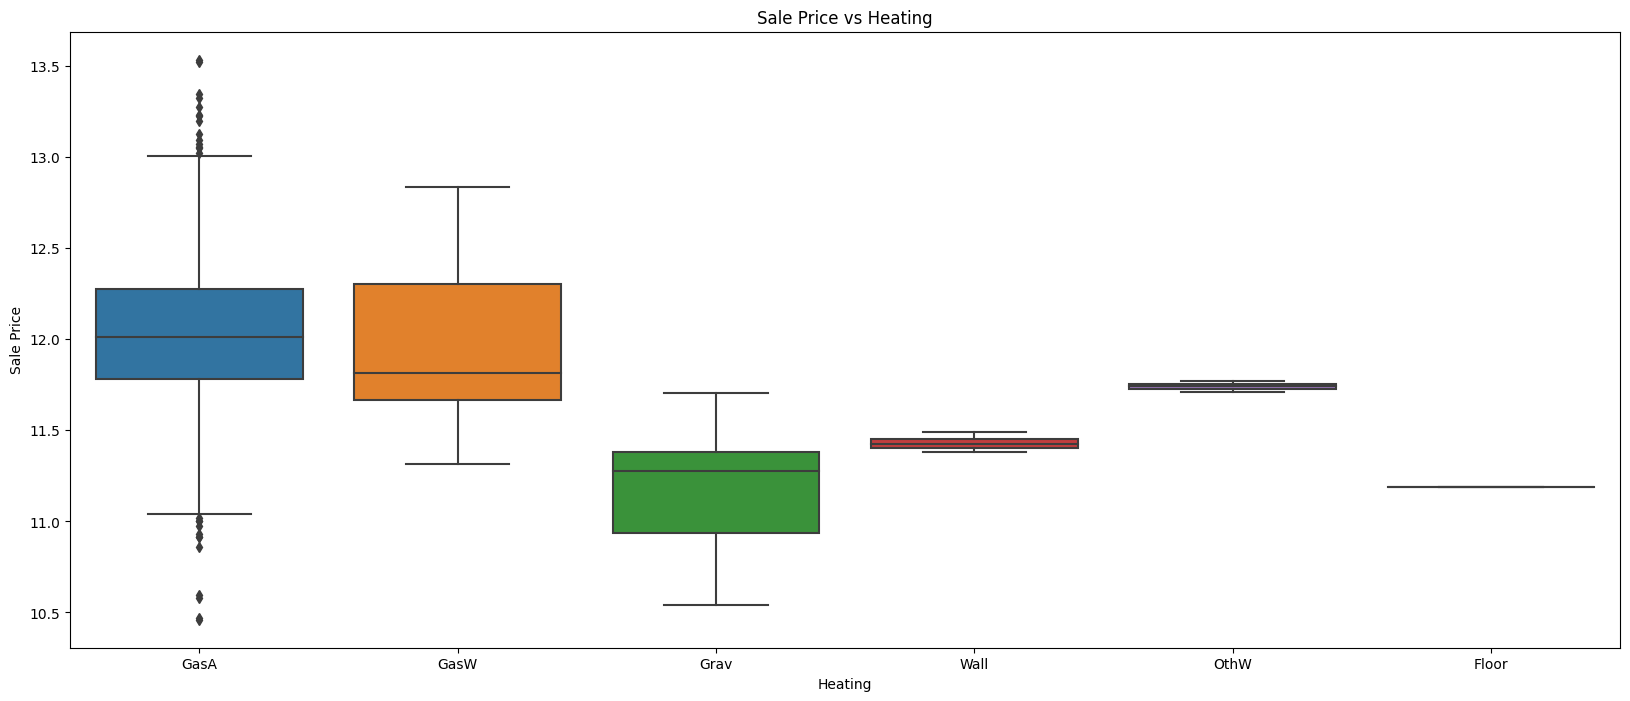

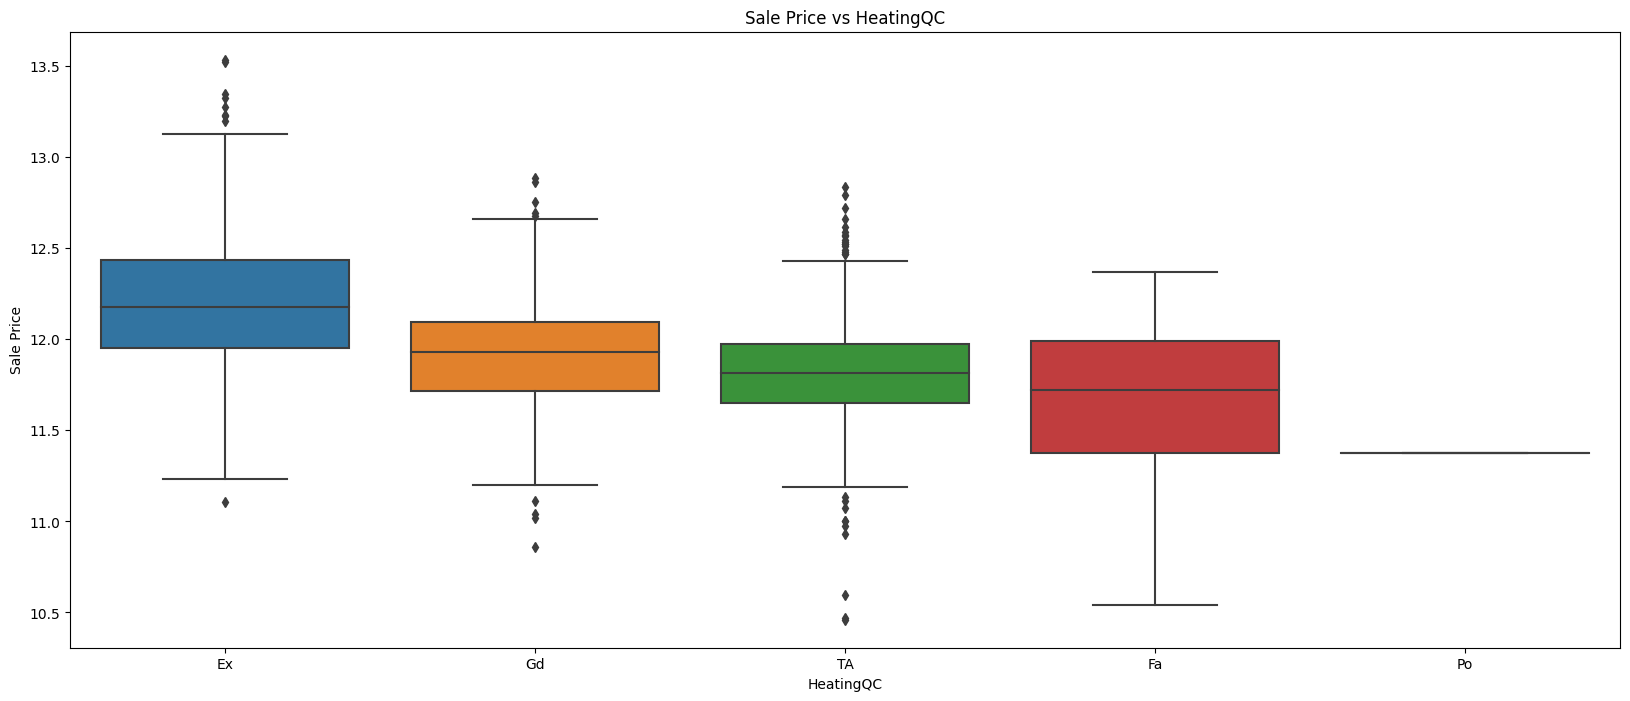

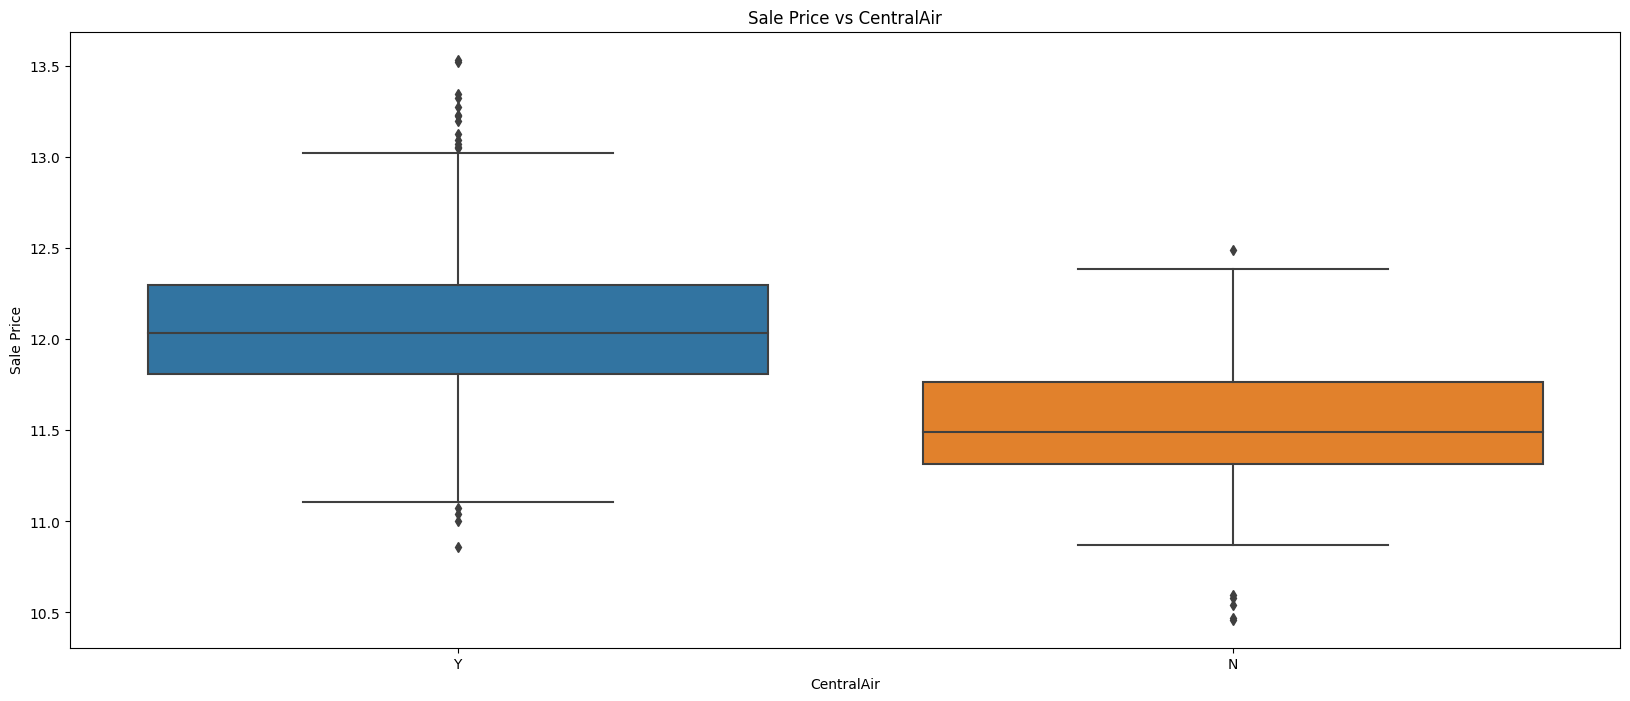

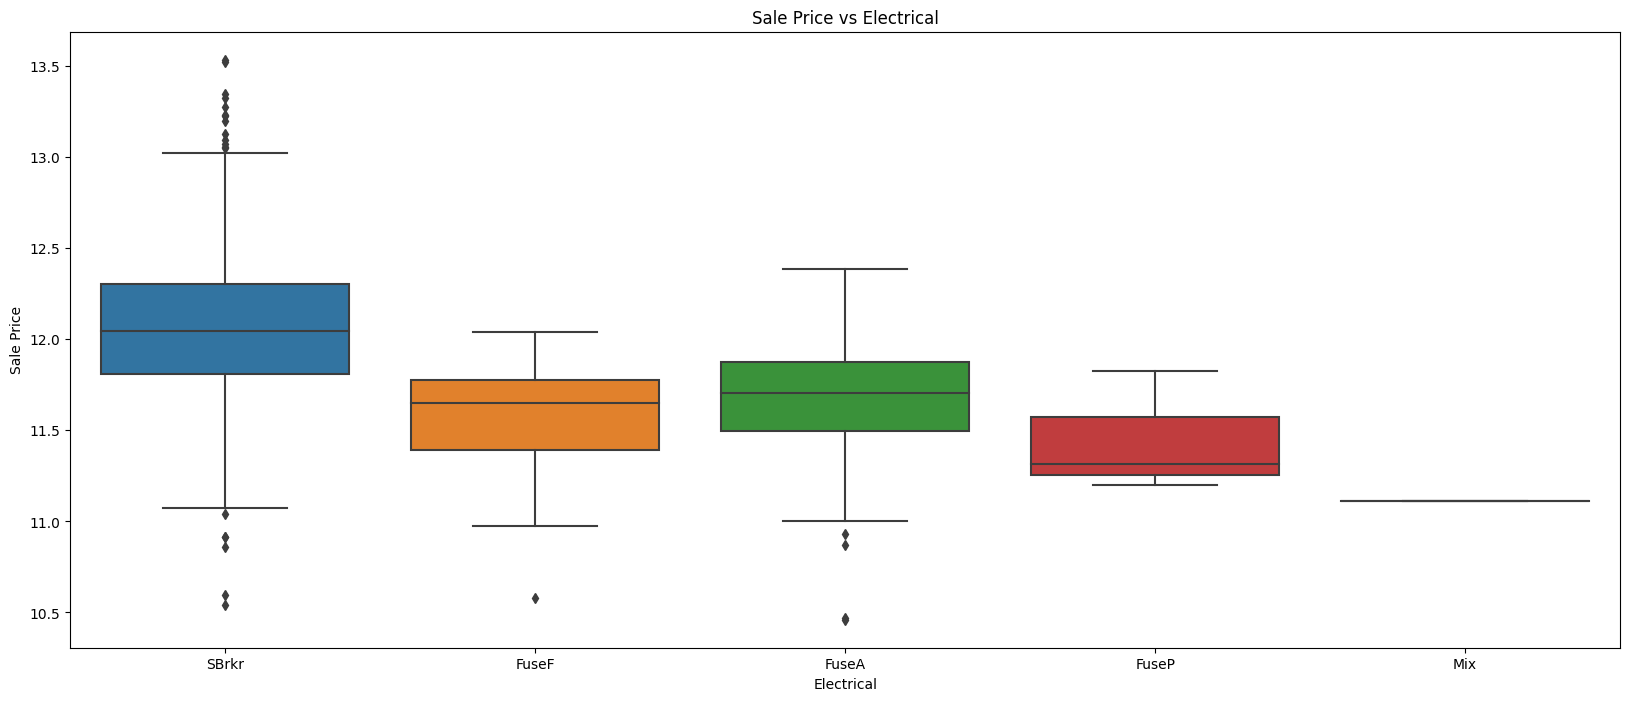

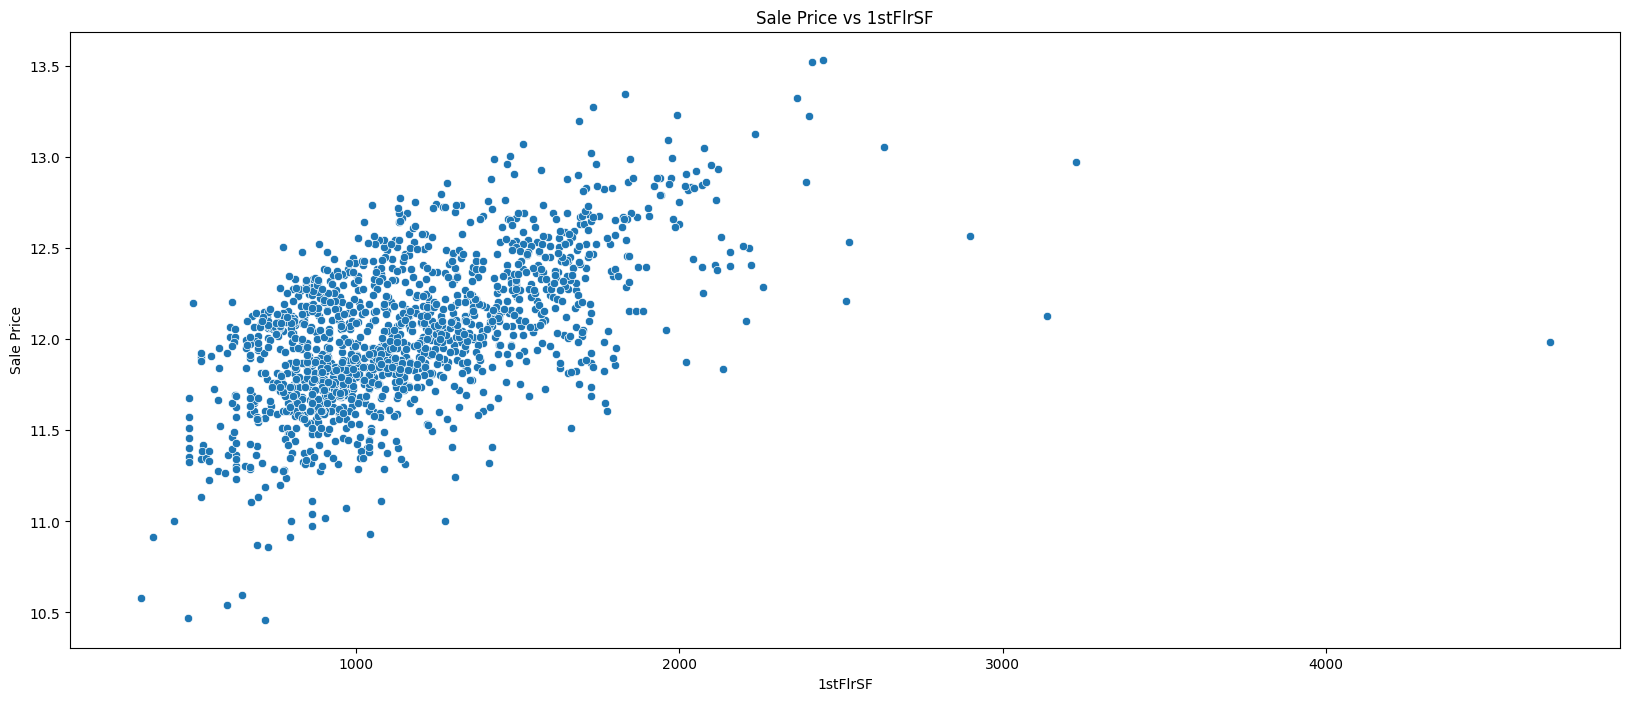

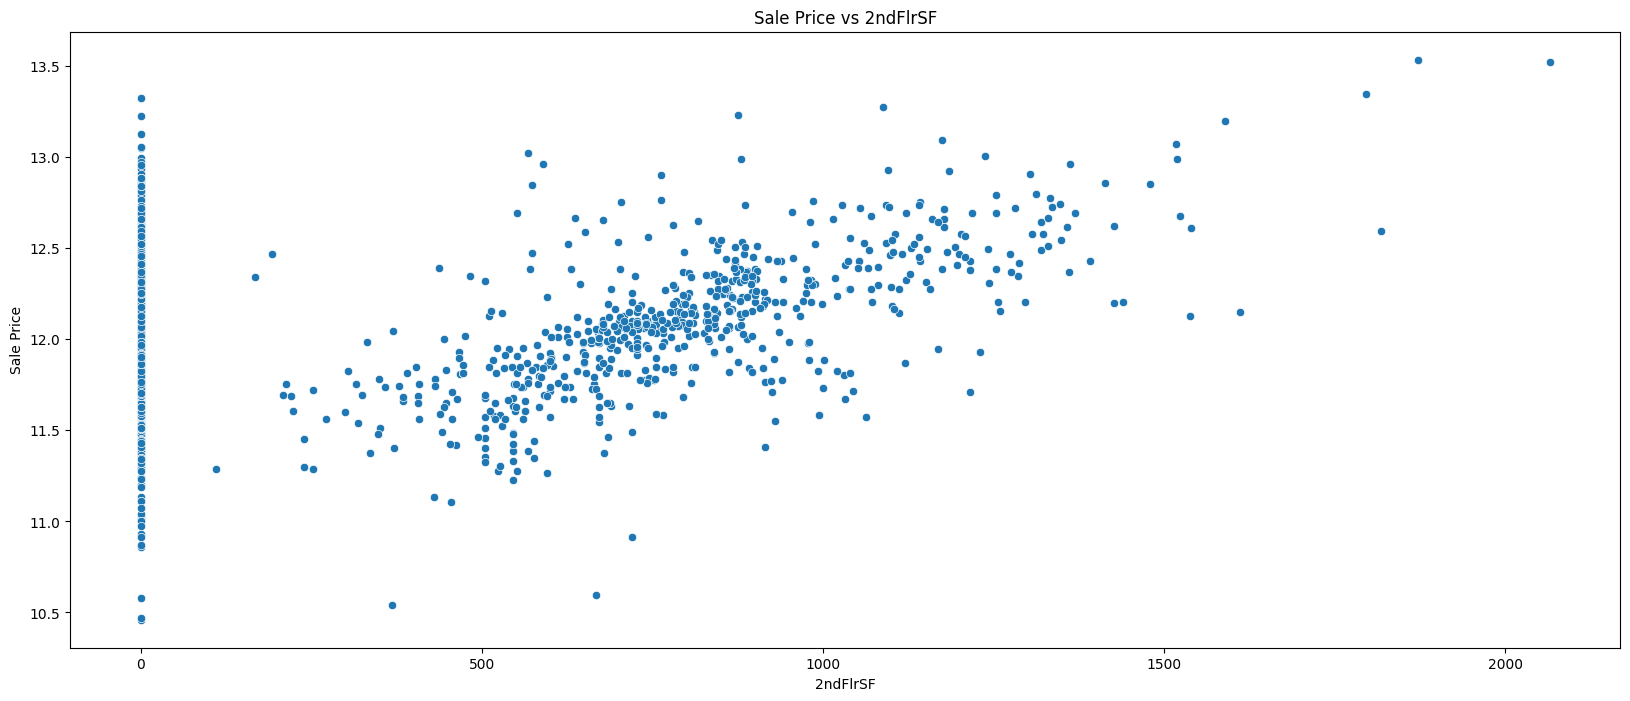

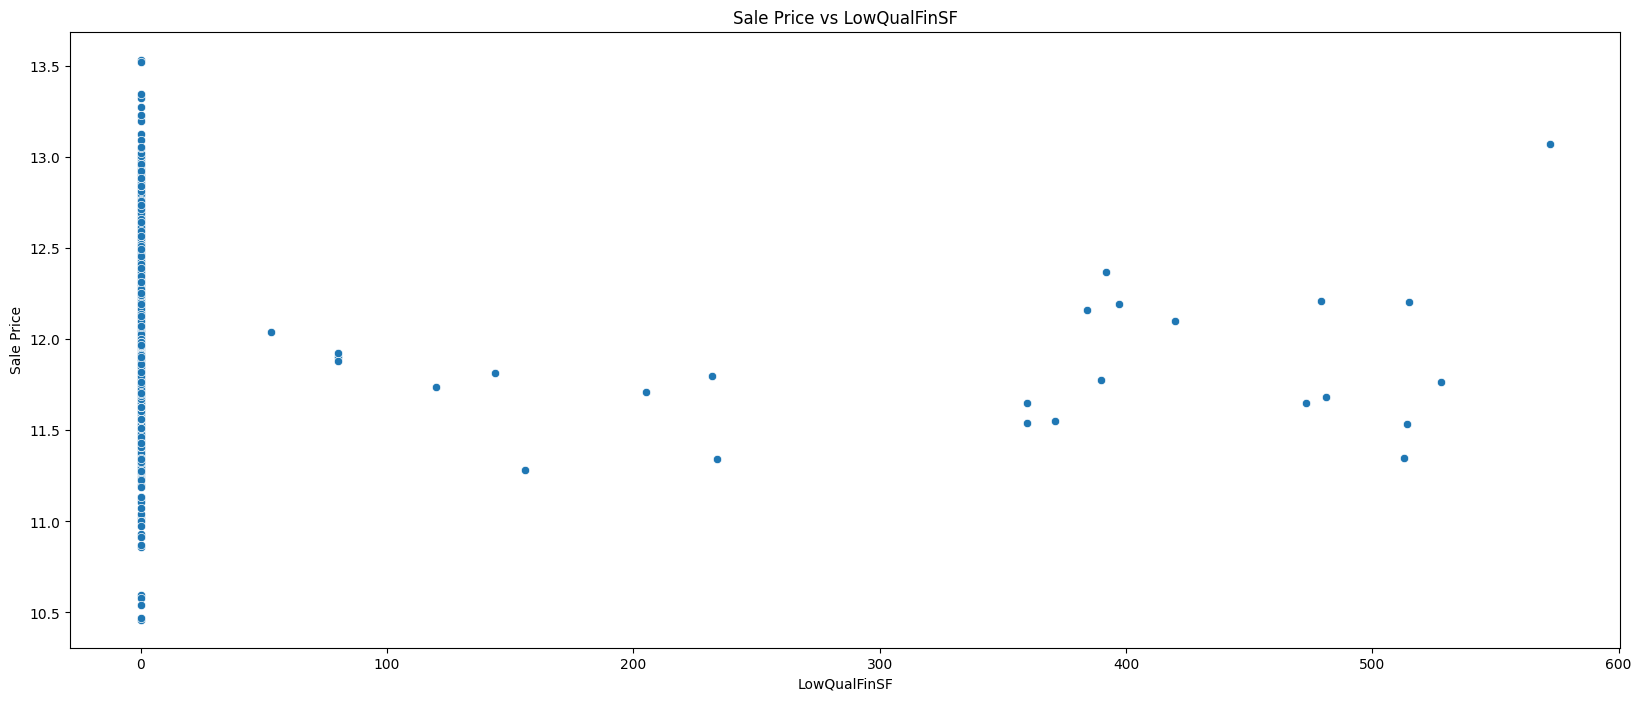

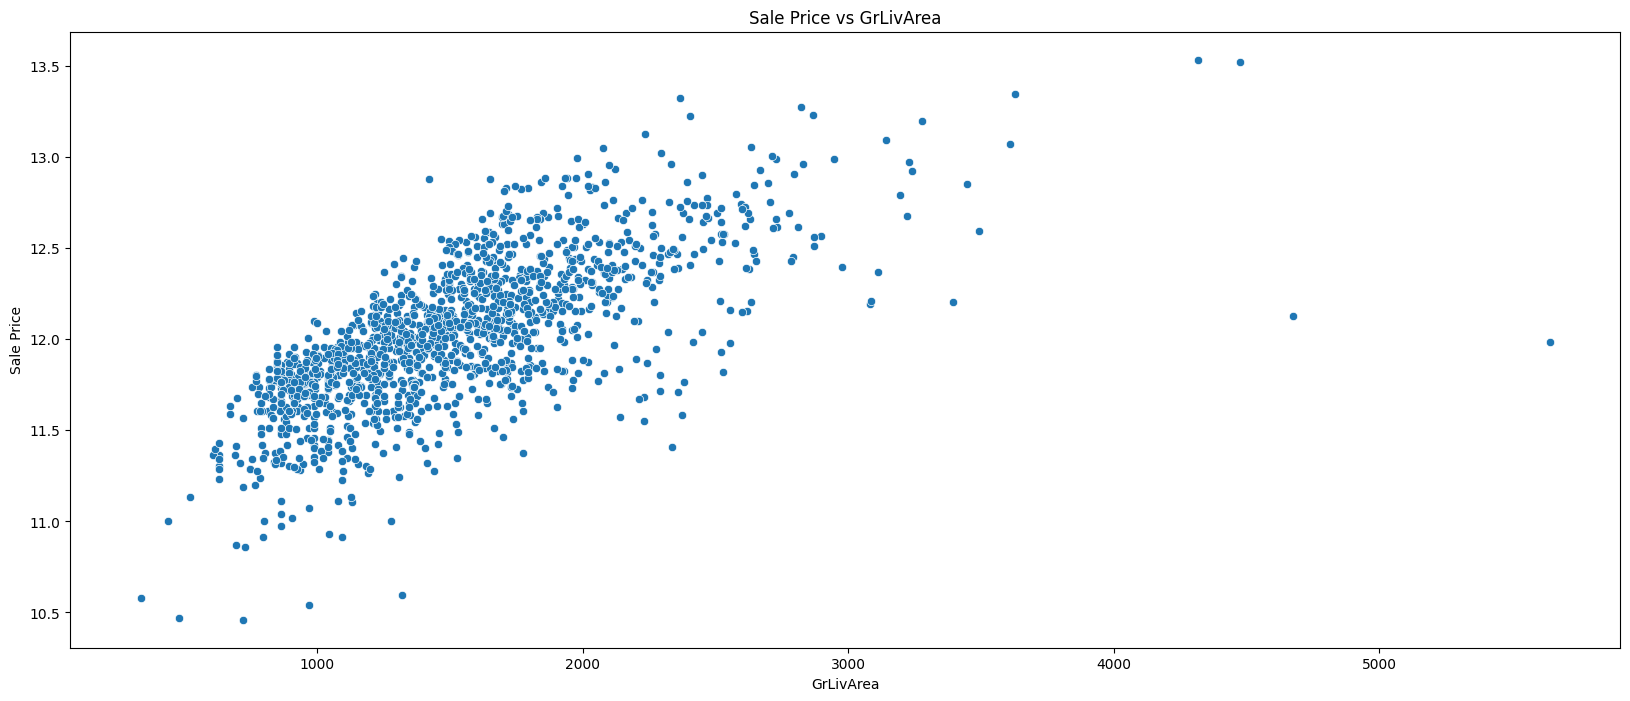

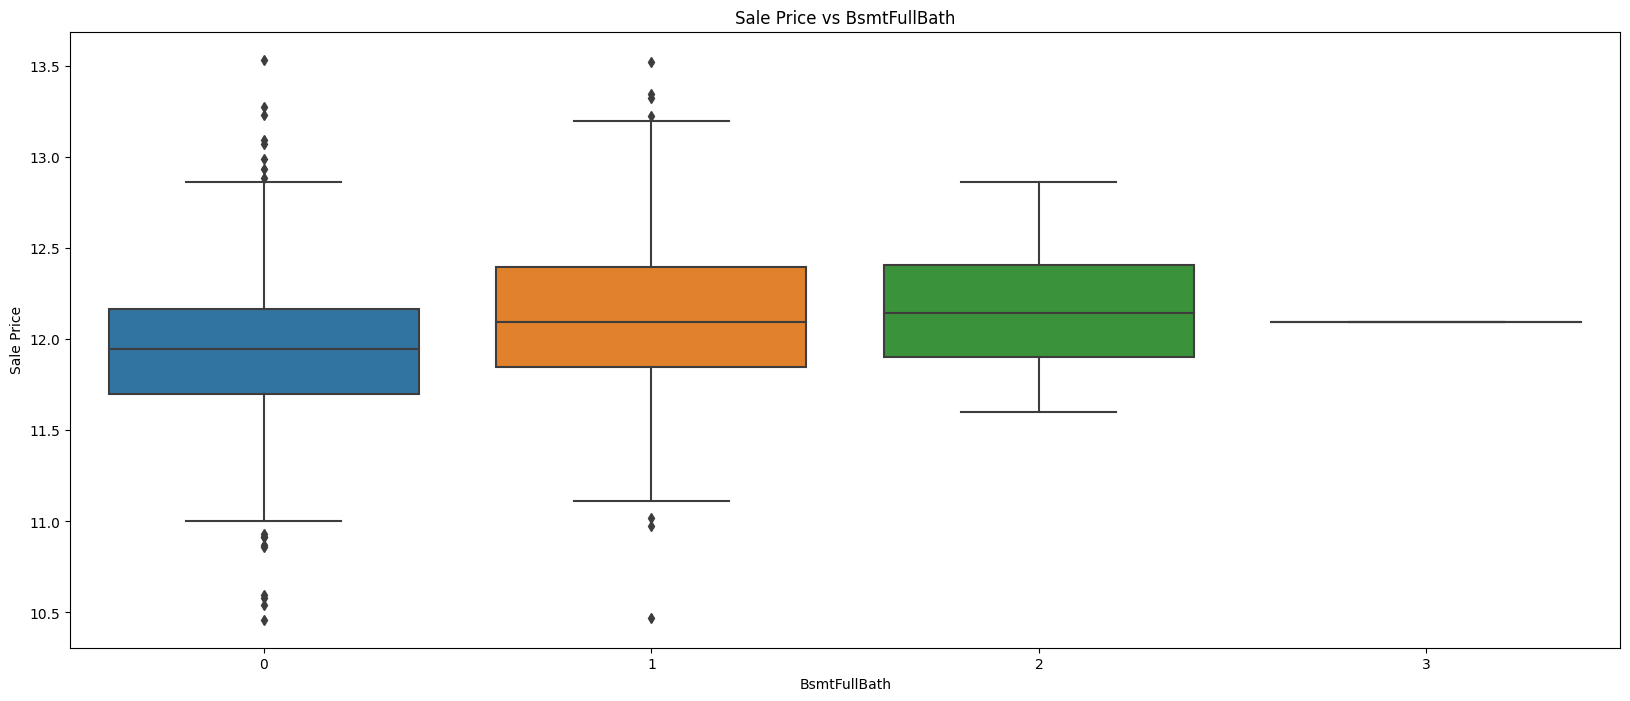

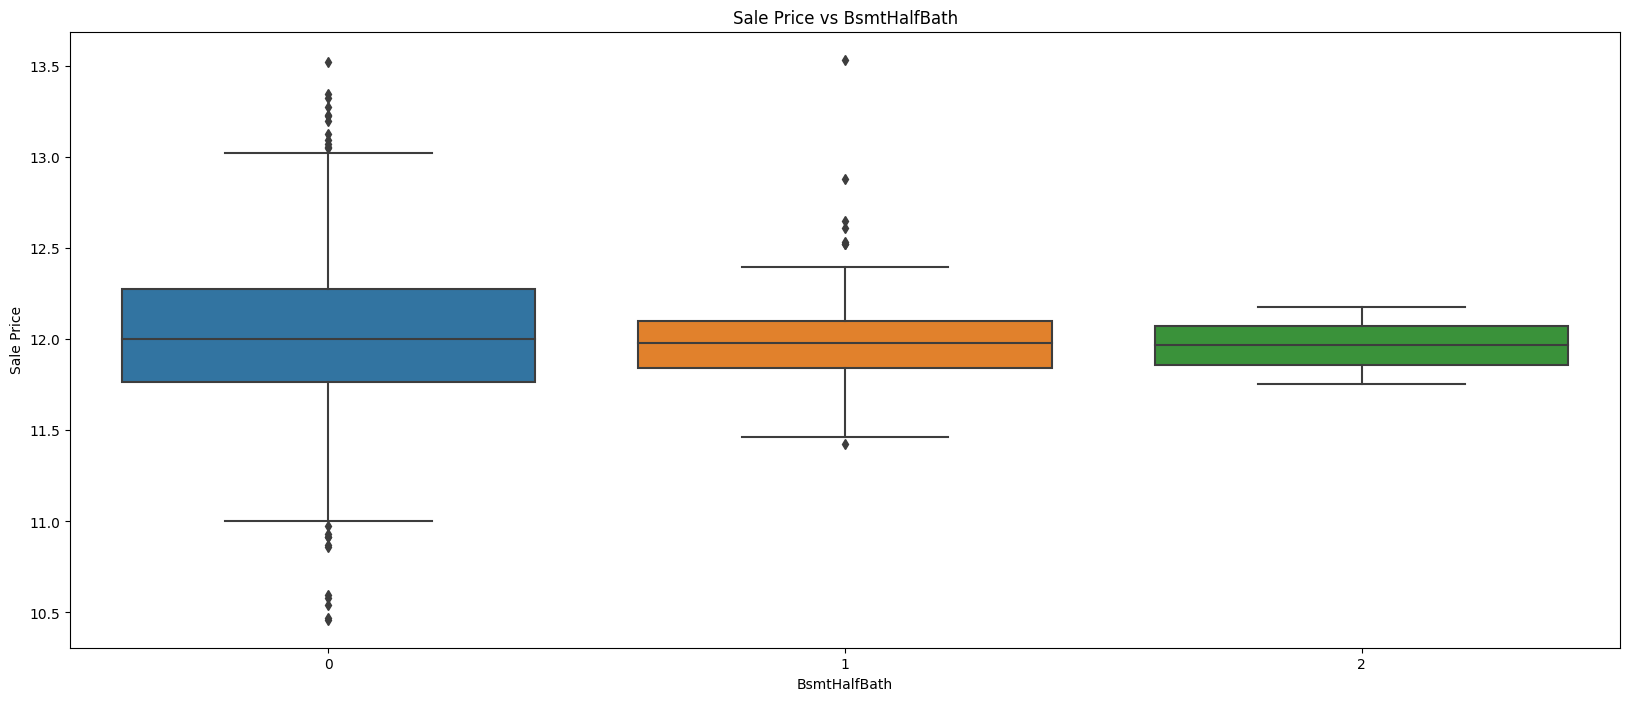

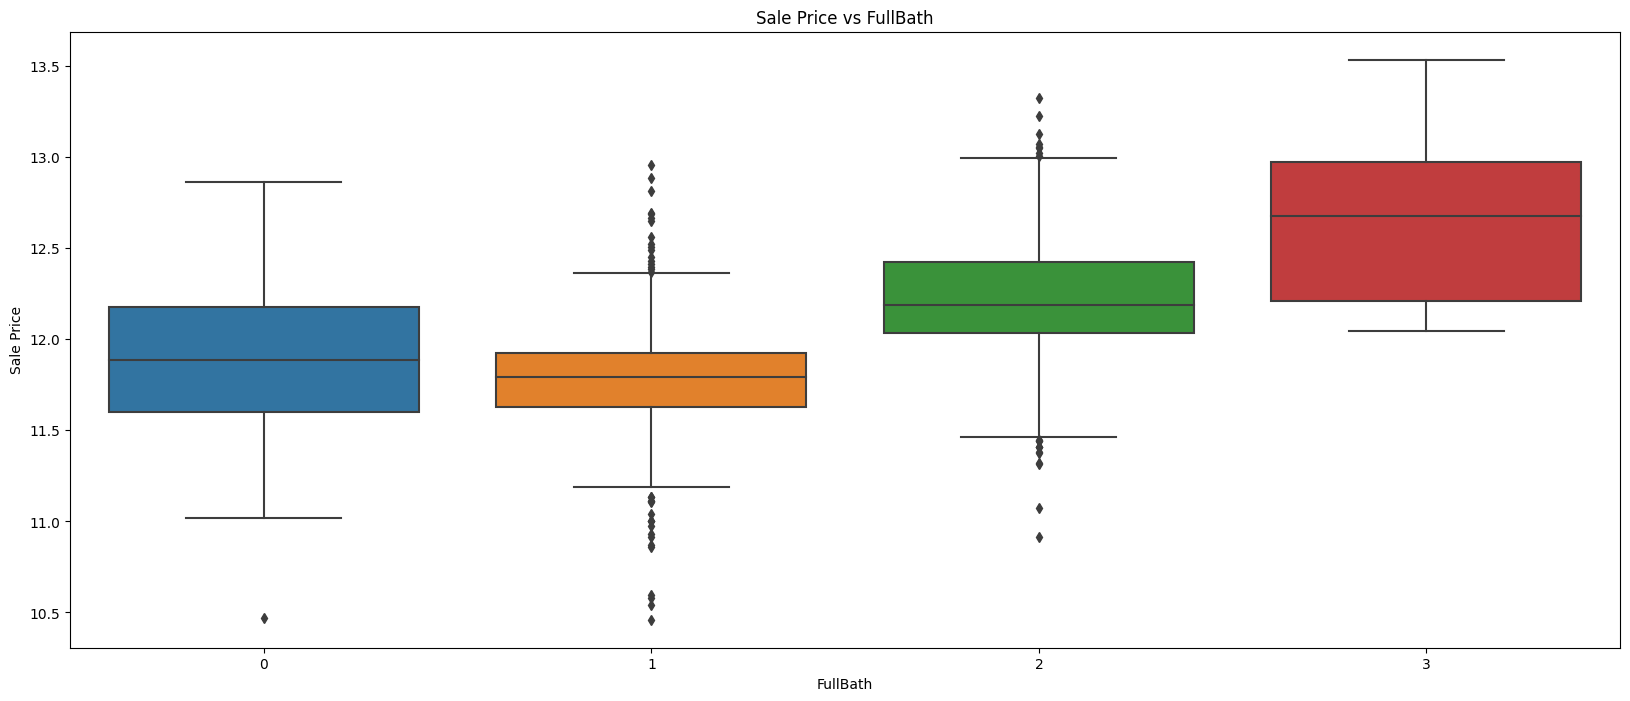

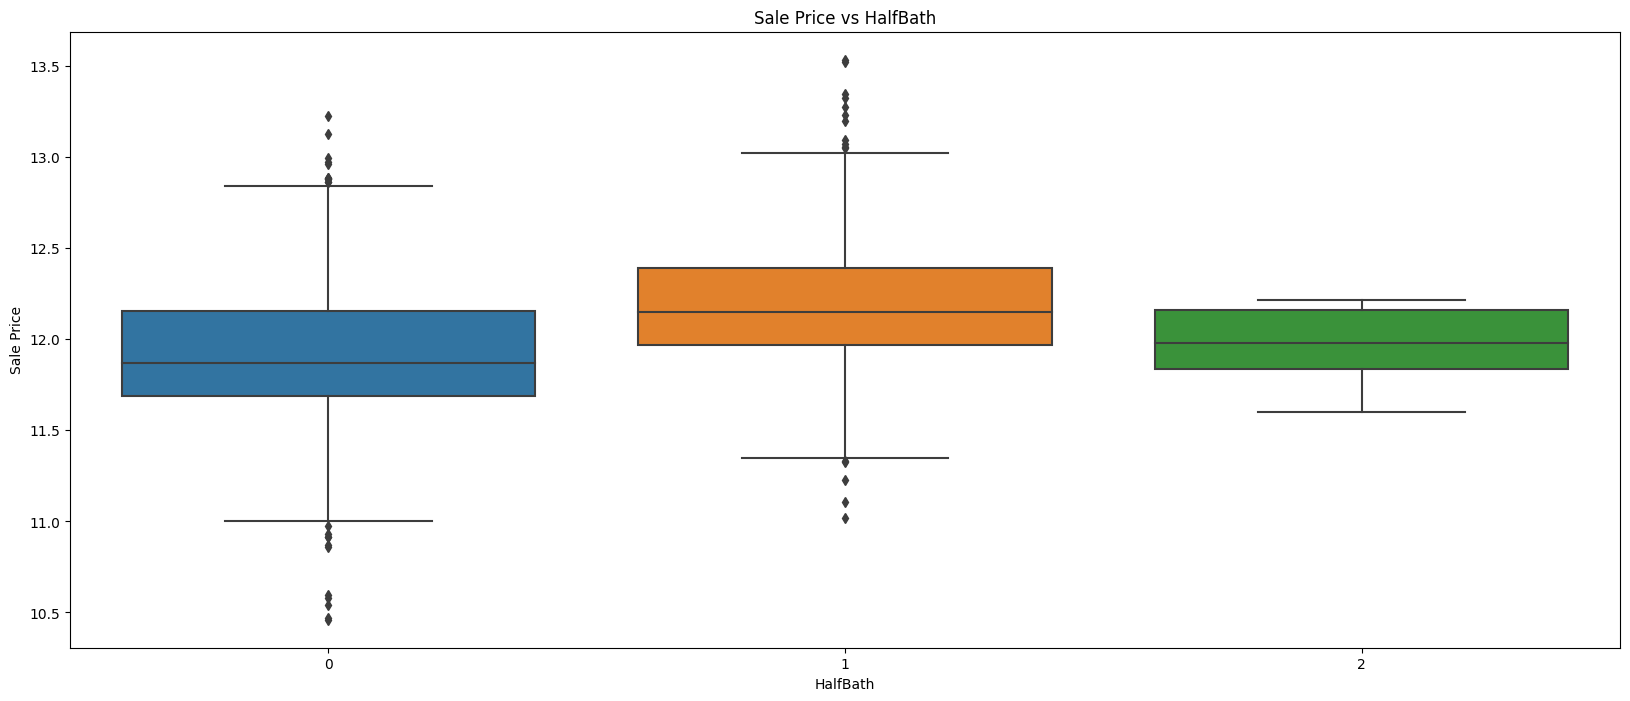

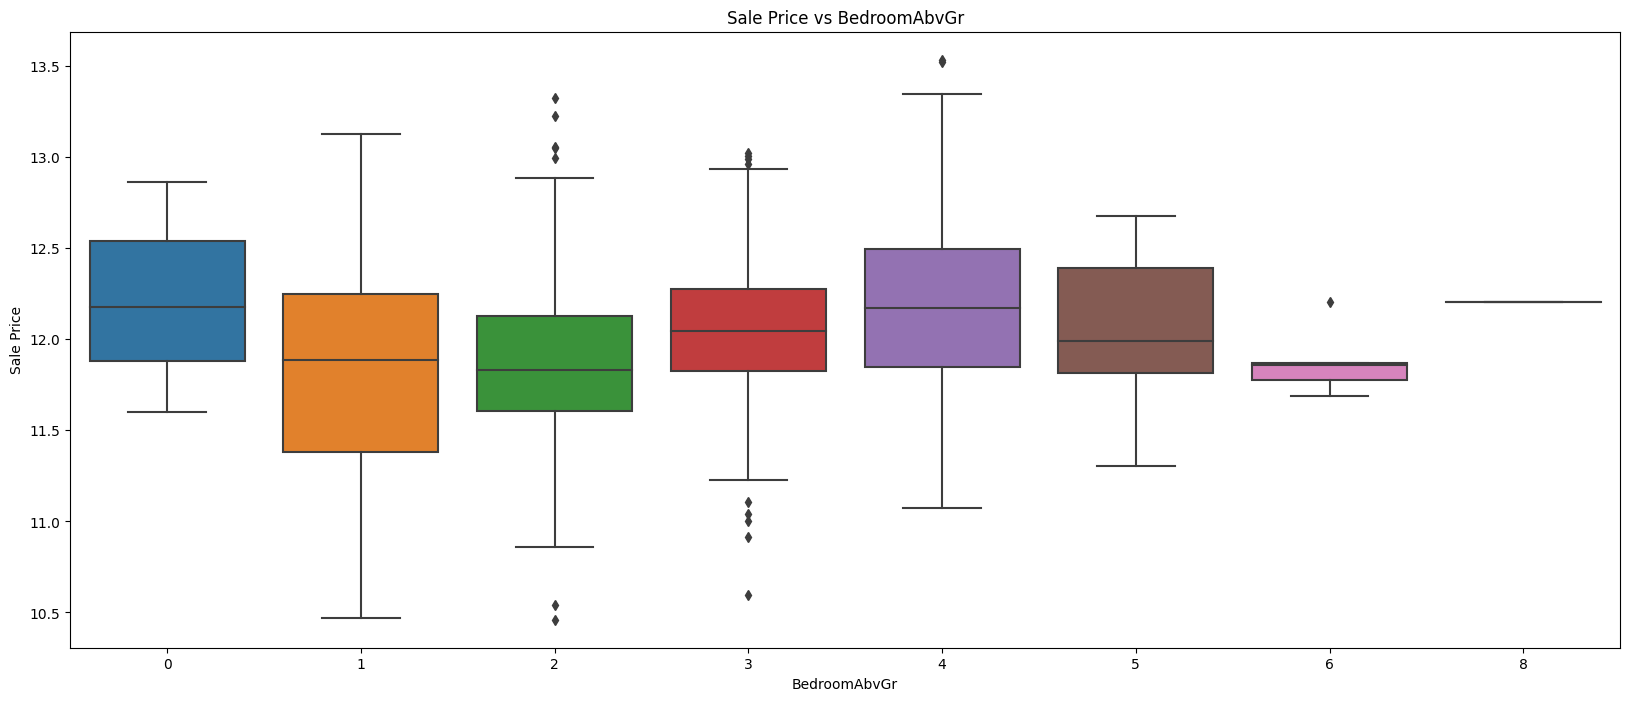

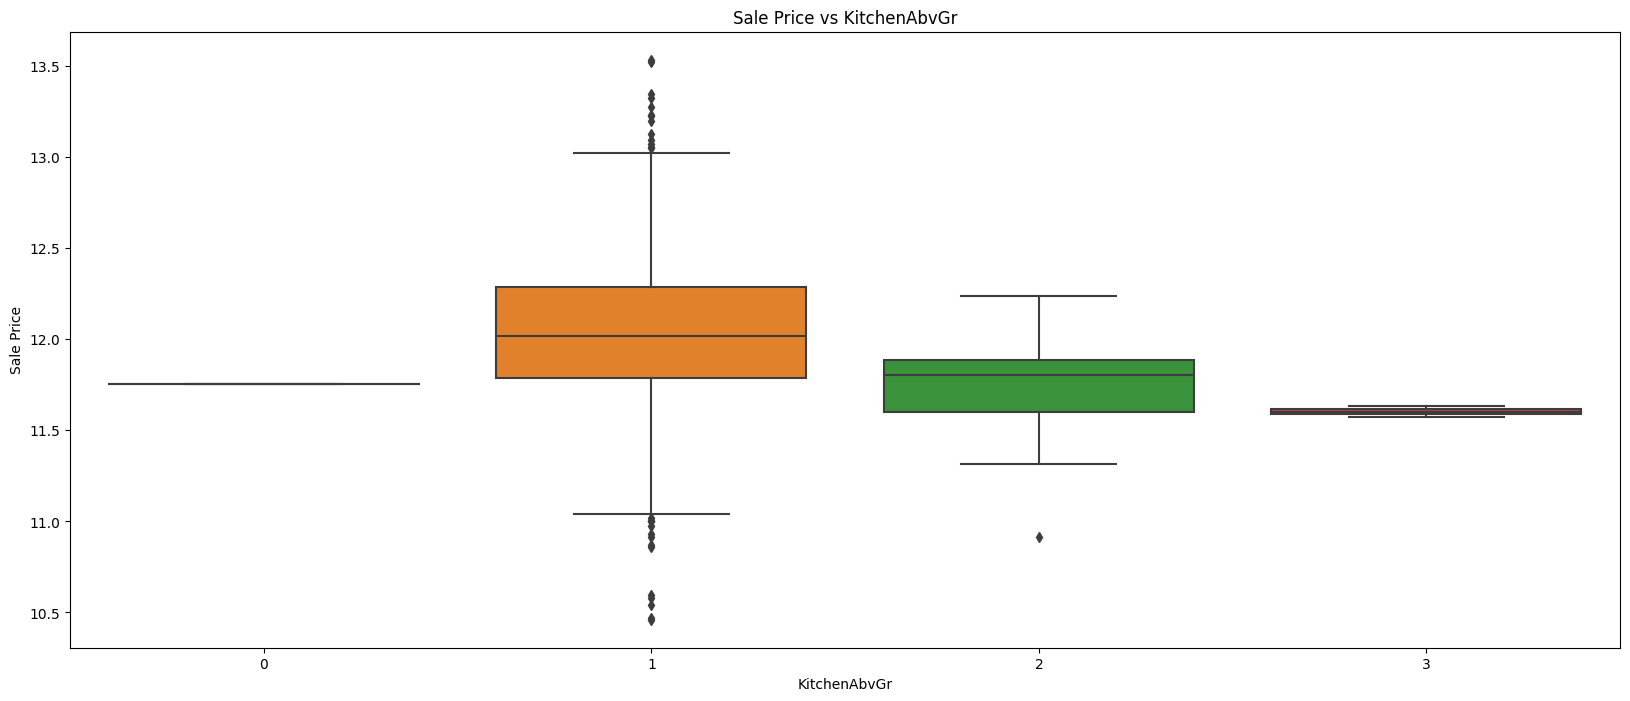

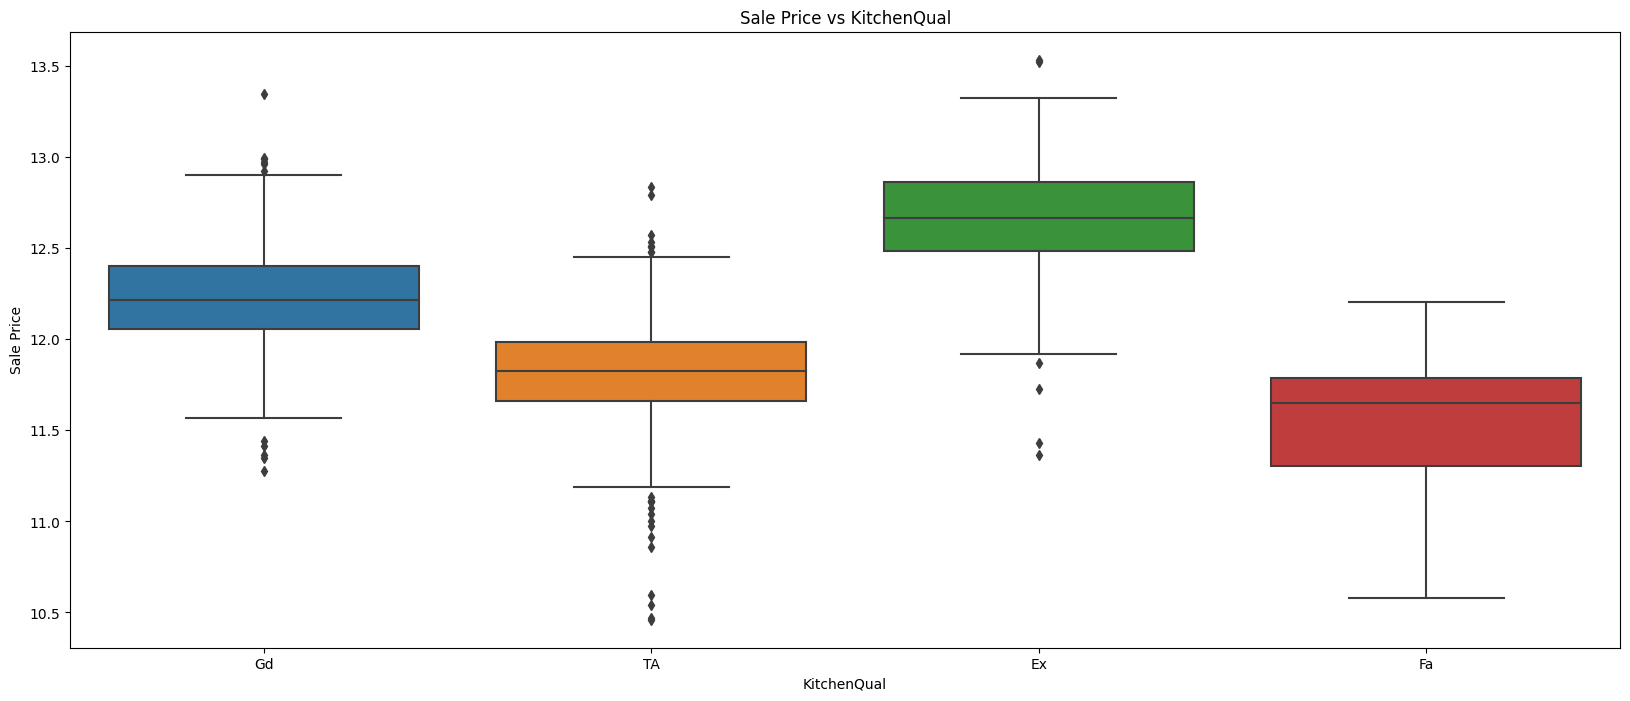

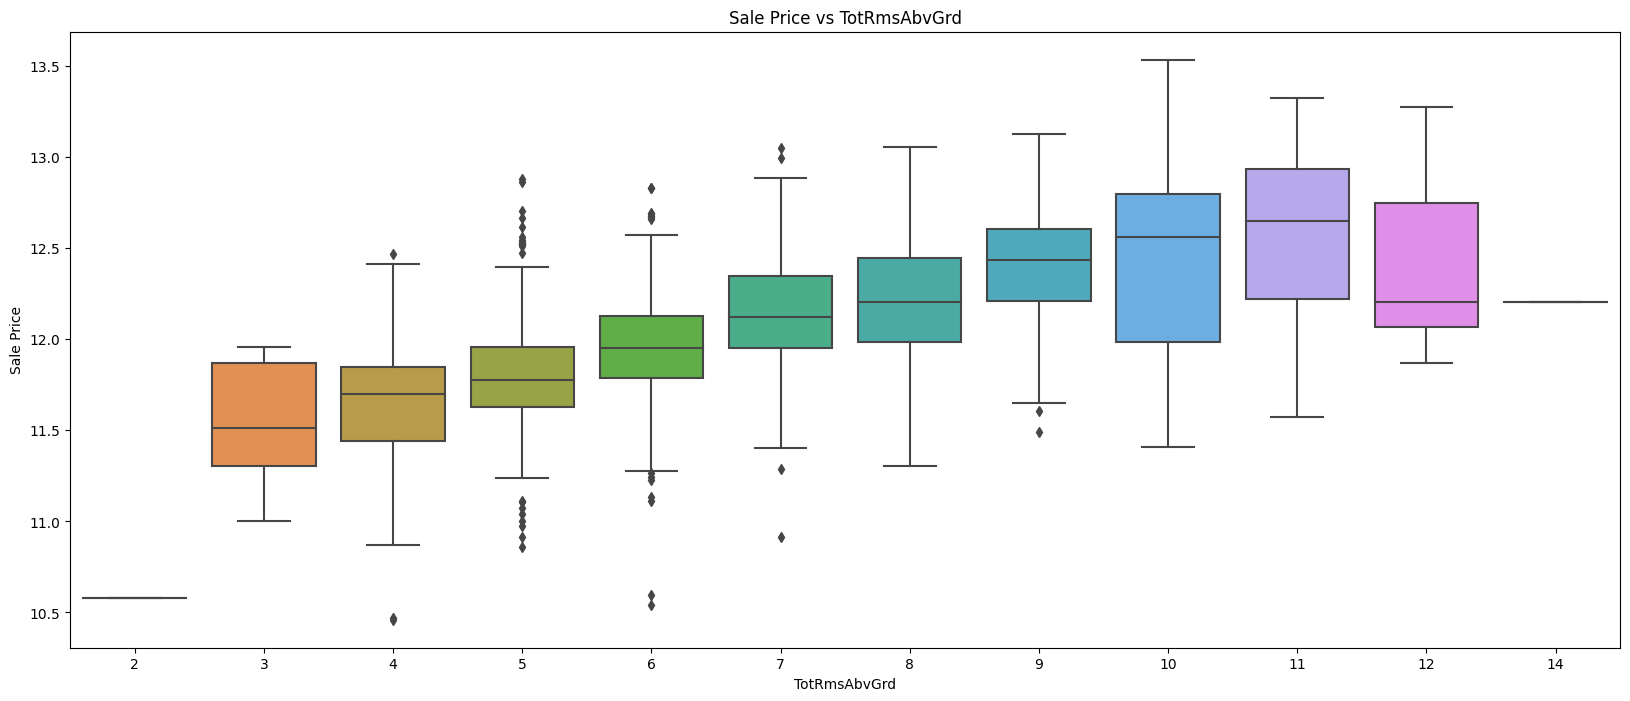

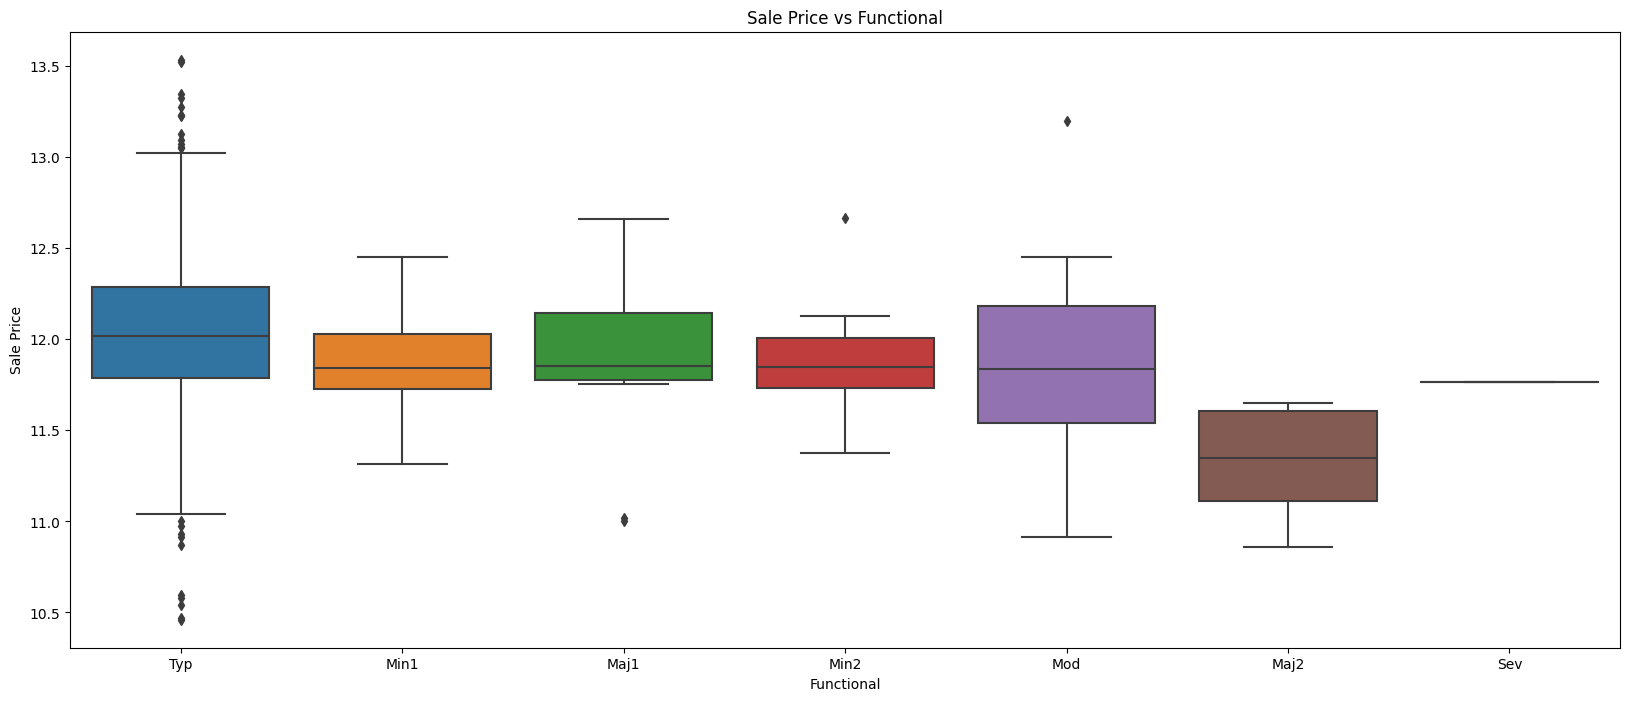

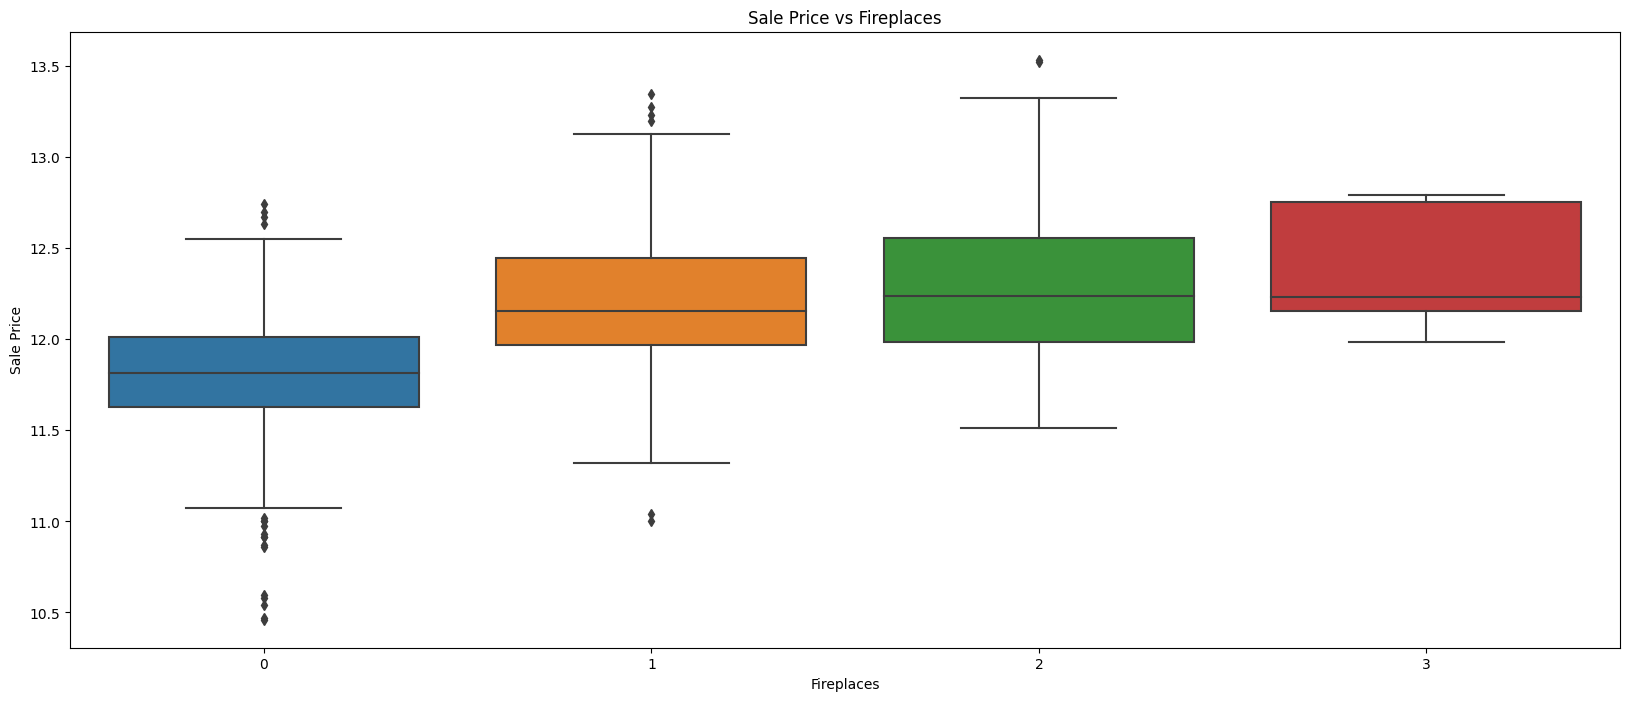

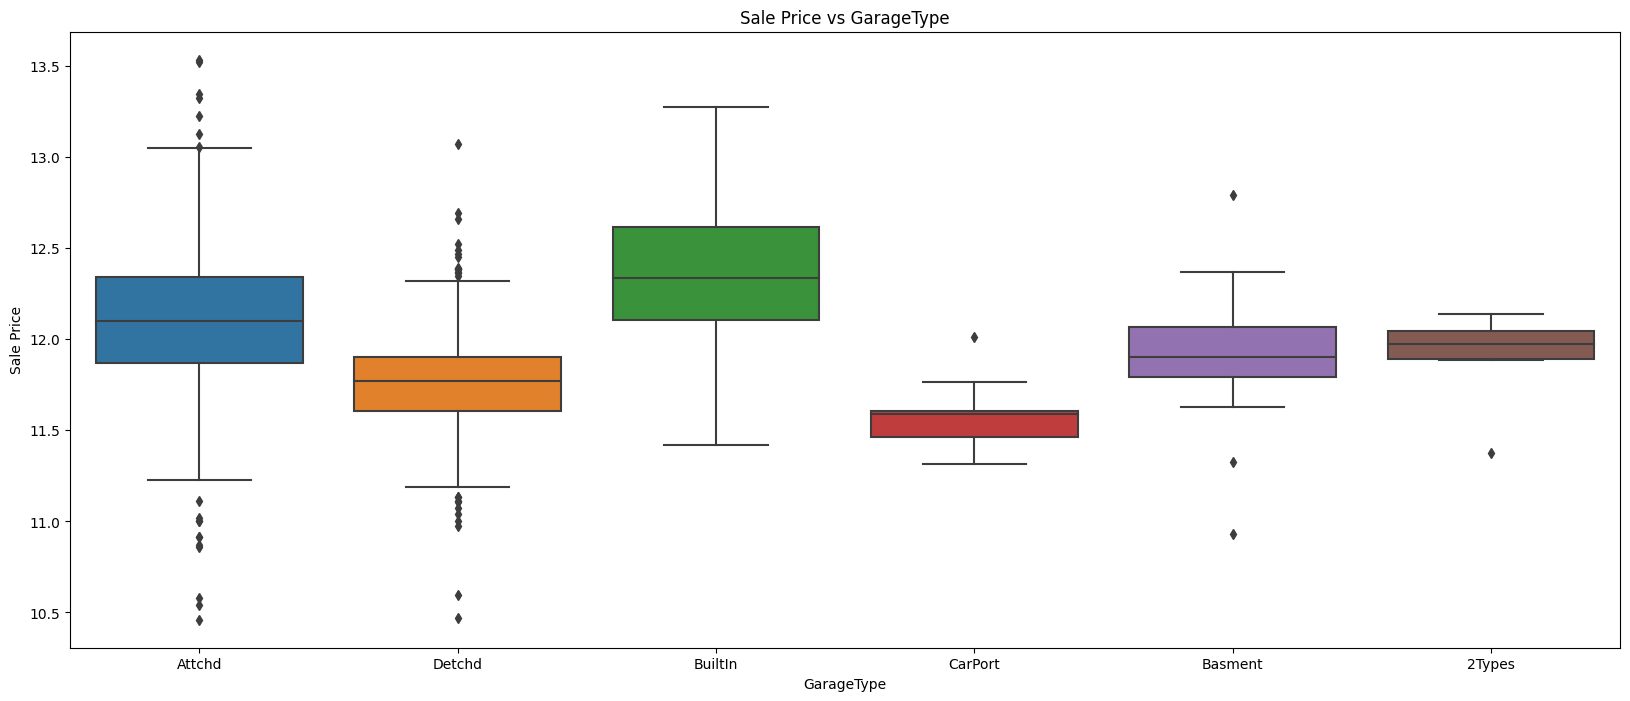

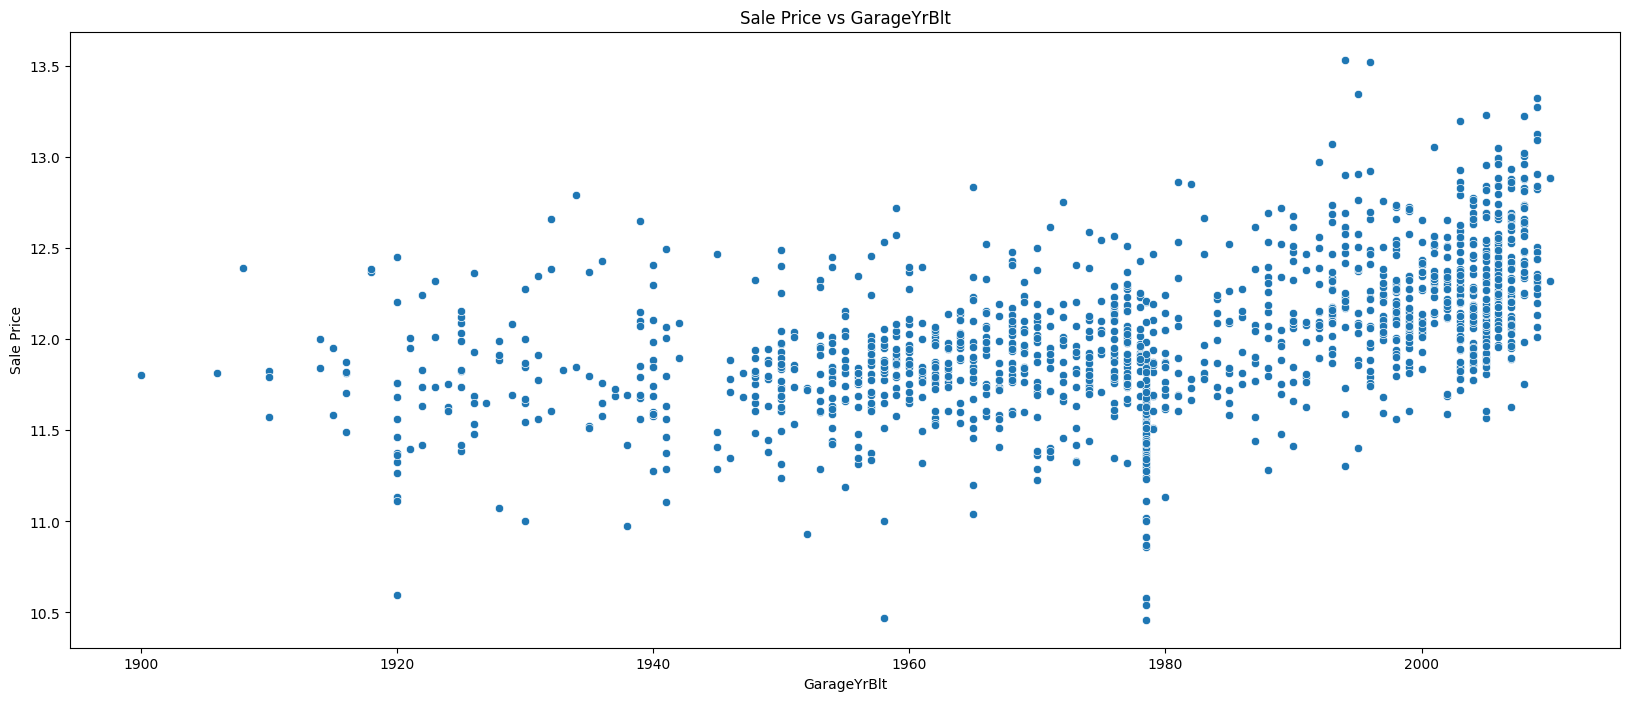

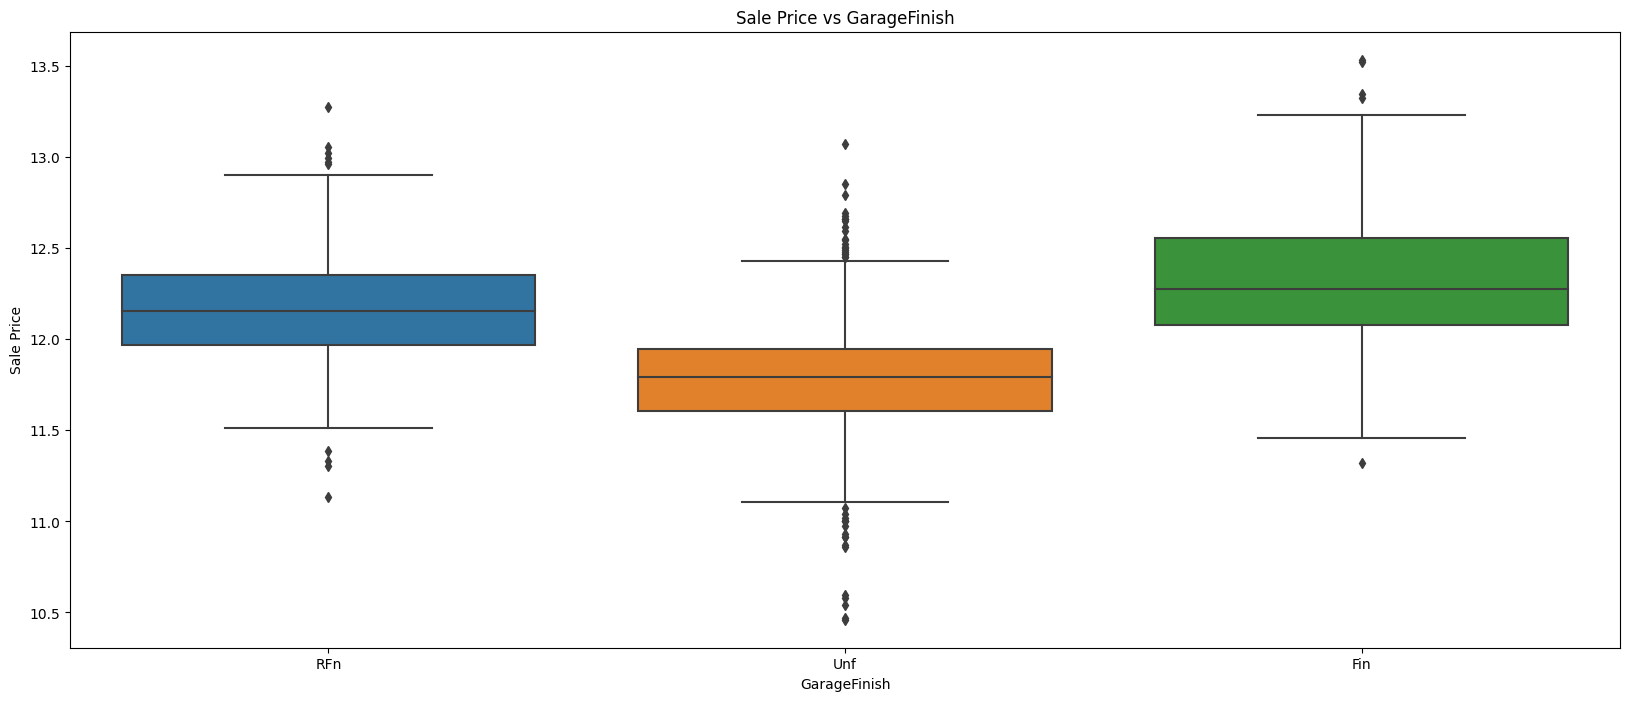

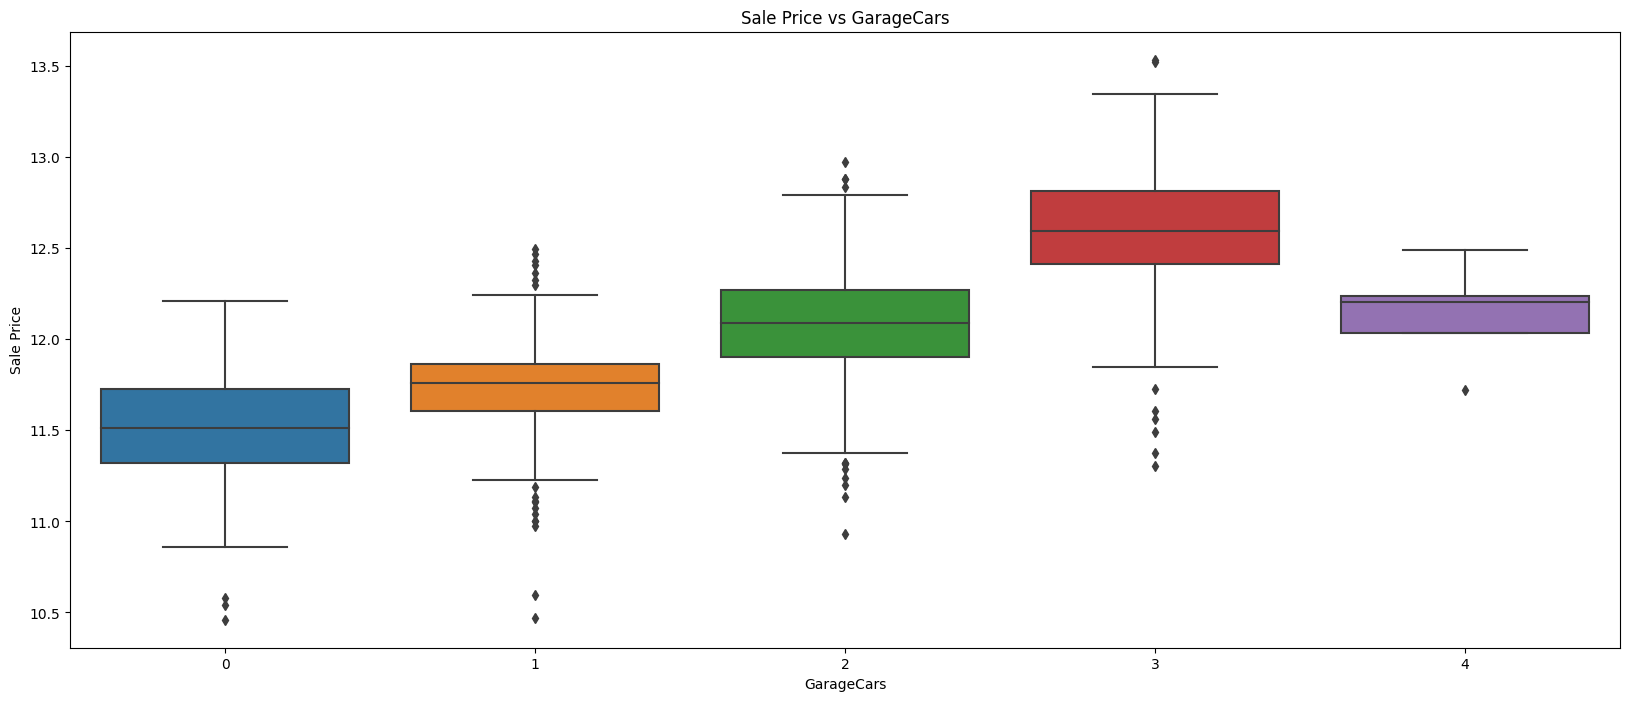

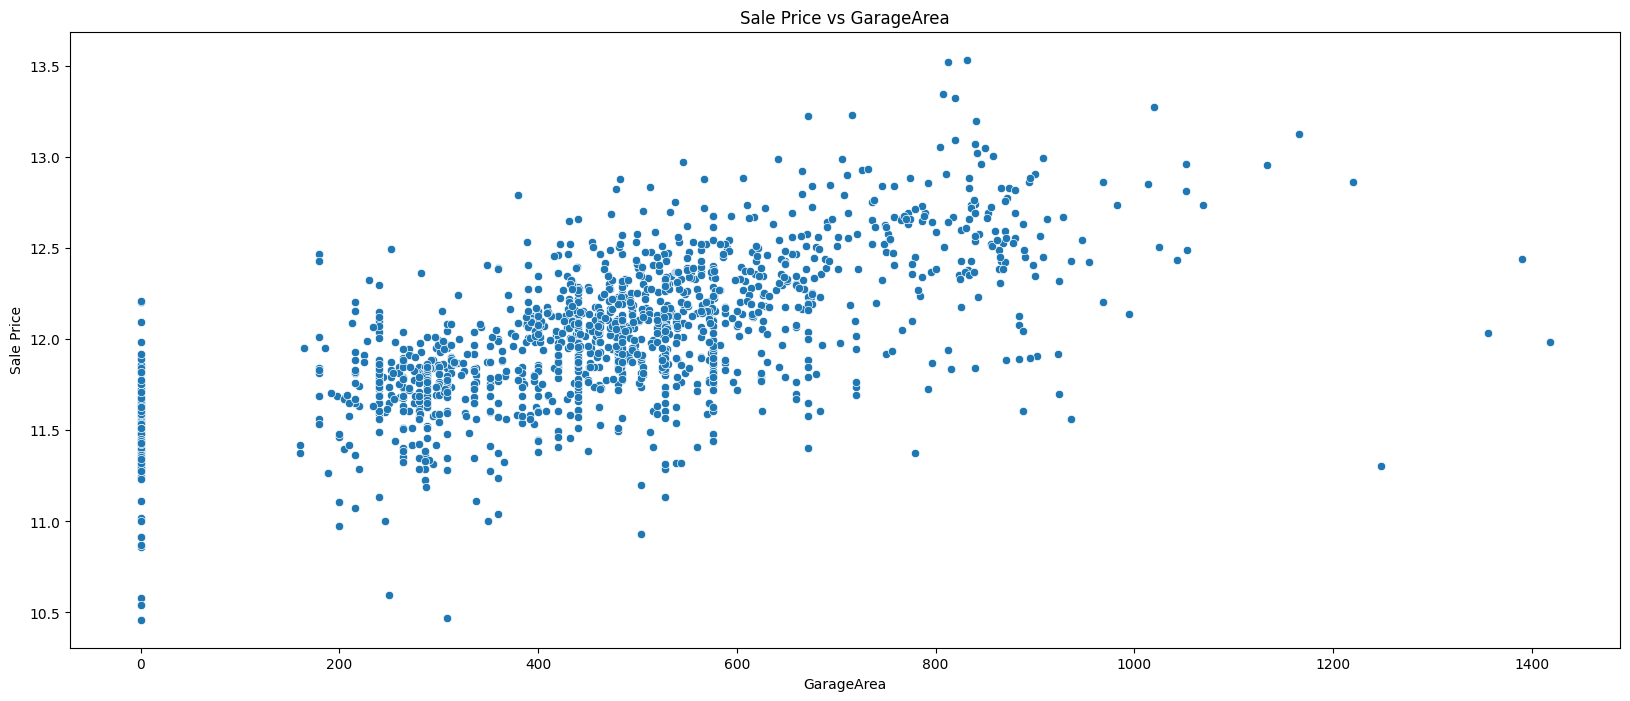

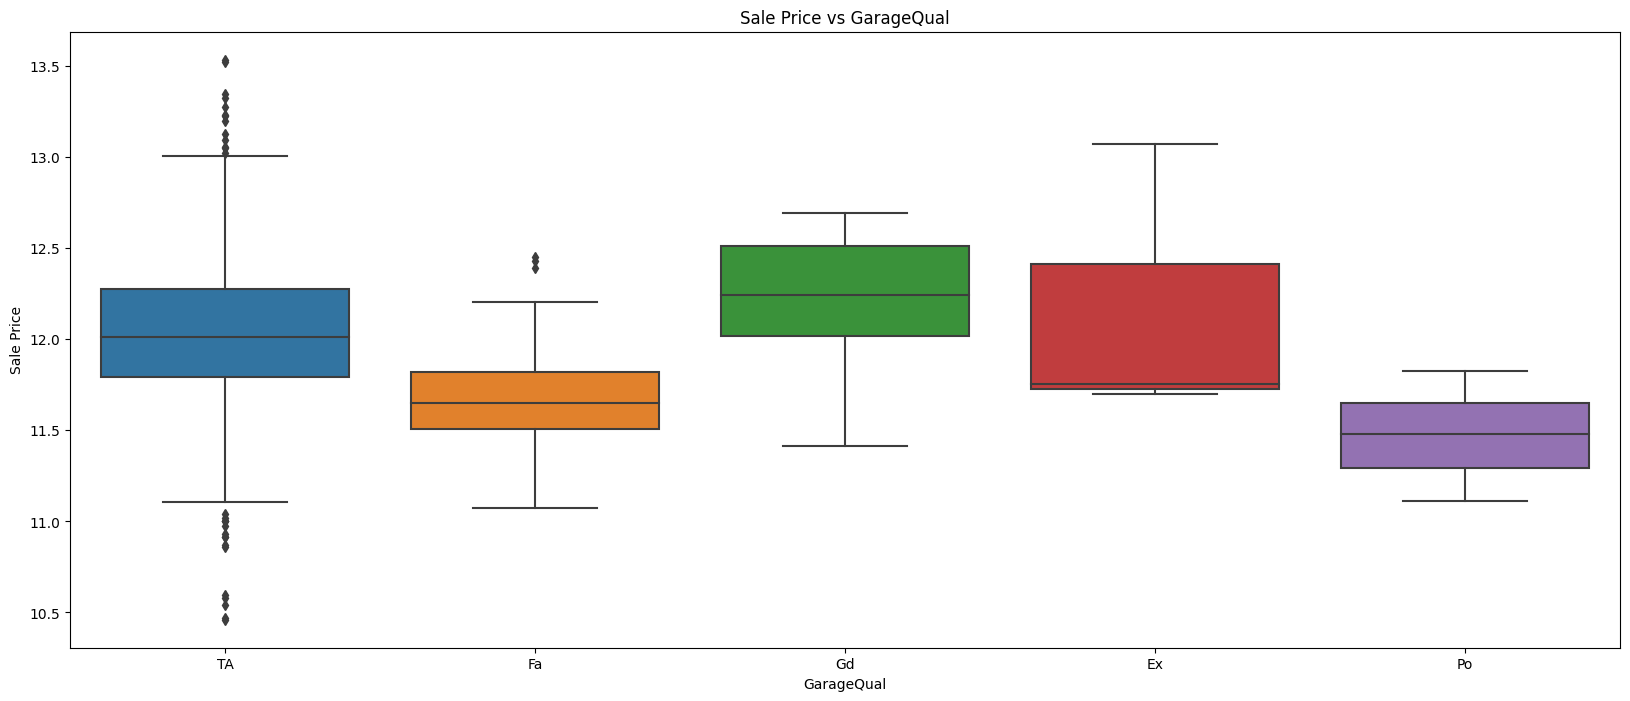

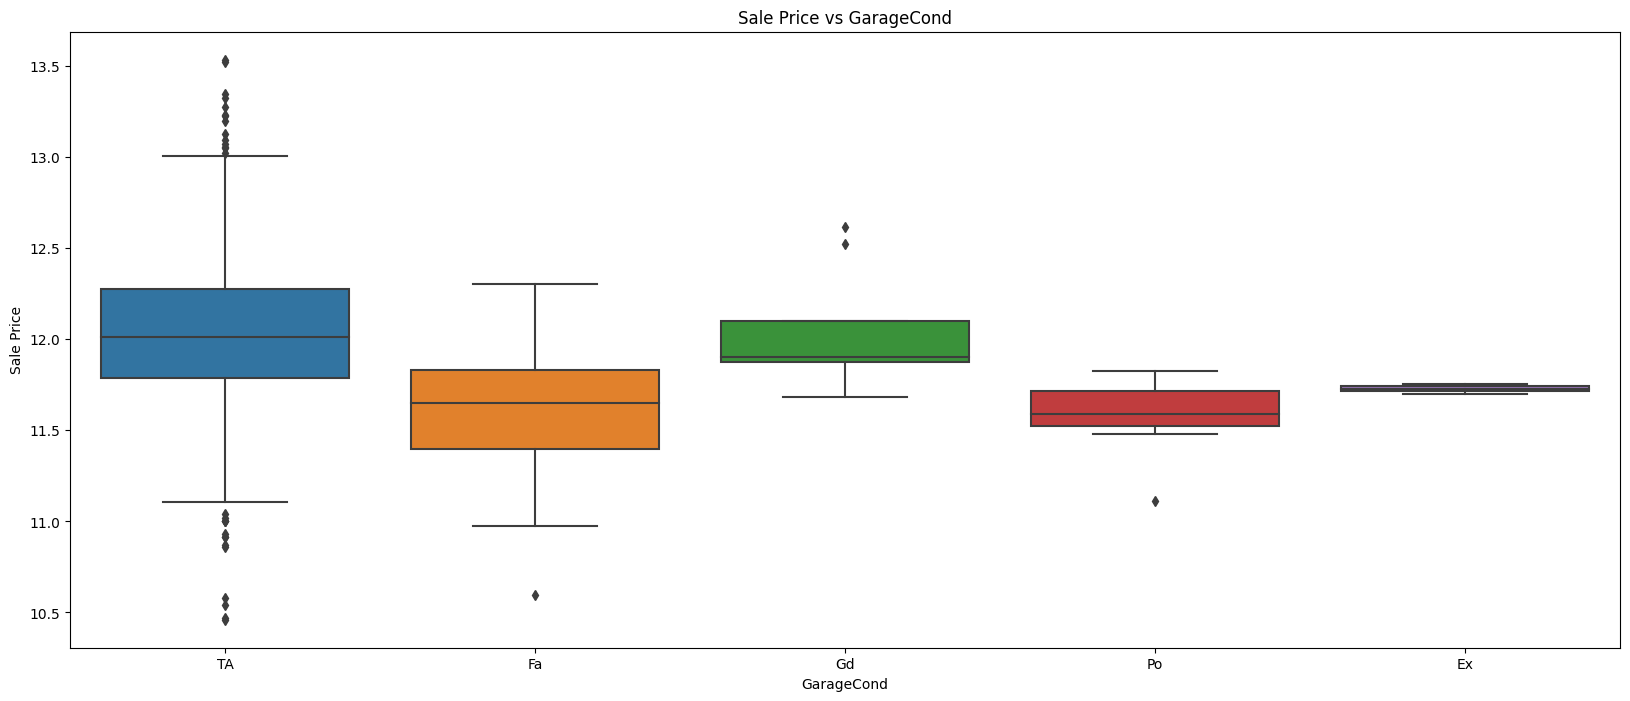

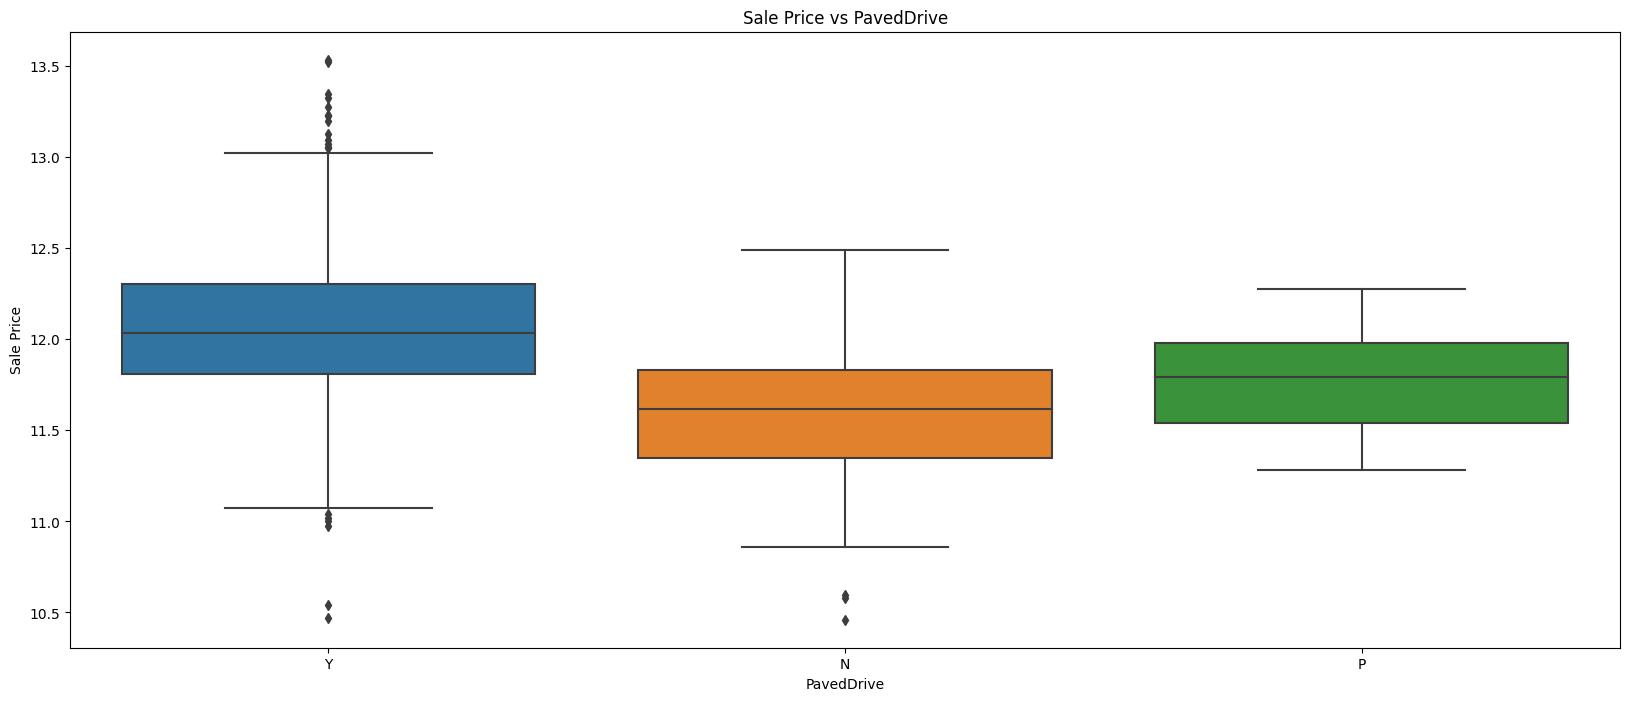

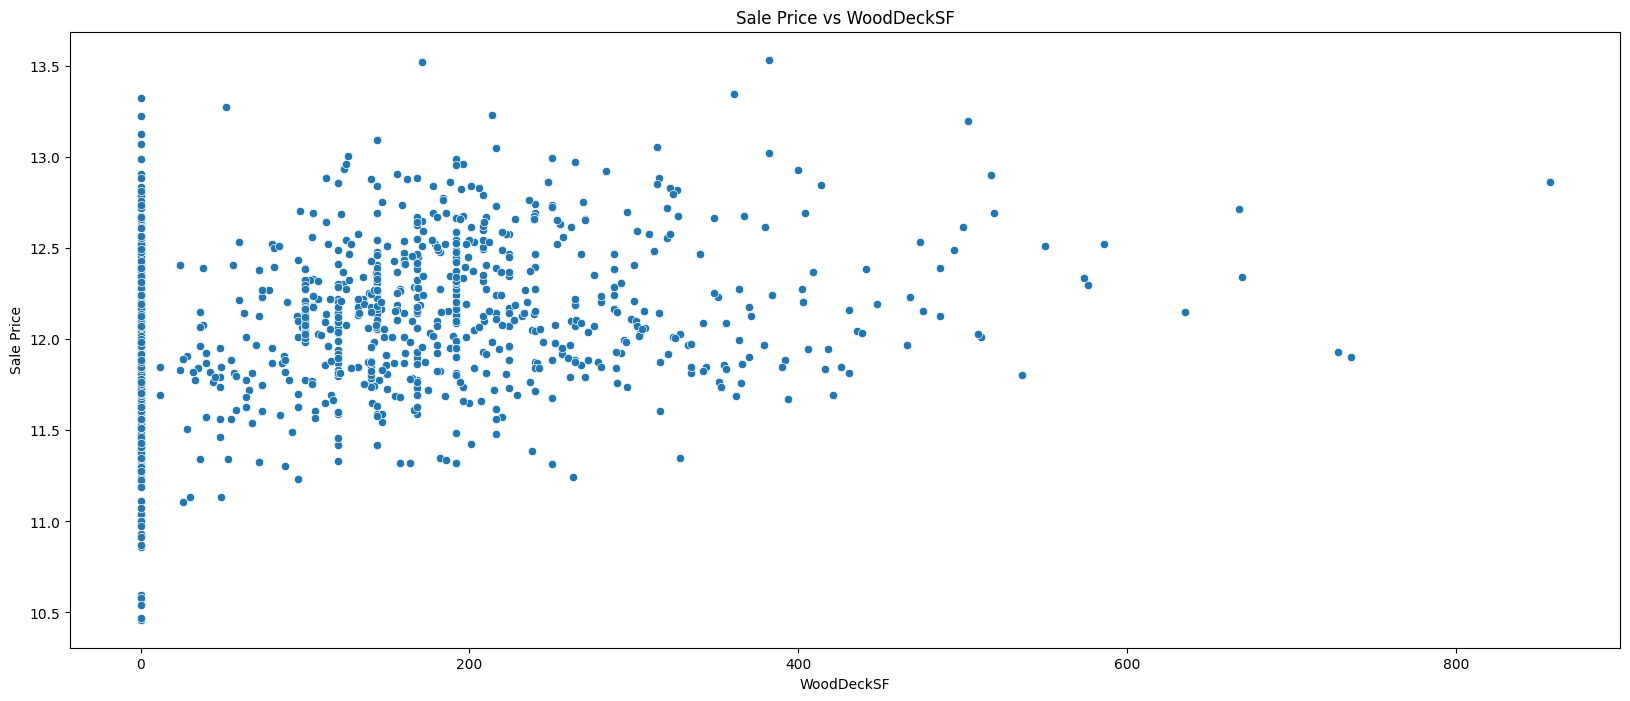

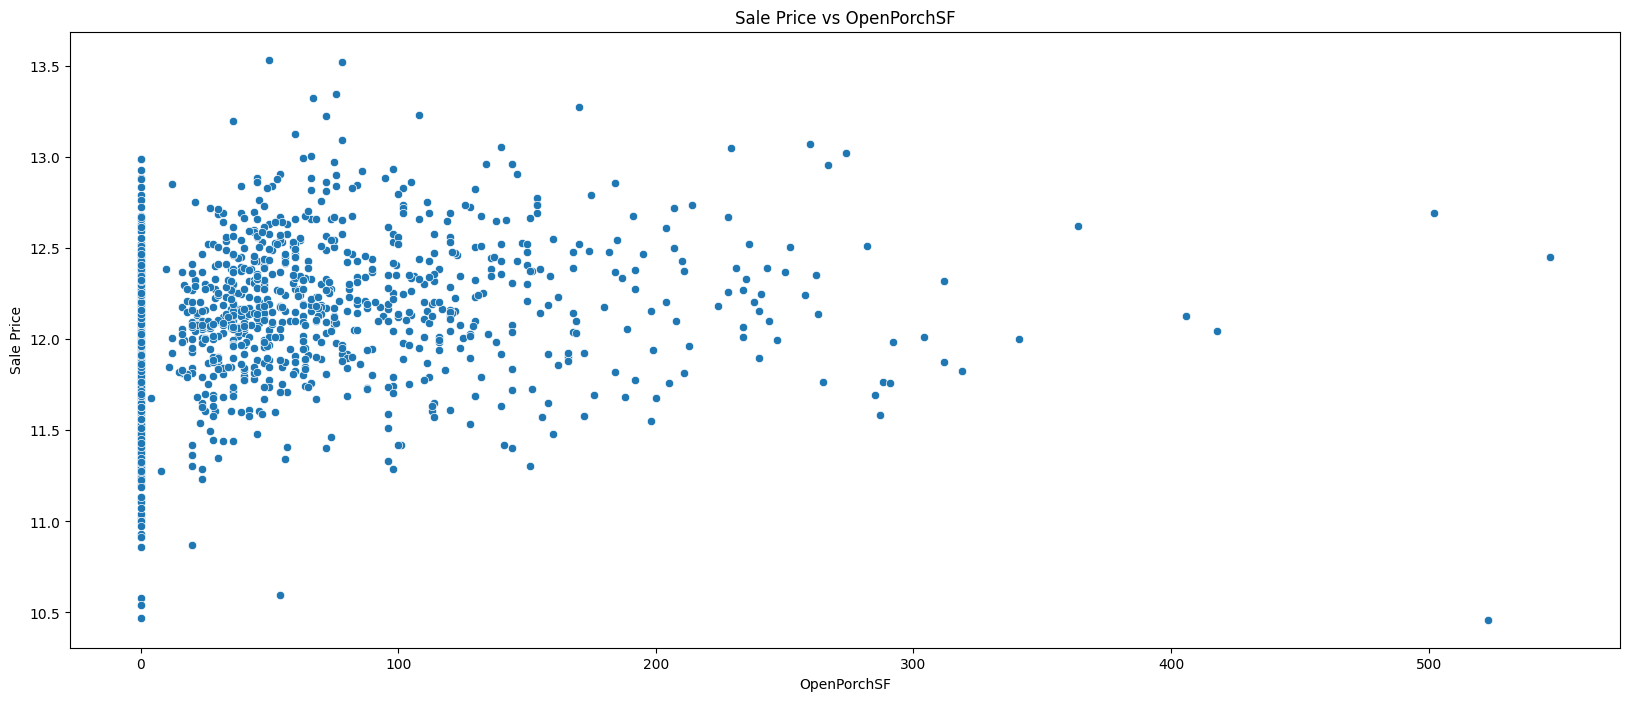

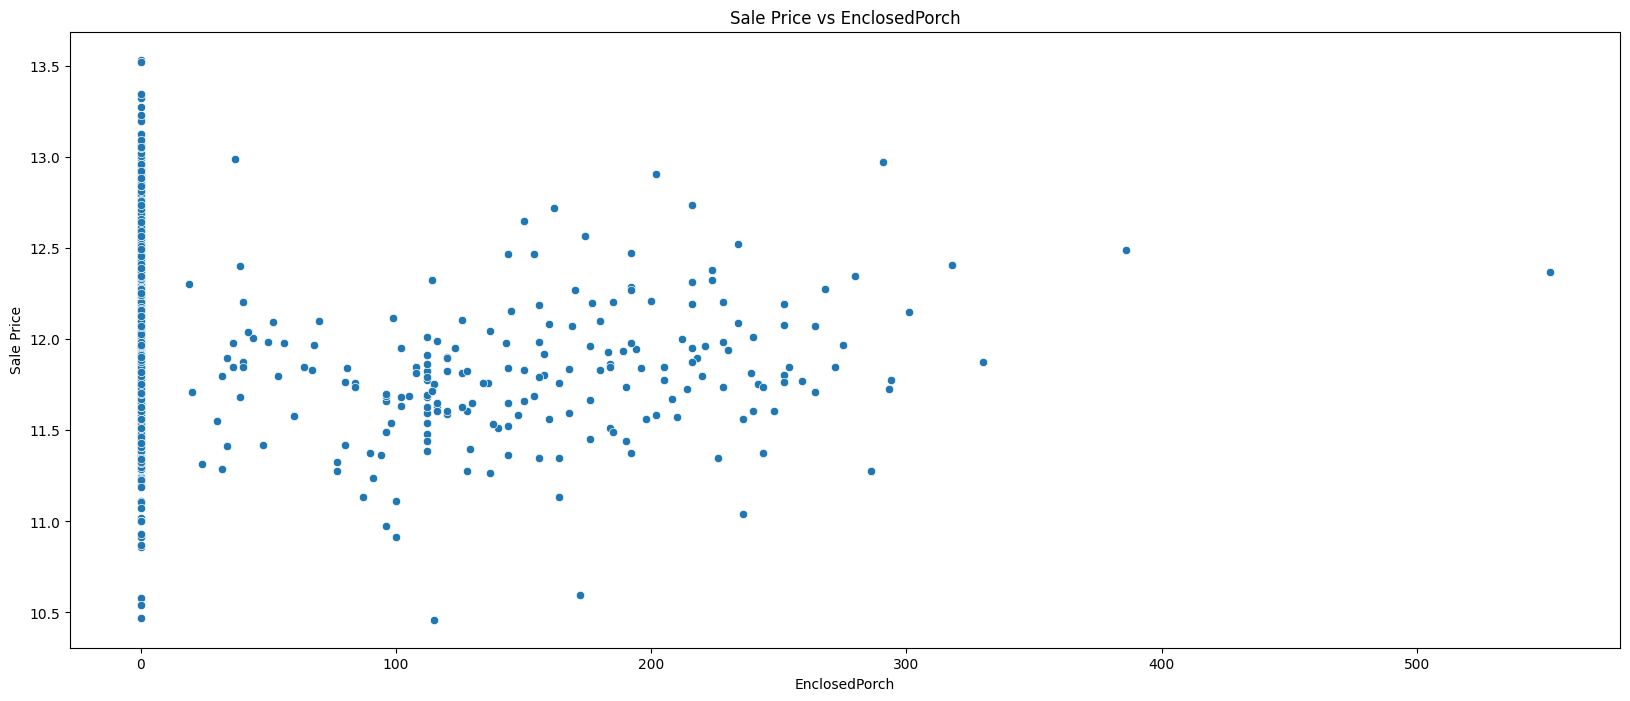

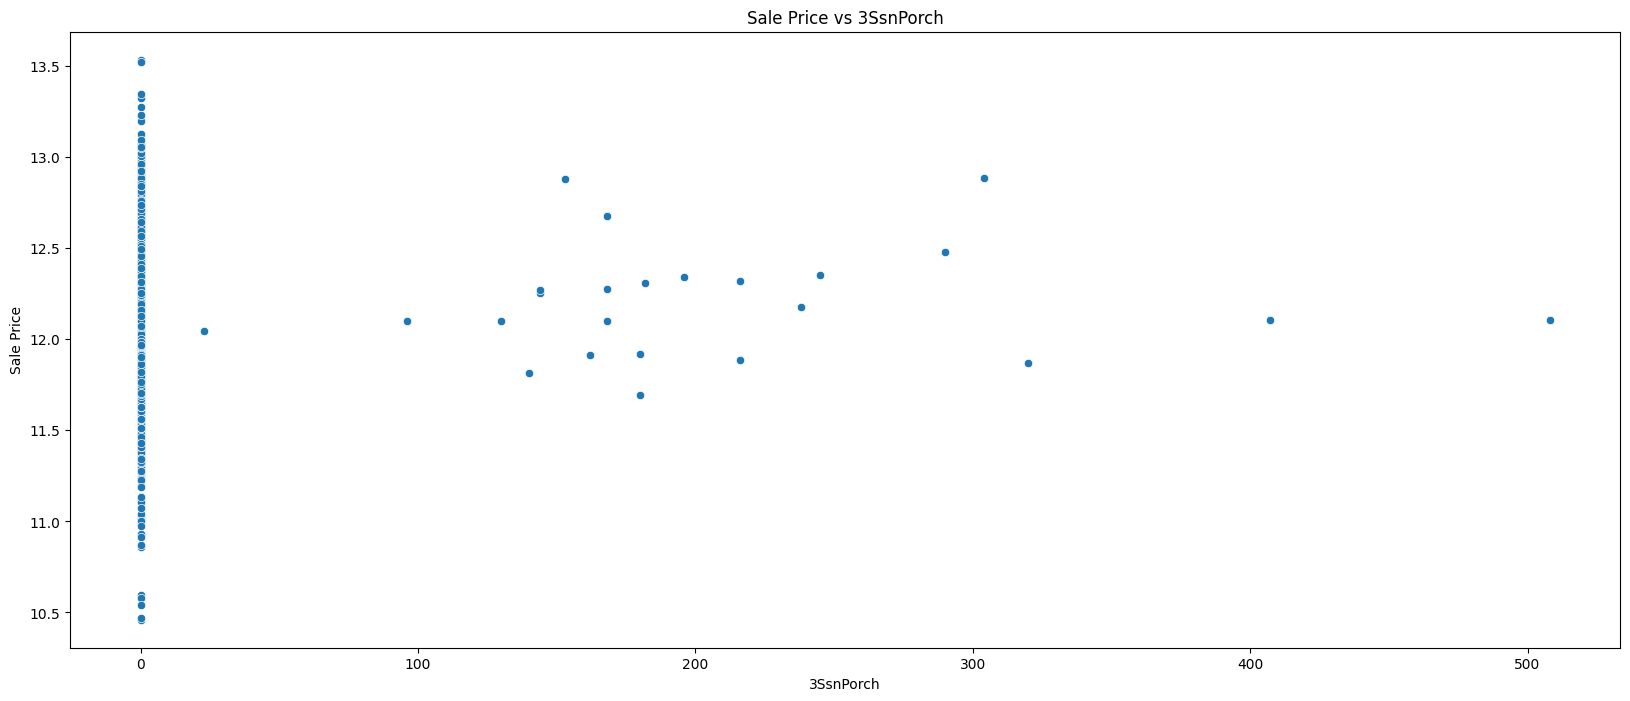

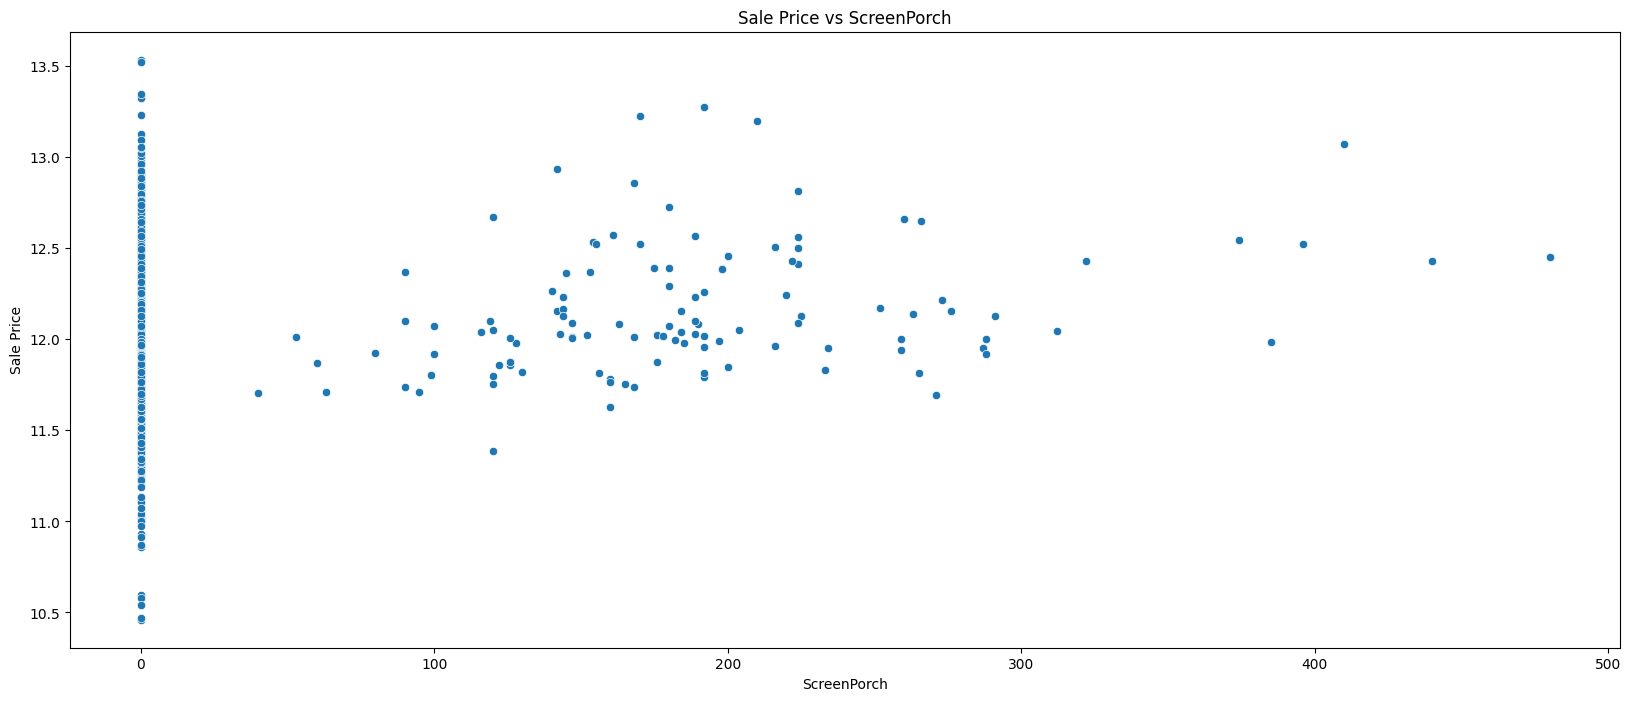

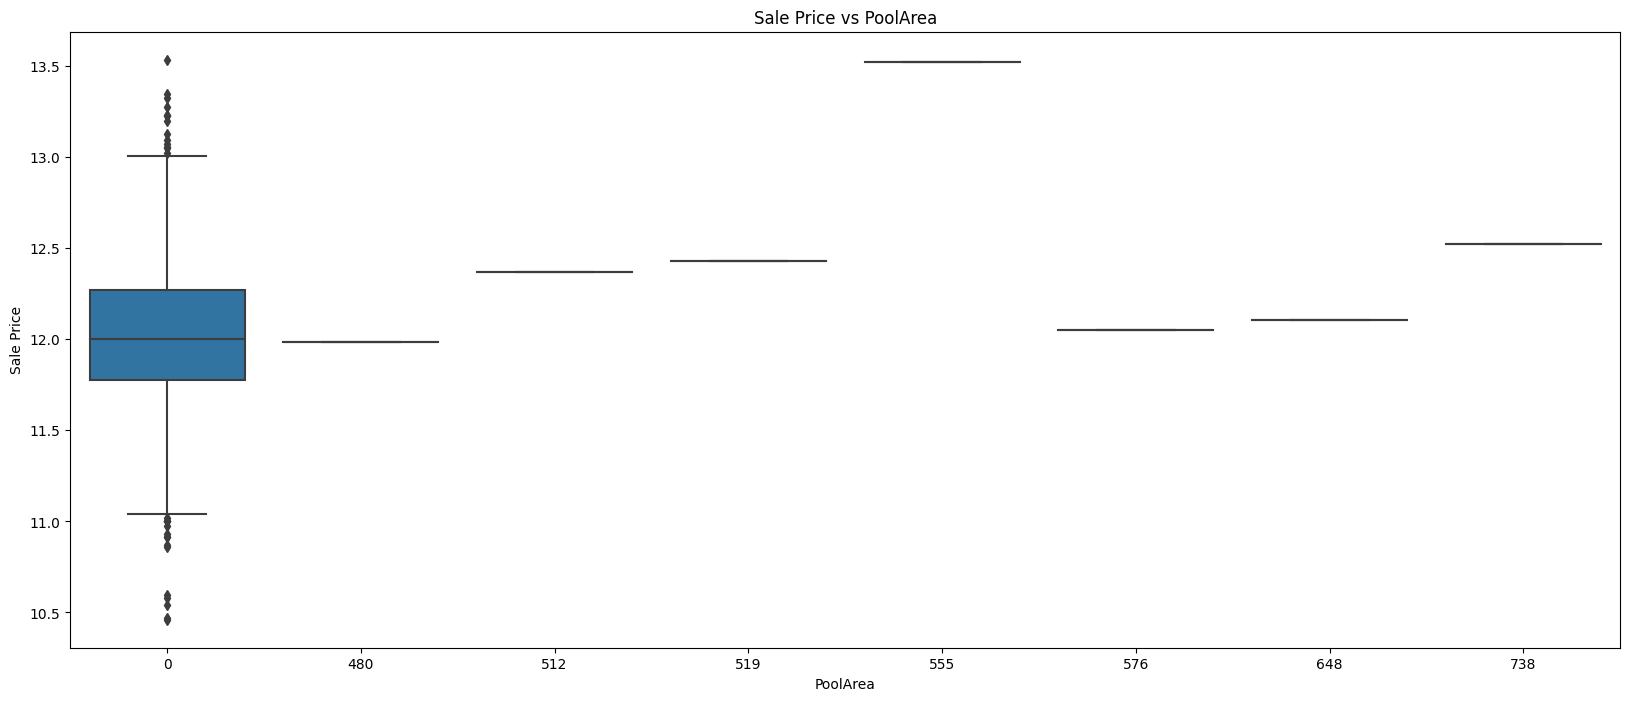

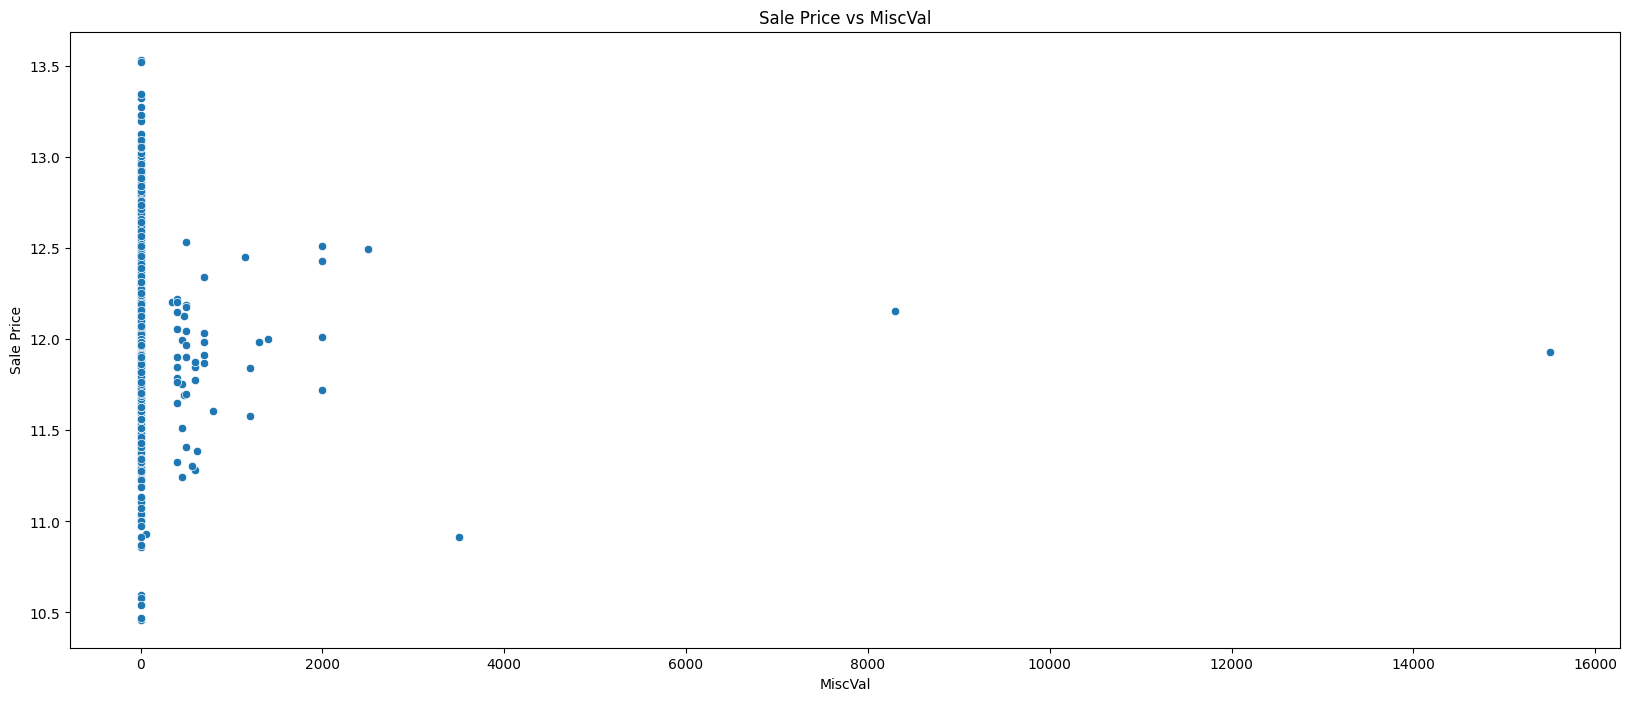

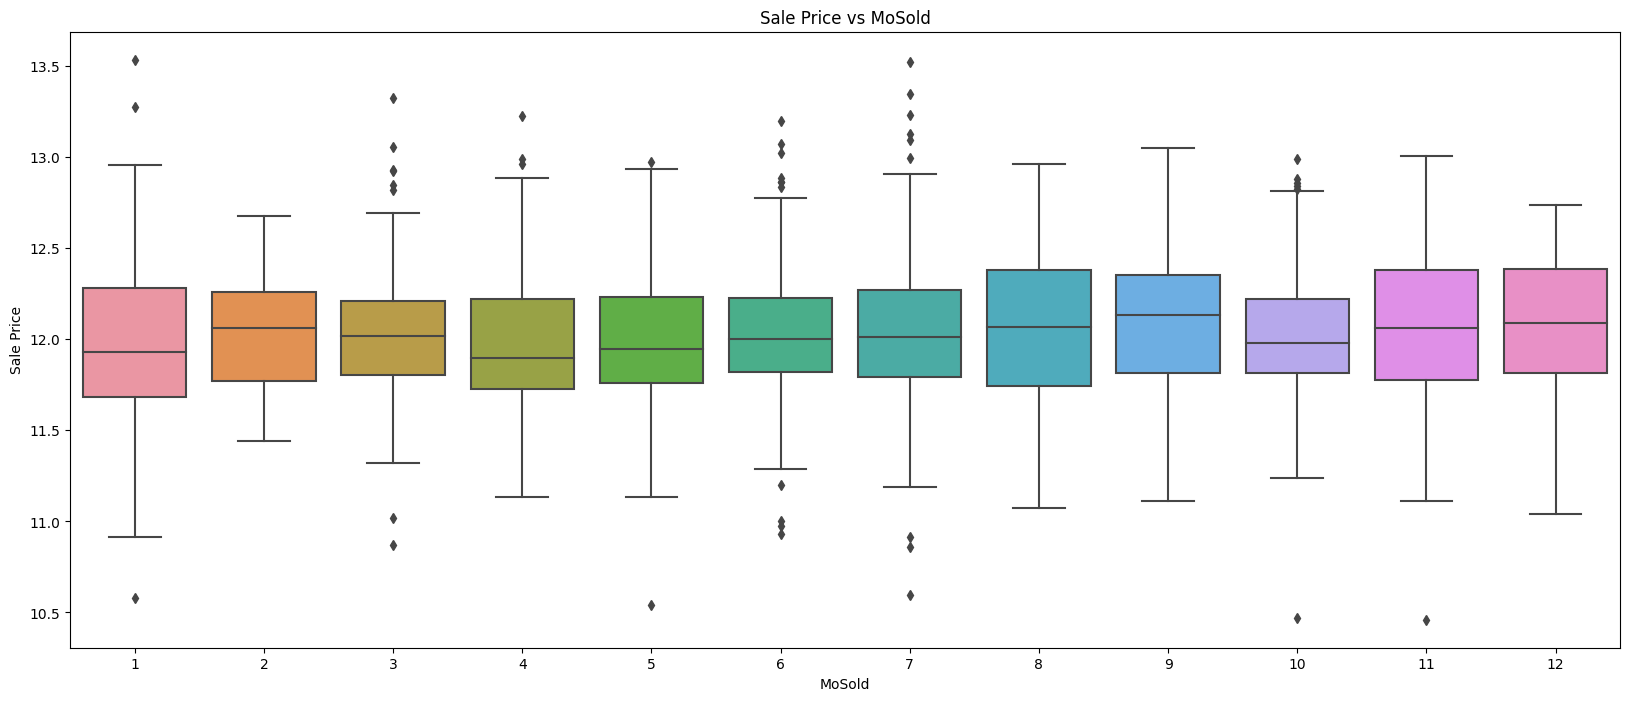

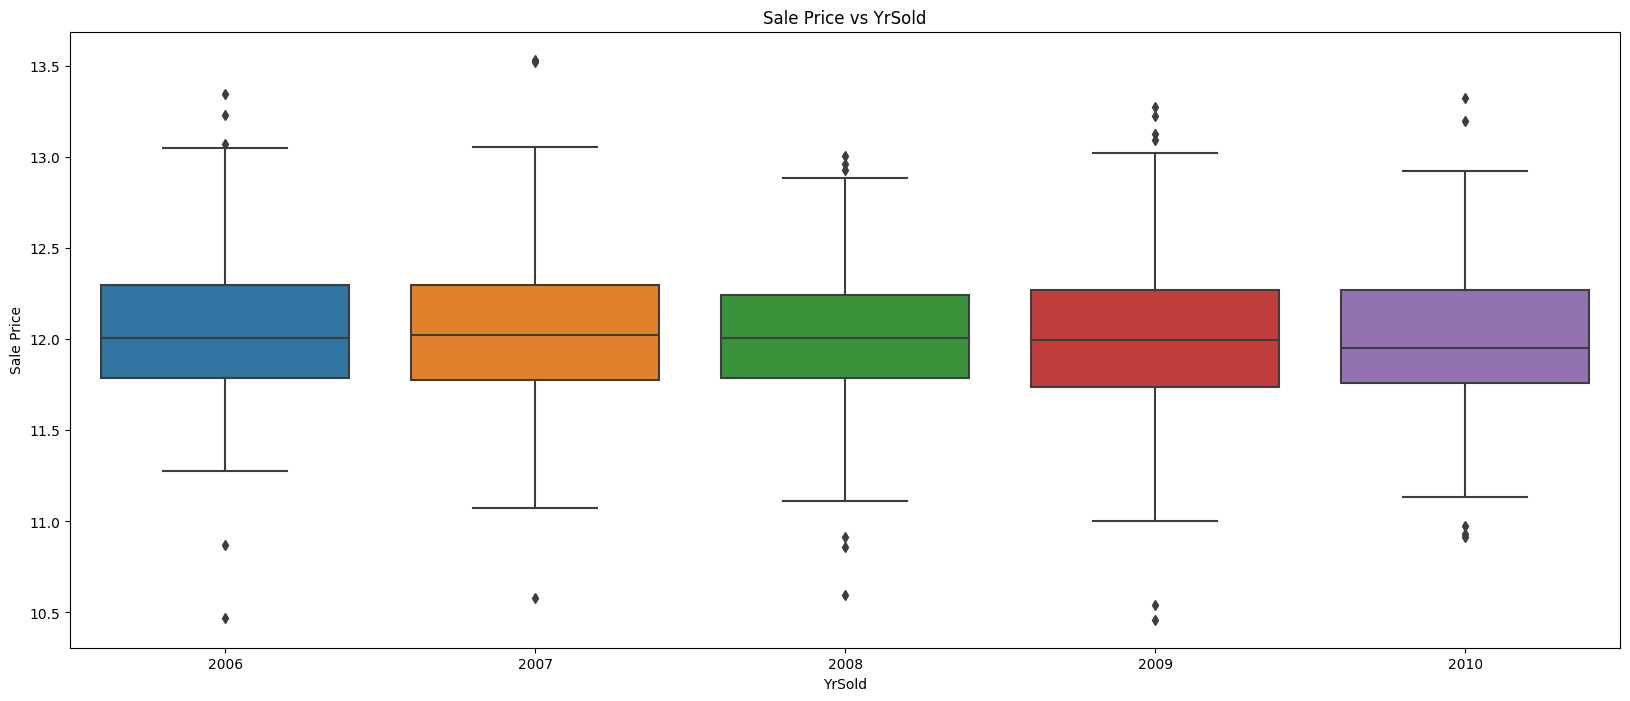

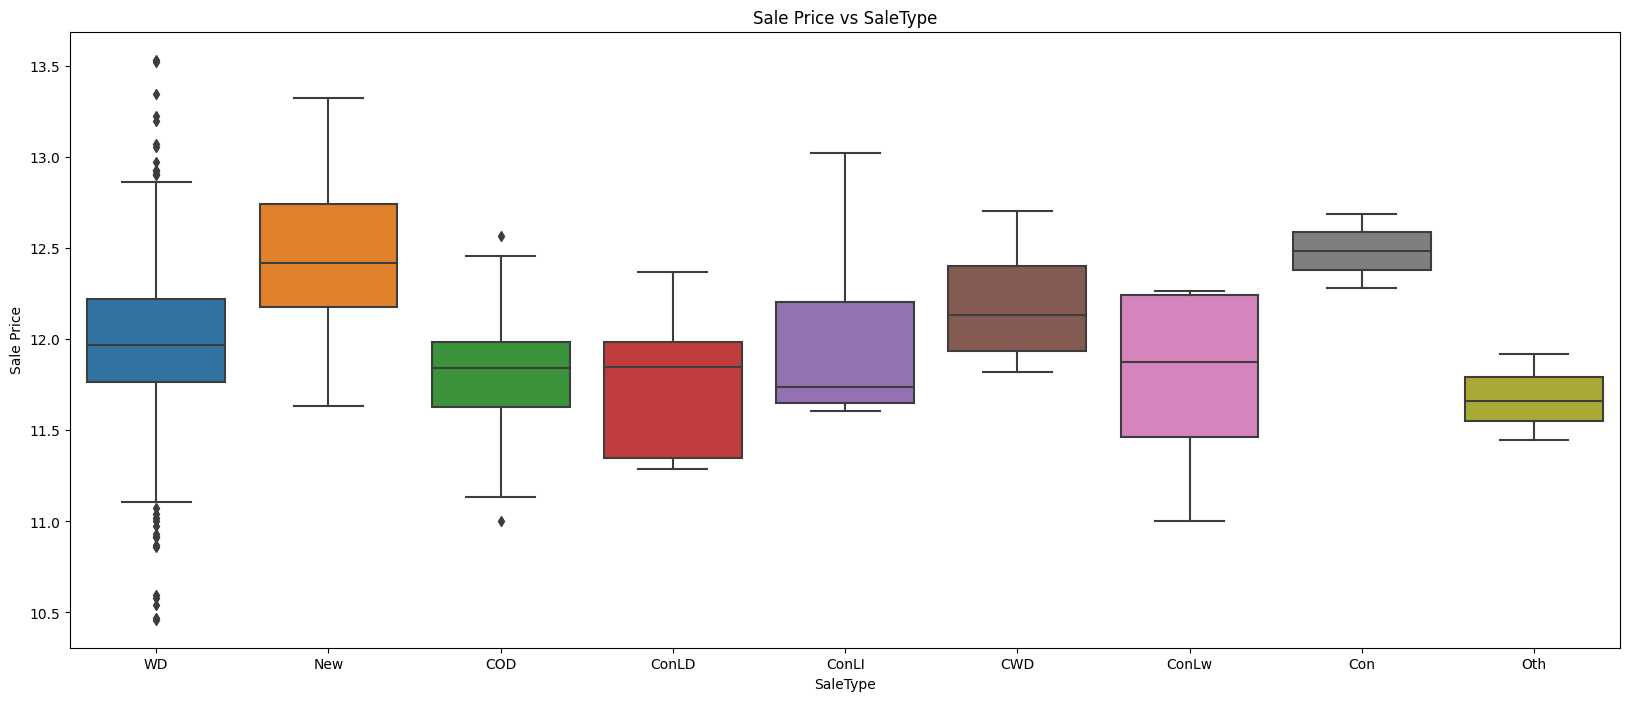

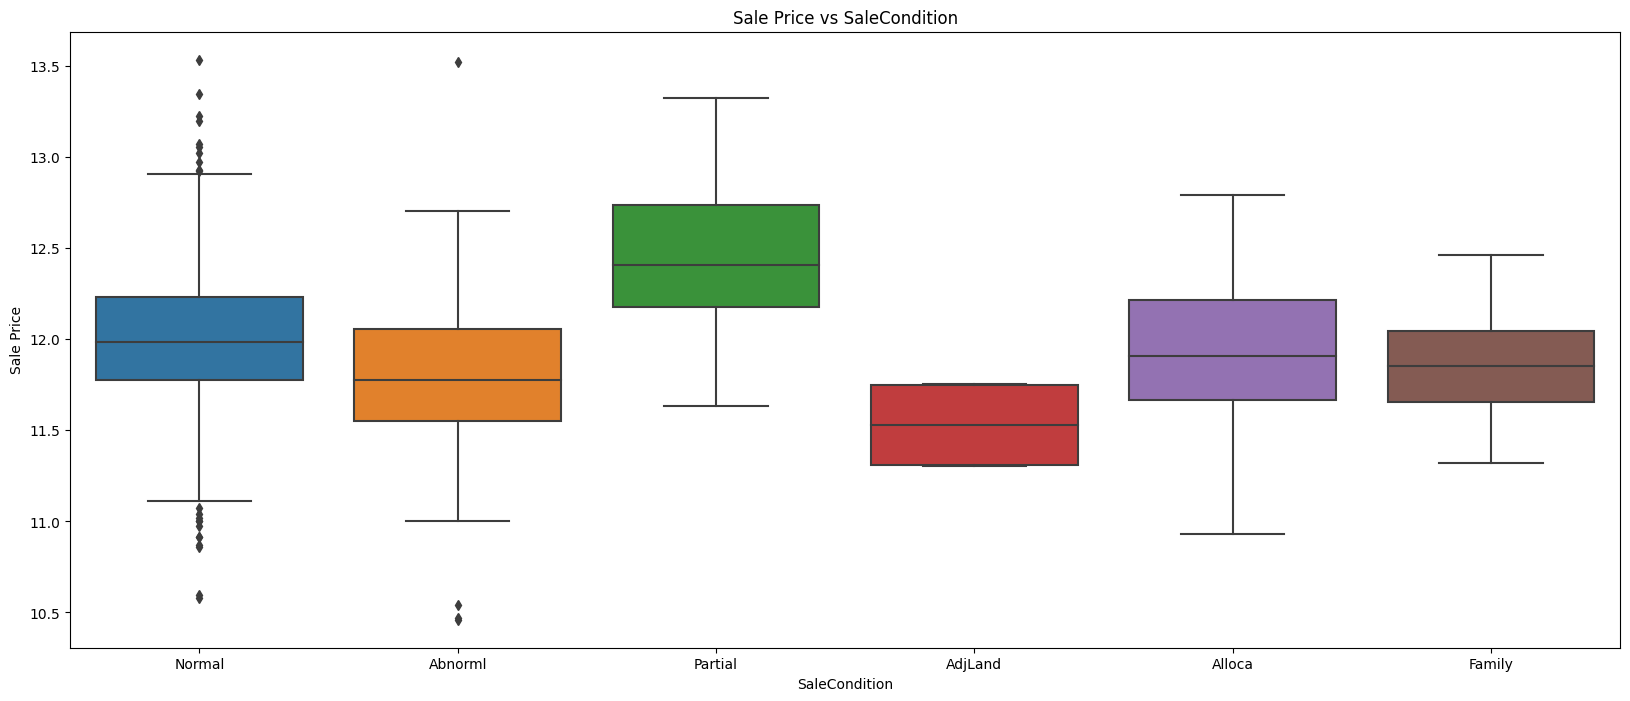

In [176]:
with PdfPages("Visualisation_data_log.pdf") as pdf:
    for col in list(clean_train_data.columns[:-2]):
        if pd.api.types.is_numeric_dtype(clean_train_data[col]):
            if len(np.unique(clean_train_data[col])) > 15:
                plt.figure(figsize = (20, 8))
                plt.title(f'Sale Price vs {col}')
                figure_1 = sns.scatterplot(data = clean_train_data, y = "Log_SalePrice", x = col)
                plt.ylabel("Sale Price")
                plt.xlabel(col)
                pdf.savefig()
            else:
                plt.figure(figsize = (20, 8))
                plt.title(f'Sale Price vs {col}')
                figure_1 = sns.boxplot(data = clean_train_data, y = "Log_SalePrice", x = col)
                plt.ylabel("Sale Price")
                plt.xlabel(col)
                pdf.savefig()
        else:
            plt.figure(figsize = (20, 8))
            plt.title(f'Sale Price vs {col}')
            figure_1 = sns.boxplot(data = clean_train_data, y = "Log_SalePrice", x = col)
            plt.ylabel("Sale Price")
            plt.xlabel(col)
            pdf.savefig()

# Decision Tree Regression Model Actual Value

In [177]:
target = 'SalePrice'
train = clean_train_data.drop(columns=['Id', 'SalePrice', 'Log_SalePrice'])

In [178]:

interpol_train = interpol_train_data.drop(columns=['Id', 'SalePrice', 'Log_SalePrice'])

In [179]:
interpol_train.describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342  1971.267808   
std      42.300571    9981.264932     1.382997     1.112799    30.202904   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      70.000000   11601.500000     7.000000     6.000000  2000.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.609828   443.639726    46.549315   567.240411  ...   
std       20.645407   180.855598   456.098091   161.319273   441.866955  ...   
min     1950.000000   -84.063740     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   166.000000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  
mean     15.060959     2.758904     43.489041     6.321918  2007.815753  
std      55.757415    40.177307    496.123024     2.703626     1.328095  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     5.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     480.000000   738.000000  15500.000000    12.000000  2010.000000  

[8 rows x 35 columns]

In [180]:
len(cat_cols)

38

In [181]:
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(), cat_cols)], remainder='passthrough')
train_encoded = preprocessor.fit_transform(train)

preproc = ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(), cat_cols)], remainder='passthrough')
interpol_train_encoded = preproc.fit_transform(interpol_train)


In [182]:
sc = StandardScaler()
interpol_train_encoded = sc.fit_transform(interpol_train_encoded)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(train_encoded, clean_train_data[target], test_size=0.2, random_state=42)

In [184]:
X_tr, X_tst, y_tr, y_tst = train_test_split(interpol_train_encoded, interpol_train_data[target], test_size=0.2, random_state=42)

In [197]:
# Define the parameter grid for the grid search
param_grid = {
    'max_depth': np.arange(1, 30),
    'min_samples_split': [2, 5, 6, 7, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [198]:
# Perform grid search to find the best hyperparameters for the model
dtree_reg = DecisionTreeRegressor()

In [199]:
CV_dt = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, cv=10)

In [200]:
# CV_dt.fit(X_train, y_train)

In [201]:
CV_dt.fit(X_tr, y_tr)


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 6, 7, 8, 10]})

In [190]:
CV_dt.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [191]:
y_pred = CV_dt.predict(X_tst)

In [194]:
mean_squared_error(y_tst, y_pred)

1448287271.3040872

In [193]:

# y_pr = CV_dt.predict(X_train)
# mean_squared_error(y_train, y_pred)

In [140]:
y_pred = CV_dt.predict(X_tr)
mean_squared_error(y_tr, y_pred)

373572428.9626853

# Decision Tree Regression Model Log Value

In [33]:
target = 'Log_SalePrice'
train = clean_train_data.drop(columns=['Id', 'SalePrice', 'Log_SalePrice'])

In [34]:
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(), cat_cols)], remainder='passthrough')
train_encoded = preprocessor.fit_transform(train)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(train_encoded, clean_train_data[target], test_size=0.2, random_state=42)

In [36]:
# Define the parameter grid for the grid search
param_grid = {
    'max_depth': np.arange(1, 25),
    'min_samples_split': [2, 5, 6, 7, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [37]:
# Perform grid search to find the best hyperparameters for the model
dtree_reg = DecisionTreeRegressor()

In [38]:
CV_dt = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, cv=5)

In [39]:
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 6, 7, 8, 10]})

In [40]:
CV_dt.best_params_

{'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [41]:
y_pred = CV_dt.predict(X_test)
mean_squared_error(np.exp(y_test), np.exp(y_pred))

1343774303.8757741

In [42]:
y_pred = CV_dt.predict(X_train)
mean_squared_error(np.exp(y_train), np.exp(y_pred))

249967258.81829083

# Random Forest Regression Model Actual Value

In [43]:
target = 'SalePrice'
train = clean_train_data.drop(columns=['Id', 'SalePrice', 'Log_SalePrice'])

In [44]:
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(), cat_cols)], remainder='passthrough')
train_encoded = preprocessor.fit_transform(train)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(train_encoded, clean_train_data[target], test_size=0.2, random_state=42)

In [46]:
# Define the parameter grid for the grid search
param_grid = {
    'max_depth': np.arange(1, 25),
    'min_samples_split': [2, 5, 6, 7, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [47]:
# Perform grid search to find the best hyperparameters for the model
rf_reg = RandomForestRegressor(n_jobs = -1)

In [48]:
CV_dt = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5)

In [49]:
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 6, 7, 8, 10]})

In [50]:
CV_dt.best_params_

{'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [51]:
y_pred = CV_dt.predict(X_test)

In [52]:
mean_squared_error(y_test, y_pred)

846795395.4280567

In [53]:
y_pred = CV_dt.predict(X_train)
mean_squared_error(y_train, y_pred)

184863795.9948775

# Random Forest Regression Model Log Value

In [54]:
target = 'Log_SalePrice'
train = clean_train_data.drop(columns=['Id', 'SalePrice', 'Log_SalePrice'])

In [55]:
cat_cols = train.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(), cat_cols)], remainder='passthrough')
train_encoded = preprocessor.fit_transform(train)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train_encoded, clean_train_data[target], test_size=0.2, random_state=42)

In [57]:
# Define the parameter grid for the grid search
param_grid = {
    'max_depth': np.arange(1, 11),
    'min_samples_split': [2, 5, 6, 7, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [58]:
# Perform grid search to find the best hyperparameters for the model
rf_reg = RandomForestRegressor(n_jobs = -1)

In [59]:
CV_dt = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5)

In [60]:
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 5, 6, 7, 8, 10]})

In [61]:
CV_dt.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [65]:
y_pred = CV_dt.predict(X_test)

In [66]:
mean_squared_error(np.exp(y_test), np.exp(y_pred))

828360567.7391605

In [67]:
y_pred = CV_dt.predict(X_train)
mean_squared_error(np.exp(y_train), np.exp(y_pred))

205806632.31989744

# Submission

In [141]:
submission_test_data = interpol_test_data.drop(columns=['Id'])

In [142]:
submission_test_encoded = preprocessor.transform(submission_test_data)

In [143]:
submission_pred_results = np.exp(CV_dt.predict(submission_test_encoded))

In [145]:
submission_data["SalePrice"] = submission_pred_results

In [146]:
submission_data.to_csv("submission.csv", index=False)